In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

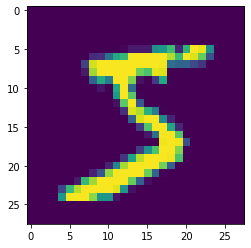

In [4]:
plt.imshow(train_x[0])

In [5]:
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1)

In [6]:
train_x = (train_x-127.5)/127.5

In [7]:
BUFFER_SIZE = train_x.shape[0]
BATCH_SIZE = 100
train_dataset = tf.data.Dataset.from_tensor_slices(train_x).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [8]:
# Discriminator
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(7, (3, 3), padding="same", input_shape=(28, 28, 1)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dense(50, activation="relu"))
    model.add(tf.keras.layers.Dense(1))
    return model

In [9]:
model_discriminator = make_discriminator_model()

In [10]:
model_discriminator(np.random.rand(1, 28, 28, 1).astype("float32"))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.04400005]], dtype=float32)>

In [19]:
discriminator_optimizer = tf.optimizers.Adam(1e-4)

In [20]:
def get_discriminator_loss(real_predictions, fake_predictions):
    real_predictions = tf.sigmoid(real_predictions)
    fake_predictions = tf.sigmoid(fake_predictions)
    real_loss = tf.losses.binary_crossentropy(tf.ones_like(real_predictions), real_predictions)
    fake_loss = tf.losses.binary_crossentropy(tf.zeros_like(fake_predictions), fake_predictions)
    return fake_loss + real_loss

In [21]:
# Generator
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(7*7*256, input_shape=(100,)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Reshape((7, 7, 256)))
    model.add(tf.keras.layers.Conv2DTranspose(128, (3,3), padding="same"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2DTranspose(64, (3,3), strides=(2,2), padding="same"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2DTranspose(1, (3,3), strides=(2,2), padding="same"))
    return model

In [22]:
model_generator = make_generator_model()

In [23]:
generator_optimizer = tf.optimizers.Adam(1e-4)

In [24]:
def get_generator_loss(fake_predictions):
    fake_predictions = tf.sigmoid(fake_predictions)
    fake_loss = tf.losses.binary_crossentropy(tf.ones_like(fake_predictions), fake_predictions)
    return fake_loss

In [26]:
# Training
def train(dataset, epochs):
    for _ in range(epochs):
        for images in dataset:
            images = tf.cast(images, tf.dtypes.float32)
            train_step(images)

In [33]:
def train_step(images):
    fake_image_noise = np.random.randn(BATCH_SIZE, 100).astype("float32")
    with tf.GradientTape() as generator_tape, tf.GradientTape() as discriminator_tape:
        generated_images = model_generator(fake_image_noise)
        real_output = model_discriminator(images)
        fake_output = model_discriminator(generated_images)
        
        generator_loss = get_generator_loss(fake_output)
        discriminator_loss = get_discriminator_loss(real_output, fake_output)
        
        generator_gradients = generator_tape.gradient(generator_loss, model_generator.trainable_variables)
        discriminator_gradients = discriminator_tape.gradient(discriminator_loss, model_discriminator.trainable_variables)
        
        generator_optimizer.apply_gradients(zip(generator_gradients, model_generator.trainable_variables))
        discriminator_optimizer.apply_gradients(zip(discriminator_gradients, model_discriminator.trainable_variables))
        
        print("Generator loss:", np.mean(generator_loss))
        print("Discriminator loss:", np.mean(discriminator_loss))

In [42]:
train(train_dataset, 100)

Generator loss: 3.3684049
Discriminator loss: 0.0670911
Generator loss: 4.1042333
Discriminator loss: 0.02795799
Generator loss: 4.543194
Discriminator loss: 0.06598298
Generator loss: 5.115017
Discriminator loss: 0.053816896
Generator loss: 5.4462194
Discriminator loss: 0.1600333
Generator loss: 5.3558702
Discriminator loss: 0.07954618
Generator loss: 4.405401
Discriminator loss: 0.054241892
Generator loss: 3.997669
Discriminator loss: 0.08097639
Generator loss: 3.3909597
Discriminator loss: 0.08257538
Generator loss: 3.067871
Discriminator loss: 0.105801925
Generator loss: 3.214614
Discriminator loss: 0.09360913
Generator loss: 3.4415388
Discriminator loss: 0.101960555
Generator loss: 3.91075
Discriminator loss: 0.054638963
Generator loss: 4.384784
Discriminator loss: 0.110780105
Generator loss: 4.2395854
Discriminator loss: 0.061443754
Generator loss: 4.248546
Discriminator loss: 0.22643028
Generator loss: 3.43935
Discriminator loss: 0.09950305
Generator loss: 2.9237738
Discriminato

Generator loss: 4.3207855
Discriminator loss: 0.045809425
Generator loss: 4.7133503
Discriminator loss: 0.19880943
Generator loss: 4.145208
Discriminator loss: 0.14181896
Generator loss: 3.329122
Discriminator loss: 0.06981047
Generator loss: 3.003894
Discriminator loss: 0.119633585
Generator loss: 3.1060312
Discriminator loss: 0.10774592
Generator loss: 3.286754
Discriminator loss: 0.17844808
Generator loss: 3.3892324
Discriminator loss: 0.110809766
Generator loss: 3.8865736
Discriminator loss: 0.074093506
Generator loss: 4.368274
Discriminator loss: 0.15447873
Generator loss: 4.0671716
Discriminator loss: 0.06278341
Generator loss: 4.210305
Discriminator loss: 0.11070284
Generator loss: 4.0060334
Discriminator loss: 0.08015109
Generator loss: 3.682339
Discriminator loss: 0.056555577
Generator loss: 3.7532248
Discriminator loss: 0.14156047
Generator loss: 3.4875574
Discriminator loss: 0.13828541
Generator loss: 3.2697256
Discriminator loss: 0.057563763
Generator loss: 3.5804288
Discri

Generator loss: 3.9681458
Discriminator loss: 0.06352616
Generator loss: 3.7345984
Discriminator loss: 0.034498136
Generator loss: 3.6237946
Discriminator loss: 0.09185038
Generator loss: 3.7514083
Discriminator loss: 0.062003285
Generator loss: 3.637028
Discriminator loss: 0.08173619
Generator loss: 3.7090108
Discriminator loss: 0.048657123
Generator loss: 3.9999523
Discriminator loss: 0.06660079
Generator loss: 4.0521913
Discriminator loss: 0.08433986
Generator loss: 4.0433116
Discriminator loss: 0.06545538
Generator loss: 3.8886504
Discriminator loss: 0.07206924
Generator loss: 3.5495667
Discriminator loss: 0.08590312
Generator loss: 3.4699798
Discriminator loss: 0.087218076
Generator loss: 3.1581755
Discriminator loss: 0.07526731
Generator loss: 3.300512
Discriminator loss: 0.060986593
Generator loss: 3.7353585
Discriminator loss: 0.03361695
Generator loss: 4.248299
Discriminator loss: 0.08364978
Generator loss: 4.593764
Discriminator loss: 0.10362545
Generator loss: 4.415716
Discr

Generator loss: 3.079687
Discriminator loss: 0.06689968
Generator loss: 3.819421
Discriminator loss: 0.11608437
Generator loss: 4.2189145
Discriminator loss: 0.083240956
Generator loss: 4.3789043
Discriminator loss: 0.06898902
Generator loss: 4.401142
Discriminator loss: 0.15076503
Generator loss: 4.0952086
Discriminator loss: 0.06373315
Generator loss: 3.6442657
Discriminator loss: 0.0733592
Generator loss: 3.270265
Discriminator loss: 0.097632535
Generator loss: 3.1520376
Discriminator loss: 0.0926887
Generator loss: 3.1297705
Discriminator loss: 0.09533198
Generator loss: 3.6661801
Discriminator loss: 0.12903342
Generator loss: 3.8685017
Discriminator loss: 0.08853807
Generator loss: 3.7862165
Discriminator loss: 0.07343482
Generator loss: 3.9610498
Discriminator loss: 0.069943465
Generator loss: 4.182761
Discriminator loss: 0.04187522
Generator loss: 4.470416
Discriminator loss: 0.10379403
Generator loss: 4.492079
Discriminator loss: 0.07810565
Generator loss: 4.3211284
Discriminat

Generator loss: 4.2940583
Discriminator loss: 0.0545786
Generator loss: 4.378923
Discriminator loss: 0.096035585
Generator loss: 4.229228
Discriminator loss: 0.11509031
Generator loss: 3.7597592
Discriminator loss: 0.10337996
Generator loss: 3.2735343
Discriminator loss: 0.13716593
Generator loss: 2.7455573
Discriminator loss: 0.111777395
Generator loss: 3.2336261
Discriminator loss: 0.05959907
Generator loss: 3.6716459
Discriminator loss: 0.13280244
Generator loss: 4.2511883
Discriminator loss: 0.07808077
Generator loss: 4.51488
Discriminator loss: 0.1132252
Generator loss: 4.566897
Discriminator loss: 0.05472023
Generator loss: 4.417185
Discriminator loss: 0.13081433
Generator loss: 4.143212
Discriminator loss: 0.031680413
Generator loss: 3.8959293
Discriminator loss: 0.092010625
Generator loss: 3.6977155
Discriminator loss: 0.09869831
Generator loss: 3.4931488
Discriminator loss: 0.05090105
Generator loss: 3.4903703
Discriminator loss: 0.059575148
Generator loss: 3.6650023
Discrimin

Generator loss: 3.4973388
Discriminator loss: 0.081123
Generator loss: 3.5828083
Discriminator loss: 0.08189076
Generator loss: 3.7540026
Discriminator loss: 0.073299
Generator loss: 3.9056332
Discriminator loss: 0.07309362
Generator loss: 4.094304
Discriminator loss: 0.11891211
Generator loss: 3.9878118
Discriminator loss: 0.072449215
Generator loss: 3.6043305
Discriminator loss: 0.08844262
Generator loss: 3.4449008
Discriminator loss: 0.08730685
Generator loss: 3.432923
Discriminator loss: 0.10219979
Generator loss: 3.2951367
Discriminator loss: 0.06989681
Generator loss: 3.6321194
Discriminator loss: 0.08886996
Generator loss: 4.0116825
Discriminator loss: 0.23186472
Generator loss: 3.4142118
Discriminator loss: 0.085393436
Generator loss: 3.1896784
Discriminator loss: 0.08946455
Generator loss: 3.2599707
Discriminator loss: 0.12184624
Generator loss: 3.3329432
Discriminator loss: 0.07835296
Generator loss: 3.6723847
Discriminator loss: 0.043878943
Generator loss: 4.0923395
Discrimi

Generator loss: 4.629694
Discriminator loss: 0.04890953
Generator loss: 4.563043
Discriminator loss: 0.07491558
Generator loss: 4.5354958
Discriminator loss: 0.017857825
Generator loss: 4.2367015
Discriminator loss: 0.03844014
Generator loss: 4.0201645
Discriminator loss: 0.07056763
Generator loss: 3.7724047
Discriminator loss: 0.0382688
Generator loss: 3.940035
Discriminator loss: 0.05251837
Generator loss: 3.954673
Discriminator loss: 0.047726978
Generator loss: 4.0792675
Discriminator loss: 0.03782956
Generator loss: 4.2587523
Discriminator loss: 0.03713469
Generator loss: 4.2830615
Discriminator loss: 0.023620384
Generator loss: 4.6397386
Discriminator loss: 0.046865445
Generator loss: 4.6049376
Discriminator loss: 0.025119044
Generator loss: 4.5298824
Discriminator loss: 0.022070773
Generator loss: 4.5089493
Discriminator loss: 0.11504745
Generator loss: 4.1765203
Discriminator loss: 0.041645132
Generator loss: 3.94437
Discriminator loss: 0.06473997
Generator loss: 3.699048
Discri

Generator loss: 4.121262
Discriminator loss: 0.0678268
Generator loss: 4.4344387
Discriminator loss: 0.08152629
Generator loss: 4.4810743
Discriminator loss: 0.08275836
Generator loss: 4.6077294
Discriminator loss: 0.04116961
Generator loss: 4.6590624
Discriminator loss: 0.03304985
Generator loss: 4.7684093
Discriminator loss: 0.044864774
Generator loss: 5.029341
Discriminator loss: 0.026800785
Generator loss: 4.9611654
Discriminator loss: 0.019243412
Generator loss: 5.11221
Discriminator loss: 0.037046395
Generator loss: 5.4791203
Discriminator loss: 0.08110064
Generator loss: 5.149235
Discriminator loss: 0.06332937
Generator loss: 4.9473233
Discriminator loss: 0.029267728
Generator loss: 4.6337113
Discriminator loss: 0.030422417
Generator loss: 4.5394
Discriminator loss: 0.029768145
Generator loss: 4.638684
Discriminator loss: 0.09480126
Generator loss: 4.6469164
Discriminator loss: 0.038347684
Generator loss: 4.493402
Discriminator loss: 0.06727659
Generator loss: 4.240787
Discrimin

Generator loss: 4.98723
Discriminator loss: 0.022668976
Generator loss: 5.0702395
Discriminator loss: 0.08170158
Generator loss: 4.984876
Discriminator loss: 0.01855606
Generator loss: 5.1775208
Discriminator loss: 0.10548441
Generator loss: 4.5406556
Discriminator loss: 0.05074459
Generator loss: 4.5229278
Discriminator loss: 0.039556563
Generator loss: 4.5495353
Discriminator loss: 0.061323807
Generator loss: 4.459953
Discriminator loss: 0.04814127
Generator loss: 4.6325283
Discriminator loss: 0.029871853
Generator loss: 4.786589
Discriminator loss: 0.029307354
Generator loss: 4.916969
Discriminator loss: 0.023096222
Generator loss: 5.0896974
Discriminator loss: 0.055474825
Generator loss: 5.040885
Discriminator loss: 0.054294795
Generator loss: 5.046711
Discriminator loss: 0.05732923
Generator loss: 4.9149733
Discriminator loss: 0.031173078
Generator loss: 4.802591
Discriminator loss: 0.03865078
Generator loss: 4.666339
Discriminator loss: 0.033750452
Generator loss: 4.3623185
Discr

Generator loss: 5.994681
Discriminator loss: 0.066236585
Generator loss: 5.599326
Discriminator loss: 0.07934137
Generator loss: 5.154378
Discriminator loss: 0.045910943
Generator loss: 4.8256288
Discriminator loss: 0.036268774
Generator loss: 4.4604197
Discriminator loss: 0.062080637
Generator loss: 4.9310503
Discriminator loss: 0.07442072
Generator loss: 4.9281874
Discriminator loss: 0.036800686
Generator loss: 5.209068
Discriminator loss: 0.034086786
Generator loss: 5.3890147
Discriminator loss: 0.05654139
Generator loss: 5.7191396
Discriminator loss: 0.021019986
Generator loss: 5.9748187
Discriminator loss: 0.043553375
Generator loss: 5.6766405
Discriminator loss: 0.035357684
Generator loss: 5.7382665
Discriminator loss: 0.031297322
Generator loss: 5.6004043
Discriminator loss: 0.040825106
Generator loss: 5.1428623
Discriminator loss: 0.04619695
Generator loss: 5.1203046
Discriminator loss: 0.07046343
Generator loss: 4.948439
Discriminator loss: 0.044440854
Generator loss: 5.222135

Generator loss: 5.932511
Discriminator loss: 0.11737028
Generator loss: 5.4621863
Discriminator loss: 0.07552832
Generator loss: 5.2915716
Discriminator loss: 0.06863382
Generator loss: 5.452489
Discriminator loss: 0.06384431
Generator loss: 5.3628273
Discriminator loss: 0.10361504
Generator loss: 5.4063983
Discriminator loss: 0.05628911
Generator loss: 5.477047
Discriminator loss: 0.036500823
Generator loss: 6.1807647
Discriminator loss: 0.06774725
Generator loss: 6.0522695
Discriminator loss: 0.06745864
Generator loss: 6.8999834
Discriminator loss: 0.1103004
Generator loss: 6.6039925
Discriminator loss: 0.057274
Generator loss: 6.15875
Discriminator loss: 0.044601165
Generator loss: 5.792014
Discriminator loss: 0.05355289
Generator loss: 6.2196217
Discriminator loss: 0.017191699
Generator loss: 5.6829596
Discriminator loss: 0.026651341
Generator loss: 5.354841
Discriminator loss: 0.058275104
Generator loss: 5.498136
Discriminator loss: 0.040733065
Generator loss: 5.3067193
Discrimina

Discriminator loss: 0.09473623
Generator loss: 7.654356
Discriminator loss: 0.060692973
Generator loss: 7.192296
Discriminator loss: 0.10840831
Generator loss: 6.684379
Discriminator loss: 0.038634837
Generator loss: 5.866586
Discriminator loss: 0.04773896
Generator loss: 5.577633
Discriminator loss: 0.04702142
Generator loss: 6.1288037
Discriminator loss: 0.028807374
Generator loss: 5.4636173
Discriminator loss: 0.039376263
Generator loss: 5.7586083
Discriminator loss: 0.027422344
Generator loss: 6.0807433
Discriminator loss: 0.02793004
Generator loss: 6.434263
Discriminator loss: 0.019956637
Generator loss: 6.383107
Discriminator loss: 0.05829081
Generator loss: 7.0639305
Discriminator loss: 0.026556093
Generator loss: 7.7797484
Discriminator loss: 0.034954272
Generator loss: 8.365898
Discriminator loss: 0.020598851
Generator loss: 8.783571
Discriminator loss: 0.020220436
Generator loss: 9.029699
Discriminator loss: 0.04679515
Generator loss: 8.7719
Discriminator loss: 0.033456776
Ge

Generator loss: 6.5821857
Discriminator loss: 0.043169957
Generator loss: 6.4419227
Discriminator loss: 0.042959522
Generator loss: 6.152387
Discriminator loss: 0.082639754
Generator loss: 6.2361727
Discriminator loss: 0.068546884
Generator loss: 5.670553
Discriminator loss: 0.025774425
Generator loss: 6.01684
Discriminator loss: 0.04158519
Generator loss: 5.8448176
Discriminator loss: 0.070264965
Generator loss: 6.3203993
Discriminator loss: 0.029959312
Generator loss: 6.906984
Discriminator loss: 0.01451013
Generator loss: 6.7756805
Discriminator loss: 0.017222287
Generator loss: 6.3853745
Discriminator loss: 0.11206368
Generator loss: 6.8638353
Discriminator loss: 0.05832526
Generator loss: 6.7438245
Discriminator loss: 0.015881242
Generator loss: 5.9602513
Discriminator loss: 0.033671185
Generator loss: 6.0639057
Discriminator loss: 0.05524913
Generator loss: 5.727979
Discriminator loss: 0.053535867
Generator loss: 6.115594
Discriminator loss: 0.06567293
Generator loss: 6.132268
Di

Generator loss: 4.709069
Discriminator loss: 0.030466957
Generator loss: 5.0161295
Discriminator loss: 0.028721076
Generator loss: 5.2926445
Discriminator loss: 0.012447726
Generator loss: 5.850995
Discriminator loss: 0.011369428
Generator loss: 6.4408665
Discriminator loss: 0.026890228
Generator loss: 6.1769133
Discriminator loss: 0.008407556
Generator loss: 6.630934
Discriminator loss: 0.04846474
Generator loss: 6.786758
Discriminator loss: 0.021476913
Generator loss: 6.552721
Discriminator loss: 0.034967612
Generator loss: 6.4597497
Discriminator loss: 0.007687534
Generator loss: 6.0275784
Discriminator loss: 0.030934988
Generator loss: 5.8373985
Discriminator loss: 0.029584235
Generator loss: 5.5229144
Discriminator loss: 0.03528235
Generator loss: 5.294743
Discriminator loss: 0.015152041
Generator loss: 5.333939
Discriminator loss: 0.015777001
Generator loss: 4.9585004
Discriminator loss: 0.027365364
Generator loss: 5.357847
Discriminator loss: 0.035775412
Generator loss: 5.580706

Generator loss: 4.9211626
Discriminator loss: 0.022127263
Generator loss: 5.241174
Discriminator loss: 0.048437312
Generator loss: 5.324195
Discriminator loss: 0.02678729
Generator loss: 5.215784
Discriminator loss: 0.06415267
Generator loss: 5.209256
Discriminator loss: 0.05319689
Generator loss: 4.521512
Discriminator loss: 0.055316277
Generator loss: 4.449455
Discriminator loss: 0.045773655
Generator loss: 4.702489
Discriminator loss: 0.031538226
Generator loss: 4.991082
Discriminator loss: 0.02029408
Generator loss: 4.8832436
Discriminator loss: 0.065052055
Generator loss: 5.178318
Discriminator loss: 0.06770532
Generator loss: 5.208143
Discriminator loss: 0.022443518
Generator loss: 5.3569226
Discriminator loss: 0.043793593
Generator loss: 5.3602443
Discriminator loss: 0.04882205
Generator loss: 5.2371764
Discriminator loss: 0.021871326
Generator loss: 5.125177
Discriminator loss: 0.02643958
Generator loss: 4.774409
Discriminator loss: 0.030283926
Generator loss: 4.920559
Discrimi

Generator loss: 5.076421
Discriminator loss: 0.024718247
Generator loss: 4.7726383
Discriminator loss: 0.045005623
Generator loss: 4.344475
Discriminator loss: 0.044532385
Generator loss: 4.108965
Discriminator loss: 0.04050386
Generator loss: 4.6431007
Discriminator loss: 0.030001076
Generator loss: 4.709931
Discriminator loss: 0.023459053
Generator loss: 5.249708
Discriminator loss: 0.029893285
Generator loss: 5.5156026
Discriminator loss: 0.022764606
Generator loss: 5.7464952
Discriminator loss: 0.023620334
Generator loss: 6.1546907
Discriminator loss: 0.051391017
Generator loss: 5.998965
Discriminator loss: 0.020623302
Generator loss: 5.57053
Discriminator loss: 0.024340332
Generator loss: 5.48841
Discriminator loss: 0.06154983
Generator loss: 4.801703
Discriminator loss: 0.028172143
Generator loss: 4.4075136
Discriminator loss: 0.031050915
Generator loss: 4.18224
Discriminator loss: 0.07120221
Generator loss: 4.30086
Discriminator loss: 0.037510842
Generator loss: 4.897984
Discrim

Generator loss: 4.464405
Discriminator loss: 0.031097906
Generator loss: 4.7863755
Discriminator loss: 0.058499273
Generator loss: 4.8114643
Discriminator loss: 0.04460713
Generator loss: 5.1393995
Discriminator loss: 0.020425593
Generator loss: 5.3283
Discriminator loss: 0.026253946
Generator loss: 5.5684385
Discriminator loss: 0.013771503
Generator loss: 5.4086194
Discriminator loss: 0.014900937
Generator loss: 5.568194
Discriminator loss: 0.046871003
Generator loss: 5.380846
Discriminator loss: 0.015210159
Generator loss: 5.5637875
Discriminator loss: 0.023750765
Generator loss: 5.3090305
Discriminator loss: 0.04746171
Generator loss: 4.9012814
Discriminator loss: 0.03041711
Generator loss: 4.643747
Discriminator loss: 0.042528458
Generator loss: 4.6357765
Discriminator loss: 0.02780212
Generator loss: 4.794191
Discriminator loss: 0.0293371
Generator loss: 4.915398
Discriminator loss: 0.03427817
Generator loss: 5.1520033
Discriminator loss: 0.027401958
Generator loss: 5.318451
Discr

Discriminator loss: 0.036598645
Generator loss: 4.889857
Discriminator loss: 0.055929206
Generator loss: 5.016868
Discriminator loss: 0.09857682
Generator loss: 5.1940575
Discriminator loss: 0.044424452
Generator loss: 4.6307955
Discriminator loss: 0.022409407
Generator loss: 4.618368
Discriminator loss: 0.028252695
Generator loss: 4.450783
Discriminator loss: 0.025671372
Generator loss: 4.6534247
Discriminator loss: 0.028749501
Generator loss: 4.8530474
Discriminator loss: 0.019419413
Generator loss: 5.234634
Discriminator loss: 0.020703407
Generator loss: 5.6058116
Discriminator loss: 0.019206654
Generator loss: 5.7853813
Discriminator loss: 0.030052332
Generator loss: 6.28542
Discriminator loss: 0.014973101
Generator loss: 6.1430693
Discriminator loss: 0.060902648
Generator loss: 5.41319
Discriminator loss: 0.02929754
Generator loss: 4.770339
Discriminator loss: 0.023432124
Generator loss: 4.451673
Discriminator loss: 0.024088306
Generator loss: 4.4551024
Discriminator loss: 0.02585

Generator loss: 4.184598
Discriminator loss: 0.05485375
Generator loss: 4.520201
Discriminator loss: 0.044122323
Generator loss: 4.4947987
Discriminator loss: 0.04919434
Generator loss: 4.718635
Discriminator loss: 0.029406775
Generator loss: 5.0202117
Discriminator loss: 0.06393996
Generator loss: 5.013968
Discriminator loss: 0.048950683
Generator loss: 4.6507106
Discriminator loss: 0.02998127
Generator loss: 4.4713073
Discriminator loss: 0.03593327
Generator loss: 4.315173
Discriminator loss: 0.029960677
Generator loss: 4.7309384
Discriminator loss: 0.05553575
Generator loss: 4.6479654
Discriminator loss: 0.029065214
Generator loss: 4.855947
Discriminator loss: 0.022356443
Generator loss: 4.9342732
Discriminator loss: 0.03324859
Generator loss: 5.2048464
Discriminator loss: 0.012089822
Generator loss: 5.541305
Discriminator loss: 0.017206019
Generator loss: 5.575599
Discriminator loss: 0.051370464
Generator loss: 5.155856
Discriminator loss: 0.09018748
Generator loss: 5.0936394
Discr

Generator loss: 5.671526
Discriminator loss: 0.009968189
Generator loss: 5.834566
Discriminator loss: 0.040957533
Generator loss: 5.6333866
Discriminator loss: 0.022981245
Generator loss: 5.6175427
Discriminator loss: 0.012872105
Generator loss: 5.637238
Discriminator loss: 0.0118206665
Generator loss: 5.6446166
Discriminator loss: 0.026876766
Generator loss: 5.104876
Discriminator loss: 0.017175414
Generator loss: 4.919553
Discriminator loss: 0.022962227
Generator loss: 5.0478625
Discriminator loss: 0.022711411
Generator loss: 5.1124973
Discriminator loss: 0.034107998
Generator loss: 4.785669
Discriminator loss: 0.03915005
Generator loss: 4.816066
Discriminator loss: 0.02594288
Generator loss: 4.6342654
Discriminator loss: 0.029240303
Generator loss: 4.8541408
Discriminator loss: 0.039320074
Generator loss: 4.9298816
Discriminator loss: 0.048160072
Generator loss: 4.6903515
Discriminator loss: 0.03521077
Generator loss: 4.844106
Discriminator loss: 0.020457404
Generator loss: 4.794048

Generator loss: 4.5405755
Discriminator loss: 0.027150989
Generator loss: 4.6173177
Discriminator loss: 0.02512903
Generator loss: 4.935519
Discriminator loss: 0.016822426
Generator loss: 5.7380724
Discriminator loss: 0.017425012
Generator loss: 6.3961363
Discriminator loss: 0.06784874
Generator loss: 5.8802137
Discriminator loss: 0.041579556
Generator loss: 5.0895452
Discriminator loss: 0.02331876
Generator loss: 5.2327275
Discriminator loss: 0.035216317
Generator loss: 4.6878147
Discriminator loss: 0.060340017
Generator loss: 4.552931
Discriminator loss: 0.026383411
Generator loss: 4.63097
Discriminator loss: 0.029075475
Generator loss: 4.8536024
Discriminator loss: 0.035983276
Generator loss: 4.852342
Discriminator loss: 0.07528226
Generator loss: 5.2669916
Discriminator loss: 0.015781991
Generator loss: 5.6706886
Discriminator loss: 0.014640055
Generator loss: 6.001289
Discriminator loss: 0.024323378
Generator loss: 6.0606594
Discriminator loss: 0.055093657
Generator loss: 5.760439

Generator loss: 4.664685
Discriminator loss: 0.04866391
Generator loss: 4.629859
Discriminator loss: 0.08705258
Generator loss: 5.1924577
Discriminator loss: 0.04303796
Generator loss: 5.7906995
Discriminator loss: 0.16361211
Generator loss: 5.4561834
Discriminator loss: 0.03433064
Generator loss: 5.134765
Discriminator loss: 0.06273281
Generator loss: 4.724763
Discriminator loss: 0.085314654
Generator loss: 5.2241426
Discriminator loss: 0.10645392
Generator loss: 5.1589036
Discriminator loss: 0.066880696
Generator loss: 6.037321
Discriminator loss: 0.024258656
Generator loss: 6.044573
Discriminator loss: 0.040718645
Generator loss: 6.2096686
Discriminator loss: 0.13173203
Generator loss: 5.7756486
Discriminator loss: 0.055978633
Generator loss: 5.223317
Discriminator loss: 0.12080466
Generator loss: 4.745738
Discriminator loss: 0.094175756
Generator loss: 4.7246695
Discriminator loss: 0.17571136
Generator loss: 4.8128777
Discriminator loss: 0.06091017
Generator loss: 5.2562194
Discrim

Generator loss: 6.650384
Discriminator loss: 0.026689293
Generator loss: 6.3322163
Discriminator loss: 0.04062475
Generator loss: 6.287744
Discriminator loss: 0.027687073
Generator loss: 6.233337
Discriminator loss: 0.04604476
Generator loss: 5.613369
Discriminator loss: 0.05962645
Generator loss: 5.275219
Discriminator loss: 0.135302
Generator loss: 4.366144
Discriminator loss: 0.07189857
Generator loss: 4.6194654
Discriminator loss: 0.057832904
Generator loss: 5.385191
Discriminator loss: 0.05725828
Generator loss: 6.259039
Discriminator loss: 0.026337873
Generator loss: 6.629175
Discriminator loss: 0.036776338
Generator loss: 7.12156
Discriminator loss: 0.06004022
Generator loss: 7.0449038
Discriminator loss: 0.11785017
Generator loss: 6.2391148
Discriminator loss: 0.0237394
Generator loss: 5.725142
Discriminator loss: 0.045355037
Generator loss: 4.915419
Discriminator loss: 0.042620942
Generator loss: 4.769246
Discriminator loss: 0.040380172
Generator loss: 4.3469806
Discriminator 

Generator loss: 5.5379915
Discriminator loss: 0.0484487
Generator loss: 5.858625
Discriminator loss: 0.025531385
Generator loss: 5.7203746
Discriminator loss: 0.0251076
Generator loss: 5.8177705
Discriminator loss: 0.07640097
Generator loss: 5.42264
Discriminator loss: 0.027516937
Generator loss: 5.6507525
Discriminator loss: 0.017429529
Generator loss: 5.391045
Discriminator loss: 0.052972414
Generator loss: 5.4504075
Discriminator loss: 0.027188253
Generator loss: 5.1969566
Discriminator loss: 0.02052438
Generator loss: 5.371138
Discriminator loss: 0.028300112
Generator loss: 5.375615
Discriminator loss: 0.020788748
Generator loss: 5.686746
Discriminator loss: 0.023659175
Generator loss: 6.058705
Discriminator loss: 0.020565124
Generator loss: 6.275458
Discriminator loss: 0.017086156
Generator loss: 6.3721766
Discriminator loss: 0.01432853
Generator loss: 6.4966173
Discriminator loss: 0.046120115
Generator loss: 6.336666
Discriminator loss: 0.011309069
Generator loss: 6.1233745
Discr

Discriminator loss: 0.033954732
Generator loss: 4.8555593
Discriminator loss: 0.06705806
Generator loss: 5.0553865
Discriminator loss: 0.024045756
Generator loss: 5.0422196
Discriminator loss: 0.024643453
Generator loss: 5.686654
Discriminator loss: 0.014995563
Generator loss: 6.1168146
Discriminator loss: 0.06208209
Generator loss: 6.096313
Discriminator loss: 0.022531405
Generator loss: 5.907696
Discriminator loss: 0.020403678
Generator loss: 5.876982
Discriminator loss: 0.03488068
Generator loss: 5.7738543
Discriminator loss: 0.018292548
Generator loss: 5.43757
Discriminator loss: 0.020625032
Generator loss: 5.2868633
Discriminator loss: 0.028131008
Generator loss: 5.31385
Discriminator loss: 0.025173854
Generator loss: 5.3225627
Discriminator loss: 0.02949313
Generator loss: 5.505543
Discriminator loss: 0.037570786
Generator loss: 5.5201783
Discriminator loss: 0.04342931
Generator loss: 5.741869
Discriminator loss: 0.05734045
Generator loss: 5.4096093
Discriminator loss: 0.01665560

Generator loss: 5.27955
Discriminator loss: 0.01759791
Generator loss: 5.3586483
Discriminator loss: 0.011636086
Generator loss: 5.569913
Discriminator loss: 0.018494273
Generator loss: 5.384816
Discriminator loss: 0.01983766
Generator loss: 5.63397
Discriminator loss: 0.07636882
Generator loss: 5.493679
Discriminator loss: 0.07437142
Generator loss: 4.980622
Discriminator loss: 0.03957138
Generator loss: 4.412236
Discriminator loss: 0.057191934
Generator loss: 3.8684313
Discriminator loss: 0.033124972
Generator loss: 4.0417194
Discriminator loss: 0.048234157
Generator loss: 4.452129
Discriminator loss: 0.026837658
Generator loss: 4.956528
Discriminator loss: 0.043644417
Generator loss: 5.5927486
Discriminator loss: 0.021944676
Generator loss: 5.661809
Discriminator loss: 0.015781349
Generator loss: 5.91935
Discriminator loss: 0.01970651
Generator loss: 6.1162357
Discriminator loss: 0.097151905
Generator loss: 5.566336
Discriminator loss: 0.06491621
Generator loss: 5.228821
Discriminat

Generator loss: 5.137231
Discriminator loss: 0.03200204
Generator loss: 5.2351294
Discriminator loss: 0.010815632
Generator loss: 5.383935
Discriminator loss: 0.01609093
Generator loss: 5.6620173
Discriminator loss: 0.02503676
Generator loss: 5.788635
Discriminator loss: 0.0104534235
Generator loss: 5.4792953
Discriminator loss: 0.010013883
Generator loss: 5.758032
Discriminator loss: 0.015801735
Generator loss: 5.743266
Discriminator loss: 0.038819257
Generator loss: 5.545567
Discriminator loss: 0.025198454
Generator loss: 5.5525823
Discriminator loss: 0.0066306936
Generator loss: 5.36169
Discriminator loss: 0.016940795
Generator loss: 5.3469653
Discriminator loss: 0.010057371
Generator loss: 5.3215733
Discriminator loss: 0.012681266
Generator loss: 5.3996434
Discriminator loss: 0.009916895
Generator loss: 5.886136
Discriminator loss: 0.008458227
Generator loss: 5.7830677
Discriminator loss: 0.013697433
Generator loss: 6.012117
Discriminator loss: 0.00579331
Generator loss: 5.9059267


Generator loss: 5.2397346
Discriminator loss: 0.030027857
Generator loss: 5.310053
Discriminator loss: 0.015056031
Generator loss: 5.011489
Discriminator loss: 0.07478294
Generator loss: 4.63436
Discriminator loss: 0.031604122
Generator loss: 4.841332
Discriminator loss: 0.057100702
Generator loss: 4.9016414
Discriminator loss: 0.02073906
Generator loss: 5.3373995
Discriminator loss: 0.019881042
Generator loss: 5.610033
Discriminator loss: 0.015027196
Generator loss: 5.696938
Discriminator loss: 0.010113252
Generator loss: 6.4019313
Discriminator loss: 0.014468465
Generator loss: 6.5578656
Discriminator loss: 0.022604313
Generator loss: 6.3310084
Discriminator loss: 0.0116561
Generator loss: 6.3069067
Discriminator loss: 0.019125475
Generator loss: 6.0630355
Discriminator loss: 0.07761886
Generator loss: 5.74827
Discriminator loss: 0.009513365
Generator loss: 5.251712
Discriminator loss: 0.025788812
Generator loss: 5.307232
Discriminator loss: 0.07394186
Generator loss: 4.7089434
Discr

Discriminator loss: 0.029452085
Generator loss: 7.7063417
Discriminator loss: 0.0032040116
Generator loss: 7.7662644
Discriminator loss: 0.09136681
Generator loss: 7.0959625
Discriminator loss: 0.026514476
Generator loss: 6.3340755
Discriminator loss: 0.0069745677
Generator loss: 5.947238
Discriminator loss: 0.0334757
Generator loss: 5.8028064
Discriminator loss: 0.025343658
Generator loss: 5.4278736
Discriminator loss: 0.06065835
Generator loss: 5.107781
Discriminator loss: 0.032634337
Generator loss: 5.1730323
Discriminator loss: 0.032768454
Generator loss: 5.2109838
Discriminator loss: 0.018828005
Generator loss: 5.5273414
Discriminator loss: 0.0887616
Generator loss: 5.887057
Discriminator loss: 0.07744438
Generator loss: 5.6704516
Discriminator loss: 0.049261257
Generator loss: 6.185837
Discriminator loss: 0.026051631
Generator loss: 6.2420897
Discriminator loss: 0.01932268
Generator loss: 6.278615
Discriminator loss: 0.026333714
Generator loss: 6.301481
Discriminator loss: 0.0268

Generator loss: 6.168012
Discriminator loss: 0.08160996
Generator loss: 5.808742
Discriminator loss: 0.041375108
Generator loss: 5.4751134
Discriminator loss: 0.025492636
Generator loss: 4.907446
Discriminator loss: 0.021712868
Generator loss: 4.904717
Discriminator loss: 0.025057487
Generator loss: 5.2423677
Discriminator loss: 0.034967273
Generator loss: 5.383798
Discriminator loss: 0.026672885
Generator loss: 5.6774654
Discriminator loss: 0.02145562
Generator loss: 6.0290704
Discriminator loss: 0.027595438
Generator loss: 6.046952
Discriminator loss: 0.027434392
Generator loss: 5.906222
Discriminator loss: 0.105121605
Generator loss: 5.5300655
Discriminator loss: 0.017244736
Generator loss: 5.3416743
Discriminator loss: 0.09754927
Generator loss: 4.886366
Discriminator loss: 0.023696804
Generator loss: 4.899276
Discriminator loss: 0.021961655
Generator loss: 5.1409535
Discriminator loss: 0.015761388
Generator loss: 5.7159605
Discriminator loss: 0.016854621
Generator loss: 6.1100183


Generator loss: 5.4260426
Discriminator loss: 0.016311204
Generator loss: 5.9518933
Discriminator loss: 0.04363409
Generator loss: 6.1380296
Discriminator loss: 0.07772213
Generator loss: 6.1046586
Discriminator loss: 0.09889337
Generator loss: 5.6550574
Discriminator loss: 0.079663984
Generator loss: 4.973679
Discriminator loss: 0.03705318
Generator loss: 4.690492
Discriminator loss: 0.037165314
Generator loss: 4.8217306
Discriminator loss: 0.037626788
Generator loss: 5.464906
Discriminator loss: 0.03796472
Generator loss: 5.890399
Discriminator loss: 0.0165048
Generator loss: 6.2937627
Discriminator loss: 0.042668313
Generator loss: 6.504672
Discriminator loss: 0.07627018
Generator loss: 6.278277
Discriminator loss: 0.033671334
Generator loss: 5.492451
Discriminator loss: 0.015257888
Generator loss: 5.277072
Discriminator loss: 0.072457805
Generator loss: 4.7506795
Discriminator loss: 0.032421622
Generator loss: 4.365841
Discriminator loss: 0.04200867
Generator loss: 4.8231907
Discri

Generator loss: 5.955187
Discriminator loss: 0.07990446
Generator loss: 5.172788
Discriminator loss: 0.034005884
Generator loss: 4.6408906
Discriminator loss: 0.047807835
Generator loss: 4.4065466
Discriminator loss: 0.038153917
Generator loss: 4.0681596
Discriminator loss: 0.044591717
Generator loss: 4.2836514
Discriminator loss: 0.052373838
Generator loss: 5.2133455
Discriminator loss: 0.018247258
Generator loss: 5.795993
Discriminator loss: 0.065874316
Generator loss: 6.021764
Discriminator loss: 0.092228815
Generator loss: 5.4594135
Discriminator loss: 0.022737302
Generator loss: 5.3090167
Discriminator loss: 0.1077446
Generator loss: 4.893092
Discriminator loss: 0.024169328
Generator loss: 4.4513297
Discriminator loss: 0.035319194
Generator loss: 4.6839795
Discriminator loss: 0.029464679
Generator loss: 4.8212576
Discriminator loss: 0.1352301
Generator loss: 5.1722894
Discriminator loss: 0.028107967
Generator loss: 4.8387575
Discriminator loss: 0.018594135
Generator loss: 5.350324

Generator loss: 5.7863894
Discriminator loss: 0.013289438
Generator loss: 5.9389477
Discriminator loss: 0.033042774
Generator loss: 6.055531
Discriminator loss: 0.034472812
Generator loss: 5.6780148
Discriminator loss: 0.01686953
Generator loss: 5.4358845
Discriminator loss: 0.033584133
Generator loss: 4.8445435
Discriminator loss: 0.019920267
Generator loss: 4.720308
Discriminator loss: 0.023337567
Generator loss: 5.2164154
Discriminator loss: 0.017192807
Generator loss: 5.2664614
Discriminator loss: 0.02344027
Generator loss: 5.72325
Discriminator loss: 0.013092241
Generator loss: 5.7684894
Discriminator loss: 0.010538897
Generator loss: 6.1359143
Discriminator loss: 0.012157273
Generator loss: 6.161674
Discriminator loss: 0.047839187
Generator loss: 6.117594
Discriminator loss: 0.056639314
Generator loss: 5.348664
Discriminator loss: 0.030359223
Generator loss: 4.865187
Discriminator loss: 0.020246945
Generator loss: 4.4326673
Discriminator loss: 0.02897379
Generator loss: 4.8880825

Generator loss: 5.313609
Discriminator loss: 0.040663406
Generator loss: 5.263565
Discriminator loss: 0.015552006
Generator loss: 5.4448113
Discriminator loss: 0.03282685
Generator loss: 5.2181206
Discriminator loss: 0.028387167
Generator loss: 5.176866
Discriminator loss: 0.017122999
Generator loss: 5.1489635
Discriminator loss: 0.037906863
Generator loss: 4.847465
Discriminator loss: 0.01850045
Generator loss: 5.0754476
Discriminator loss: 0.019362029
Generator loss: 5.2288876
Discriminator loss: 0.026240636
Generator loss: 5.6537037
Discriminator loss: 0.035494443
Generator loss: 5.6963863
Discriminator loss: 0.02617394
Generator loss: 5.448088
Discriminator loss: 0.012658047
Generator loss: 5.371066
Discriminator loss: 0.012498805
Generator loss: 5.673241
Discriminator loss: 0.035057403
Generator loss: 5.5022454
Discriminator loss: 0.041215148
Generator loss: 5.024242
Discriminator loss: 0.04370895
Generator loss: 4.696654
Discriminator loss: 0.0466082
Generator loss: 4.245438
Disc

Generator loss: 6.314063
Discriminator loss: 0.06231143
Generator loss: 6.349568
Discriminator loss: 0.02392586
Generator loss: 6.00409
Discriminator loss: 0.018184025
Generator loss: 5.853299
Discriminator loss: 0.014911381
Generator loss: 5.3304844
Discriminator loss: 0.027317965
Generator loss: 5.2135725
Discriminator loss: 0.01864091
Generator loss: 4.9780507
Discriminator loss: 0.044753462
Generator loss: 5.168328
Discriminator loss: 0.015649378
Generator loss: 5.5308137
Discriminator loss: 0.06867135
Generator loss: 5.9889693
Discriminator loss: 0.11517921
Generator loss: 5.0529513
Discriminator loss: 0.024655867
Generator loss: 4.9264226
Discriminator loss: 0.0206006
Generator loss: 5.0657253
Discriminator loss: 0.030217487
Generator loss: 4.960413
Discriminator loss: 0.017889027
Generator loss: 5.3001466
Discriminator loss: 0.059370857
Generator loss: 5.523488
Discriminator loss: 0.057721864
Generator loss: 5.1899524
Discriminator loss: 0.015743598
Generator loss: 5.0163865
Dis

Generator loss: 5.4289265
Discriminator loss: 0.010192216
Generator loss: 5.473311
Discriminator loss: 0.011703014
Generator loss: 6.3206716
Discriminator loss: 0.018855378
Generator loss: 6.81723
Discriminator loss: 0.0131500745
Generator loss: 6.985267
Discriminator loss: 0.018284373
Generator loss: 6.6272163
Discriminator loss: 0.019415913
Generator loss: 6.396848
Discriminator loss: 0.0063898666
Generator loss: 6.3453393
Discriminator loss: 0.010328378
Generator loss: 6.3067183
Discriminator loss: 0.010336673
Generator loss: 5.99493
Discriminator loss: 0.027600843
Generator loss: 5.5396795
Discriminator loss: 0.031680543
Generator loss: 5.2679734
Discriminator loss: 0.024491822
Generator loss: 5.574072
Discriminator loss: 0.03426809
Generator loss: 5.452513
Discriminator loss: 0.016952636
Generator loss: 5.4992394
Discriminator loss: 0.014758358
Generator loss: 5.4719367
Discriminator loss: 0.021607988
Generator loss: 5.7540765
Discriminator loss: 0.033944868
Generator loss: 6.0912

Generator loss: 5.7250495
Discriminator loss: 0.010784987
Generator loss: 6.13491
Discriminator loss: 0.018290764
Generator loss: 6.3436947
Discriminator loss: 0.010923959
Generator loss: 6.2347345
Discriminator loss: 0.057405774
Generator loss: 6.1688867
Discriminator loss: 0.02830377
Generator loss: 5.683565
Discriminator loss: 0.03715396
Generator loss: 5.4428596
Discriminator loss: 0.01911104
Generator loss: 5.0384307
Discriminator loss: 0.018374877
Generator loss: 4.8696184
Discriminator loss: 0.03217126
Generator loss: 5.287765
Discriminator loss: 0.017164772
Generator loss: 5.8649626
Discriminator loss: 0.011873559
Generator loss: 6.1524334
Discriminator loss: 0.03311511
Generator loss: 6.43124
Discriminator loss: 0.009347288
Generator loss: 6.6794267
Discriminator loss: 0.028398307
Generator loss: 6.297207
Discriminator loss: 0.033693597
Generator loss: 5.889426
Discriminator loss: 0.04025519
Generator loss: 5.05166
Discriminator loss: 0.023609173
Generator loss: 4.4656343
Disc

Generator loss: 6.372659
Discriminator loss: 0.011793533
Generator loss: 4.8464684
Discriminator loss: 0.03546743
Generator loss: 4.4772797
Discriminator loss: 0.03581692
Generator loss: 4.5629606
Discriminator loss: 0.038731765
Generator loss: 5.4958773
Discriminator loss: 0.010007301
Generator loss: 6.2599382
Discriminator loss: 0.04078638
Generator loss: 7.269165
Discriminator loss: 0.010286726
Generator loss: 7.881415
Discriminator loss: 0.043559674
Generator loss: 7.815537
Discriminator loss: 0.023745181
Generator loss: 7.5861635
Discriminator loss: 0.06052976
Generator loss: 7.2210107
Discriminator loss: 0.01360854
Generator loss: 6.164072
Discriminator loss: 0.012573085
Generator loss: 5.783268
Discriminator loss: 0.016855547
Generator loss: 5.4407988
Discriminator loss: 0.01593017
Generator loss: 5.2200813
Discriminator loss: 0.032091618
Generator loss: 4.920503
Discriminator loss: 0.021052634
Generator loss: 5.5738707
Discriminator loss: 0.015281695
Generator loss: 5.822684
Di

Generator loss: 4.8525686
Discriminator loss: 0.025535118
Generator loss: 5.096648
Discriminator loss: 0.018302113
Generator loss: 5.5890093
Discriminator loss: 0.021440051
Generator loss: 6.061057
Discriminator loss: 0.119858034
Generator loss: 5.5450087
Discriminator loss: 0.03990949
Generator loss: 4.896906
Discriminator loss: 0.018020105
Generator loss: 5.067542
Discriminator loss: 0.020582588
Generator loss: 4.530128
Discriminator loss: 0.026538966
Generator loss: 5.069466
Discriminator loss: 0.017535582
Generator loss: 5.784751
Discriminator loss: 0.012877098
Generator loss: 6.085274
Discriminator loss: 0.044170454
Generator loss: 6.7640486
Discriminator loss: 0.11449191
Generator loss: 6.2895503
Discriminator loss: 0.017731188
Generator loss: 5.5338078
Discriminator loss: 0.024342624
Generator loss: 5.323075
Discriminator loss: 0.029819326
Generator loss: 4.8719954
Discriminator loss: 0.04043405
Generator loss: 4.469758
Discriminator loss: 0.082320884
Generator loss: 4.7331147
D

Generator loss: 4.4013963
Discriminator loss: 0.03569626
Generator loss: 4.7314677
Discriminator loss: 0.059218254
Generator loss: 4.6993732
Discriminator loss: 0.046188097
Generator loss: 4.751281
Discriminator loss: 0.13930081
Generator loss: 4.982613
Discriminator loss: 0.06332279
Generator loss: 4.7846465
Discriminator loss: 0.036491048
Generator loss: 4.8110337
Discriminator loss: 0.10092817
Generator loss: 4.970892
Discriminator loss: 0.022135742
Generator loss: 5.517267
Discriminator loss: 0.020425808
Generator loss: 5.5506825
Discriminator loss: 0.05386143
Generator loss: 5.6724086
Discriminator loss: 0.08175938
Generator loss: 4.688769
Discriminator loss: 0.052882977
Generator loss: 4.2436705
Discriminator loss: 0.04181837
Generator loss: 4.3887253
Discriminator loss: 0.039647397
Generator loss: 4.738385
Discriminator loss: 0.025004793
Generator loss: 5.4616184
Discriminator loss: 0.115761444
Generator loss: 6.166134
Discriminator loss: 0.04591511
Generator loss: 6.290085
Disc

Generator loss: 4.1557
Discriminator loss: 0.043115597
Generator loss: 5.0464625
Discriminator loss: 0.027750997
Generator loss: 5.7759304
Discriminator loss: 0.08643665
Generator loss: 6.1419444
Discriminator loss: 0.02084458
Generator loss: 6.097561
Discriminator loss: 0.03144072
Generator loss: 5.9163995
Discriminator loss: 0.037100274
Generator loss: 5.4277678
Discriminator loss: 0.028668836
Generator loss: 5.219616
Discriminator loss: 0.090869196
Generator loss: 4.8732004
Discriminator loss: 0.05608347
Generator loss: 4.590398
Discriminator loss: 0.041878525
Generator loss: 4.443073
Discriminator loss: 0.024552943
Generator loss: 5.023747
Discriminator loss: 0.020442316
Generator loss: 5.4569154
Discriminator loss: 0.04939024
Generator loss: 6.0791388
Discriminator loss: 0.032069445
Generator loss: 6.239231
Discriminator loss: 0.013797952
Generator loss: 6.0371637
Discriminator loss: 0.017975764
Generator loss: 6.3502355
Discriminator loss: 0.052359108
Generator loss: 5.9467683
Di

Generator loss: 4.251752
Discriminator loss: 0.060318362
Generator loss: 4.468586
Discriminator loss: 0.04544981
Generator loss: 4.509132
Discriminator loss: 0.07191822
Generator loss: 4.471031
Discriminator loss: 0.032478116
Generator loss: 4.6371326
Discriminator loss: 0.019595638
Generator loss: 5.0213923
Discriminator loss: 0.03766365
Generator loss: 5.5202303
Discriminator loss: 0.015574267
Generator loss: 5.597193
Discriminator loss: 0.011144762
Generator loss: 6.206293
Discriminator loss: 0.02507084
Generator loss: 6.193074
Discriminator loss: 0.027951963
Generator loss: 6.1159534
Discriminator loss: 0.106845014
Generator loss: 5.4839506
Discriminator loss: 0.041942064
Generator loss: 4.288165
Discriminator loss: 0.041243445
Generator loss: 3.9920902
Discriminator loss: 0.033331405
Generator loss: 4.0627403
Discriminator loss: 0.03605631
Generator loss: 4.685941
Discriminator loss: 0.030080866
Generator loss: 5.2586446
Discriminator loss: 0.05198598
Generator loss: 5.605336
Disc

Generator loss: 6.124662
Discriminator loss: 0.02654674
Generator loss: 5.985346
Discriminator loss: 0.05467582
Generator loss: 5.6705613
Discriminator loss: 0.015443801
Generator loss: 5.2254395
Discriminator loss: 0.020257395
Generator loss: 5.0710745
Discriminator loss: 0.020788234
Generator loss: 5.129667
Discriminator loss: 0.039749745
Generator loss: 5.0284104
Discriminator loss: 0.01803262
Generator loss: 5.2361193
Discriminator loss: 0.027148375
Generator loss: 5.5096188
Discriminator loss: 0.050894257
Generator loss: 5.2464466
Discriminator loss: 0.02498883
Generator loss: 5.6845922
Discriminator loss: 0.014669782
Generator loss: 5.5023055
Discriminator loss: 0.028317787
Generator loss: 5.682719
Discriminator loss: 0.02335711
Generator loss: 5.5518184
Discriminator loss: 0.01767836
Generator loss: 5.6866045
Discriminator loss: 0.03129454
Generator loss: 5.749595
Discriminator loss: 0.040514234
Generator loss: 5.2319493
Discriminator loss: 0.06572487
Generator loss: 4.864079
Di

Generator loss: 5.293743
Discriminator loss: 0.04598659
Generator loss: 5.126196
Discriminator loss: 0.02711009
Generator loss: 5.0055666
Discriminator loss: 0.035307676
Generator loss: 5.221565
Discriminator loss: 0.013068961
Generator loss: 5.634039
Discriminator loss: 0.029323507
Generator loss: 5.333731
Discriminator loss: 0.040036224
Generator loss: 5.314377
Discriminator loss: 0.051508807
Generator loss: 5.024152
Discriminator loss: 0.02171968
Generator loss: 5.105235
Discriminator loss: 0.038887233
Generator loss: 4.6380672
Discriminator loss: 0.033065315
Generator loss: 4.7353334
Discriminator loss: 0.043464087
Generator loss: 4.846301
Discriminator loss: 0.032876585
Generator loss: 4.9753823
Discriminator loss: 0.024097696
Generator loss: 5.721609
Discriminator loss: 0.047696978
Generator loss: 5.519655
Discriminator loss: 0.020721545
Generator loss: 5.561602
Discriminator loss: 0.0147332465
Generator loss: 5.446082
Discriminator loss: 0.04159863
Generator loss: 4.9485555
Disc

Generator loss: 5.260123
Discriminator loss: 0.01169675
Generator loss: 4.9570374
Discriminator loss: 0.042394638
Generator loss: 5.1766443
Discriminator loss: 0.041846536
Generator loss: 5.2265306
Discriminator loss: 0.01116423
Generator loss: 5.2964034
Discriminator loss: 0.0206492
Generator loss: 5.8164916
Discriminator loss: 0.034713205
Generator loss: 5.2544694
Discriminator loss: 0.089398034
Generator loss: 4.951741
Discriminator loss: 0.05354595
Generator loss: 4.019428
Discriminator loss: 0.041233767
Generator loss: 4.0057983
Discriminator loss: 0.05040486
Generator loss: 4.335474
Discriminator loss: 0.04912713
Generator loss: 4.4442587
Discriminator loss: 0.040037695
Generator loss: 5.2403936
Discriminator loss: 0.029700005
Generator loss: 5.886096
Discriminator loss: 0.025375815
Generator loss: 6.0779185
Discriminator loss: 0.036091734
Generator loss: 6.2022004
Discriminator loss: 0.05372102
Generator loss: 5.734765
Discriminator loss: 0.04281199
Generator loss: 5.022187
Disc

Generator loss: 4.052478
Discriminator loss: 0.1034506
Generator loss: 4.134079
Discriminator loss: 0.052252587
Generator loss: 4.6057963
Discriminator loss: 0.020069622
Generator loss: 5.748585
Discriminator loss: 0.04506908
Generator loss: 6.07471
Discriminator loss: 0.0294787
Generator loss: 6.073195
Discriminator loss: 0.046532888
Generator loss: 5.775188
Discriminator loss: 0.039618768
Generator loss: 5.6719427
Discriminator loss: 0.10216568
Generator loss: 4.5932775
Discriminator loss: 0.037297692
Generator loss: 4.2188487
Discriminator loss: 0.050622087
Generator loss: 3.8704977
Discriminator loss: 0.044358164
Generator loss: 4.2990212
Discriminator loss: 0.03398292
Generator loss: 5.2586074
Discriminator loss: 0.03269843
Generator loss: 5.9359326
Discriminator loss: 0.05791428
Generator loss: 6.148264
Discriminator loss: 0.06196855
Generator loss: 6.0754786
Discriminator loss: 0.035849083
Generator loss: 5.849672
Discriminator loss: 0.039192393
Generator loss: 5.0300956
Discrim

Generator loss: 3.570467
Discriminator loss: 0.08328083
Generator loss: 3.6819563
Discriminator loss: 0.08011338
Generator loss: 4.3553987
Discriminator loss: 0.027998783
Generator loss: 5.528039
Discriminator loss: 0.081867486
Generator loss: 6.1745424
Discriminator loss: 0.047012284
Generator loss: 6.4746327
Discriminator loss: 0.1006951
Generator loss: 6.0611577
Discriminator loss: 0.03779772
Generator loss: 5.3509984
Discriminator loss: 0.14325555
Generator loss: 4.0765376
Discriminator loss: 0.03263214
Generator loss: 3.5804608
Discriminator loss: 0.070734866
Generator loss: 3.808879
Discriminator loss: 0.07174561
Generator loss: 3.7393541
Discriminator loss: 0.04654768
Generator loss: 5.152384
Discriminator loss: 0.04765954
Generator loss: 6.2421374
Discriminator loss: 0.069179446
Generator loss: 6.504518
Discriminator loss: 0.06163622
Generator loss: 6.092879
Discriminator loss: 0.050411843
Generator loss: 5.2137413
Discriminator loss: 0.0270717
Generator loss: 4.686051
Discrimi

Generator loss: 5.0292053
Discriminator loss: 0.14596963
Generator loss: 4.67721
Discriminator loss: 0.02228073
Generator loss: 4.7392607
Discriminator loss: 0.06953542
Generator loss: 3.9473572
Discriminator loss: 0.042603984
Generator loss: 4.152936
Discriminator loss: 0.078995556
Generator loss: 4.278548
Discriminator loss: 0.050076604
Generator loss: 4.4275656
Discriminator loss: 0.04281429
Generator loss: 4.8407545
Discriminator loss: 0.06926885
Generator loss: 5.128258
Discriminator loss: 0.013905887
Generator loss: 5.5564094
Discriminator loss: 0.11813021
Generator loss: 5.489402
Discriminator loss: 0.014798975
Generator loss: 5.093138
Discriminator loss: 0.060167786
Generator loss: 4.904846
Discriminator loss: 0.069978945
Generator loss: 4.621438
Discriminator loss: 0.03831031
Generator loss: 3.9435458
Discriminator loss: 0.05210163
Generator loss: 4.2199492
Discriminator loss: 0.033330727
Generator loss: 4.95336
Discriminator loss: 0.08223003
Generator loss: 4.9989076
Discrimi

Generator loss: 4.096671
Discriminator loss: 0.036390346
Generator loss: 4.6358495
Discriminator loss: 0.050285902
Generator loss: 5.2808967
Discriminator loss: 0.05633031
Generator loss: 5.977317
Discriminator loss: 0.0062433267
Generator loss: 6.381482
Discriminator loss: 0.0044418783
Generator loss: 6.8789687
Discriminator loss: 0.027763087
Generator loss: 7.1716213
Discriminator loss: 0.0124713965
Generator loss: 7.148609
Discriminator loss: 0.047496147
Generator loss: 6.847648
Discriminator loss: 0.037060056
Generator loss: 6.6260943
Discriminator loss: 0.05143007
Generator loss: 5.4549923
Discriminator loss: 0.07842598
Generator loss: 4.5659356
Discriminator loss: 0.035551194
Generator loss: 4.0631075
Discriminator loss: 0.03569263
Generator loss: 3.8702786
Discriminator loss: 0.08245179
Generator loss: 3.9980066
Discriminator loss: 0.094154656
Generator loss: 4.8222094
Discriminator loss: 0.031899497
Generator loss: 5.8464146
Discriminator loss: 0.014925145
Generator loss: 6.437

Generator loss: 4.5757093
Discriminator loss: 0.028741438
Generator loss: 5.01138
Discriminator loss: 0.07566254
Generator loss: 4.8144135
Discriminator loss: 0.01852255
Generator loss: 5.310911
Discriminator loss: 0.034127876
Generator loss: 5.5706573
Discriminator loss: 0.027598443
Generator loss: 5.3546944
Discriminator loss: 0.011905441
Generator loss: 5.3635893
Discriminator loss: 0.04157484
Generator loss: 5.342711
Discriminator loss: 0.082566805
Generator loss: 4.926489
Discriminator loss: 0.030278353
Generator loss: 4.4399767
Discriminator loss: 0.029654598
Generator loss: 4.3030505
Discriminator loss: 0.039008643
Generator loss: 4.356111
Discriminator loss: 0.064677835
Generator loss: 4.3707833
Discriminator loss: 0.028824544
Generator loss: 5.0394773
Discriminator loss: 0.035548065
Generator loss: 5.129569
Discriminator loss: 0.014113256
Generator loss: 5.7108483
Discriminator loss: 0.061446305
Generator loss: 5.2778277
Discriminator loss: 0.04320341
Generator loss: 5.236498


Generator loss: 5.2726197
Discriminator loss: 0.019528115
Generator loss: 5.2090583
Discriminator loss: 0.023366056
Generator loss: 5.122019
Discriminator loss: 0.029614573
Generator loss: 5.4962664
Discriminator loss: 0.062195312
Generator loss: 5.267888
Discriminator loss: 0.018995076
Generator loss: 4.960253
Discriminator loss: 0.014085415
Generator loss: 4.839173
Discriminator loss: 0.022154484
Generator loss: 5.137351
Discriminator loss: 0.014895187
Generator loss: 5.2123017
Discriminator loss: 0.011296256
Generator loss: 5.634942
Discriminator loss: 0.031856444
Generator loss: 5.959909
Discriminator loss: 0.04163676
Generator loss: 5.886464
Discriminator loss: 0.013767075
Generator loss: 5.450492
Discriminator loss: 0.018560924
Generator loss: 5.562229
Discriminator loss: 0.021875916
Generator loss: 5.5540614
Discriminator loss: 0.028020225
Generator loss: 5.3152037
Discriminator loss: 0.020960465
Generator loss: 4.8157854
Discriminator loss: 0.047462367
Generator loss: 5.0161104

Generator loss: 5.0878525
Discriminator loss: 0.036898132
Generator loss: 5.081236
Discriminator loss: 0.051747695
Generator loss: 4.6047606
Discriminator loss: 0.051994488
Generator loss: 4.4140797
Discriminator loss: 0.02362372
Generator loss: 4.732724
Discriminator loss: 0.02991207
Generator loss: 5.03793
Discriminator loss: 0.020671071
Generator loss: 5.729305
Discriminator loss: 0.045544505
Generator loss: 5.6280193
Discriminator loss: 0.014621055
Generator loss: 5.740416
Discriminator loss: 0.02402933
Generator loss: 5.8019676
Discriminator loss: 0.008737815
Generator loss: 5.696758
Discriminator loss: 0.008610769
Generator loss: 5.993157
Discriminator loss: 0.026638407
Generator loss: 5.6776643
Discriminator loss: 0.013579616
Generator loss: 5.874506
Discriminator loss: 0.047631506
Generator loss: 5.4217486
Discriminator loss: 0.034821194
Generator loss: 5.343338
Discriminator loss: 0.03887452
Generator loss: 4.9384847
Discriminator loss: 0.01654383
Generator loss: 4.8679237
Dis

Generator loss: 5.8460193
Discriminator loss: 0.017495463
Generator loss: 6.0922847
Discriminator loss: 0.029377462
Generator loss: 5.9805064
Discriminator loss: 0.06742189
Generator loss: 5.198084
Discriminator loss: 0.0306847
Generator loss: 4.7716584
Discriminator loss: 0.053635336
Generator loss: 4.205925
Discriminator loss: 0.035094947
Generator loss: 4.2788634
Discriminator loss: 0.031390797
Generator loss: 4.4524956
Discriminator loss: 0.031255465
Generator loss: 5.0079913
Discriminator loss: 0.050509594
Generator loss: 5.549772
Discriminator loss: 0.02176087
Generator loss: 5.9687777
Discriminator loss: 0.052040234
Generator loss: 5.7287984
Discriminator loss: 0.008160561
Generator loss: 5.7282243
Discriminator loss: 0.06466175
Generator loss: 5.3642607
Discriminator loss: 0.07453969
Generator loss: 4.6802588
Discriminator loss: 0.030802751
Generator loss: 4.0050054
Discriminator loss: 0.06613631
Generator loss: 3.932918
Discriminator loss: 0.042569682
Generator loss: 4.624844


Generator loss: 6.9908485
Discriminator loss: 0.047532156
Generator loss: 6.3103895
Discriminator loss: 0.039104942
Generator loss: 5.7107873
Discriminator loss: 0.014926136
Generator loss: 5.1956663
Discriminator loss: 0.03516497
Generator loss: 4.515946
Discriminator loss: 0.023950186
Generator loss: 4.332042
Discriminator loss: 0.020500284
Generator loss: 4.175109
Discriminator loss: 0.03696154
Generator loss: 4.8625326
Discriminator loss: 0.03372814
Generator loss: 4.993799
Discriminator loss: 0.02233958
Generator loss: 5.3184967
Discriminator loss: 0.05176103
Generator loss: 5.992414
Discriminator loss: 0.06016805
Generator loss: 5.7859187
Discriminator loss: 0.036261495
Generator loss: 5.644609
Discriminator loss: 0.03923219
Generator loss: 4.939703
Discriminator loss: 0.026250202
Generator loss: 4.704987
Discriminator loss: 0.045962658
Generator loss: 4.6807857
Discriminator loss: 0.020080538
Generator loss: 4.2796144
Discriminator loss: 0.025978379
Generator loss: 4.927605
Disc

Generator loss: 4.0428886
Discriminator loss: 0.033411276
Generator loss: 5.2701235
Discriminator loss: 0.042120952
Generator loss: 5.939105
Discriminator loss: 0.026435878
Generator loss: 6.511569
Discriminator loss: 0.10662129
Generator loss: 6.3482876
Discriminator loss: 0.06435679
Generator loss: 5.7066016
Discriminator loss: 0.015477907
Generator loss: 5.114787
Discriminator loss: 0.062798314
Generator loss: 4.620586
Discriminator loss: 0.04682673
Generator loss: 4.0444107
Discriminator loss: 0.036974162
Generator loss: 4.0039477
Discriminator loss: 0.05672445
Generator loss: 4.7791567
Discriminator loss: 0.016822126
Generator loss: 5.438486
Discriminator loss: 0.010164149
Generator loss: 6.3615336
Discriminator loss: 0.061503563
Generator loss: 7.056758
Discriminator loss: 0.030491257
Generator loss: 6.791559
Discriminator loss: 0.056719936
Generator loss: 6.5352287
Discriminator loss: 0.021694474
Generator loss: 5.587824
Discriminator loss: 0.006804985
Generator loss: 5.5234118


Generator loss: 5.8775635
Discriminator loss: 0.021515438
Generator loss: 5.96279
Discriminator loss: 0.025968375
Generator loss: 6.3230853
Discriminator loss: 0.055260807
Generator loss: 5.635637
Discriminator loss: 0.027410567
Generator loss: 5.3153157
Discriminator loss: 0.034973405
Generator loss: 5.126039
Discriminator loss: 0.031204827
Generator loss: 4.7103653
Discriminator loss: 0.021561868
Generator loss: 5.037422
Discriminator loss: 0.016569113
Generator loss: 5.4830194
Discriminator loss: 0.012079951
Generator loss: 5.627116
Discriminator loss: 0.028745415
Generator loss: 6.404427
Discriminator loss: 0.0062069423
Generator loss: 6.7033844
Discriminator loss: 0.034770668
Generator loss: 6.930572
Discriminator loss: 0.067453034
Generator loss: 6.6593413
Discriminator loss: 0.036338296
Generator loss: 5.8949385
Discriminator loss: 0.011365938
Generator loss: 5.3032393
Discriminator loss: 0.026179856
Generator loss: 4.953213
Discriminator loss: 0.023404129
Generator loss: 4.4568

Generator loss: 5.3300533
Discriminator loss: 0.03720906
Generator loss: 5.205556
Discriminator loss: 0.025522575
Generator loss: 5.02778
Discriminator loss: 0.027936183
Generator loss: 5.2429986
Discriminator loss: 0.076937854
Generator loss: 5.210181
Discriminator loss: 0.043772336
Generator loss: 4.777235
Discriminator loss: 0.049955353
Generator loss: 4.5465565
Discriminator loss: 0.031174704
Generator loss: 5.1394763
Discriminator loss: 0.027651278
Generator loss: 5.7511864
Discriminator loss: 0.012771061
Generator loss: 6.500432
Discriminator loss: 0.0104811285
Generator loss: 6.717168
Discriminator loss: 0.044587392
Generator loss: 6.921688
Discriminator loss: 0.035218738
Generator loss: 5.7800007
Discriminator loss: 0.015551491
Generator loss: 5.506867
Discriminator loss: 0.026993588
Generator loss: 5.031044
Discriminator loss: 0.036621474
Generator loss: 4.7963166
Discriminator loss: 0.040706053
Generator loss: 5.0446672
Discriminator loss: 0.037971154
Generator loss: 5.034447

Discriminator loss: 0.050921485
Generator loss: 6.5897217
Discriminator loss: 0.009150707
Generator loss: 6.019527
Discriminator loss: 0.011016373
Generator loss: 5.911771
Discriminator loss: 0.009022217
Generator loss: 5.7194004
Discriminator loss: 0.013243587
Generator loss: 6.0142016
Discriminator loss: 0.013105655
Generator loss: 5.8405986
Discriminator loss: 0.034500778
Generator loss: 6.2916484
Discriminator loss: 0.034366686
Generator loss: 5.8669147
Discriminator loss: 0.017599966
Generator loss: 5.8352985
Discriminator loss: 0.068533756
Generator loss: 5.0304265
Discriminator loss: 0.047473535
Generator loss: 4.885217
Discriminator loss: 0.040021367
Generator loss: 4.7924156
Discriminator loss: 0.02091488
Generator loss: 5.346226
Discriminator loss: 0.0511283
Generator loss: 5.26462
Discriminator loss: 0.07186574
Generator loss: 5.7675653
Discriminator loss: 0.067359075
Generator loss: 5.9031367
Discriminator loss: 0.01670225
Generator loss: 5.3496227
Discriminator loss: 0.075

Generator loss: 5.600683
Discriminator loss: 0.023082936
Generator loss: 5.3686213
Discriminator loss: 0.021829527
Generator loss: 5.401808
Discriminator loss: 0.078119114
Generator loss: 5.28121
Discriminator loss: 0.021313943
Generator loss: 5.218402
Discriminator loss: 0.014455238
Generator loss: 5.575825
Discriminator loss: 0.016942909
Generator loss: 5.9782104
Discriminator loss: 0.03395842
Generator loss: 6.5189056
Discriminator loss: 0.014609781
Generator loss: 6.333269
Discriminator loss: 0.06431142
Generator loss: 6.026753
Discriminator loss: 0.016658392
Generator loss: 5.8134556
Discriminator loss: 0.028351512
Generator loss: 4.8959618
Discriminator loss: 0.018846758
Generator loss: 5.0402246
Discriminator loss: 0.023818793
Generator loss: 5.349644
Discriminator loss: 0.016773002
Generator loss: 5.7913637
Discriminator loss: 0.072155975
Generator loss: 5.6869154
Discriminator loss: 0.011400929
Generator loss: 5.8788347
Discriminator loss: 0.018189317
Generator loss: 5.9764795

Generator loss: 5.500649
Discriminator loss: 0.013156964
Generator loss: 5.274567
Discriminator loss: 0.0399996
Generator loss: 4.4963026
Discriminator loss: 0.023508329
Generator loss: 4.761514
Discriminator loss: 0.056978486
Generator loss: 5.2235155
Discriminator loss: 0.019289365
Generator loss: 5.2131853
Discriminator loss: 0.02548183
Generator loss: 5.441834
Discriminator loss: 0.02352229
Generator loss: 5.711094
Discriminator loss: 0.020543039
Generator loss: 5.993886
Discriminator loss: 0.009005182
Generator loss: 5.7543464
Discriminator loss: 0.03204179
Generator loss: 6.296101
Discriminator loss: 0.02299589
Generator loss: 5.891106
Discriminator loss: 0.033274535
Generator loss: 5.6860294
Discriminator loss: 0.013734467
Generator loss: 5.1438093
Discriminator loss: 0.025596442
Generator loss: 5.6052465
Discriminator loss: 0.016597511
Generator loss: 5.1135683
Discriminator loss: 0.018217685
Generator loss: 5.167413
Discriminator loss: 0.014847606
Generator loss: 5.2056537
Dis

Generator loss: 6.212437
Discriminator loss: 0.03411362
Generator loss: 5.781931
Discriminator loss: 0.026039032
Generator loss: 5.408815
Discriminator loss: 0.07707224
Generator loss: 5.042674
Discriminator loss: 0.02046787
Generator loss: 4.5476933
Discriminator loss: 0.04239385
Generator loss: 5.1595874
Discriminator loss: 0.027382564
Generator loss: 5.060859
Discriminator loss: 0.029782051
Generator loss: 5.5414577
Discriminator loss: 0.046371087
Generator loss: 5.8470497
Discriminator loss: 0.06580059
Generator loss: 5.733015
Discriminator loss: 0.052621208
Generator loss: 5.631903
Discriminator loss: 0.0389362
Generator loss: 5.057491
Discriminator loss: 0.039383613
Generator loss: 4.905246
Discriminator loss: 0.03679437
Generator loss: 4.892812
Discriminator loss: 0.020943925
Generator loss: 5.170105
Discriminator loss: 0.020860352
Generator loss: 5.238816
Discriminator loss: 0.061256498
Generator loss: 5.3114142
Discriminator loss: 0.038817596
Generator loss: 5.542102
Discrimin

Generator loss: 5.9160237
Discriminator loss: 0.011701017
Generator loss: 5.9611225
Discriminator loss: 0.021620786
Generator loss: 5.83442
Discriminator loss: 0.013742163
Generator loss: 5.8317785
Discriminator loss: 0.01022434
Generator loss: 5.9376216
Discriminator loss: 0.04102438
Generator loss: 5.415018
Discriminator loss: 0.026631882
Generator loss: 4.892103
Discriminator loss: 0.020110916
Generator loss: 5.09273
Discriminator loss: 0.017253075
Generator loss: 5.3601294
Discriminator loss: 0.013419571
Generator loss: 5.8453765
Discriminator loss: 0.019583406
Generator loss: 5.8697724
Discriminator loss: 0.015972834
Generator loss: 6.1840878
Discriminator loss: 0.053608283
Generator loss: 6.145604
Discriminator loss: 0.011973071
Generator loss: 5.915325
Discriminator loss: 0.03030663
Generator loss: 5.477097
Discriminator loss: 0.009843715
Generator loss: 5.233931
Discriminator loss: 0.020584317
Generator loss: 5.078702
Discriminator loss: 0.03444742
Generator loss: 5.1645746
Dis

Generator loss: 5.8711157
Discriminator loss: 0.032114357
Generator loss: 5.996248
Discriminator loss: 0.01906492
Generator loss: 5.689339
Discriminator loss: 0.02303098
Generator loss: 5.495355
Discriminator loss: 0.027140861
Generator loss: 5.4083147
Discriminator loss: 0.033781864
Generator loss: 4.981528
Discriminator loss: 0.027111828
Generator loss: 5.1336474
Discriminator loss: 0.023191892
Generator loss: 5.352641
Discriminator loss: 0.025974274
Generator loss: 5.762193
Discriminator loss: 0.012959347
Generator loss: 6.3962665
Discriminator loss: 0.014345054
Generator loss: 6.6142836
Discriminator loss: 0.018153884
Generator loss: 6.602384
Discriminator loss: 0.0146410735
Generator loss: 7.019697
Discriminator loss: 0.016478265
Generator loss: 6.6427445
Discriminator loss: 0.035994757
Generator loss: 5.8822246
Discriminator loss: 0.022095585
Generator loss: 5.2279286
Discriminator loss: 0.016178695
Generator loss: 4.964129
Discriminator loss: 0.027211413
Generator loss: 4.810363

Generator loss: 3.9964123
Discriminator loss: 0.08530322
Generator loss: 4.017092
Discriminator loss: 0.044732355
Generator loss: 4.180388
Discriminator loss: 0.11619623
Generator loss: 4.4636645
Discriminator loss: 0.030311374
Generator loss: 5.08682
Discriminator loss: 0.0573366
Generator loss: 5.134011
Discriminator loss: 0.02660755
Generator loss: 5.2759137
Discriminator loss: 0.039709
Generator loss: 5.023683
Discriminator loss: 0.051386017
Generator loss: 4.402373
Discriminator loss: 0.024093702
Generator loss: 4.3202143
Discriminator loss: 0.06435902
Generator loss: 4.4165373
Discriminator loss: 0.052973274
Generator loss: 4.51143
Discriminator loss: 0.03945528
Generator loss: 4.2920203
Discriminator loss: 0.02856766
Generator loss: 5.1161766
Discriminator loss: 0.06252563
Generator loss: 5.135869
Discriminator loss: 0.047448453
Generator loss: 4.650986
Discriminator loss: 0.03310266
Generator loss: 4.2833753
Discriminator loss: 0.08758253
Generator loss: 4.0017366
Discriminator

Generator loss: 5.3440156
Discriminator loss: 0.04815301
Generator loss: 4.7827783
Discriminator loss: 0.04461151
Generator loss: 4.3654823
Discriminator loss: 0.03221928
Generator loss: 3.8119903
Discriminator loss: 0.054033898
Generator loss: 3.9346094
Discriminator loss: 0.03853581
Generator loss: 4.4024534
Discriminator loss: 0.039623078
Generator loss: 4.6475935
Discriminator loss: 0.030943692
Generator loss: 5.1915607
Discriminator loss: 0.04142745
Generator loss: 5.1270604
Discriminator loss: 0.027993431
Generator loss: 5.0756207
Discriminator loss: 0.032138985
Generator loss: 4.900482
Discriminator loss: 0.05535216
Generator loss: 4.166365
Discriminator loss: 0.047874384
Generator loss: 3.8327365
Discriminator loss: 0.040019125
Generator loss: 4.125855
Discriminator loss: 0.06468609
Generator loss: 3.8887305
Discriminator loss: 0.054819852
Generator loss: 4.5395045
Discriminator loss: 0.016560877
Generator loss: 5.136416
Discriminator loss: 0.052888732
Generator loss: 5.361999


Generator loss: 3.7554486
Discriminator loss: 0.044206556
Generator loss: 3.7399986
Discriminator loss: 0.05219422
Generator loss: 4.1214647
Discriminator loss: 0.11549782
Generator loss: 4.1655107
Discriminator loss: 0.07747023
Generator loss: 4.016626
Discriminator loss: 0.03626068
Generator loss: 4.2727685
Discriminator loss: 0.06638371
Generator loss: 4.4384923
Discriminator loss: 0.10005758
Generator loss: 4.4150248
Discriminator loss: 0.069188334
Generator loss: 3.9969733
Discriminator loss: 0.062441126
Generator loss: 3.665136
Discriminator loss: 0.048894696
Generator loss: 4.0385528
Discriminator loss: 0.044547852
Generator loss: 4.263582
Discriminator loss: 0.07523571
Generator loss: 4.2419777
Discriminator loss: 0.05569869
Generator loss: 3.9942553
Discriminator loss: 0.032668006
Generator loss: 4.272973
Discriminator loss: 0.044189356
Generator loss: 4.477268
Discriminator loss: 0.03527818
Generator loss: 4.6189303
Discriminator loss: 0.049925137
Generator loss: 4.690032
Dis

Generator loss: 5.501042
Discriminator loss: 0.042443026
Generator loss: 6.593736
Discriminator loss: 0.12928154
Generator loss: 6.645397
Discriminator loss: 0.10584827
Generator loss: 6.767185
Discriminator loss: 0.13121268
Generator loss: 5.481491
Discriminator loss: 0.039624255
Generator loss: 4.8782635
Discriminator loss: 0.06607491
Generator loss: 3.7262163
Discriminator loss: 0.09403935
Generator loss: 3.2423267
Discriminator loss: 0.08687666
Generator loss: 3.4118824
Discriminator loss: 0.1296393
Generator loss: 4.102996
Discriminator loss: 0.09537129
Generator loss: 4.549658
Discriminator loss: 0.09500629
Generator loss: 4.9966764
Discriminator loss: 0.036772348
Generator loss: 5.119544
Discriminator loss: 0.1458458
Generator loss: 4.3372045
Discriminator loss: 0.12176796
Generator loss: 3.3154955
Discriminator loss: 0.08997859
Generator loss: 3.2710388
Discriminator loss: 0.080650695
Generator loss: 4.0547523
Discriminator loss: 0.050990082
Generator loss: 5.1167006
Discrimina

Generator loss: 4.0936155
Discriminator loss: 0.036347143
Generator loss: 4.461462
Discriminator loss: 0.077126265
Generator loss: 4.289661
Discriminator loss: 0.07710444
Generator loss: 4.0106263
Discriminator loss: 0.04358285
Generator loss: 4.1078715
Discriminator loss: 0.028013417
Generator loss: 4.8039894
Discriminator loss: 0.015022742
Generator loss: 5.0366325
Discriminator loss: 0.026291845
Generator loss: 5.8374696
Discriminator loss: 0.21429518
Generator loss: 5.2273903
Discriminator loss: 0.036491543
Generator loss: 4.244906
Discriminator loss: 0.06829792
Generator loss: 3.6061115
Discriminator loss: 0.07918487
Generator loss: 3.4934278
Discriminator loss: 0.07695263
Generator loss: 3.9957643
Discriminator loss: 0.07448087
Generator loss: 4.4707875
Discriminator loss: 0.03486377
Generator loss: 5.270628
Discriminator loss: 0.068810046
Generator loss: 5.5496264
Discriminator loss: 0.1196066
Generator loss: 5.040201
Discriminator loss: 0.0535954
Generator loss: 4.7266707
Discr

Generator loss: 4.1618342
Discriminator loss: 0.040925268
Generator loss: 4.185549
Discriminator loss: 0.05104467
Generator loss: 4.0137053
Discriminator loss: 0.044931483
Generator loss: 3.970717
Discriminator loss: 0.09838562
Generator loss: 4.1965723
Discriminator loss: 0.023127504
Generator loss: 4.625887
Discriminator loss: 0.028244732
Generator loss: 5.098139
Discriminator loss: 0.062450856
Generator loss: 5.097031
Discriminator loss: 0.046731886
Generator loss: 5.167936
Discriminator loss: 0.07915316
Generator loss: 4.5377793
Discriminator loss: 0.0959817
Generator loss: 3.268418
Discriminator loss: 0.08318506
Generator loss: 3.118049
Discriminator loss: 0.07977587
Generator loss: 3.609787
Discriminator loss: 0.12030516
Generator loss: 4.146821
Discriminator loss: 0.06983142
Generator loss: 4.8617506
Discriminator loss: 0.0657104
Generator loss: 4.9518476
Discriminator loss: 0.022003794
Generator loss: 5.300079
Discriminator loss: 0.08367626
Generator loss: 5.5903063
Discriminat

Generator loss: 4.7095346
Discriminator loss: 0.03166862
Generator loss: 3.9844809
Discriminator loss: 0.09649548
Generator loss: 3.5005558
Discriminator loss: 0.07030173
Generator loss: 3.135421
Discriminator loss: 0.0671123
Generator loss: 3.6276586
Discriminator loss: 0.053685363
Generator loss: 4.1417036
Discriminator loss: 0.033084285
Generator loss: 4.805077
Discriminator loss: 0.09983236
Generator loss: 5.250002
Discriminator loss: 0.095782764
Generator loss: 5.024593
Discriminator loss: 0.049066033
Generator loss: 4.868635
Discriminator loss: 0.06413561
Generator loss: 4.180062
Discriminator loss: 0.043073334
Generator loss: 3.816655
Discriminator loss: 0.02600691
Generator loss: 3.86888
Discriminator loss: 0.03437907
Generator loss: 4.1705966
Discriminator loss: 0.05583024
Generator loss: 4.42357
Discriminator loss: 0.11103758
Generator loss: 4.0398364
Discriminator loss: 0.05885765
Generator loss: 3.6713037
Discriminator loss: 0.03489051
Generator loss: 3.8981924
Discriminato

Generator loss: 4.9864683
Discriminator loss: 0.03733242
Generator loss: 5.332414
Discriminator loss: 0.04665681
Generator loss: 5.41243
Discriminator loss: 0.09195261
Generator loss: 5.044296
Discriminator loss: 0.058166567
Generator loss: 4.8269744
Discriminator loss: 0.057713624
Generator loss: 4.0168047
Discriminator loss: 0.06318159
Generator loss: 3.5900576
Discriminator loss: 0.053446
Generator loss: 3.602865
Discriminator loss: 0.10041902
Generator loss: 3.886174
Discriminator loss: 0.086560994
Generator loss: 4.117144
Discriminator loss: 0.042661287
Generator loss: 4.792161
Discriminator loss: 0.031412367
Generator loss: 5.331196
Discriminator loss: 0.016656807
Generator loss: 5.6058917
Discriminator loss: 0.04327866
Generator loss: 5.8806267
Discriminator loss: 0.07616444
Generator loss: 5.3918743
Discriminator loss: 0.0088280635
Generator loss: 5.032284
Discriminator loss: 0.04415103
Generator loss: 4.866532
Discriminator loss: 0.03092071
Generator loss: 4.583814
Discriminat

Generator loss: 3.4264948
Discriminator loss: 0.08649053
Generator loss: 4.031924
Discriminator loss: 0.08264984
Generator loss: 4.4213157
Discriminator loss: 0.07781843
Generator loss: 4.646624
Discriminator loss: 0.04991058
Generator loss: 4.4787693
Discriminator loss: 0.101402044
Generator loss: 4.3674107
Discriminator loss: 0.055482537
Generator loss: 3.857254
Discriminator loss: 0.0467311
Generator loss: 3.952842
Discriminator loss: 0.07386828
Generator loss: 3.8675196
Discriminator loss: 0.027327433
Generator loss: 4.347639
Discriminator loss: 0.12590627
Generator loss: 4.2212963
Discriminator loss: 0.02671323
Generator loss: 4.404309
Discriminator loss: 0.03686989
Generator loss: 4.6787515
Discriminator loss: 0.11589076
Generator loss: 4.381512
Discriminator loss: 0.040435012
Generator loss: 3.9581537
Discriminator loss: 0.06554102
Generator loss: 3.9907699
Discriminator loss: 0.042467833
Generator loss: 4.289983
Discriminator loss: 0.13354339
Generator loss: 4.091689
Discrimina

Generator loss: 3.9165893
Discriminator loss: 0.037116505
Generator loss: 4.3177342
Discriminator loss: 0.06462828
Generator loss: 4.715141
Discriminator loss: 0.026388653
Generator loss: 4.947507
Discriminator loss: 0.06144644
Generator loss: 5.198903
Discriminator loss: 0.018485963
Generator loss: 5.2724605
Discriminator loss: 0.05353385
Generator loss: 5.22849
Discriminator loss: 0.06883536
Generator loss: 4.7033067
Discriminator loss: 0.014307014
Generator loss: 4.9365783
Discriminator loss: 0.01282191
Generator loss: 4.7405653
Discriminator loss: 0.07887732
Generator loss: 4.6401167
Discriminator loss: 0.036190256
Generator loss: 4.418474
Discriminator loss: 0.06887848
Generator loss: 4.3664436
Discriminator loss: 0.07492184
Generator loss: 3.9001584
Discriminator loss: 0.04884235
Generator loss: 4.0230837
Discriminator loss: 0.12837368
Generator loss: 3.5577745
Discriminator loss: 0.04259069
Generator loss: 3.819205
Discriminator loss: 0.0673794
Generator loss: 4.237936
Discrimin

Discriminator loss: 0.029742666
Generator loss: 4.040321
Discriminator loss: 0.055451408
Generator loss: 4.154745
Discriminator loss: 0.032862734
Generator loss: 4.3952346
Discriminator loss: 0.02092403
Generator loss: 4.7761507
Discriminator loss: 0.11885313
Generator loss: 4.512666
Discriminator loss: 0.06313046
Generator loss: 4.147102
Discriminator loss: 0.041057575
Generator loss: 3.9297514
Discriminator loss: 0.060892243
Generator loss: 3.9509451
Discriminator loss: 0.07245812
Generator loss: 3.7329197
Discriminator loss: 0.0398092
Generator loss: 3.8875384
Discriminator loss: 0.058547772
Generator loss: 4.296213
Discriminator loss: 0.09277309
Generator loss: 4.355625
Discriminator loss: 0.07560438
Generator loss: 4.295782
Discriminator loss: 0.025758198
Generator loss: 4.589734
Discriminator loss: 0.072513506
Generator loss: 4.41684
Discriminator loss: 0.026961777
Generator loss: 4.962163
Discriminator loss: 0.03829318
Generator loss: 4.816148
Discriminator loss: 0.05255561
Gene

Generator loss: 4.6628156
Discriminator loss: 0.06621798
Generator loss: 5.089144
Discriminator loss: 0.062922336
Generator loss: 4.7952037
Discriminator loss: 0.08615674
Generator loss: 4.53039
Discriminator loss: 0.06357152
Generator loss: 4.6161504
Discriminator loss: 0.03987855
Generator loss: 4.50594
Discriminator loss: 0.03533144
Generator loss: 4.474575
Discriminator loss: 0.042357825
Generator loss: 4.499821
Discriminator loss: 0.038196653
Generator loss: 5.064349
Discriminator loss: 0.040149786
Generator loss: 5.111267
Discriminator loss: 0.080092676
Generator loss: 5.0315046
Discriminator loss: 0.076167874
Generator loss: 4.6554255
Discriminator loss: 0.0745804
Generator loss: 3.9701383
Discriminator loss: 0.03524188
Generator loss: 3.9799542
Discriminator loss: 0.0777826
Generator loss: 3.9014096
Discriminator loss: 0.035686504
Generator loss: 4.7771373
Discriminator loss: 0.04661277
Generator loss: 5.4745045
Discriminator loss: 0.04583308
Generator loss: 5.516977
Discrimina

Generator loss: 5.2161193
Discriminator loss: 0.07640925
Generator loss: 5.152577
Discriminator loss: 0.019249307
Generator loss: 5.050877
Discriminator loss: 0.08222298
Generator loss: 4.465232
Discriminator loss: 0.027614042
Generator loss: 4.3802724
Discriminator loss: 0.07072271
Generator loss: 4.289753
Discriminator loss: 0.038831934
Generator loss: 3.927031
Discriminator loss: 0.040279947
Generator loss: 4.166366
Discriminator loss: 0.0388073
Generator loss: 4.547497
Discriminator loss: 0.043291394
Generator loss: 5.0205164
Discriminator loss: 0.016890174
Generator loss: 5.7322044
Discriminator loss: 0.042825617
Generator loss: 5.715459
Discriminator loss: 0.020354478
Generator loss: 5.523678
Discriminator loss: 0.0069838534
Generator loss: 5.604378
Discriminator loss: 0.08244947
Generator loss: 5.1865807
Discriminator loss: 0.061694894
Generator loss: 4.5690694
Discriminator loss: 0.08993632
Generator loss: 3.9710007
Discriminator loss: 0.05412696
Generator loss: 3.4809127
Discr

Generator loss: 4.873517
Discriminator loss: 0.04328566
Generator loss: 5.0122976
Discriminator loss: 0.067908294
Generator loss: 4.4427342
Discriminator loss: 0.029361324
Generator loss: 3.9935694
Discriminator loss: 0.05268119
Generator loss: 4.038274
Discriminator loss: 0.098449156
Generator loss: 3.9871335
Discriminator loss: 0.045074075
Generator loss: 4.5693884
Discriminator loss: 0.05339346
Generator loss: 4.755788
Discriminator loss: 0.014198463
Generator loss: 5.116965
Discriminator loss: 0.030530216
Generator loss: 5.3632884
Discriminator loss: 0.20033807
Generator loss: 4.629662
Discriminator loss: 0.046658855
Generator loss: 4.0684566
Discriminator loss: 0.025359748
Generator loss: 3.690885
Discriminator loss: 0.07612153
Generator loss: 3.8957436
Discriminator loss: 0.042210124
Generator loss: 4.266013
Discriminator loss: 0.025239483
Generator loss: 4.8619385
Discriminator loss: 0.021031275
Generator loss: 5.283532
Discriminator loss: 0.04503047
Generator loss: 5.635489
Dis

Discriminator loss: 0.044808954
Generator loss: 5.4287653
Discriminator loss: 0.026542649
Generator loss: 5.3914657
Discriminator loss: 0.01847423
Generator loss: 5.7035913
Discriminator loss: 0.053523622
Generator loss: 5.1431484
Discriminator loss: 0.08710656
Generator loss: 4.2229204
Discriminator loss: 0.033543106
Generator loss: 3.8265612
Discriminator loss: 0.039881457
Generator loss: 3.6865292
Discriminator loss: 0.07995752
Generator loss: 3.6059191
Discriminator loss: 0.072072715
Generator loss: 4.024437
Discriminator loss: 0.0570936
Generator loss: 4.193424
Discriminator loss: 0.062200297
Generator loss: 4.5320063
Discriminator loss: 0.04378045
Generator loss: 5.046667
Discriminator loss: 0.07406822
Generator loss: 5.0333157
Discriminator loss: 0.01107757
Generator loss: 5.1295075
Discriminator loss: 0.05169798
Generator loss: 5.319892
Discriminator loss: 0.060795173
Generator loss: 4.8258376
Discriminator loss: 0.05101006
Generator loss: 4.1936502
Discriminator loss: 0.115868

Generator loss: 4.642885
Discriminator loss: 0.101348475
Generator loss: 4.637777
Discriminator loss: 0.093877986
Generator loss: 4.0618467
Discriminator loss: 0.025653098
Generator loss: 3.9736538
Discriminator loss: 0.035496816
Generator loss: 4.2121825
Discriminator loss: 0.031815637
Generator loss: 4.2877965
Discriminator loss: 0.016195044
Generator loss: 4.799331
Discriminator loss: 0.0473916
Generator loss: 5.112239
Discriminator loss: 0.028545024
Generator loss: 5.066341
Discriminator loss: 0.042159144
Generator loss: 5.0527034
Discriminator loss: 0.043643
Generator loss: 4.6273537
Discriminator loss: 0.019638596
Generator loss: 4.3248053
Discriminator loss: 0.025188133
Generator loss: 4.29099
Discriminator loss: 0.025951046
Generator loss: 4.25202
Discriminator loss: 0.04219224
Generator loss: 4.2859173
Discriminator loss: 0.031061964
Generator loss: 4.512033
Discriminator loss: 0.05338922
Generator loss: 4.4268413
Discriminator loss: 0.035287175
Generator loss: 4.468022
Discri

Generator loss: 4.57254
Discriminator loss: 0.013920546
Generator loss: 5.516988
Discriminator loss: 0.043818206
Generator loss: 6.1245165
Discriminator loss: 0.06293358
Generator loss: 6.4895754
Discriminator loss: 0.014224424
Generator loss: 6.6385374
Discriminator loss: 0.07732865
Generator loss: 6.4650655
Discriminator loss: 0.18996087
Generator loss: 5.718743
Discriminator loss: 0.15840249
Generator loss: 4.4760246
Discriminator loss: 0.06924948
Generator loss: 3.3532455
Discriminator loss: 0.06682708
Generator loss: 2.7234342
Discriminator loss: 0.097837955
Generator loss: 3.4426496
Discriminator loss: 0.088951
Generator loss: 4.397856
Discriminator loss: 0.028910393
Generator loss: 5.6649547
Discriminator loss: 0.050988566
Generator loss: 6.2003174
Discriminator loss: 0.023768954
Generator loss: 6.8178363
Discriminator loss: 0.1015995
Generator loss: 7.1161885
Discriminator loss: 0.058750086
Generator loss: 7.189298
Discriminator loss: 0.11490698
Generator loss: 6.8728228
Discri

Generator loss: 4.796054
Discriminator loss: 0.0320696
Generator loss: 4.486906
Discriminator loss: 0.041467357
Generator loss: 4.18231
Discriminator loss: 0.046366457
Generator loss: 4.261825
Discriminator loss: 0.040477503
Generator loss: 4.567338
Discriminator loss: 0.044400305
Generator loss: 4.5827127
Discriminator loss: 0.04650201
Generator loss: 4.944444
Discriminator loss: 0.02848617
Generator loss: 5.441203
Discriminator loss: 0.047678124
Generator loss: 5.232557
Discriminator loss: 0.07353067
Generator loss: 5.502339
Discriminator loss: 0.08347804
Generator loss: 5.0965514
Discriminator loss: 0.086801775
Generator loss: 4.698541
Discriminator loss: 0.017950404
Generator loss: 4.20142
Discriminator loss: 0.024410103
Generator loss: 4.264181
Discriminator loss: 0.022102492
Generator loss: 4.8996344
Discriminator loss: 0.019908758
Generator loss: 5.316672
Discriminator loss: 0.024495386
Generator loss: 5.451002
Discriminator loss: 0.034690794
Generator loss: 5.6122594
Discrimina

Generator loss: 3.8753424
Discriminator loss: 0.06532516
Generator loss: 3.6852317
Discriminator loss: 0.03777501
Generator loss: 4.07398
Discriminator loss: 0.036070906
Generator loss: 4.7151475
Discriminator loss: 0.10031429
Generator loss: 4.872841
Discriminator loss: 0.078551404
Generator loss: 4.7965465
Discriminator loss: 0.02487842
Generator loss: 5.018928
Discriminator loss: 0.05029568
Generator loss: 4.848523
Discriminator loss: 0.03386309
Generator loss: 4.8385
Discriminator loss: 0.093212225
Generator loss: 4.2957897
Discriminator loss: 0.054190222
Generator loss: 3.8706195
Discriminator loss: 0.07342255
Generator loss: 3.623477
Discriminator loss: 0.05690036
Generator loss: 3.954061
Discriminator loss: 0.042413283
Generator loss: 4.3590693
Discriminator loss: 0.027115399
Generator loss: 5.095525
Discriminator loss: 0.016923511
Generator loss: 5.8093915
Discriminator loss: 0.0992337
Generator loss: 5.7004457
Discriminator loss: 0.04724612
Generator loss: 5.2907567
Discrimina

Generator loss: 4.3484325
Discriminator loss: 0.07046872
Generator loss: 3.4096863
Discriminator loss: 0.059754513
Generator loss: 3.2352414
Discriminator loss: 0.073467046
Generator loss: 3.400212
Discriminator loss: 0.13320473
Generator loss: 3.7940443
Discriminator loss: 0.08101457
Generator loss: 4.4076524
Discriminator loss: 0.025156923
Generator loss: 4.9392285
Discriminator loss: 0.06919911
Generator loss: 5.278709
Discriminator loss: 0.074622504
Generator loss: 5.2845483
Discriminator loss: 0.06313261
Generator loss: 5.005453
Discriminator loss: 0.039601482
Generator loss: 4.7475305
Discriminator loss: 0.07410662
Generator loss: 4.1102204
Discriminator loss: 0.04725852
Generator loss: 3.8216174
Discriminator loss: 0.06314474
Generator loss: 3.7507877
Discriminator loss: 0.08090427
Generator loss: 3.712189
Discriminator loss: 0.048648782
Generator loss: 4.0476494
Discriminator loss: 0.025269957
Generator loss: 4.9871306
Discriminator loss: 0.07091076
Generator loss: 4.957648
Dis

Generator loss: 4.164645
Discriminator loss: 0.054811336
Generator loss: 4.0665855
Discriminator loss: 0.026425682
Generator loss: 4.564349
Discriminator loss: 0.022356391
Generator loss: 4.9661384
Discriminator loss: 0.022655558
Generator loss: 5.6713796
Discriminator loss: 0.038182933
Generator loss: 5.980559
Discriminator loss: 0.00414891
Generator loss: 6.506056
Discriminator loss: 0.17162274
Generator loss: 5.9904222
Discriminator loss: 0.07065996
Generator loss: 5.097547
Discriminator loss: 0.01047357
Generator loss: 4.634912
Discriminator loss: 0.017971504
Generator loss: 4.393443
Discriminator loss: 0.019932386
Generator loss: 4.194016
Discriminator loss: 0.02448232
Generator loss: 4.623017
Discriminator loss: 0.04181579
Generator loss: 4.899332
Discriminator loss: 0.05543636
Generator loss: 5.111259
Discriminator loss: 0.012938326
Generator loss: 5.1280155
Discriminator loss: 0.055693645
Generator loss: 5.095244
Discriminator loss: 0.019202245
Generator loss: 5.261753
Discrimi

Generator loss: 4.8859706
Discriminator loss: 0.030816898
Generator loss: 5.038182
Discriminator loss: 0.11826002
Generator loss: 4.501288
Discriminator loss: 0.059047014
Generator loss: 4.326131
Discriminator loss: 0.06352506
Generator loss: 3.8947132
Discriminator loss: 0.08835056
Generator loss: 3.6077905
Discriminator loss: 0.03529601
Generator loss: 4.172987
Discriminator loss: 0.03249989
Generator loss: 4.6233664
Discriminator loss: 0.058524683
Generator loss: 4.7339797
Discriminator loss: 0.01664061
Generator loss: 5.017453
Discriminator loss: 0.08203725
Generator loss: 5.058356
Discriminator loss: 0.014475311
Generator loss: 5.088822
Discriminator loss: 0.023950115
Generator loss: 5.1581526
Discriminator loss: 0.009585059
Generator loss: 5.364454
Discriminator loss: 0.21772629
Generator loss: 4.6243405
Discriminator loss: 0.06599851
Generator loss: 4.0085125
Discriminator loss: 0.108628064
Generator loss: 3.548743
Discriminator loss: 0.038365472
Generator loss: 3.5643375
Discri

Generator loss: 4.8011594
Discriminator loss: 0.033401083
Generator loss: 4.8748465
Discriminator loss: 0.02180342
Generator loss: 5.0575356
Discriminator loss: 0.035058334
Generator loss: 5.1144843
Discriminator loss: 0.1392484
Generator loss: 4.7534566
Discriminator loss: 0.020602718
Generator loss: 4.8545656
Discriminator loss: 0.08275856
Generator loss: 4.690639
Discriminator loss: 0.01877084
Generator loss: 4.700382
Discriminator loss: 0.08020441
Generator loss: 4.4786873
Discriminator loss: 0.09678113
Generator loss: 4.0139494
Discriminator loss: 0.06931335
Generator loss: 4.5045943
Discriminator loss: 0.021197394
Generator loss: 4.6978874
Discriminator loss: 0.089957744
Generator loss: 4.99522
Discriminator loss: 0.013946066
Generator loss: 5.350723
Discriminator loss: 0.12791947
Generator loss: 5.3899965
Discriminator loss: 0.009072137
Generator loss: 5.5676985
Discriminator loss: 0.09368293
Generator loss: 5.3603864
Discriminator loss: 0.05859373
Generator loss: 4.906776
Discr

Generator loss: 5.025574
Discriminator loss: 0.07193457
Generator loss: 4.516773
Discriminator loss: 0.077306926
Generator loss: 4.019615
Discriminator loss: 0.06387749
Generator loss: 4.435196
Discriminator loss: 0.050672483
Generator loss: 5.601669
Discriminator loss: 0.16650692
Generator loss: 5.3292556
Discriminator loss: 0.015798517
Generator loss: 5.8746448
Discriminator loss: 0.06514297
Generator loss: 6.0677433
Discriminator loss: 0.06073759
Generator loss: 5.3437676
Discriminator loss: 0.061485644
Generator loss: 5.1804566
Discriminator loss: 0.05414743
Generator loss: 4.893393
Discriminator loss: 0.12566033
Generator loss: 4.0268807
Discriminator loss: 0.08436428
Generator loss: 3.7626507
Discriminator loss: 0.09061616
Generator loss: 4.499956
Discriminator loss: 0.10719332
Generator loss: 4.944183
Discriminator loss: 0.06253429
Generator loss: 4.9412556
Discriminator loss: 0.085009575
Generator loss: 4.816128
Discriminator loss: 0.08776955
Generator loss: 5.0333524
Discrimin

Generator loss: 5.016381
Discriminator loss: 0.048086144
Generator loss: 4.8871737
Discriminator loss: 0.05984042
Generator loss: 4.5157413
Discriminator loss: 0.05211783
Generator loss: 4.456419
Discriminator loss: 0.04686419
Generator loss: 4.599508
Discriminator loss: 0.01942121
Generator loss: 4.9006124
Discriminator loss: 0.048697356
Generator loss: 5.291452
Discriminator loss: 0.028930476
Generator loss: 5.507756
Discriminator loss: 0.031313136
Generator loss: 5.7109556
Discriminator loss: 0.06448785
Generator loss: 5.3112555
Discriminator loss: 0.0623447
Generator loss: 4.2353945
Discriminator loss: 0.0480242
Generator loss: 3.7843988
Discriminator loss: 0.058534455
Generator loss: 3.9630375
Discriminator loss: 0.0391884
Generator loss: 4.87299
Discriminator loss: 0.022617307
Generator loss: 5.496855
Discriminator loss: 0.05217471
Generator loss: 6.151528
Discriminator loss: 0.06455836
Generator loss: 6.1270103
Discriminator loss: 0.017506832
Generator loss: 5.874893
Discriminat

Generator loss: 5.7079983
Discriminator loss: 0.10204181
Generator loss: 5.5659266
Discriminator loss: 0.061624713
Generator loss: 4.9637914
Discriminator loss: 0.013570964
Generator loss: 4.621933
Discriminator loss: 0.10489771
Generator loss: 3.9411669
Discriminator loss: 0.04168056
Generator loss: 3.8390446
Discriminator loss: 0.057850946
Generator loss: 4.0171766
Discriminator loss: 0.063628644
Generator loss: 4.7821345
Discriminator loss: 0.05249661
Generator loss: 5.2581496
Discriminator loss: 0.11067162
Generator loss: 4.966223
Discriminator loss: 0.04165261
Generator loss: 4.380278
Discriminator loss: 0.034266256
Generator loss: 4.1821136
Discriminator loss: 0.0381288
Generator loss: 4.636607
Discriminator loss: 0.033953477
Generator loss: 5.1093454
Discriminator loss: 0.06503355
Generator loss: 5.056914
Discriminator loss: 0.12534186
Generator loss: 4.0970745
Discriminator loss: 0.043350138
Generator loss: 3.9669497
Discriminator loss: 0.05019874
Generator loss: 3.8575344
Disc

Generator loss: 5.966014
Discriminator loss: 0.10919769
Generator loss: 5.3138466
Discriminator loss: 0.05596668
Generator loss: 4.0503807
Discriminator loss: 0.04242975
Generator loss: 3.3775184
Discriminator loss: 0.047499493
Generator loss: 3.9756248
Discriminator loss: 0.035554465
Generator loss: 4.447894
Discriminator loss: 0.024493083
Generator loss: 5.044875
Discriminator loss: 0.06494933
Generator loss: 5.330039
Discriminator loss: 0.009099767
Generator loss: 5.648063
Discriminator loss: 0.042708937
Generator loss: 5.9411836
Discriminator loss: 0.013736341
Generator loss: 5.8268676
Discriminator loss: 0.09593687
Generator loss: 5.0265274
Discriminator loss: 0.0285707
Generator loss: 4.122743
Discriminator loss: 0.047351208
Generator loss: 3.6717498
Discriminator loss: 0.03869432
Generator loss: 3.734459
Discriminator loss: 0.048098773
Generator loss: 4.257509
Discriminator loss: 0.051908124
Generator loss: 4.791695
Discriminator loss: 0.028998127
Generator loss: 5.1226807
Discr

Discriminator loss: 0.03309098
Generator loss: 4.8695965
Discriminator loss: 0.039147314
Generator loss: 4.616553
Discriminator loss: 0.062858574
Generator loss: 4.315386
Discriminator loss: 0.07731894
Generator loss: 3.9385254
Discriminator loss: 0.048183963
Generator loss: 4.088122
Discriminator loss: 0.029711636
Generator loss: 4.6954412
Discriminator loss: 0.048069287
Generator loss: 5.4647965
Discriminator loss: 0.012410457
Generator loss: 6.174369
Discriminator loss: 0.08218779
Generator loss: 6.330931
Discriminator loss: 0.037950765
Generator loss: 6.1296864
Discriminator loss: 0.076438814
Generator loss: 5.4742274
Discriminator loss: 0.04126218
Generator loss: 4.6846995
Discriminator loss: 0.057742372
Generator loss: 4.1460443
Discriminator loss: 0.03165929
Generator loss: 4.1481724
Discriminator loss: 0.04179792
Generator loss: 4.0629616
Discriminator loss: 0.049034033
Generator loss: 4.399614
Discriminator loss: 0.053099986
Generator loss: 5.195189
Discriminator loss: 0.03024

Generator loss: 5.1307416
Discriminator loss: 0.027403194
Generator loss: 4.9696465
Discriminator loss: 0.06610298
Generator loss: 4.931979
Discriminator loss: 0.019864313
Generator loss: 4.4907265
Discriminator loss: 0.05834319
Generator loss: 4.539733
Discriminator loss: 0.023542635
Generator loss: 4.8786635
Discriminator loss: 0.018621745
Generator loss: 4.633686
Discriminator loss: 0.030451853
Generator loss: 5.433455
Discriminator loss: 0.04307881
Generator loss: 5.09629
Discriminator loss: 0.026476562
Generator loss: 5.3052034
Discriminator loss: 0.098707415
Generator loss: 5.1253557
Discriminator loss: 0.026238568
Generator loss: 4.6993995
Discriminator loss: 0.060775284
Generator loss: 4.0494976
Discriminator loss: 0.030780168
Generator loss: 4.1591287
Discriminator loss: 0.029709697
Generator loss: 4.487265
Discriminator loss: 0.044590484
Generator loss: 5.203261
Discriminator loss: 0.052245393
Generator loss: 5.1511617
Discriminator loss: 0.012491672
Generator loss: 5.7062416

Generator loss: 3.7959037
Discriminator loss: 0.07394431
Generator loss: 3.6943696
Discriminator loss: 0.07855328
Generator loss: 4.115913
Discriminator loss: 0.06843168
Generator loss: 4.4217134
Discriminator loss: 0.03957703
Generator loss: 4.9858303
Discriminator loss: 0.012920686
Generator loss: 5.5751605
Discriminator loss: 0.03762719
Generator loss: 5.970226
Discriminator loss: 0.01183191
Generator loss: 6.377332
Discriminator loss: 0.121284984
Generator loss: 5.707243
Discriminator loss: 0.11562967
Generator loss: 4.692633
Discriminator loss: 0.10173299
Generator loss: 3.5901208
Discriminator loss: 0.14193055
Generator loss: 2.8442097
Discriminator loss: 0.10374658
Generator loss: 3.2490156
Discriminator loss: 0.09606398
Generator loss: 4.083069
Discriminator loss: 0.10424784
Generator loss: 4.9496164
Discriminator loss: 0.046920978
Generator loss: 5.5044646
Discriminator loss: 0.07111738
Generator loss: 6.1449056
Discriminator loss: 0.12291434
Generator loss: 5.8374786
Discrimi

Generator loss: 3.8000154
Discriminator loss: 0.05869937
Generator loss: 4.244881
Discriminator loss: 0.028172415
Generator loss: 4.8683696
Discriminator loss: 0.018585341
Generator loss: 5.5821657
Discriminator loss: 0.007693984
Generator loss: 5.950156
Discriminator loss: 0.05461494
Generator loss: 6.5945187
Discriminator loss: 0.078725345
Generator loss: 6.260602
Discriminator loss: 0.0055010845
Generator loss: 5.950196
Discriminator loss: 0.006203247
Generator loss: 5.9615064
Discriminator loss: 0.092254855
Generator loss: 4.882305
Discriminator loss: 0.070301026
Generator loss: 4.4684534
Discriminator loss: 0.073197745
Generator loss: 3.62111
Discriminator loss: 0.07045866
Generator loss: 3.5395954
Discriminator loss: 0.07511983
Generator loss: 3.8458335
Discriminator loss: 0.034045562
Generator loss: 4.7187266
Discriminator loss: 0.018815976
Generator loss: 5.8820586
Discriminator loss: 0.12086125
Generator loss: 6.2803583
Discriminator loss: 0.13426085
Generator loss: 6.4676933


Generator loss: 5.3122044
Discriminator loss: 0.07342407
Generator loss: 4.4531956
Discriminator loss: 0.019567387
Generator loss: 4.0062766
Discriminator loss: 0.06455356
Generator loss: 3.651879
Discriminator loss: 0.12741329
Generator loss: 4.041922
Discriminator loss: 0.11281006
Generator loss: 4.27223
Discriminator loss: 0.027752794
Generator loss: 4.677856
Discriminator loss: 0.09774913
Generator loss: 5.1620803
Discriminator loss: 0.070049845
Generator loss: 5.260273
Discriminator loss: 0.089274265
Generator loss: 4.7334323
Discriminator loss: 0.019616818
Generator loss: 4.7628417
Discriminator loss: 0.062289514
Generator loss: 4.419593
Discriminator loss: 0.039196122
Generator loss: 4.349597
Discriminator loss: 0.04952992
Generator loss: 4.1585197
Discriminator loss: 0.19996955
Generator loss: 3.6169736
Discriminator loss: 0.090812296
Generator loss: 3.6552558
Discriminator loss: 0.11387039
Generator loss: 3.6723542
Discriminator loss: 0.07822719
Generator loss: 4.3492293
Discr

Generator loss: 7.1575108
Discriminator loss: 0.2501418
Generator loss: 5.6489687
Discriminator loss: 0.017986458
Generator loss: 4.824526
Discriminator loss: 0.035795182
Generator loss: 4.000413
Discriminator loss: 0.0728447
Generator loss: 4.072777
Discriminator loss: 0.053189017
Generator loss: 4.8292623
Discriminator loss: 0.0731673
Generator loss: 6.243737
Discriminator loss: 0.115284845
Generator loss: 6.222615
Discriminator loss: 0.046478853
Generator loss: 6.326309
Discriminator loss: 0.085331164
Generator loss: 6.025443
Discriminator loss: 0.042539306
Generator loss: 4.9940453
Discriminator loss: 0.055227127
Generator loss: 4.770759
Discriminator loss: 0.03987948
Generator loss: 4.5107927
Discriminator loss: 0.04317495
Generator loss: 4.9022274
Discriminator loss: 0.104620844
Generator loss: 4.9401565
Discriminator loss: 0.037599266
Generator loss: 5.707554
Discriminator loss: 0.076967746
Generator loss: 5.4567895
Discriminator loss: 0.059647158
Generator loss: 5.4262233
Discr

Generator loss: 4.233749
Discriminator loss: 0.024746649
Generator loss: 4.8319325
Discriminator loss: 0.07797833
Generator loss: 4.786675
Discriminator loss: 0.043549582
Generator loss: 4.509447
Discriminator loss: 0.024654036
Generator loss: 5.017293
Discriminator loss: 0.06039822
Generator loss: 5.0648746
Discriminator loss: 0.0193811
Generator loss: 5.604667
Discriminator loss: 0.022650592
Generator loss: 5.735212
Discriminator loss: 0.0500437
Generator loss: 5.670157
Discriminator loss: 0.1258495
Generator loss: 4.8353486
Discriminator loss: 0.053629227
Generator loss: 3.945501
Discriminator loss: 0.1097815
Generator loss: 3.6309717
Discriminator loss: 0.05643919
Generator loss: 3.5246952
Discriminator loss: 0.05623117
Generator loss: 4.4631777
Discriminator loss: 0.038653687
Generator loss: 5.5908656
Discriminator loss: 0.024256261
Generator loss: 6.5679607
Discriminator loss: 0.051393352
Generator loss: 7.1973224
Discriminator loss: 0.15273266
Generator loss: 6.7969513
Discrimin

Generator loss: 4.733544
Discriminator loss: 0.04371464
Generator loss: 5.317732
Discriminator loss: 0.09976381
Generator loss: 5.260319
Discriminator loss: 0.026417546
Generator loss: 5.2030573
Discriminator loss: 0.03858136
Generator loss: 4.9754977
Discriminator loss: 0.014414573
Generator loss: 4.775581
Discriminator loss: 0.033964638
Generator loss: 4.893335
Discriminator loss: 0.017740866
Generator loss: 5.2700524
Discriminator loss: 0.05036228
Generator loss: 5.349211
Discriminator loss: 0.05219483
Generator loss: 5.088888
Discriminator loss: 0.08059424
Generator loss: 4.7150736
Discriminator loss: 0.043796815
Generator loss: 4.2922482
Discriminator loss: 0.02582612
Generator loss: 4.391945
Discriminator loss: 0.04669109
Generator loss: 4.9117284
Discriminator loss: 0.052990362
Generator loss: 5.313248
Discriminator loss: 0.011254201
Generator loss: 5.54347
Discriminator loss: 0.1441881
Generator loss: 5.3759747
Discriminator loss: 0.04794672
Generator loss: 4.940975
Discriminat

Generator loss: 4.1531267
Discriminator loss: 0.11489727
Generator loss: 3.847798
Discriminator loss: 0.05959836
Generator loss: 3.7419126
Discriminator loss: 0.079159506
Generator loss: 4.329064
Discriminator loss: 0.038283765
Generator loss: 4.9255443
Discriminator loss: 0.06451322
Generator loss: 5.3316846
Discriminator loss: 0.05858714
Generator loss: 5.3572583
Discriminator loss: 0.102942064
Generator loss: 4.9897304
Discriminator loss: 0.023236929
Generator loss: 4.8996806
Discriminator loss: 0.09157197
Generator loss: 4.0638885
Discriminator loss: 0.16993912
Generator loss: 3.138758
Discriminator loss: 0.11931665
Generator loss: 3.3574767
Discriminator loss: 0.07856239
Generator loss: 4.1497555
Discriminator loss: 0.10243047
Generator loss: 4.892554
Discriminator loss: 0.012812683
Generator loss: 5.4729915
Discriminator loss: 0.07819146
Generator loss: 6.1361217
Discriminator loss: 0.15770139
Generator loss: 5.795877
Discriminator loss: 0.14349347
Generator loss: 4.611289
Discri

Generator loss: 5.387236
Discriminator loss: 0.038192656
Generator loss: 5.2131524
Discriminator loss: 0.115321636
Generator loss: 4.3811555
Discriminator loss: 0.023894286
Generator loss: 4.0720916
Discriminator loss: 0.047459222
Generator loss: 4.3790727
Discriminator loss: 0.02364166
Generator loss: 4.8158226
Discriminator loss: 0.053134527
Generator loss: 4.865372
Discriminator loss: 0.034201257
Generator loss: 5.190714
Discriminator loss: 0.031216862
Generator loss: 5.2792497
Discriminator loss: 0.13695869
Generator loss: 4.6664643
Discriminator loss: 0.061976444
Generator loss: 4.21272
Discriminator loss: 0.049102016
Generator loss: 3.8509486
Discriminator loss: 0.053725634
Generator loss: 3.792744
Discriminator loss: 0.049044475
Generator loss: 4.1100273
Discriminator loss: 0.04239874
Generator loss: 5.001908
Discriminator loss: 0.016579257
Generator loss: 5.477949
Discriminator loss: 0.026409104
Generator loss: 6.0104103
Discriminator loss: 0.035537988
Generator loss: 6.1299148

Generator loss: 5.0947676
Discriminator loss: 0.042845502
Generator loss: 4.8302503
Discriminator loss: 0.029121036
Generator loss: 4.5427346
Discriminator loss: 0.053119432
Generator loss: 4.503918
Discriminator loss: 0.023514135
Generator loss: 4.3889217
Discriminator loss: 0.062610306
Generator loss: 4.25685
Discriminator loss: 0.0965502
Generator loss: 4.0013256
Discriminator loss: 0.039873276
Generator loss: 4.043259
Discriminator loss: 0.06884068
Generator loss: 3.9332721
Discriminator loss: 0.03223752
Generator loss: 4.3272524
Discriminator loss: 0.050854325
Generator loss: 4.3644247
Discriminator loss: 0.09200311
Generator loss: 4.4202275
Discriminator loss: 0.057491288
Generator loss: 4.295825
Discriminator loss: 0.026888845
Generator loss: 4.5356593
Discriminator loss: 0.06062363
Generator loss: 4.4427576
Discriminator loss: 0.047610845
Generator loss: 4.477987
Discriminator loss: 0.058672484
Generator loss: 4.466114
Discriminator loss: 0.13652581
Generator loss: 4.3662543
Di

Generator loss: 4.4757347
Discriminator loss: 0.02691551
Generator loss: 4.7979374
Discriminator loss: 0.053496733
Generator loss: 4.7338595
Discriminator loss: 0.05776441
Generator loss: 4.8333836
Discriminator loss: 0.05478879
Generator loss: 4.93444
Discriminator loss: 0.06988947
Generator loss: 4.483105
Discriminator loss: 0.0634171
Generator loss: 4.4205766
Discriminator loss: 0.042838935
Generator loss: 4.393474
Discriminator loss: 0.04098822
Generator loss: 4.306178
Discriminator loss: 0.050085902
Generator loss: 4.310255
Discriminator loss: 0.04473804
Generator loss: 4.4413733
Discriminator loss: 0.029216513
Generator loss: 4.5976486
Discriminator loss: 0.05605224
Generator loss: 4.753199
Discriminator loss: 0.12902004
Generator loss: 4.120946
Discriminator loss: 0.04953587
Generator loss: 3.8017795
Discriminator loss: 0.05905361
Generator loss: 3.7879062
Discriminator loss: 0.036743462
Generator loss: 4.2764072
Discriminator loss: 0.07041068
Generator loss: 4.7724996
Discrimin

Generator loss: 4.0058784
Discriminator loss: 0.045404907
Generator loss: 3.512803
Discriminator loss: 0.054454986
Generator loss: 3.9827335
Discriminator loss: 0.05833219
Generator loss: 4.480164
Discriminator loss: 0.033090588
Generator loss: 5.394171
Discriminator loss: 0.04076407
Generator loss: 5.683509
Discriminator loss: 0.1421877
Generator loss: 5.5039635
Discriminator loss: 0.09727747
Generator loss: 4.720031
Discriminator loss: 0.041958712
Generator loss: 4.1502986
Discriminator loss: 0.08686797
Generator loss: 3.40259
Discriminator loss: 0.07782814
Generator loss: 3.6862426
Discriminator loss: 0.063736185
Generator loss: 4.097765
Discriminator loss: 0.03551751
Generator loss: 4.799272
Discriminator loss: 0.06068335
Generator loss: 5.4887
Discriminator loss: 0.0069964845
Generator loss: 6.2543683
Discriminator loss: 0.13641687
Generator loss: 6.2924743
Discriminator loss: 0.10586779
Generator loss: 5.103178
Discriminator loss: 0.039475285
Generator loss: 4.5789833
Discriminat

Generator loss: 5.9009457
Discriminator loss: 0.07975743
Generator loss: 5.6757097
Discriminator loss: 0.046976615
Generator loss: 5.069556
Discriminator loss: 0.06280732
Generator loss: 4.283867
Discriminator loss: 0.044866975
Generator loss: 3.7154725
Discriminator loss: 0.084709264
Generator loss: 3.7107916
Discriminator loss: 0.046382993
Generator loss: 3.8395743
Discriminator loss: 0.059737157
Generator loss: 4.494215
Discriminator loss: 0.037124023
Generator loss: 5.3330965
Discriminator loss: 0.03266921
Generator loss: 5.8711658
Discriminator loss: 0.03141356
Generator loss: 6.4826374
Discriminator loss: 0.14126462
Generator loss: 6.2050185
Discriminator loss: 0.10279056
Generator loss: 5.3543983
Discriminator loss: 0.12757145
Generator loss: 4.2144184
Discriminator loss: 0.042497296
Generator loss: 3.5973978
Discriminator loss: 0.09100058
Generator loss: 3.484193
Discriminator loss: 0.10721962
Generator loss: 3.7109895
Discriminator loss: 0.06311366
Generator loss: 4.4422765
Di

Generator loss: 3.4092524
Discriminator loss: 0.11840677
Generator loss: 4.4057612
Discriminator loss: 0.05984536
Generator loss: 5.265354
Discriminator loss: 0.08608081
Generator loss: 5.434638
Discriminator loss: 0.04344858
Generator loss: 5.5489287
Discriminator loss: 0.036714032
Generator loss: 5.5532503
Discriminator loss: 0.099531814
Generator loss: 4.8718667
Discriminator loss: 0.062031735
Generator loss: 4.3324537
Discriminator loss: 0.03654149
Generator loss: 3.6890452
Discriminator loss: 0.079629034
Generator loss: 3.9700406
Discriminator loss: 0.071338475
Generator loss: 4.4962025
Discriminator loss: 0.06437358
Generator loss: 5.2272625
Discriminator loss: 0.107036896
Generator loss: 5.080505
Discriminator loss: 0.021792531
Generator loss: 5.203349
Discriminator loss: 0.080805324
Generator loss: 4.908247
Discriminator loss: 0.038506225
Generator loss: 4.6676273
Discriminator loss: 0.0658367
Generator loss: 4.79819
Discriminator loss: 0.0476004
Generator loss: 4.752825
Discri

Generator loss: 6.2578316
Discriminator loss: 0.03858421
Generator loss: 6.009253
Discriminator loss: 0.051036585
Generator loss: 5.274007
Discriminator loss: 0.1040712
Generator loss: 4.6215835
Discriminator loss: 0.1511988
Generator loss: 4.0401087
Discriminator loss: 0.058803745
Generator loss: 4.313089
Discriminator loss: 0.07789325
Generator loss: 5.0556526
Discriminator loss: 0.030333273
Generator loss: 5.579854
Discriminator loss: 0.021031298
Generator loss: 6.274819
Discriminator loss: 0.006439428
Generator loss: 6.9558916
Discriminator loss: 0.04646063
Generator loss: 7.401682
Discriminator loss: 0.15264848
Generator loss: 6.9784956
Discriminator loss: 0.07160279
Generator loss: 6.307671
Discriminator loss: 0.05622963
Generator loss: 5.571742
Discriminator loss: 0.09249567
Generator loss: 4.763766
Discriminator loss: 0.027544238
Generator loss: 4.0291
Discriminator loss: 0.0631928
Generator loss: 4.1342716
Discriminator loss: 0.090506755
Generator loss: 4.2680287
Discriminator

Generator loss: 4.984077
Discriminator loss: 0.03499318
Generator loss: 4.95849
Discriminator loss: 0.07591441
Generator loss: 4.6195283
Discriminator loss: 0.099189796
Generator loss: 4.6210394
Discriminator loss: 0.0353343
Generator loss: 4.341507
Discriminator loss: 0.0433345
Generator loss: 4.870375
Discriminator loss: 0.060220663
Generator loss: 5.2328553
Discriminator loss: 0.06672486
Generator loss: 5.227072
Discriminator loss: 0.019192936
Generator loss: 4.9322186
Discriminator loss: 0.061380833
Generator loss: 5.117388
Discriminator loss: 0.03208973
Generator loss: 4.896782
Discriminator loss: 0.030238545
Generator loss: 5.0434732
Discriminator loss: 0.061547846
Generator loss: 4.6452913
Discriminator loss: 0.039297137
Generator loss: 4.437515
Discriminator loss: 0.042186305
Generator loss: 4.289747
Discriminator loss: 0.045103837
Generator loss: 4.691218
Discriminator loss: 0.10440502
Generator loss: 4.9230604
Discriminator loss: 0.0644597
Generator loss: 4.467178
Discriminat

Generator loss: 4.666596
Discriminator loss: 0.10202259
Generator loss: 3.590175
Discriminator loss: 0.047112178
Generator loss: 3.0725486
Discriminator loss: 0.08846711
Generator loss: 3.602526
Discriminator loss: 0.055757675
Generator loss: 4.522427
Discriminator loss: 0.05389927
Generator loss: 4.975535
Discriminator loss: 0.14577441
Generator loss: 5.0619493
Discriminator loss: 0.13047647
Generator loss: 4.970252
Discriminator loss: 0.107028335
Generator loss: 4.352414
Discriminator loss: 0.09767618
Generator loss: 3.9648292
Discriminator loss: 0.042943705
Generator loss: 3.4171762
Discriminator loss: 0.072035596
Generator loss: 3.7319605
Discriminator loss: 0.041907754
Generator loss: 4.3721223
Discriminator loss: 0.06625045
Generator loss: 4.672993
Discriminator loss: 0.052288514
Generator loss: 5.1902676
Discriminator loss: 0.12968148
Generator loss: 5.029755
Discriminator loss: 0.08655916
Generator loss: 4.412016
Discriminator loss: 0.024018731
Generator loss: 4.3134937
Discrim

Generator loss: 4.1943626
Discriminator loss: 0.05813696
Generator loss: 4.7738614
Discriminator loss: 0.14976153
Generator loss: 4.2753663
Discriminator loss: 0.041002613
Generator loss: 4.1730747
Discriminator loss: 0.02055203
Generator loss: 4.1983986
Discriminator loss: 0.054065272
Generator loss: 4.6463366
Discriminator loss: 0.0278142
Generator loss: 4.9431963
Discriminator loss: 0.0909835
Generator loss: 4.772119
Discriminator loss: 0.020033903
Generator loss: 5.012532
Discriminator loss: 0.08949544
Generator loss: 4.4801426
Discriminator loss: 0.03428194
Generator loss: 4.005069
Discriminator loss: 0.047495592
Generator loss: 3.9616637
Discriminator loss: 0.025831515
Generator loss: 4.1464825
Discriminator loss: 0.07541409
Generator loss: 4.3764853
Discriminator loss: 0.04904224
Generator loss: 4.5781107
Discriminator loss: 0.075647965
Generator loss: 4.4206147
Discriminator loss: 0.103826046
Generator loss: 4.1486998
Discriminator loss: 0.060492434
Generator loss: 3.8228054
Di

Generator loss: 4.284311
Discriminator loss: 0.03122771
Generator loss: 4.0411797
Discriminator loss: 0.12075614
Generator loss: 3.935995
Discriminator loss: 0.0587867
Generator loss: 4.0882564
Discriminator loss: 0.06149387
Generator loss: 4.197888
Discriminator loss: 0.021734348
Generator loss: 4.7124662
Discriminator loss: 0.054017864
Generator loss: 4.900389
Discriminator loss: 0.019386582
Generator loss: 5.208624
Discriminator loss: 0.06899448
Generator loss: 4.9554925
Discriminator loss: 0.09010744
Generator loss: 4.6341076
Discriminator loss: 0.021042109
Generator loss: 4.5807734
Discriminator loss: 0.02577004
Generator loss: 4.5080895
Discriminator loss: 0.016577471
Generator loss: 4.780288
Discriminator loss: 0.013452571
Generator loss: 5.1626186
Discriminator loss: 0.011503825
Generator loss: 5.5559206
Discriminator loss: 0.024938555
Generator loss: 6.0254674
Discriminator loss: 0.098912716
Generator loss: 5.4132476
Discriminator loss: 0.16270292
Generator loss: 4.5907755
Dis

Generator loss: 4.5292387
Discriminator loss: 0.023030309
Generator loss: 5.276574
Discriminator loss: 0.0940405
Generator loss: 5.3718963
Discriminator loss: 0.065952465
Generator loss: 5.2481556
Discriminator loss: 0.057049423
Generator loss: 4.6879563
Discriminator loss: 0.05166004
Generator loss: 4.611554
Discriminator loss: 0.13097541
Generator loss: 4.047655
Discriminator loss: 0.056081697
Generator loss: 3.6910295
Discriminator loss: 0.090334445
Generator loss: 3.9116843
Discriminator loss: 0.033002574
Generator loss: 4.3898177
Discriminator loss: 0.018361866
Generator loss: 5.212759
Discriminator loss: 0.0675657
Generator loss: 6.0512915
Discriminator loss: 0.0038572936
Generator loss: 6.7537
Discriminator loss: 0.10377924
Generator loss: 6.8790936
Discriminator loss: 0.018051157
Generator loss: 6.6932845
Discriminator loss: 0.06761966
Generator loss: 6.6456466
Discriminator loss: 0.020596214
Generator loss: 6.242577
Discriminator loss: 0.08926835
Generator loss: 5.3501625
Disc

Generator loss: 6.4399166
Discriminator loss: 0.0037019304
Generator loss: 6.016056
Discriminator loss: 0.009384195
Generator loss: 5.678829
Discriminator loss: 0.0067954995
Generator loss: 5.4577665
Discriminator loss: 0.13085653
Generator loss: 4.94816
Discriminator loss: 0.073514946
Generator loss: 4.307015
Discriminator loss: 0.076847896
Generator loss: 4.0459285
Discriminator loss: 0.058903247
Generator loss: 3.953062
Discriminator loss: 0.037047535
Generator loss: 4.5283704
Discriminator loss: 0.06102751
Generator loss: 5.3866143
Discriminator loss: 0.11216008
Generator loss: 5.611421
Discriminator loss: 0.034871686
Generator loss: 5.696754
Discriminator loss: 0.024763672
Generator loss: 5.8870473
Discriminator loss: 0.019033857
Generator loss: 5.700128
Discriminator loss: 0.021328907
Generator loss: 5.583596
Discriminator loss: 0.060040213
Generator loss: 5.3692546
Discriminator loss: 0.072499804
Generator loss: 5.2681856
Discriminator loss: 0.017200505
Generator loss: 5.085764


Generator loss: 6.061929
Discriminator loss: 0.0564365
Generator loss: 5.609619
Discriminator loss: 0.028331254
Generator loss: 5.4125457
Discriminator loss: 0.06664156
Generator loss: 4.968019
Discriminator loss: 0.043549754
Generator loss: 4.7926335
Discriminator loss: 0.054939255
Generator loss: 4.4318986
Discriminator loss: 0.053106837
Generator loss: 4.462789
Discriminator loss: 0.026423985
Generator loss: 4.685982
Discriminator loss: 0.044751488
Generator loss: 4.698638
Discriminator loss: 0.016831174
Generator loss: 5.5830517
Discriminator loss: 0.017639814
Generator loss: 5.690377
Discriminator loss: 0.069708094
Generator loss: 6.106484
Discriminator loss: 0.09611742
Generator loss: 5.5431786
Discriminator loss: 0.032902624
Generator loss: 5.262065
Discriminator loss: 0.0134420935
Generator loss: 5.037657
Discriminator loss: 0.015640594
Generator loss: 4.936693
Discriminator loss: 0.079925336
Generator loss: 4.8092875
Discriminator loss: 0.019944943
Generator loss: 4.698607
Dis

Generator loss: 4.7003613
Discriminator loss: 0.05482651
Generator loss: 4.7465577
Discriminator loss: 0.09182869
Generator loss: 4.643689
Discriminator loss: 0.035245575
Generator loss: 4.648112
Discriminator loss: 0.105047904
Generator loss: 4.191603
Discriminator loss: 0.061720684
Generator loss: 4.0295987
Discriminator loss: 0.09864304
Generator loss: 4.2758546
Discriminator loss: 0.060021542
Generator loss: 4.6918883
Discriminator loss: 0.17810318
Generator loss: 4.397299
Discriminator loss: 0.03325393
Generator loss: 4.8658495
Discriminator loss: 0.020619342
Generator loss: 5.305277
Discriminator loss: 0.10858451
Generator loss: 5.1572556
Discriminator loss: 0.079726964
Generator loss: 5.2715607
Discriminator loss: 0.0529701
Generator loss: 5.2467012
Discriminator loss: 0.049701434
Generator loss: 4.8382883
Discriminator loss: 0.015192803
Generator loss: 4.810822
Discriminator loss: 0.029572308
Generator loss: 4.893453
Discriminator loss: 0.09392694
Generator loss: 5.213352
Discr

Generator loss: 5.467412
Discriminator loss: 0.060828246
Generator loss: 5.839884
Discriminator loss: 0.067907356
Generator loss: 5.6129527
Discriminator loss: 0.0052070622
Generator loss: 5.90051
Discriminator loss: 0.09987135
Generator loss: 5.1432405
Discriminator loss: 0.044305
Generator loss: 4.8723183
Discriminator loss: 0.1532793
Generator loss: 4.1890364
Discriminator loss: 0.04598546
Generator loss: 4.0021644
Discriminator loss: 0.028161163
Generator loss: 4.1756682
Discriminator loss: 0.05781256
Generator loss: 4.527535
Discriminator loss: 0.036409274
Generator loss: 5.3181086
Discriminator loss: 0.0089490805
Generator loss: 5.7944055
Discriminator loss: 0.08450036
Generator loss: 5.9152007
Discriminator loss: 0.0045202635
Generator loss: 6.1830883
Discriminator loss: 0.041347288
Generator loss: 6.3027587
Discriminator loss: 0.1013979
Generator loss: 5.5130863
Discriminator loss: 0.057993088
Generator loss: 4.5400667
Discriminator loss: 0.04395643
Generator loss: 3.9069793
Di

Generator loss: 4.916545
Discriminator loss: 0.016536307
Generator loss: 5.36604
Discriminator loss: 0.09475038
Generator loss: 5.326107
Discriminator loss: 0.013554062
Generator loss: 5.7244716
Discriminator loss: 0.07768139
Generator loss: 5.8459225
Discriminator loss: 0.23485564
Generator loss: 5.258566
Discriminator loss: 0.25663748
Generator loss: 4.0471115
Discriminator loss: 0.05455112
Generator loss: 3.7464466
Discriminator loss: 0.1284583
Generator loss: 3.52429
Discriminator loss: 0.11606905
Generator loss: 3.9793909
Discriminator loss: 0.10703251
Generator loss: 4.841342
Discriminator loss: 0.066053994
Generator loss: 5.3092136
Discriminator loss: 0.112567775
Generator loss: 5.214436
Discriminator loss: 0.16674963
Generator loss: 5.050974
Discriminator loss: 0.13306014
Generator loss: 4.4302063
Discriminator loss: 0.12720338
Generator loss: 3.9031827
Discriminator loss: 0.114984296
Generator loss: 3.701498
Discriminator loss: 0.09878761
Generator loss: 4.002928
Discriminator

Generator loss: 5.1457157
Discriminator loss: 0.031059366
Generator loss: 5.090941
Discriminator loss: 0.06307376
Generator loss: 5.4277897
Discriminator loss: 0.04438398
Generator loss: 5.43018
Discriminator loss: 0.029508367
Generator loss: 5.762181
Discriminator loss: 0.050760146
Generator loss: 5.5406017
Discriminator loss: 0.035220303
Generator loss: 5.5324802
Discriminator loss: 0.081224844
Generator loss: 5.1942015
Discriminator loss: 0.18375847
Generator loss: 4.41593
Discriminator loss: 0.066031784
Generator loss: 4.0864444
Discriminator loss: 0.052985307
Generator loss: 4.7263074
Discriminator loss: 0.027458029
Generator loss: 5.8102393
Discriminator loss: 0.078564264
Generator loss: 6.065332
Discriminator loss: 0.052218296
Generator loss: 6.5473433
Discriminator loss: 0.079005316
Generator loss: 6.040869
Discriminator loss: 0.029505156
Generator loss: 5.7651024
Discriminator loss: 0.05575126
Generator loss: 5.102821
Discriminator loss: 0.023284666
Generator loss: 5.1072264
D

Generator loss: 4.733471
Discriminator loss: 0.03746777
Generator loss: 5.1925807
Discriminator loss: 0.096669875
Generator loss: 5.549684
Discriminator loss: 0.0574539
Generator loss: 6.332343
Discriminator loss: 0.027598303
Generator loss: 5.948779
Discriminator loss: 0.02828747
Generator loss: 6.0805707
Discriminator loss: 0.07566536
Generator loss: 6.2152276
Discriminator loss: 0.027681796
Generator loss: 5.756685
Discriminator loss: 0.035771478
Generator loss: 5.6080155
Discriminator loss: 0.04296262
Generator loss: 5.3837647
Discriminator loss: 0.036711417
Generator loss: 5.084462
Discriminator loss: 0.038323376
Generator loss: 5.213766
Discriminator loss: 0.03917443
Generator loss: 5.027605
Discriminator loss: 0.06948138
Generator loss: 5.422631
Discriminator loss: 0.104549244
Generator loss: 5.0863123
Discriminator loss: 0.058009032
Generator loss: 4.687169
Discriminator loss: 0.056158446
Generator loss: 5.04277
Discriminator loss: 0.058263507
Generator loss: 5.710064
Discrimin

Generator loss: 5.546576
Discriminator loss: 0.05604505
Generator loss: 6.0402765
Discriminator loss: 0.03655013
Generator loss: 5.9997907
Discriminator loss: 0.042225614
Generator loss: 5.914753
Discriminator loss: 0.040506843
Generator loss: 5.6814866
Discriminator loss: 0.028234644
Generator loss: 5.816343
Discriminator loss: 0.024493676
Generator loss: 5.487891
Discriminator loss: 0.03426872
Generator loss: 5.1026216
Discriminator loss: 0.021937603
Generator loss: 5.1256022
Discriminator loss: 0.02204346
Generator loss: 5.7171254
Discriminator loss: 0.013168399
Generator loss: 6.1238713
Discriminator loss: 0.06089811
Generator loss: 5.579042
Discriminator loss: 0.028179992
Generator loss: 5.440214
Discriminator loss: 0.023370912
Generator loss: 5.7208767
Discriminator loss: 0.009440331
Generator loss: 5.186325
Discriminator loss: 0.054057382
Generator loss: 5.0844293
Discriminator loss: 0.06935977
Generator loss: 4.4279804
Discriminator loss: 0.06159857
Generator loss: 4.541611
Dis

Generator loss: 2.93194
Discriminator loss: 0.08780887
Generator loss: 3.32484
Discriminator loss: 0.05272809
Generator loss: 4.5182157
Discriminator loss: 0.052595075
Generator loss: 5.8781376
Discriminator loss: 0.10862314
Generator loss: 6.26125
Discriminator loss: 0.0064323866
Generator loss: 7.014579
Discriminator loss: 0.14878654
Generator loss: 7.034315
Discriminator loss: 0.11006213
Generator loss: 6.554081
Discriminator loss: 0.100322485
Generator loss: 5.5991273
Discriminator loss: 0.12458961
Generator loss: 4.3511934
Discriminator loss: 0.0705923
Generator loss: 3.437951
Discriminator loss: 0.10877765
Generator loss: 2.8746872
Discriminator loss: 0.1023998
Generator loss: 3.4424253
Discriminator loss: 0.048970055
Generator loss: 4.5927205
Discriminator loss: 0.18342139
Generator loss: 5.011288
Discriminator loss: 0.04770555
Generator loss: 5.320824
Discriminator loss: 0.009251989
Generator loss: 5.838791
Discriminator loss: 0.1468826
Generator loss: 5.9560084
Discriminator l

Generator loss: 3.735408
Discriminator loss: 0.034990214
Generator loss: 3.3847604
Discriminator loss: 0.041613623
Generator loss: 3.7121582
Discriminator loss: 0.044226386
Generator loss: 4.335739
Discriminator loss: 0.12394395
Generator loss: 4.756198
Discriminator loss: 0.103332415
Generator loss: 4.8396764
Discriminator loss: 0.07965726
Generator loss: 4.614752
Discriminator loss: 0.038506612
Generator loss: 4.5906434
Discriminator loss: 0.013034752
Generator loss: 4.6461124
Discriminator loss: 0.062270332
Generator loss: 4.7205243
Discriminator loss: 0.044385586
Generator loss: 4.78417
Discriminator loss: 0.06370387
Generator loss: 4.753142
Discriminator loss: 0.042227384
Generator loss: 4.594899
Discriminator loss: 0.17603359
Generator loss: 3.82362
Discriminator loss: 0.066330306
Generator loss: 3.2833054
Discriminator loss: 0.058832187
Generator loss: 3.3850744
Discriminator loss: 0.04173228
Generator loss: 4.194132
Discriminator loss: 0.019938296
Generator loss: 5.047292
Discr

Generator loss: 4.8932076
Discriminator loss: 0.069625504
Generator loss: 5.125257
Discriminator loss: 0.008345522
Generator loss: 5.5724945
Discriminator loss: 0.019141963
Generator loss: 5.885051
Discriminator loss: 0.008062776
Generator loss: 6.227821
Discriminator loss: 0.16261958
Generator loss: 5.7998
Discriminator loss: 0.03208412
Generator loss: 5.3057075
Discriminator loss: 0.026977696
Generator loss: 4.7829113
Discriminator loss: 0.010576547
Generator loss: 4.6179686
Discriminator loss: 0.1304785
Generator loss: 4.1112237
Discriminator loss: 0.081918344
Generator loss: 3.5167763
Discriminator loss: 0.07528005
Generator loss: 3.5324404
Discriminator loss: 0.038194362
Generator loss: 3.9328218
Discriminator loss: 0.10562618
Generator loss: 4.5261693
Discriminator loss: 0.022501709
Generator loss: 5.367212
Discriminator loss: 0.012242939
Generator loss: 5.9250994
Discriminator loss: 0.12378012
Generator loss: 5.865518
Discriminator loss: 0.13631123
Generator loss: 5.254162
Discr

Generator loss: 5.218017
Discriminator loss: 0.009096277
Generator loss: 5.4229236
Discriminator loss: 0.0653463
Generator loss: 5.5224113
Discriminator loss: 0.034882084
Generator loss: 5.4274387
Discriminator loss: 0.06810655
Generator loss: 5.169604
Discriminator loss: 0.016007291
Generator loss: 5.4349957
Discriminator loss: 0.059211
Generator loss: 5.14907
Discriminator loss: 0.044257622
Generator loss: 5.089288
Discriminator loss: 0.0538749
Generator loss: 4.8912206
Discriminator loss: 0.022403283
Generator loss: 5.0705347
Discriminator loss: 0.042290147
Generator loss: 5.082593
Discriminator loss: 0.013225671
Generator loss: 5.483777
Discriminator loss: 0.008206606
Generator loss: 5.970285
Discriminator loss: 0.0046101175
Generator loss: 6.3230367
Discriminator loss: 0.029463654
Generator loss: 6.7490883
Discriminator loss: 0.0040659686
Generator loss: 6.687163
Discriminator loss: 0.011809702
Generator loss: 7.1222324
Discriminator loss: 0.0052430914
Generator loss: 6.9696074
Di

Generator loss: 6.3350153
Discriminator loss: 0.012135991
Generator loss: 6.6839867
Discriminator loss: 0.0064786645
Generator loss: 6.867006
Discriminator loss: 0.052237123
Generator loss: 6.3614974
Discriminator loss: 0.0052461266
Generator loss: 6.517439
Discriminator loss: 0.0065089194
Generator loss: 6.317241
Discriminator loss: 0.02955193
Generator loss: 6.03168
Discriminator loss: 0.06464824
Generator loss: 6.0504775
Discriminator loss: 0.021555927
Generator loss: 6.009403
Discriminator loss: 0.10480547
Generator loss: 5.1301622
Discriminator loss: 0.026316896
Generator loss: 4.788754
Discriminator loss: 0.03923483
Generator loss: 5.0171695
Discriminator loss: 0.019725343
Generator loss: 5.6225953
Discriminator loss: 0.02386896
Generator loss: 6.3933883
Discriminator loss: 0.007954098
Generator loss: 6.6647534
Discriminator loss: 0.034851875
Generator loss: 7.075331
Discriminator loss: 0.008767422
Generator loss: 7.408722
Discriminator loss: 0.046409994
Generator loss: 6.7451897

Generator loss: 5.254238
Discriminator loss: 0.014389071
Generator loss: 5.259047
Discriminator loss: 0.01796175
Generator loss: 5.9507604
Discriminator loss: 0.04387202
Generator loss: 5.751783
Discriminator loss: 0.041349463
Generator loss: 6.0573363
Discriminator loss: 0.012856572
Generator loss: 6.25992
Discriminator loss: 0.016174652
Generator loss: 5.9154525
Discriminator loss: 0.027027966
Generator loss: 5.806894
Discriminator loss: 0.0061207437
Generator loss: 5.3214984
Discriminator loss: 0.009512361
Generator loss: 5.4003363
Discriminator loss: 0.011589693
Generator loss: 5.54562
Discriminator loss: 0.008528242
Generator loss: 5.4723635
Discriminator loss: 0.015965337
Generator loss: 5.6882186
Discriminator loss: 0.02195625
Generator loss: 5.6343145
Discriminator loss: 0.047985498
Generator loss: 5.498847
Discriminator loss: 0.012249637
Generator loss: 5.428974
Discriminator loss: 0.007629756
Generator loss: 5.510248
Discriminator loss: 0.007763232
Generator loss: 5.711522
Di

Generator loss: 5.1721783
Discriminator loss: 0.011482141
Generator loss: 5.6148553
Discriminator loss: 0.018889328
Generator loss: 5.7680593
Discriminator loss: 0.022687463
Generator loss: 5.849952
Discriminator loss: 0.012833497
Generator loss: 5.619542
Discriminator loss: 0.01745508
Generator loss: 5.644272
Discriminator loss: 0.07652996
Generator loss: 5.1820393
Discriminator loss: 0.040075377
Generator loss: 4.742027
Discriminator loss: 0.0137362555
Generator loss: 4.785719
Discriminator loss: 0.027441628
Generator loss: 4.5428476
Discriminator loss: 0.05760397
Generator loss: 4.721553
Discriminator loss: 0.022812994
Generator loss: 4.7884364
Discriminator loss: 0.03503389
Generator loss: 4.6509185
Discriminator loss: 0.05082929
Generator loss: 4.989956
Discriminator loss: 0.02207945
Generator loss: 5.0236926
Discriminator loss: 0.10375868
Generator loss: 4.890619
Discriminator loss: 0.03238985
Generator loss: 4.872421
Discriminator loss: 0.05726798
Generator loss: 4.509193
Discri

Generator loss: 4.717975
Discriminator loss: 0.116981536
Generator loss: 4.5533757
Discriminator loss: 0.06089899
Generator loss: 4.1656737
Discriminator loss: 0.050381836
Generator loss: 4.598857
Discriminator loss: 0.12507217
Generator loss: 4.698006
Discriminator loss: 0.15382682
Generator loss: 4.3677053
Discriminator loss: 0.08972867
Generator loss: 4.203071
Discriminator loss: 0.07267159
Generator loss: 4.217683
Discriminator loss: 0.08958316
Generator loss: 4.4393306
Discriminator loss: 0.027176492
Generator loss: 5.111491
Discriminator loss: 0.027007688
Generator loss: 5.675885
Discriminator loss: 0.015179345
Generator loss: 6.1462193
Discriminator loss: 0.106387965
Generator loss: 6.021064
Discriminator loss: 0.16003038
Generator loss: 5.4982033
Discriminator loss: 0.28602082
Generator loss: 3.923872
Discriminator loss: 0.044008814
Generator loss: 3.0650043
Discriminator loss: 0.12190258
Generator loss: 3.4729552
Discriminator loss: 0.10085711
Generator loss: 4.052507
Discrimi

Generator loss: 3.8379345
Discriminator loss: 0.026002644
Generator loss: 4.09844
Discriminator loss: 0.025691459
Generator loss: 4.6900964
Discriminator loss: 0.10126459
Generator loss: 4.861293
Discriminator loss: 0.035906266
Generator loss: 4.7497945
Discriminator loss: 0.08739331
Generator loss: 4.855271
Discriminator loss: 0.010188597
Generator loss: 4.99779
Discriminator loss: 0.020036086
Generator loss: 5.0765486
Discriminator loss: 0.07375635
Generator loss: 5.1348705
Discriminator loss: 0.010378463
Generator loss: 5.0893507
Discriminator loss: 0.06362838
Generator loss: 5.3225813
Discriminator loss: 0.032404955
Generator loss: 5.2033677
Discriminator loss: 0.019170491
Generator loss: 5.0266824
Discriminator loss: 0.008894853
Generator loss: 4.910406
Discriminator loss: 0.039964482
Generator loss: 4.7731447
Discriminator loss: 0.036157165
Generator loss: 4.834557
Discriminator loss: 0.10236471
Generator loss: 4.7032104
Discriminator loss: 0.029118158
Generator loss: 4.4532733
D

Generator loss: 3.897525
Discriminator loss: 0.021293221
Generator loss: 4.168271
Discriminator loss: 0.03088488
Generator loss: 4.4700675
Discriminator loss: 0.011815419
Generator loss: 4.9927964
Discriminator loss: 0.007336695
Generator loss: 5.568423
Discriminator loss: 0.0050051664
Generator loss: 6.1822443
Discriminator loss: 0.019504655
Generator loss: 6.5936537
Discriminator loss: 0.0071270545
Generator loss: 6.776663
Discriminator loss: 0.09688222
Generator loss: 6.5543284
Discriminator loss: 0.002534707
Generator loss: 6.4347167
Discriminator loss: 0.053991918
Generator loss: 6.19342
Discriminator loss: 0.08866191
Generator loss: 5.4428043
Discriminator loss: 0.10842279
Generator loss: 4.5476604
Discriminator loss: 0.084102005
Generator loss: 3.6793542
Discriminator loss: 0.070707686
Generator loss: 3.2708547
Discriminator loss: 0.051811293
Generator loss: 3.3038015
Discriminator loss: 0.04012032
Generator loss: 3.9731781
Discriminator loss: 0.110142194
Generator loss: 4.45601

Generator loss: 4.1501555
Discriminator loss: 0.09210875
Generator loss: 4.0407314
Discriminator loss: 0.037369397
Generator loss: 4.223867
Discriminator loss: 0.080058336
Generator loss: 4.4001174
Discriminator loss: 0.015948208
Generator loss: 4.898348
Discriminator loss: 0.03051902
Generator loss: 5.2631164
Discriminator loss: 0.007237072
Generator loss: 5.6806993
Discriminator loss: 0.034403637
Generator loss: 5.988197
Discriminator loss: 0.063652016
Generator loss: 6.0542364
Discriminator loss: 0.024920516
Generator loss: 5.7252965
Discriminator loss: 0.03715999
Generator loss: 5.3252974
Discriminator loss: 0.0065031326
Generator loss: 4.9313393
Discriminator loss: 0.009459269
Generator loss: 4.9244976
Discriminator loss: 0.024620999
Generator loss: 4.82362
Discriminator loss: 0.019730411
Generator loss: 4.6912565
Discriminator loss: 0.01242795
Generator loss: 4.8983693
Discriminator loss: 0.009962265
Generator loss: 5.2140903
Discriminator loss: 0.023840657
Generator loss: 5.4369

Generator loss: 6.239589
Discriminator loss: 0.038350962
Generator loss: 7.0978727
Discriminator loss: 0.12860104
Generator loss: 7.0664425
Discriminator loss: 0.11570392
Generator loss: 5.9975243
Discriminator loss: 0.0025643099
Generator loss: 5.2154927
Discriminator loss: 0.081485435
Generator loss: 4.4138293
Discriminator loss: 0.031481262
Generator loss: 3.6967306
Discriminator loss: 0.028215934
Generator loss: 3.469283
Discriminator loss: 0.08549058
Generator loss: 3.5244849
Discriminator loss: 0.04558189
Generator loss: 3.9436722
Discriminator loss: 0.023152325
Generator loss: 4.719988
Discriminator loss: 0.08476238
Generator loss: 4.8353176
Discriminator loss: 0.026519282
Generator loss: 4.968274
Discriminator loss: 0.03240688
Generator loss: 5.056563
Discriminator loss: 0.010222689
Generator loss: 5.057102
Discriminator loss: 0.02409947
Generator loss: 5.166709
Discriminator loss: 0.090006694
Generator loss: 4.9079943
Discriminator loss: 0.029037366
Generator loss: 4.5943203
D

Generator loss: 3.6488466
Discriminator loss: 0.066922955
Generator loss: 3.9003897
Discriminator loss: 0.06521688
Generator loss: 4.1977196
Discriminator loss: 0.01601633
Generator loss: 4.9108844
Discriminator loss: 0.16773008
Generator loss: 4.608826
Discriminator loss: 0.0139202345
Generator loss: 4.5549164
Discriminator loss: 0.06704372
Generator loss: 4.325458
Discriminator loss: 0.024526611
Generator loss: 4.288399
Discriminator loss: 0.08214374
Generator loss: 4.2571406
Discriminator loss: 0.034127988
Generator loss: 4.314107
Discriminator loss: 0.014384001
Generator loss: 4.719527
Discriminator loss: 0.082602285
Generator loss: 4.507263
Discriminator loss: 0.014635614
Generator loss: 4.5705476
Discriminator loss: 0.023434589
Generator loss: 4.722586
Discriminator loss: 0.038814105
Generator loss: 4.653459
Discriminator loss: 0.04208681
Generator loss: 4.551237
Discriminator loss: 0.06509488
Generator loss: 4.3235273
Discriminator loss: 0.06745222
Generator loss: 4.109572
Discr

Generator loss: 6.30339
Discriminator loss: 0.08115493
Generator loss: 5.3552566
Discriminator loss: 0.04569796
Generator loss: 4.4530277
Discriminator loss: 0.045184135
Generator loss: 3.937273
Discriminator loss: 0.030591302
Generator loss: 3.8487377
Discriminator loss: 0.08805015
Generator loss: 3.6907
Discriminator loss: 0.06313967
Generator loss: 4.0276256
Discriminator loss: 0.026317842
Generator loss: 4.726604
Discriminator loss: 0.087060854
Generator loss: 5.170553
Discriminator loss: 0.051697306
Generator loss: 5.2615156
Discriminator loss: 0.006913704
Generator loss: 5.567301
Discriminator loss: 0.06582601
Generator loss: 5.419298
Discriminator loss: 0.006252894
Generator loss: 5.360643
Discriminator loss: 0.035723537
Generator loss: 5.3275785
Discriminator loss: 0.01329764
Generator loss: 5.0616407
Discriminator loss: 0.07559794
Generator loss: 4.696054
Discriminator loss: 0.056291115
Generator loss: 4.19621
Discriminator loss: 0.033656914
Generator loss: 4.0368867
Discrimin

Generator loss: 5.127124
Discriminator loss: 0.014041814
Generator loss: 4.6098266
Discriminator loss: 0.045156207
Generator loss: 4.3787446
Discriminator loss: 0.015709272
Generator loss: 4.14909
Discriminator loss: 0.02150262
Generator loss: 4.3734646
Discriminator loss: 0.015848758
Generator loss: 4.988008
Discriminator loss: 0.04683915
Generator loss: 5.2632375
Discriminator loss: 0.0203173
Generator loss: 5.4429846
Discriminator loss: 0.030848637
Generator loss: 5.6449213
Discriminator loss: 0.0052343523
Generator loss: 5.6312213
Discriminator loss: 0.026113281
Generator loss: 5.7727814
Discriminator loss: 0.0072026765
Generator loss: 5.7065754
Discriminator loss: 0.0053667934
Generator loss: 5.744642
Discriminator loss: 0.028636666
Generator loss: 5.7610035
Discriminator loss: 0.051132713
Generator loss: 5.221056
Discriminator loss: 0.07890307
Generator loss: 4.4937162
Discriminator loss: 0.024189737
Generator loss: 4.123476
Discriminator loss: 0.062197123
Generator loss: 3.80144

Generator loss: 4.653658
Discriminator loss: 0.07085784
Generator loss: 4.799053
Discriminator loss: 0.058864664
Generator loss: 4.9278994
Discriminator loss: 0.12742147
Generator loss: 5.984112
Discriminator loss: 0.02993776
Generator loss: 6.8260055
Discriminator loss: 0.008897525
Generator loss: 8.016901
Discriminator loss: 0.003314902
Generator loss: 8.434447
Discriminator loss: 0.09855292
Generator loss: 9.067112
Discriminator loss: 0.21322016
Generator loss: 7.8781695
Discriminator loss: 0.056816787
Generator loss: 6.3461742
Discriminator loss: 0.029827628
Generator loss: 5.158133
Discriminator loss: 0.060734753
Generator loss: 5.481993
Discriminator loss: 0.16909067
Generator loss: 5.591704
Discriminator loss: 0.08223977
Generator loss: 5.5874248
Discriminator loss: 0.08157226
Generator loss: 6.3648877
Discriminator loss: 0.12825939
Generator loss: 7.099254
Discriminator loss: 0.0988076
Generator loss: 6.31081
Discriminator loss: 0.072447546
Generator loss: 6.1031947
Discriminat

Generator loss: 5.4708085
Discriminator loss: 0.023368211
Generator loss: 5.4046264
Discriminator loss: 0.0062025557
Generator loss: 5.6109047
Discriminator loss: 0.008451037
Generator loss: 5.6611423
Discriminator loss: 0.056133457
Generator loss: 5.435939
Discriminator loss: 0.027420862
Generator loss: 5.0886674
Discriminator loss: 0.011991254
Generator loss: 4.9600763
Discriminator loss: 0.0268667
Generator loss: 4.844389
Discriminator loss: 0.018562818
Generator loss: 4.807496
Discriminator loss: 0.050288852
Generator loss: 4.8273225
Discriminator loss: 0.01352546
Generator loss: 4.841756
Discriminator loss: 0.033906963
Generator loss: 4.7553697
Discriminator loss: 0.034332443
Generator loss: 4.824479
Discriminator loss: 0.015715478
Generator loss: 5.321069
Discriminator loss: 0.042184625
Generator loss: 5.4764605
Discriminator loss: 0.07172436
Generator loss: 5.394932
Discriminator loss: 0.055027638
Generator loss: 4.9952116
Discriminator loss: 0.014775984
Generator loss: 5.111358

Generator loss: 4.9795613
Discriminator loss: 0.016474769
Generator loss: 5.458292
Discriminator loss: 0.03625472
Generator loss: 5.394242
Discriminator loss: 0.009663311
Generator loss: 5.6440496
Discriminator loss: 0.008776472
Generator loss: 6.1434565
Discriminator loss: 0.008196366
Generator loss: 6.506482
Discriminator loss: 0.0055454606
Generator loss: 6.7008724
Discriminator loss: 0.0066548167
Generator loss: 6.8616085
Discriminator loss: 0.002538163
Generator loss: 7.2292714
Discriminator loss: 0.015584046
Generator loss: 7.0853114
Discriminator loss: 0.002648756
Generator loss: 7.1317863
Discriminator loss: 0.044407193
Generator loss: 6.7398057
Discriminator loss: 0.09648427
Generator loss: 5.8171363
Discriminator loss: 0.101874396
Generator loss: 4.354772
Discriminator loss: 0.107596844
Generator loss: 4.0115395
Discriminator loss: 0.14681071
Generator loss: 4.27944
Discriminator loss: 0.037195995
Generator loss: 5.729958
Discriminator loss: 0.0082765
Generator loss: 6.757953

Generator loss: 6.7011776
Discriminator loss: 0.014564081
Generator loss: 7.1081214
Discriminator loss: 0.11259391
Generator loss: 6.741553
Discriminator loss: 0.036830038
Generator loss: 6.3365264
Discriminator loss: 0.009352575
Generator loss: 6.677812
Discriminator loss: 0.008816641
Generator loss: 6.343825
Discriminator loss: 0.0603854
Generator loss: 5.5632124
Discriminator loss: 0.024422962
Generator loss: 6.1872544
Discriminator loss: 0.018472902
Generator loss: 6.0598598
Discriminator loss: 0.011013087
Generator loss: 6.8813767
Discriminator loss: 0.005496302
Generator loss: 7.424654
Discriminator loss: 0.029901333
Generator loss: 7.5166416
Discriminator loss: 0.011379424
Generator loss: 7.321592
Discriminator loss: 0.07883279
Generator loss: 6.9371824
Discriminator loss: 0.010211173
Generator loss: 6.6669374
Discriminator loss: 0.0122501
Generator loss: 6.709118
Discriminator loss: 0.007486595
Generator loss: 5.977388
Discriminator loss: 0.023816342
Generator loss: 6.4287586
D

Generator loss: 6.2996564
Discriminator loss: 0.013030942
Generator loss: 5.974386
Discriminator loss: 0.034281913
Generator loss: 6.5607557
Discriminator loss: 0.12030155
Generator loss: 5.336386
Discriminator loss: 0.015214186
Generator loss: 5.0556936
Discriminator loss: 0.021156099
Generator loss: 4.9305367
Discriminator loss: 0.029527372
Generator loss: 5.3852906
Discriminator loss: 0.021482196
Generator loss: 6.0995984
Discriminator loss: 0.007880205
Generator loss: 6.593513
Discriminator loss: 0.008450396
Generator loss: 6.9779415
Discriminator loss: 0.0071874093
Generator loss: 7.4408565
Discriminator loss: 0.002730574
Generator loss: 7.4048085
Discriminator loss: 0.0062275175
Generator loss: 7.365495
Discriminator loss: 0.00887373
Generator loss: 7.508128
Discriminator loss: 0.04928195
Generator loss: 7.1477757
Discriminator loss: 0.007980441
Generator loss: 6.4465117
Discriminator loss: 0.00774724
Generator loss: 5.6831226
Discriminator loss: 0.013685568
Generator loss: 5.538

Generator loss: 6.200932
Discriminator loss: 0.009770939
Generator loss: 6.3294005
Discriminator loss: 0.025002027
Generator loss: 6.417367
Discriminator loss: 0.007868963
Generator loss: 6.438379
Discriminator loss: 0.069372736
Generator loss: 6.6898828
Discriminator loss: 0.0046775537
Generator loss: 6.818658
Discriminator loss: 0.0065184124
Generator loss: 7.335148
Discriminator loss: 0.0029474667
Generator loss: 7.1629186
Discriminator loss: 0.009290064
Generator loss: 7.3070006
Discriminator loss: 0.015092369
Generator loss: 7.2123976
Discriminator loss: 0.0077072363
Generator loss: 6.756272
Discriminator loss: 0.003448573
Generator loss: 7.089109
Discriminator loss: 0.04278239
Generator loss: 6.5430627
Discriminator loss: 0.03052624
Generator loss: 6.3117647
Discriminator loss: 0.01189729
Generator loss: 6.487061
Discriminator loss: 0.0069845673
Generator loss: 6.727097
Discriminator loss: 0.009210347
Generator loss: 6.7230625
Discriminator loss: 0.030716944
Generator loss: 6.318

Generator loss: 5.0284104
Discriminator loss: 0.016021982
Generator loss: 5.4228816
Discriminator loss: 0.015984457
Generator loss: 5.9090953
Discriminator loss: 0.009749403
Generator loss: 6.405524
Discriminator loss: 0.019459091
Generator loss: 6.841643
Discriminator loss: 0.013479037
Generator loss: 7.0141354
Discriminator loss: 0.022226028
Generator loss: 6.933984
Discriminator loss: 0.060522866
Generator loss: 6.5707493
Discriminator loss: 0.005627924
Generator loss: 6.4253063
Discriminator loss: 0.006630457
Generator loss: 6.3113294
Discriminator loss: 0.047299813
Generator loss: 6.0200334
Discriminator loss: 0.0103348605
Generator loss: 5.897202
Discriminator loss: 0.012555954
Generator loss: 5.7224345
Discriminator loss: 0.019066893
Generator loss: 5.445716
Discriminator loss: 0.08028525
Generator loss: 5.997922
Discriminator loss: 0.010807646
Generator loss: 6.4233985
Discriminator loss: 0.008359159
Generator loss: 7.2522426
Discriminator loss: 0.005644137
Generator loss: 7.44

Generator loss: 6.266953
Discriminator loss: 0.036319267
Generator loss: 5.9689093
Discriminator loss: 0.027975645
Generator loss: 5.86286
Discriminator loss: 0.058167666
Generator loss: 5.4965687
Discriminator loss: 0.020921888
Generator loss: 5.533216
Discriminator loss: 0.039327424
Generator loss: 5.4395638
Discriminator loss: 0.027901836
Generator loss: 6.4675846
Discriminator loss: 0.006187733
Generator loss: 6.8189287
Discriminator loss: 0.0051891822
Generator loss: 7.2627854
Discriminator loss: 0.018507313
Generator loss: 8.328915
Discriminator loss: 0.016086495
Generator loss: 7.49176
Discriminator loss: 0.029407466
Generator loss: 7.050635
Discriminator loss: 0.006044277
Generator loss: 6.740971
Discriminator loss: 0.006720323
Generator loss: 6.35274
Discriminator loss: 0.010558163
Generator loss: 6.3687305
Discriminator loss: 0.015568631
Generator loss: 6.4382854
Discriminator loss: 0.0062737637
Generator loss: 6.151186
Discriminator loss: 0.008286904
Generator loss: 6.232163

Generator loss: 6.1092534
Discriminator loss: 0.028637895
Generator loss: 6.0003047
Discriminator loss: 0.0368731
Generator loss: 5.8239136
Discriminator loss: 0.006786953
Generator loss: 5.3741016
Discriminator loss: 0.00741614
Generator loss: 5.466309
Discriminator loss: 0.007217403
Generator loss: 5.5525484
Discriminator loss: 0.006082645
Generator loss: 5.411283
Discriminator loss: 0.005995043
Generator loss: 5.99532
Discriminator loss: 0.0045900913
Generator loss: 6.3890777
Discriminator loss: 0.06430693
Generator loss: 6.5414305
Discriminator loss: 0.008096274
Generator loss: 6.6713867
Discriminator loss: 0.0022129249
Generator loss: 6.48804
Discriminator loss: 0.0030080704
Generator loss: 6.7041783
Discriminator loss: 0.003630918
Generator loss: 6.7488003
Discriminator loss: 0.0046826345
Generator loss: 6.7802815
Discriminator loss: 0.023873443
Generator loss: 6.6398525
Discriminator loss: 0.0044178218
Generator loss: 6.3669147
Discriminator loss: 0.024219608
Generator loss: 5.6

Generator loss: 5.051861
Discriminator loss: 0.013479849
Generator loss: 5.2481556
Discriminator loss: 0.015087592
Generator loss: 5.469807
Discriminator loss: 0.011122817
Generator loss: 5.5875273
Discriminator loss: 0.020275153
Generator loss: 5.8601894
Discriminator loss: 0.010137179
Generator loss: 5.993445
Discriminator loss: 0.04956053
Generator loss: 6.208344
Discriminator loss: 0.008725324
Generator loss: 6.040822
Discriminator loss: 0.0042723003
Generator loss: 5.9007897
Discriminator loss: 0.056527324
Generator loss: 5.761616
Discriminator loss: 0.005656838
Generator loss: 5.8267894
Discriminator loss: 0.0048014396
Generator loss: 6.0938964
Discriminator loss: 0.00568084
Generator loss: 6.088141
Discriminator loss: 0.035401266
Generator loss: 6.119278
Discriminator loss: 0.0044834763
Generator loss: 6.0631366
Discriminator loss: 0.004600878
Generator loss: 6.091131
Discriminator loss: 0.0052952087
Generator loss: 6.243927
Discriminator loss: 0.0051911254
Generator loss: 6.688

Generator loss: 7.19419
Discriminator loss: 0.0022318347
Generator loss: 7.5699763
Discriminator loss: 0.0023690476
Generator loss: 7.9021063
Discriminator loss: 0.001301542
Generator loss: 7.716356
Discriminator loss: 0.00589325
Generator loss: 7.7687597
Discriminator loss: 0.07982362
Generator loss: 7.1839375
Discriminator loss: 0.0020980258
Generator loss: 6.749857
Discriminator loss: 0.014160642
Generator loss: 6.4831123
Discriminator loss: 0.062086646
Generator loss: 5.643533
Discriminator loss: 0.0106158005
Generator loss: 5.1384935
Discriminator loss: 0.018064156
Generator loss: 5.047029
Discriminator loss: 0.027104683
Generator loss: 5.4037013
Discriminator loss: 0.020972982
Generator loss: 5.9538364
Discriminator loss: 0.008939608
Generator loss: 6.471483
Discriminator loss: 0.005913493
Generator loss: 7.0246696
Discriminator loss: 0.010799364
Generator loss: 7.256926
Discriminator loss: 0.05004275
Generator loss: 7.454841
Discriminator loss: 0.13784486
Generator loss: 5.60291

Generator loss: 7.58102
Discriminator loss: 0.0014316031
Generator loss: 7.80694
Discriminator loss: 0.035750635
Generator loss: 7.9106994
Discriminator loss: 0.046584696
Generator loss: 7.574568
Discriminator loss: 0.012672769
Generator loss: 6.9048367
Discriminator loss: 0.008734029
Generator loss: 6.145092
Discriminator loss: 0.0066528986
Generator loss: 5.855463
Discriminator loss: 0.029465124
Generator loss: 5.6086335
Discriminator loss: 0.015835859
Generator loss: 5.3199396
Discriminator loss: 0.012214328
Generator loss: 5.4795856
Discriminator loss: 0.012856842
Generator loss: 5.954178
Discriminator loss: 0.007717201
Generator loss: 6.497855
Discriminator loss: 0.021498231
Generator loss: 6.6181927
Discriminator loss: 0.0038357892
Generator loss: 7.4023833
Discriminator loss: 0.002712868
Generator loss: 7.5099735
Discriminator loss: 0.0026218316
Generator loss: 7.6927814
Discriminator loss: 0.019148057
Generator loss: 8.04526
Discriminator loss: 0.010166167
Generator loss: 7.800

Generator loss: 5.760902
Discriminator loss: 0.038741004
Generator loss: 5.5274444
Discriminator loss: 0.011838641
Generator loss: 5.672903
Discriminator loss: 0.029429233
Generator loss: 5.64155
Discriminator loss: 0.015733154
Generator loss: 5.659938
Discriminator loss: 0.067157134
Generator loss: 6.023873
Discriminator loss: 0.007876637
Generator loss: 5.737979
Discriminator loss: 0.010875385
Generator loss: 5.8673353
Discriminator loss: 0.035473753
Generator loss: 6.105857
Discriminator loss: 0.11789607
Generator loss: 5.843116
Discriminator loss: 0.007327057
Generator loss: 5.556032
Discriminator loss: 0.008963028
Generator loss: 6.0398383
Discriminator loss: 0.030719874
Generator loss: 6.0234985
Discriminator loss: 0.009592911
Generator loss: 6.2162066
Discriminator loss: 0.017716262
Generator loss: 6.411314
Discriminator loss: 0.05489133
Generator loss: 5.8324957
Discriminator loss: 0.02399254
Generator loss: 5.958551
Discriminator loss: 0.025182033
Generator loss: 5.6025305
Dis

Generator loss: 6.544467
Discriminator loss: 0.0051804874
Generator loss: 6.2188845
Discriminator loss: 0.03312188
Generator loss: 6.276102
Discriminator loss: 0.014320515
Generator loss: 6.094703
Discriminator loss: 0.02564373
Generator loss: 5.3493605
Discriminator loss: 0.013658464
Generator loss: 6.045191
Discriminator loss: 0.018901795
Generator loss: 5.7165966
Discriminator loss: 0.016660288
Generator loss: 6.409055
Discriminator loss: 0.023379616
Generator loss: 6.6660547
Discriminator loss: 0.006223557
Generator loss: 6.6908026
Discriminator loss: 0.01597089
Generator loss: 6.8193316
Discriminator loss: 0.0041310973
Generator loss: 7.230177
Discriminator loss: 0.038591538
Generator loss: 6.9981403
Discriminator loss: 0.0063721593
Generator loss: 6.9012628
Discriminator loss: 0.054685373
Generator loss: 6.0551534
Discriminator loss: 0.027231028
Generator loss: 5.429432
Discriminator loss: 0.015767125
Generator loss: 5.5832934
Discriminator loss: 0.020320646
Generator loss: 5.473

Generator loss: 8.992591
Discriminator loss: 0.05201999
Generator loss: 8.09684
Discriminator loss: 0.01896268
Generator loss: 7.17744
Discriminator loss: 0.012213166
Generator loss: 7.113756
Discriminator loss: 0.068285674
Generator loss: 7.173601
Discriminator loss: 0.014334249
Generator loss: 6.952441
Discriminator loss: 0.012417692
Generator loss: 8.188559
Discriminator loss: 0.02018651
Generator loss: 8.340002
Discriminator loss: 0.009874428
Generator loss: 8.734163
Discriminator loss: 0.013067943
Generator loss: 8.581668
Discriminator loss: 0.02206226
Generator loss: 7.933211
Discriminator loss: 0.08735733
Generator loss: 7.732626
Discriminator loss: 0.10497765
Generator loss: 5.85201
Discriminator loss: 0.06303769
Generator loss: 5.013262
Discriminator loss: 0.06913339
Generator loss: 6.5242543
Discriminator loss: 0.050021406
Generator loss: 7.348491
Discriminator loss: 0.020217553
Generator loss: 8.43182
Discriminator loss: 0.0293734
Generator loss: 9.034135
Discriminator loss:

Generator loss: 4.099774
Discriminator loss: 0.08712281
Generator loss: 4.3355556
Discriminator loss: 0.13612479
Generator loss: 4.668778
Discriminator loss: 0.031209718
Generator loss: 5.8526354
Discriminator loss: 0.016628152
Generator loss: 6.2259064
Discriminator loss: 0.010804304
Generator loss: 7.8885403
Discriminator loss: 0.04364767
Generator loss: 7.935392
Discriminator loss: 0.08314382
Generator loss: 7.094459
Discriminator loss: 0.02770624
Generator loss: 6.4950566
Discriminator loss: 0.036696266
Generator loss: 5.1804724
Discriminator loss: 0.02193961
Generator loss: 5.3088226
Discriminator loss: 0.030427786
Generator loss: 4.8617034
Discriminator loss: 0.034556188
Generator loss: 5.6294813
Discriminator loss: 0.017489912
Generator loss: 6.3311214
Discriminator loss: 0.069514774
Generator loss: 6.942027
Discriminator loss: 0.024733013
Generator loss: 6.66861
Discriminator loss: 0.0086103175
Generator loss: 6.6673627
Discriminator loss: 0.040465344
Generator loss: 6.259151
D

Generator loss: 6.5579243
Discriminator loss: 0.028361417
Generator loss: 5.398836
Discriminator loss: 0.020059414
Generator loss: 6.1431594
Discriminator loss: 0.02047198
Generator loss: 5.531297
Discriminator loss: 0.06700616
Generator loss: 5.81362
Discriminator loss: 0.012942994
Generator loss: 7.2128844
Discriminator loss: 0.028681688
Generator loss: 7.369243
Discriminator loss: 0.07256097
Generator loss: 7.1150875
Discriminator loss: 0.04734698
Generator loss: 6.296493
Discriminator loss: 0.02150228
Generator loss: 6.2944093
Discriminator loss: 0.013706471
Generator loss: 6.309723
Discriminator loss: 0.06809828
Generator loss: 6.067497
Discriminator loss: 0.019289786
Generator loss: 5.6966133
Discriminator loss: 0.018201666
Generator loss: 6.143493
Discriminator loss: 0.017202241
Generator loss: 7.153454
Discriminator loss: 0.0065121315
Generator loss: 7.8205647
Discriminator loss: 0.023601053
Generator loss: 8.318386
Discriminator loss: 0.026621854
Generator loss: 8.005132
Discr

Generator loss: 6.773737
Discriminator loss: 0.044026013
Generator loss: 6.525907
Discriminator loss: 0.005818312
Generator loss: 6.532309
Discriminator loss: 0.0062398743
Generator loss: 6.2154884
Discriminator loss: 0.009529793
Generator loss: 7.0934377
Discriminator loss: 0.007745019
Generator loss: 7.256554
Discriminator loss: 0.008615677
Generator loss: 7.6431103
Discriminator loss: 0.011395368
Generator loss: 7.201105
Discriminator loss: 0.023265688
Generator loss: 6.6476436
Discriminator loss: 0.0055349125
Generator loss: 6.418468
Discriminator loss: 0.0068128468
Generator loss: 6.2326508
Discriminator loss: 0.009115755
Generator loss: 6.3741655
Discriminator loss: 0.007368101
Generator loss: 6.6275897
Discriminator loss: 0.04310095
Generator loss: 6.420037
Discriminator loss: 0.020711191
Generator loss: 6.264519
Discriminator loss: 0.015770122
Generator loss: 6.4313393
Discriminator loss: 0.009544607
Generator loss: 6.4405513
Discriminator loss: 0.008628165
Generator loss: 6.69

Generator loss: 6.385527
Discriminator loss: 0.006639974
Generator loss: 6.900877
Discriminator loss: 0.006835939
Generator loss: 7.310254
Discriminator loss: 0.017038593
Generator loss: 7.0953827
Discriminator loss: 0.009861037
Generator loss: 7.496628
Discriminator loss: 0.0051160837
Generator loss: 7.5614014
Discriminator loss: 0.009722067
Generator loss: 7.2091866
Discriminator loss: 0.004299114
Generator loss: 6.792849
Discriminator loss: 0.0070305006
Generator loss: 6.777738
Discriminator loss: 0.021604516
Generator loss: 6.7514143
Discriminator loss: 0.008380148
Generator loss: 6.649157
Discriminator loss: 0.008459643
Generator loss: 6.565284
Discriminator loss: 0.0097853625
Generator loss: 6.648241
Discriminator loss: 0.0065001007
Generator loss: 6.4875636
Discriminator loss: 0.07499266
Generator loss: 6.232378
Discriminator loss: 0.011909317
Generator loss: 6.325583
Discriminator loss: 0.027278695
Generator loss: 6.4672627
Discriminator loss: 0.0076330556
Generator loss: 5.990

Generator loss: 5.8261113
Discriminator loss: 0.004771697
Generator loss: 5.87471
Discriminator loss: 0.009304604
Generator loss: 5.8043118
Discriminator loss: 0.006312325
Generator loss: 5.651042
Discriminator loss: 0.010080426
Generator loss: 5.813956
Discriminator loss: 0.004569419
Generator loss: 6.149152
Discriminator loss: 0.028650751
Generator loss: 6.164781
Discriminator loss: 0.04212746
Generator loss: 5.7463894
Discriminator loss: 0.010389388
Generator loss: 5.764276
Discriminator loss: 0.024318159
Generator loss: 5.6376905
Discriminator loss: 0.034323573
Generator loss: 5.1498647
Discriminator loss: 0.014579048
Generator loss: 5.03928
Discriminator loss: 0.012786754
Generator loss: 5.0070543
Discriminator loss: 0.042066064
Generator loss: 5.186935
Discriminator loss: 0.009619926
Generator loss: 5.198802
Discriminator loss: 0.009448087
Generator loss: 5.7407546
Discriminator loss: 0.0215501
Generator loss: 5.7830787
Discriminator loss: 0.0047148736
Generator loss: 6.017254
Di

Generator loss: 6.3440156
Discriminator loss: 0.025500964
Generator loss: 4.885027
Discriminator loss: 0.04563151
Generator loss: 3.7542782
Discriminator loss: 0.032977253
Generator loss: 3.2921522
Discriminator loss: 0.047558125
Generator loss: 4.733422
Discriminator loss: 0.01269399
Generator loss: 6.175978
Discriminator loss: 0.028001208
Generator loss: 7.1341987
Discriminator loss: 0.05608802
Generator loss: 7.345255
Discriminator loss: 0.027593082
Generator loss: 7.2770357
Discriminator loss: 0.033715714
Generator loss: 6.608604
Discriminator loss: 0.12606159
Generator loss: 5.1260176
Discriminator loss: 0.038599744
Generator loss: 3.5468988
Discriminator loss: 0.04921874
Generator loss: 3.226636
Discriminator loss: 0.0647529
Generator loss: 3.8516135
Discriminator loss: 0.062359367
Generator loss: 4.9125032
Discriminator loss: 0.028551849
Generator loss: 5.8233657
Discriminator loss: 0.08819147
Generator loss: 6.360307
Discriminator loss: 0.067681804
Generator loss: 6.215325
Disc

Generator loss: 3.8837955
Discriminator loss: 0.023539951
Generator loss: 3.8220701
Discriminator loss: 0.10530418
Generator loss: 4.062248
Discriminator loss: 0.0411166
Generator loss: 4.182146
Discriminator loss: 0.026236834
Generator loss: 4.7508245
Discriminator loss: 0.016725967
Generator loss: 5.5351
Discriminator loss: 0.0049120015
Generator loss: 6.1487827
Discriminator loss: 0.042550597
Generator loss: 6.379266
Discriminator loss: 0.0722906
Generator loss: 6.135947
Discriminator loss: 0.05095832
Generator loss: 5.0643425
Discriminator loss: 0.05037062
Generator loss: 3.6853187
Discriminator loss: 0.055818677
Generator loss: 3.149416
Discriminator loss: 0.071459614
Generator loss: 3.7295947
Discriminator loss: 0.05062435
Generator loss: 4.8135834
Discriminator loss: 0.048964035
Generator loss: 5.8887944
Discriminator loss: 0.013404464
Generator loss: 6.302593
Discriminator loss: 0.088510625
Generator loss: 5.517205
Discriminator loss: 0.027563702
Generator loss: 4.9044433
Discr

Generator loss: 5.3452687
Discriminator loss: 0.056274567
Generator loss: 4.92724
Discriminator loss: 0.072910346
Generator loss: 3.9447973
Discriminator loss: 0.05050204
Generator loss: 3.2270536
Discriminator loss: 0.04172948
Generator loss: 3.714722
Discriminator loss: 0.07606458
Generator loss: 4.4543524
Discriminator loss: 0.014334419
Generator loss: 5.2904363
Discriminator loss: 0.018765016
Generator loss: 5.9164925
Discriminator loss: 0.016270963
Generator loss: 6.253161
Discriminator loss: 0.07963771
Generator loss: 5.739692
Discriminator loss: 0.0033234323
Generator loss: 5.4109826
Discriminator loss: 0.048920684
Generator loss: 4.9635024
Discriminator loss: 0.0075174975
Generator loss: 4.8856816
Discriminator loss: 0.008756393
Generator loss: 4.709735
Discriminator loss: 0.050750256
Generator loss: 4.461839
Discriminator loss: 0.037196282
Generator loss: 4.2813516
Discriminator loss: 0.02714094
Generator loss: 4.289175
Discriminator loss: 0.020914234
Generator loss: 4.596322


Generator loss: 4.609949
Discriminator loss: 0.015451371
Generator loss: 5.0637345
Discriminator loss: 0.010118348
Generator loss: 5.7464056
Discriminator loss: 0.07441699
Generator loss: 5.980849
Discriminator loss: 0.051756974
Generator loss: 5.865019
Discriminator loss: 0.07762748
Generator loss: 5.1552052
Discriminator loss: 0.036371045
Generator loss: 4.8041615
Discriminator loss: 0.024041848
Generator loss: 4.3604603
Discriminator loss: 0.018959247
Generator loss: 4.681143
Discriminator loss: 0.01552672
Generator loss: 5.195694
Discriminator loss: 0.06512743
Generator loss: 5.3113008
Discriminator loss: 0.06126535
Generator loss: 5.3365326
Discriminator loss: 0.010936073
Generator loss: 5.277801
Discriminator loss: 0.040133458
Generator loss: 5.1743593
Discriminator loss: 0.11358697
Generator loss: 4.326848
Discriminator loss: 0.029373938
Generator loss: 3.696933
Discriminator loss: 0.048960537
Generator loss: 3.800049
Discriminator loss: 0.054511756
Generator loss: 4.369092
Disc

Generator loss: 3.8979368
Discriminator loss: 0.07716131
Generator loss: 3.4553602
Discriminator loss: 0.056595493
Generator loss: 4.251011
Discriminator loss: 0.036591277
Generator loss: 5.0725627
Discriminator loss: 0.011576941
Generator loss: 6.3570495
Discriminator loss: 0.019256912
Generator loss: 7.1162934
Discriminator loss: 0.008352626
Generator loss: 7.6737437
Discriminator loss: 0.034099113
Generator loss: 8.007299
Discriminator loss: 0.0005942017
Generator loss: 8.150989
Discriminator loss: 0.0004592409
Generator loss: 8.327231
Discriminator loss: 0.18147202
Generator loss: 7.455545
Discriminator loss: 0.08153425
Generator loss: 6.5546107
Discriminator loss: 0.019744268
Generator loss: 5.3151226
Discriminator loss: 0.007943934
Generator loss: 4.508366
Discriminator loss: 0.047256306
Generator loss: 3.7932546
Discriminator loss: 0.03581549
Generator loss: 4.1106553
Discriminator loss: 0.070849836
Generator loss: 4.7509055
Discriminator loss: 0.14047945
Generator loss: 5.07165

Generator loss: 5.183423
Discriminator loss: 0.045560714
Generator loss: 4.594505
Discriminator loss: 0.04945452
Generator loss: 5.151605
Discriminator loss: 0.09271694
Generator loss: 6.3378863
Discriminator loss: 0.1842358
Generator loss: 7.0046105
Discriminator loss: 0.019356687
Generator loss: 6.6559777
Discriminator loss: 0.017891489
Generator loss: 6.6306005
Discriminator loss: 0.08807857
Generator loss: 6.4981103
Discriminator loss: 0.009286165
Generator loss: 5.7448335
Discriminator loss: 0.07369082
Generator loss: 5.609434
Discriminator loss: 0.07259926
Generator loss: 5.5840926
Discriminator loss: 0.07525936
Generator loss: 5.701503
Discriminator loss: 0.17057227
Generator loss: 5.4589186
Discriminator loss: 0.025716089
Generator loss: 5.9959908
Discriminator loss: 0.01475393
Generator loss: 6.7179317
Discriminator loss: 0.030890126
Generator loss: 7.179759
Discriminator loss: 0.19345705
Generator loss: 6.5733995
Discriminator loss: 0.060146585
Generator loss: 6.310544
Discri

Generator loss: 5.0021806
Discriminator loss: 0.059069056
Generator loss: 5.2573004
Discriminator loss: 0.095630914
Generator loss: 5.659057
Discriminator loss: 0.014791335
Generator loss: 6.5958843
Discriminator loss: 0.071670555
Generator loss: 6.225434
Discriminator loss: 0.009743175
Generator loss: 6.3853583
Discriminator loss: 0.07017245
Generator loss: 6.1604195
Discriminator loss: 0.02357179
Generator loss: 5.359818
Discriminator loss: 0.018389555
Generator loss: 5.9740186
Discriminator loss: 0.012599327
Generator loss: 6.078997
Discriminator loss: 0.01988587
Generator loss: 6.301622
Discriminator loss: 0.008244032
Generator loss: 6.7344375
Discriminator loss: 0.07113486
Generator loss: 6.244324
Discriminator loss: 0.043337137
Generator loss: 6.1280675
Discriminator loss: 0.15280654
Generator loss: 5.0722365
Discriminator loss: 0.0321547
Generator loss: 4.905651
Discriminator loss: 0.027528284
Generator loss: 4.6333084
Discriminator loss: 0.030795643
Generator loss: 5.1579213
Di

Generator loss: 6.4591475
Discriminator loss: 0.009575164
Generator loss: 6.8904753
Discriminator loss: 0.096257426
Generator loss: 5.6559734
Discriminator loss: 0.093577474
Generator loss: 4.501231
Discriminator loss: 0.112529315
Generator loss: 3.8251705
Discriminator loss: 0.11247489
Generator loss: 3.9433045
Discriminator loss: 0.09895634
Generator loss: 4.332242
Discriminator loss: 0.036548804
Generator loss: 5.253413
Discriminator loss: 0.111498855
Generator loss: 6.1806035
Discriminator loss: 0.024962716
Generator loss: 6.6403303
Discriminator loss: 0.020708065
Generator loss: 6.949784
Discriminator loss: 0.0056618564
Generator loss: 7.2152605
Discriminator loss: 0.08668405
Generator loss: 6.7022634
Discriminator loss: 0.11024669
Generator loss: 5.891259
Discriminator loss: 0.05136611
Generator loss: 5.100466
Discriminator loss: 0.022913791
Generator loss: 4.475971
Discriminator loss: 0.03305781
Generator loss: 4.1994114
Discriminator loss: 0.060318932
Generator loss: 4.7315626


Generator loss: 5.829121
Discriminator loss: 0.0049842196
Generator loss: 5.761688
Discriminator loss: 0.0047858446
Generator loss: 6.004475
Discriminator loss: 0.056362122
Generator loss: 5.3509564
Discriminator loss: 0.007597063
Generator loss: 5.0907307
Discriminator loss: 0.010693614
Generator loss: 5.2782707
Discriminator loss: 0.013419245
Generator loss: 5.1159315
Discriminator loss: 0.00930566
Generator loss: 5.3166747
Discriminator loss: 0.009721186
Generator loss: 5.822716
Discriminator loss: 0.050722767
Generator loss: 5.9997087
Discriminator loss: 0.0039480105
Generator loss: 5.9944572
Discriminator loss: 0.0041933693
Generator loss: 6.5295186
Discriminator loss: 0.0052413438
Generator loss: 6.409104
Discriminator loss: 0.04497488
Generator loss: 6.311659
Discriminator loss: 0.0044914945
Generator loss: 6.0085487
Discriminator loss: 0.035981778
Generator loss: 5.5885496
Discriminator loss: 0.033436693
Generator loss: 5.1128902
Discriminator loss: 0.010975319
Generator loss: 

Generator loss: 5.5018744
Discriminator loss: 0.04175491
Generator loss: 4.8656316
Discriminator loss: 0.0151642235
Generator loss: 4.504338
Discriminator loss: 0.01935137
Generator loss: 5.065059
Discriminator loss: 0.021066437
Generator loss: 5.3125334
Discriminator loss: 0.064616844
Generator loss: 5.223489
Discriminator loss: 0.013244011
Generator loss: 5.4631934
Discriminator loss: 0.035399564
Generator loss: 5.3364496
Discriminator loss: 0.022504646
Generator loss: 5.283813
Discriminator loss: 0.027252298
Generator loss: 5.103834
Discriminator loss: 0.040532045
Generator loss: 4.8148713
Discriminator loss: 0.02406947
Generator loss: 4.4629197
Discriminator loss: 0.08024611
Generator loss: 4.0703397
Discriminator loss: 0.033713225
Generator loss: 4.702541
Discriminator loss: 0.01935488
Generator loss: 5.168215
Discriminator loss: 0.0370005
Generator loss: 5.113049
Discriminator loss: 0.035803918
Generator loss: 5.4203315
Discriminator loss: 0.03761627
Generator loss: 5.4459734
Dis

Generator loss: 5.52162
Discriminator loss: 0.009646378
Generator loss: 5.410383
Discriminator loss: 0.008151824
Generator loss: 5.436818
Discriminator loss: 0.009309962
Generator loss: 5.8578095
Discriminator loss: 0.026525423
Generator loss: 5.5456276
Discriminator loss: 0.023862986
Generator loss: 5.271612
Discriminator loss: 0.026652565
Generator loss: 5.1454616
Discriminator loss: 0.05650677
Generator loss: 4.787074
Discriminator loss: 0.018300222
Generator loss: 4.7849336
Discriminator loss: 0.054847274
Generator loss: 5.0294967
Discriminator loss: 0.034944996
Generator loss: 4.8491473
Discriminator loss: 0.059663232
Generator loss: 4.688539
Discriminator loss: 0.02762369
Generator loss: 4.9111595
Discriminator loss: 0.019432122
Generator loss: 5.5555534
Discriminator loss: 0.011888095
Generator loss: 5.8487034
Discriminator loss: 0.044679593
Generator loss: 6.1547256
Discriminator loss: 0.07175559
Generator loss: 5.5527287
Discriminator loss: 0.035362545
Generator loss: 5.177885

Generator loss: 6.1371675
Discriminator loss: 0.044568256
Generator loss: 7.1262665
Discriminator loss: 0.008233708
Generator loss: 8.6133995
Discriminator loss: 0.11108985
Generator loss: 9.299343
Discriminator loss: 0.09399828
Generator loss: 9.422906
Discriminator loss: 0.14770299
Generator loss: 8.763922
Discriminator loss: 0.07244303
Generator loss: 7.804714
Discriminator loss: 0.007477828
Generator loss: 6.704189
Discriminator loss: 0.09377524
Generator loss: 5.266611
Discriminator loss: 0.06687615
Generator loss: 4.0550847
Discriminator loss: 0.04604989
Generator loss: 3.248656
Discriminator loss: 0.076619454
Generator loss: 3.4054437
Discriminator loss: 0.062551215
Generator loss: 4.554138
Discriminator loss: 0.040476013
Generator loss: 5.588602
Discriminator loss: 0.024144314
Generator loss: 6.456244
Discriminator loss: 0.01413153
Generator loss: 7.073765
Discriminator loss: 0.02990342
Generator loss: 7.8368
Discriminator loss: 0.04998149
Generator loss: 7.6258016
Discriminato

Generator loss: 5.313238
Discriminator loss: 0.017444698
Generator loss: 4.63705
Discriminator loss: 0.074623615
Generator loss: 3.8771539
Discriminator loss: 0.033840302
Generator loss: 3.794136
Discriminator loss: 0.08333438
Generator loss: 3.8277652
Discriminator loss: 0.051551003
Generator loss: 4.5534487
Discriminator loss: 0.098252736
Generator loss: 4.7571898
Discriminator loss: 0.06532669
Generator loss: 5.0330563
Discriminator loss: 0.014779176
Generator loss: 5.4029408
Discriminator loss: 0.0069395755
Generator loss: 5.8759766
Discriminator loss: 0.035548512
Generator loss: 6.0282745
Discriminator loss: 0.0141421445
Generator loss: 5.9918604
Discriminator loss: 0.07926291
Generator loss: 5.5275292
Discriminator loss: 0.096420266
Generator loss: 4.7023396
Discriminator loss: 0.012926605
Generator loss: 4.3001404
Discriminator loss: 0.020520143
Generator loss: 4.384157
Discriminator loss: 0.09034276
Generator loss: 4.3725376
Discriminator loss: 0.06097426
Generator loss: 4.6293

Generator loss: 5.045714
Discriminator loss: 0.016559716
Generator loss: 4.8567433
Discriminator loss: 0.056038722
Generator loss: 4.8252015
Discriminator loss: 0.064284265
Generator loss: 4.5649295
Discriminator loss: 0.04751508
Generator loss: 4.5837026
Discriminator loss: 0.10856183
Generator loss: 4.510522
Discriminator loss: 0.029600631
Generator loss: 5.1236305
Discriminator loss: 0.12482771
Generator loss: 5.050553
Discriminator loss: 0.07655379
Generator loss: 5.4531426
Discriminator loss: 0.063749716
Generator loss: 5.2517457
Discriminator loss: 0.026101954
Generator loss: 5.323656
Discriminator loss: 0.016176606
Generator loss: 5.2852144
Discriminator loss: 0.09706311
Generator loss: 5.2082524
Discriminator loss: 0.16764615
Generator loss: 3.9728239
Discriminator loss: 0.05857147
Generator loss: 4.189361
Discriminator loss: 0.040985517
Generator loss: 3.9470081
Discriminator loss: 0.058971904
Generator loss: 4.774376
Discriminator loss: 0.0605654
Generator loss: 5.418863
Disc

Generator loss: 5.2618427
Discriminator loss: 0.0082691405
Generator loss: 5.5697007
Discriminator loss: 0.010546858
Generator loss: 5.880751
Discriminator loss: 0.004841329
Generator loss: 6.043461
Discriminator loss: 0.031891335
Generator loss: 5.9590635
Discriminator loss: 0.027771186
Generator loss: 5.734702
Discriminator loss: 0.01851464
Generator loss: 5.340352
Discriminator loss: 0.00948195
Generator loss: 4.8721232
Discriminator loss: 0.023853686
Generator loss: 4.506748
Discriminator loss: 0.049969863
Generator loss: 4.443694
Discriminator loss: 0.075095765
Generator loss: 4.178112
Discriminator loss: 0.02825673
Generator loss: 4.2130876
Discriminator loss: 0.019309446
Generator loss: 4.634354
Discriminator loss: 0.013956491
Generator loss: 5.5204525
Discriminator loss: 0.032917205
Generator loss: 5.753047
Discriminator loss: 0.021413505
Generator loss: 6.006237
Discriminator loss: 0.06234168
Generator loss: 6.0308137
Discriminator loss: 0.0043702764
Generator loss: 5.8932285


Generator loss: 4.3674407
Discriminator loss: 0.020359939
Generator loss: 4.9147596
Discriminator loss: 0.010423256
Generator loss: 5.651367
Discriminator loss: 0.020588463
Generator loss: 5.9694734
Discriminator loss: 0.03475521
Generator loss: 6.2596354
Discriminator loss: 0.017289845
Generator loss: 6.047502
Discriminator loss: 0.004329498
Generator loss: 6.0050287
Discriminator loss: 0.007043436
Generator loss: 6.0698757
Discriminator loss: 0.006275233
Generator loss: 5.9988256
Discriminator loss: 0.009572588
Generator loss: 5.8463817
Discriminator loss: 0.01165795
Generator loss: 5.8797746
Discriminator loss: 0.0062847706
Generator loss: 5.8660955
Discriminator loss: 0.016529767
Generator loss: 5.698758
Discriminator loss: 0.044972833
Generator loss: 5.3107996
Discriminator loss: 0.022540485
Generator loss: 5.0222807
Discriminator loss: 0.019171992
Generator loss: 4.833388
Discriminator loss: 0.011337354
Generator loss: 4.6584663
Discriminator loss: 0.01604172
Generator loss: 4.90

Generator loss: 6.3211684
Discriminator loss: 0.037291434
Generator loss: 6.2727504
Discriminator loss: 0.021084804
Generator loss: 5.705626
Discriminator loss: 0.060937103
Generator loss: 4.941169
Discriminator loss: 0.035112754
Generator loss: 4.4681644
Discriminator loss: 0.08709574
Generator loss: 3.8947132
Discriminator loss: 0.07303372
Generator loss: 4.2353215
Discriminator loss: 0.023080593
Generator loss: 4.4057255
Discriminator loss: 0.02201756
Generator loss: 5.4537053
Discriminator loss: 0.087992996
Generator loss: 5.56539
Discriminator loss: 0.08632913
Generator loss: 5.5716386
Discriminator loss: 0.008086406
Generator loss: 5.2158546
Discriminator loss: 0.013864863
Generator loss: 5.3473663
Discriminator loss: 0.047709487
Generator loss: 4.8862123
Discriminator loss: 0.0630023
Generator loss: 4.8341537
Discriminator loss: 0.018137908
Generator loss: 4.39453
Discriminator loss: 0.030904524
Generator loss: 4.452403
Discriminator loss: 0.08499935
Generator loss: 4.42135
Disc

Generator loss: 3.9210339
Discriminator loss: 0.08261875
Generator loss: 3.3732953
Discriminator loss: 0.041558176
Generator loss: 3.9503436
Discriminator loss: 0.032690693
Generator loss: 4.856765
Discriminator loss: 0.040267736
Generator loss: 5.3077345
Discriminator loss: 0.09652414
Generator loss: 5.068938
Discriminator loss: 0.028147204
Generator loss: 4.7477956
Discriminator loss: 0.027576143
Generator loss: 4.3629117
Discriminator loss: 0.07286682
Generator loss: 3.9249017
Discriminator loss: 0.023411367
Generator loss: 4.135973
Discriminator loss: 0.071616985
Generator loss: 4.2502217
Discriminator loss: 0.03034456
Generator loss: 4.581934
Discriminator loss: 0.052750167
Generator loss: 4.8505125
Discriminator loss: 0.079441264
Generator loss: 4.703205
Discriminator loss: 0.043459658
Generator loss: 4.177994
Discriminator loss: 0.039842807
Generator loss: 3.8860383
Discriminator loss: 0.036125526
Generator loss: 4.024686
Discriminator loss: 0.041773077
Generator loss: 4.4092827

Generator loss: 5.8831196
Discriminator loss: 0.046750892
Generator loss: 5.5915704
Discriminator loss: 0.08537034
Generator loss: 4.7926292
Discriminator loss: 0.04155941
Generator loss: 4.176782
Discriminator loss: 0.024306092
Generator loss: 4.1871543
Discriminator loss: 0.019581433
Generator loss: 4.3851814
Discriminator loss: 0.07161129
Generator loss: 4.3205943
Discriminator loss: 0.02422985
Generator loss: 4.9297776
Discriminator loss: 0.010702073
Generator loss: 5.6544313
Discriminator loss: 0.02228086
Generator loss: 5.9301744
Discriminator loss: 0.013435014
Generator loss: 6.0606065
Discriminator loss: 0.003702566
Generator loss: 6.267721
Discriminator loss: 0.039470565
Generator loss: 6.003271
Discriminator loss: 0.00442255
Generator loss: 5.9280396
Discriminator loss: 0.038655914
Generator loss: 5.5072484
Discriminator loss: 0.006984629
Generator loss: 5.3640947
Discriminator loss: 0.0907365
Generator loss: 4.8010263
Discriminator loss: 0.032910656
Generator loss: 4.175416


Generator loss: 4.5650024
Discriminator loss: 0.012905705
Generator loss: 4.264677
Discriminator loss: 0.021185149
Generator loss: 4.177242
Discriminator loss: 0.11053572
Generator loss: 3.9783278
Discriminator loss: 0.045112744
Generator loss: 3.9587293
Discriminator loss: 0.022903714
Generator loss: 4.644581
Discriminator loss: 0.024435442
Generator loss: 5.2931495
Discriminator loss: 0.036290355
Generator loss: 5.6707845
Discriminator loss: 0.07833811
Generator loss: 5.4685893
Discriminator loss: 0.14641747
Generator loss: 4.749262
Discriminator loss: 0.07670844
Generator loss: 3.9915621
Discriminator loss: 0.08560569
Generator loss: 3.2532003
Discriminator loss: 0.09405702
Generator loss: 3.3530738
Discriminator loss: 0.089964874
Generator loss: 3.8577256
Discriminator loss: 0.027784128
Generator loss: 4.565141
Discriminator loss: 0.116278455
Generator loss: 5.206813
Discriminator loss: 0.074367955
Generator loss: 5.7031255
Discriminator loss: 0.093374975
Generator loss: 5.636533
D

Generator loss: 5.8472958
Discriminator loss: 0.07785192
Generator loss: 5.1642766
Discriminator loss: 0.044654455
Generator loss: 4.235557
Discriminator loss: 0.07813286
Generator loss: 3.872528
Discriminator loss: 0.045920633
Generator loss: 3.3975384
Discriminator loss: 0.10007328
Generator loss: 4.534602
Discriminator loss: 0.020298785
Generator loss: 5.3240943
Discriminator loss: 0.01308633
Generator loss: 6.3945045
Discriminator loss: 0.034334097
Generator loss: 7.100002
Discriminator loss: 0.07463516
Generator loss: 6.951874
Discriminator loss: 0.041691065
Generator loss: 6.8145075
Discriminator loss: 0.0097045535
Generator loss: 6.5367675
Discriminator loss: 0.033482768
Generator loss: 6.2050776
Discriminator loss: 0.093355015
Generator loss: 5.4371967
Discriminator loss: 0.008453908
Generator loss: 5.141455
Discriminator loss: 0.040752277
Generator loss: 4.574079
Discriminator loss: 0.080426954
Generator loss: 4.0836363
Discriminator loss: 0.085595906
Generator loss: 3.8348966

Generator loss: 6.0558167
Discriminator loss: 0.0083592655
Generator loss: 5.193734
Discriminator loss: 0.046092436
Generator loss: 4.425976
Discriminator loss: 0.037962023
Generator loss: 4.4052
Discriminator loss: 0.03182193
Generator loss: 5.0859284
Discriminator loss: 0.015537526
Generator loss: 5.98002
Discriminator loss: 0.031677987
Generator loss: 6.61991
Discriminator loss: 0.030871784
Generator loss: 7.2226934
Discriminator loss: 0.030386131
Generator loss: 7.0920324
Discriminator loss: 0.030044887
Generator loss: 6.564427
Discriminator loss: 0.0046238885
Generator loss: 6.1751533
Discriminator loss: 0.0054188427
Generator loss: 5.893576
Discriminator loss: 0.013161468
Generator loss: 5.9695234
Discriminator loss: 0.069347076
Generator loss: 5.1683455
Discriminator loss: 0.090306304
Generator loss: 4.5906034
Discriminator loss: 0.026148953
Generator loss: 4.2032456
Discriminator loss: 0.042222023
Generator loss: 4.551485
Discriminator loss: 0.024565604
Generator loss: 5.130776

Generator loss: 5.005097
Discriminator loss: 0.027055692
Generator loss: 4.628872
Discriminator loss: 0.050988976
Generator loss: 4.724623
Discriminator loss: 0.050458264
Generator loss: 4.8833623
Discriminator loss: 0.05871929
Generator loss: 4.8012543
Discriminator loss: 0.05205603
Generator loss: 4.6150913
Discriminator loss: 0.033046924
Generator loss: 5.1848173
Discriminator loss: 0.10377345
Generator loss: 4.904778
Discriminator loss: 0.02446865
Generator loss: 5.3144293
Discriminator loss: 0.08061989
Generator loss: 4.9549084
Discriminator loss: 0.091822036
Generator loss: 4.0198164
Discriminator loss: 0.071586095
Generator loss: 4.3530364
Discriminator loss: 0.03792655
Generator loss: 4.8813167
Discriminator loss: 0.04310306
Generator loss: 5.1031065
Discriminator loss: 0.022256
Generator loss: 5.5772963
Discriminator loss: 0.05042762
Generator loss: 6.0041847
Discriminator loss: 0.0058467863
Generator loss: 6.271718
Discriminator loss: 0.12881888
Generator loss: 5.1541615
Disc

Generator loss: 5.8898163
Discriminator loss: 0.07228491
Generator loss: 6.108555
Discriminator loss: 0.030110376
Generator loss: 5.460937
Discriminator loss: 0.011215449
Generator loss: 5.5312657
Discriminator loss: 0.008097179
Generator loss: 5.4950743
Discriminator loss: 0.028085923
Generator loss: 5.4137993
Discriminator loss: 0.061727937
Generator loss: 4.8807077
Discriminator loss: 0.02734158
Generator loss: 4.454891
Discriminator loss: 0.046066187
Generator loss: 4.438015
Discriminator loss: 0.04701469
Generator loss: 4.4507484
Discriminator loss: 0.03388282
Generator loss: 4.8761635
Discriminator loss: 0.018083263
Generator loss: 5.891821
Discriminator loss: 0.005922178
Generator loss: 6.9409566
Discriminator loss: 0.0023765163
Generator loss: 7.5276856
Discriminator loss: 0.12712766
Generator loss: 7.1383715
Discriminator loss: 0.040463004
Generator loss: 6.207264
Discriminator loss: 0.03411941
Generator loss: 5.201865
Discriminator loss: 0.009414331
Generator loss: 4.562644
D

Generator loss: 4.363187
Discriminator loss: 0.060170107
Generator loss: 4.3494945
Discriminator loss: 0.027083702
Generator loss: 4.755341
Discriminator loss: 0.071630776
Generator loss: 4.833548
Discriminator loss: 0.029177494
Generator loss: 4.774781
Discriminator loss: 0.07333676
Generator loss: 4.612969
Discriminator loss: 0.03192593
Generator loss: 4.418306
Discriminator loss: 0.031428795
Generator loss: 4.3061776
Discriminator loss: 0.04416299
Generator loss: 4.505183
Discriminator loss: 0.023547042
Generator loss: 4.733304
Discriminator loss: 0.05907389
Generator loss: 4.8257594
Discriminator loss: 0.015350911
Generator loss: 4.9732375
Discriminator loss: 0.019324671
Generator loss: 5.241379
Discriminator loss: 0.031708986
Generator loss: 5.1272774
Discriminator loss: 0.040696513
Generator loss: 4.981739
Discriminator loss: 0.05060622
Generator loss: 4.7775903
Discriminator loss: 0.052434217
Generator loss: 4.2278113
Discriminator loss: 0.05860378
Generator loss: 3.6154153
Disc

Generator loss: 4.4039693
Discriminator loss: 0.014695075
Generator loss: 3.9025095
Discriminator loss: 0.043129824
Generator loss: 3.6362927
Discriminator loss: 0.03438491
Generator loss: 4.2696395
Discriminator loss: 0.01922732
Generator loss: 5.203502
Discriminator loss: 0.028513823
Generator loss: 5.9586544
Discriminator loss: 0.029306522
Generator loss: 6.2607865
Discriminator loss: 0.0025692575
Generator loss: 6.6657076
Discriminator loss: 0.13039345
Generator loss: 5.937566
Discriminator loss: 0.023125267
Generator loss: 5.0402193
Discriminator loss: 0.10852695
Generator loss: 3.8892279
Discriminator loss: 0.029593926
Generator loss: 3.4317608
Discriminator loss: 0.043200135
Generator loss: 3.633546
Discriminator loss: 0.04114437
Generator loss: 4.5243797
Discriminator loss: 0.052672554
Generator loss: 5.1867847
Discriminator loss: 0.007815264
Generator loss: 5.972756
Discriminator loss: 0.07792269
Generator loss: 6.2136703
Discriminator loss: 0.006306257
Generator loss: 6.48643

Generator loss: 4.9544935
Discriminator loss: 0.04921497
Generator loss: 4.7545385
Discriminator loss: 0.017257357
Generator loss: 4.806638
Discriminator loss: 0.010701785
Generator loss: 4.937784
Discriminator loss: 0.04649244
Generator loss: 4.920473
Discriminator loss: 0.009675558
Generator loss: 5.0469565
Discriminator loss: 0.021342382
Generator loss: 5.313675
Discriminator loss: 0.038988184
Generator loss: 5.382349
Discriminator loss: 0.017248051
Generator loss: 5.424081
Discriminator loss: 0.010709119
Generator loss: 5.6058116
Discriminator loss: 0.09496458
Generator loss: 5.224577
Discriminator loss: 0.072178274
Generator loss: 4.6453867
Discriminator loss: 0.045441117
Generator loss: 3.967997
Discriminator loss: 0.040316895
Generator loss: 3.7914135
Discriminator loss: 0.03152676
Generator loss: 4.2460155
Discriminator loss: 0.020134656
Generator loss: 4.8804307
Discriminator loss: 0.0094424365
Generator loss: 5.7395744
Discriminator loss: 0.08101125
Generator loss: 6.3304653


Generator loss: 5.286663
Discriminator loss: 0.025412552
Generator loss: 5.668732
Discriminator loss: 0.02023309
Generator loss: 6.2518306
Discriminator loss: 0.06956938
Generator loss: 5.792347
Discriminator loss: 0.038229365
Generator loss: 5.1323524
Discriminator loss: 0.054437537
Generator loss: 4.2729473
Discriminator loss: 0.02561193
Generator loss: 4.1935453
Discriminator loss: 0.019764422
Generator loss: 4.039998
Discriminator loss: 0.052485675
Generator loss: 4.506836
Discriminator loss: 0.047797624
Generator loss: 4.9135246
Discriminator loss: 0.06664287
Generator loss: 4.986315
Discriminator loss: 0.048243534
Generator loss: 5.174336
Discriminator loss: 0.04213546
Generator loss: 5.075089
Discriminator loss: 0.009471509
Generator loss: 5.2961693
Discriminator loss: 0.06615517
Generator loss: 4.8891616
Discriminator loss: 0.09383845
Generator loss: 4.272095
Discriminator loss: 0.10605468
Generator loss: 3.5013974
Discriminator loss: 0.046333794
Generator loss: 3.6128824
Discr

Generator loss: 4.5529337
Discriminator loss: 0.03392515
Generator loss: 5.332877
Discriminator loss: 0.018736131
Generator loss: 6.190375
Discriminator loss: 0.059771996
Generator loss: 7.2064238
Discriminator loss: 0.057841025
Generator loss: 7.473859
Discriminator loss: 0.0998298
Generator loss: 6.6324615
Discriminator loss: 0.09292726
Generator loss: 5.8749537
Discriminator loss: 0.0253698
Generator loss: 4.818883
Discriminator loss: 0.034579374
Generator loss: 4.4776187
Discriminator loss: 0.04471263
Generator loss: 4.0456266
Discriminator loss: 0.1016528
Generator loss: 4.4280686
Discriminator loss: 0.03871611
Generator loss: 5.397513
Discriminator loss: 0.061010152
Generator loss: 5.8209605
Discriminator loss: 0.051613294
Generator loss: 7.117008
Discriminator loss: 0.0098841395
Generator loss: 7.402265
Discriminator loss: 0.008639745
Generator loss: 8.232771
Discriminator loss: 0.07412838
Generator loss: 7.508591
Discriminator loss: 0.034422003
Generator loss: 7.1229243
Discrim

Generator loss: 5.4894686
Discriminator loss: 0.052505422
Generator loss: 5.324058
Discriminator loss: 0.14355241
Generator loss: 4.8472595
Discriminator loss: 0.060591668
Generator loss: 4.5812016
Discriminator loss: 0.027300846
Generator loss: 4.5256767
Discriminator loss: 0.024927475
Generator loss: 4.927537
Discriminator loss: 0.016704636
Generator loss: 5.2049165
Discriminator loss: 0.05468527
Generator loss: 5.6308327
Discriminator loss: 0.028154617
Generator loss: 5.8468456
Discriminator loss: 0.00562559
Generator loss: 6.3471346
Discriminator loss: 0.016563904
Generator loss: 6.3618455
Discriminator loss: 0.027408745
Generator loss: 6.36776
Discriminator loss: 0.0040222313
Generator loss: 6.372685
Discriminator loss: 0.080495976
Generator loss: 5.811277
Discriminator loss: 0.049259767
Generator loss: 4.7519712
Discriminator loss: 0.02171197
Generator loss: 4.32321
Discriminator loss: 0.07103459
Generator loss: 3.8739762
Discriminator loss: 0.06414748
Generator loss: 3.9192922
D

Generator loss: 5.153685
Discriminator loss: 0.022264801
Generator loss: 4.883636
Discriminator loss: 0.02726785
Generator loss: 4.9051256
Discriminator loss: 0.04888375
Generator loss: 4.6774845
Discriminator loss: 0.021351378
Generator loss: 4.840462
Discriminator loss: 0.013192014
Generator loss: 5.231401
Discriminator loss: 0.022237206
Generator loss: 5.701043
Discriminator loss: 0.029761456
Generator loss: 5.839079
Discriminator loss: 0.008468097
Generator loss: 6.209434
Discriminator loss: 0.024624385
Generator loss: 6.059576
Discriminator loss: 0.059597407
Generator loss: 5.341705
Discriminator loss: 0.008251876
Generator loss: 4.960204
Discriminator loss: 0.048285007
Generator loss: 4.7063084
Discriminator loss: 0.045223817
Generator loss: 4.0547433
Discriminator loss: 0.03517963
Generator loss: 4.2549863
Discriminator loss: 0.02996684
Generator loss: 4.4995003
Discriminator loss: 0.042317543
Generator loss: 5.379092
Discriminator loss: 0.008111304
Generator loss: 5.805438
Disc

Generator loss: 4.274434
Discriminator loss: 0.029730178
Generator loss: 4.664488
Discriminator loss: 0.045539312
Generator loss: 4.9109187
Discriminator loss: 0.013268238
Generator loss: 5.91117
Discriminator loss: 0.1497468
Generator loss: 5.223484
Discriminator loss: 0.073182985
Generator loss: 4.2882576
Discriminator loss: 0.05221169
Generator loss: 3.7317007
Discriminator loss: 0.06920511
Generator loss: 3.8921347
Discriminator loss: 0.036566786
Generator loss: 4.64172
Discriminator loss: 0.021153782
Generator loss: 6.061101
Discriminator loss: 0.055708107
Generator loss: 6.883443
Discriminator loss: 0.033565793
Generator loss: 7.6339693
Discriminator loss: 0.0017822747
Generator loss: 7.911407
Discriminator loss: 0.073804975
Generator loss: 7.624567
Discriminator loss: 0.013056495
Generator loss: 6.8257637
Discriminator loss: 0.06732109
Generator loss: 5.8692174
Discriminator loss: 0.09664597
Generator loss: 5.0475516
Discriminator loss: 0.07213616
Generator loss: 3.6065917
Discr

Generator loss: 4.0868797
Discriminator loss: 0.098905906
Generator loss: 3.8900437
Discriminator loss: 0.044227894
Generator loss: 4.3793964
Discriminator loss: 0.036879394
Generator loss: 5.1449566
Discriminator loss: 0.0139540015
Generator loss: 5.9564686
Discriminator loss: 0.060158182
Generator loss: 6.7572026
Discriminator loss: 0.0074431896
Generator loss: 7.144279
Discriminator loss: 0.1397301
Generator loss: 7.252112
Discriminator loss: 0.0016129927
Generator loss: 7.233165
Discriminator loss: 0.15589643
Generator loss: 6.0754066
Discriminator loss: 0.041966535
Generator loss: 5.298659
Discriminator loss: 0.061804857
Generator loss: 4.7015147
Discriminator loss: 0.025051432
Generator loss: 4.527076
Discriminator loss: 0.0360561
Generator loss: 4.310074
Discriminator loss: 0.044327877
Generator loss: 4.6217966
Discriminator loss: 0.10413902
Generator loss: 4.751072
Discriminator loss: 0.02398836
Generator loss: 4.653751
Discriminator loss: 0.02754019
Generator loss: 5.246724
Di

Generator loss: 6.1618156
Discriminator loss: 0.021156395
Generator loss: 6.533391
Discriminator loss: 0.052192613
Generator loss: 6.373513
Discriminator loss: 0.004169214
Generator loss: 6.4532366
Discriminator loss: 0.043282717
Generator loss: 5.925974
Discriminator loss: 0.15504181
Generator loss: 5.1972833
Discriminator loss: 0.046696156
Generator loss: 4.658815
Discriminator loss: 0.08882287
Generator loss: 4.121937
Discriminator loss: 0.064245395
Generator loss: 4.4131713
Discriminator loss: 0.0453088
Generator loss: 4.7119985
Discriminator loss: 0.04674439
Generator loss: 5.295888
Discriminator loss: 0.013879741
Generator loss: 6.1975956
Discriminator loss: 0.05244023
Generator loss: 6.958733
Discriminator loss: 0.0033854917
Generator loss: 7.739292
Discriminator loss: 0.009374551
Generator loss: 8.011081
Discriminator loss: 0.071459934
Generator loss: 7.704476
Discriminator loss: 0.026711816
Generator loss: 7.5806484
Discriminator loss: 0.07212612
Generator loss: 6.7590356
Disc

Generator loss: 5.070021
Discriminator loss: 0.052362643
Generator loss: 5.541081
Discriminator loss: 0.047844697
Generator loss: 5.352437
Discriminator loss: 0.074811175
Generator loss: 5.28828
Discriminator loss: 0.016410977
Generator loss: 4.515523
Discriminator loss: 0.02416435
Generator loss: 4.766889
Discriminator loss: 0.020689828
Generator loss: 4.7764564
Discriminator loss: 0.015161135
Generator loss: 5.0497475
Discriminator loss: 0.05155747
Generator loss: 5.04175
Discriminator loss: 0.01439543
Generator loss: 5.4662066
Discriminator loss: 0.0074776607
Generator loss: 5.447414
Discriminator loss: 0.007514407
Generator loss: 6.0016
Discriminator loss: 0.030372329
Generator loss: 6.3035336
Discriminator loss: 0.017104024
Generator loss: 6.0943804
Discriminator loss: 0.0779023
Generator loss: 5.6442256
Discriminator loss: 0.046919327
Generator loss: 5.1626124
Discriminator loss: 0.046875533
Generator loss: 4.3528333
Discriminator loss: 0.03518298
Generator loss: 3.9127426
Discri

Generator loss: 4.911831
Discriminator loss: 0.015087796
Generator loss: 4.3388577
Discriminator loss: 0.033949163
Generator loss: 4.7796826
Discriminator loss: 0.025008032
Generator loss: 5.0170207
Discriminator loss: 0.03833474
Generator loss: 5.089201
Discriminator loss: 0.06305049
Generator loss: 5.4209967
Discriminator loss: 0.027986482
Generator loss: 5.814639
Discriminator loss: 0.052045465
Generator loss: 5.7917943
Discriminator loss: 0.09336396
Generator loss: 5.5095167
Discriminator loss: 0.052883845
Generator loss: 4.931884
Discriminator loss: 0.08183104
Generator loss: 4.4536085
Discriminator loss: 0.0308585
Generator loss: 4.3197875
Discriminator loss: 0.057488345
Generator loss: 4.9315653
Discriminator loss: 0.11053821
Generator loss: 5.373756
Discriminator loss: 0.023183813
Generator loss: 5.4942017
Discriminator loss: 0.08519608
Generator loss: 5.173279
Discriminator loss: 0.012611062
Generator loss: 5.1213627
Discriminator loss: 0.017197479
Generator loss: 5.1819873
Di

Generator loss: 5.0237355
Discriminator loss: 0.011539344
Generator loss: 4.7228746
Discriminator loss: 0.05438783
Generator loss: 4.3814197
Discriminator loss: 0.0562986
Generator loss: 4.3377614
Discriminator loss: 0.068330705
Generator loss: 4.945057
Discriminator loss: 0.02702609
Generator loss: 5.1032643
Discriminator loss: 0.017703043
Generator loss: 5.7419224
Discriminator loss: 0.07855358
Generator loss: 5.9329333
Discriminator loss: 0.016981717
Generator loss: 6.132378
Discriminator loss: 0.075415425
Generator loss: 5.3543706
Discriminator loss: 0.013229462
Generator loss: 5.225287
Discriminator loss: 0.034947377
Generator loss: 5.275897
Discriminator loss: 0.03582378
Generator loss: 4.9405427
Discriminator loss: 0.016145904
Generator loss: 5.250072
Discriminator loss: 0.06636016
Generator loss: 5.489452
Discriminator loss: 0.017009282
Generator loss: 5.909297
Discriminator loss: 0.043219462
Generator loss: 6.040407
Discriminator loss: 0.052666176
Generator loss: 5.6183753
Dis

Generator loss: 5.194597
Discriminator loss: 0.10322353
Generator loss: 4.917989
Discriminator loss: 0.06334592
Generator loss: 5.16231
Discriminator loss: 0.13146035
Generator loss: 4.654671
Discriminator loss: 0.0757295
Generator loss: 4.407702
Discriminator loss: 0.07880398
Generator loss: 5.3191986
Discriminator loss: 0.028204247
Generator loss: 6.0922546
Discriminator loss: 0.048429165
Generator loss: 6.9453583
Discriminator loss: 0.094839275
Generator loss: 6.8461
Discriminator loss: 0.050527576
Generator loss: 6.137228
Discriminator loss: 0.043279476
Generator loss: 5.888267
Discriminator loss: 0.037330393
Generator loss: 5.1630917
Discriminator loss: 0.043990973
Generator loss: 4.7543473
Discriminator loss: 0.043025494
Generator loss: 5.2443695
Discriminator loss: 0.053641714
Generator loss: 5.949503
Discriminator loss: 0.021725541
Generator loss: 5.9679537
Discriminator loss: 0.016012393
Generator loss: 6.4281435
Discriminator loss: 0.070550606
Generator loss: 6.4004292
Discri

Generator loss: 5.434369
Discriminator loss: 0.005755919
Generator loss: 5.3574047
Discriminator loss: 0.02763558
Generator loss: 5.1331463
Discriminator loss: 0.009689317
Generator loss: 5.2617927
Discriminator loss: 0.072702855
Generator loss: 5.0273004
Discriminator loss: 0.013558883
Generator loss: 4.8219614
Discriminator loss: 0.039149456
Generator loss: 4.9499264
Discriminator loss: 0.015356788
Generator loss: 5.167808
Discriminator loss: 0.007386641
Generator loss: 5.271866
Discriminator loss: 0.006737529
Generator loss: 5.6792927
Discriminator loss: 0.008808295
Generator loss: 6.165994
Discriminator loss: 0.03358312
Generator loss: 6.2859535
Discriminator loss: 0.002633494
Generator loss: 6.4645104
Discriminator loss: 0.09930017
Generator loss: 6.2180524
Discriminator loss: 0.011941349
Generator loss: 6.0383196
Discriminator loss: 0.012516988
Generator loss: 6.0034404
Discriminator loss: 0.00762892
Generator loss: 5.864079
Discriminator loss: 0.03656026
Generator loss: 5.186298

Generator loss: 3.8903608
Discriminator loss: 0.025364826
Generator loss: 4.6789923
Discriminator loss: 0.07812098
Generator loss: 4.894552
Discriminator loss: 0.09519716
Generator loss: 5.03458
Discriminator loss: 0.058230318
Generator loss: 4.5951133
Discriminator loss: 0.013303186
Generator loss: 4.7462764
Discriminator loss: 0.016561514
Generator loss: 4.651972
Discriminator loss: 0.076090775
Generator loss: 4.640682
Discriminator loss: 0.022172103
Generator loss: 4.858293
Discriminator loss: 0.14253904
Generator loss: 4.3941007
Discriminator loss: 0.051963296
Generator loss: 3.697936
Discriminator loss: 0.118442774
Generator loss: 3.4382489
Discriminator loss: 0.039663464
Generator loss: 4.0602727
Discriminator loss: 0.04932828
Generator loss: 4.9407744
Discriminator loss: 0.09023127
Generator loss: 4.8527074
Discriminator loss: 0.05014363
Generator loss: 4.5583777
Discriminator loss: 0.10648236
Generator loss: 4.0631056
Discriminator loss: 0.020077273
Generator loss: 4.1285515
Di

Generator loss: 5.89316
Discriminator loss: 0.009966108
Generator loss: 5.3278327
Discriminator loss: 0.009810854
Generator loss: 4.985762
Discriminator loss: 0.027079048
Generator loss: 4.351669
Discriminator loss: 0.025398562
Generator loss: 4.460982
Discriminator loss: 0.056087818
Generator loss: 4.389453
Discriminator loss: 0.025963666
Generator loss: 4.811213
Discriminator loss: 0.010645436
Generator loss: 5.2415233
Discriminator loss: 0.06876
Generator loss: 5.4498057
Discriminator loss: 0.046596203
Generator loss: 5.309356
Discriminator loss: 0.019695153
Generator loss: 5.5907426
Discriminator loss: 0.03754475
Generator loss: 5.030612
Discriminator loss: 0.034995794
Generator loss: 5.230462
Discriminator loss: 0.012495208
Generator loss: 4.810137
Discriminator loss: 0.017736938
Generator loss: 4.917499
Discriminator loss: 0.009783763
Generator loss: 5.2142463
Discriminator loss: 0.03662131
Generator loss: 5.3704653
Discriminator loss: 0.0064060376
Generator loss: 5.6412644
Discr

Generator loss: 6.20164
Discriminator loss: 0.0028544087
Generator loss: 5.874551
Discriminator loss: 0.19359301
Generator loss: 4.572096
Discriminator loss: 0.047806438
Generator loss: 3.462642
Discriminator loss: 0.099726975
Generator loss: 3.30765
Discriminator loss: 0.0996488
Generator loss: 4.022319
Discriminator loss: 0.046852294
Generator loss: 4.8913307
Discriminator loss: 0.012333129
Generator loss: 5.970215
Discriminator loss: 0.09755148
Generator loss: 6.886814
Discriminator loss: 0.3442952
Generator loss: 5.41257
Discriminator loss: 0.01038292
Generator loss: 4.5046325
Discriminator loss: 0.09315863
Generator loss: 3.571611
Discriminator loss: 0.039929416
Generator loss: 3.7855308
Discriminator loss: 0.03946096
Generator loss: 4.781131
Discriminator loss: 0.06772512
Generator loss: 6.044468
Discriminator loss: 0.11328635
Generator loss: 6.2245946
Discriminator loss: 0.07159579
Generator loss: 6.35614
Discriminator loss: 0.0068386393
Generator loss: 6.2008142
Discriminator l

Generator loss: 5.7660027
Discriminator loss: 0.025864704
Generator loss: 5.806549
Discriminator loss: 0.020604394
Generator loss: 5.6876693
Discriminator loss: 0.036812775
Generator loss: 5.250004
Discriminator loss: 0.007468122
Generator loss: 4.9511895
Discriminator loss: 0.027146664
Generator loss: 4.628001
Discriminator loss: 0.049614463
Generator loss: 4.4927306
Discriminator loss: 0.06642983
Generator loss: 4.118511
Discriminator loss: 0.037857134
Generator loss: 4.3104916
Discriminator loss: 0.032807223
Generator loss: 4.826376
Discriminator loss: 0.027996836
Generator loss: 5.219965
Discriminator loss: 0.007357016
Generator loss: 6.078261
Discriminator loss: 0.0054854346
Generator loss: 6.4486833
Discriminator loss: 0.026743613
Generator loss: 6.7381873
Discriminator loss: 0.05688083
Generator loss: 6.5807104
Discriminator loss: 0.038775932
Generator loss: 6.2867894
Discriminator loss: 0.0024741169
Generator loss: 5.8238206
Discriminator loss: 0.013614832
Generator loss: 5.351

Generator loss: 5.9566693
Discriminator loss: 0.0812118
Generator loss: 5.079909
Discriminator loss: 0.048125196
Generator loss: 4.2895784
Discriminator loss: 0.09315576
Generator loss: 4.1478205
Discriminator loss: 0.043964863
Generator loss: 4.7342806
Discriminator loss: 0.03872673
Generator loss: 5.0219655
Discriminator loss: 0.062841356
Generator loss: 5.828083
Discriminator loss: 0.008206786
Generator loss: 6.0698633
Discriminator loss: 0.09138598
Generator loss: 5.850096
Discriminator loss: 0.034876846
Generator loss: 5.6766624
Discriminator loss: 0.013619386
Generator loss: 5.692717
Discriminator loss: 0.03969688
Generator loss: 5.1732726
Discriminator loss: 0.0311923
Generator loss: 4.6828094
Discriminator loss: 0.04982941
Generator loss: 4.47884
Discriminator loss: 0.03917235
Generator loss: 4.8966265
Discriminator loss: 0.029423447
Generator loss: 4.9251957
Discriminator loss: 0.043035444
Generator loss: 5.445971
Discriminator loss: 0.007879469
Generator loss: 5.4690113
Discr

Generator loss: 6.1178594
Discriminator loss: 0.007822367
Generator loss: 5.7765865
Discriminator loss: 0.083247215
Generator loss: 5.6214933
Discriminator loss: 0.09501958
Generator loss: 4.70232
Discriminator loss: 0.027050957
Generator loss: 4.3859386
Discriminator loss: 0.034031894
Generator loss: 4.413395
Discriminator loss: 0.025673829
Generator loss: 4.6558614
Discriminator loss: 0.030979643
Generator loss: 5.542262
Discriminator loss: 0.019539915
Generator loss: 6.0977216
Discriminator loss: 0.004069746
Generator loss: 6.6872563
Discriminator loss: 0.0036041427
Generator loss: 7.382569
Discriminator loss: 0.03466684
Generator loss: 7.3690033
Discriminator loss: 0.026775116
Generator loss: 7.191398
Discriminator loss: 0.0013421758
Generator loss: 7.0835876
Discriminator loss: 0.006949136
Generator loss: 6.663771
Discriminator loss: 0.053869583
Generator loss: 6.0998163
Discriminator loss: 0.047598157
Generator loss: 5.5093327
Discriminator loss: 0.034406792
Generator loss: 4.937

Generator loss: 6.6525507
Discriminator loss: 0.004386496
Generator loss: 5.8187385
Discriminator loss: 0.008688702
Generator loss: 4.91742
Discriminator loss: 0.05758555
Generator loss: 4.2155433
Discriminator loss: 0.02980663
Generator loss: 4.1140566
Discriminator loss: 0.029029608
Generator loss: 4.854138
Discriminator loss: 0.0152372625
Generator loss: 5.4923596
Discriminator loss: 0.0077256006
Generator loss: 6.5420666
Discriminator loss: 0.0031392002
Generator loss: 7.3427696
Discriminator loss: 0.0012972172
Generator loss: 8.325675
Discriminator loss: 0.0075173527
Generator loss: 8.951757
Discriminator loss: 0.2018289
Generator loss: 8.361233
Discriminator loss: 0.013360449
Generator loss: 7.3116126
Discriminator loss: 0.08151501
Generator loss: 6.2441792
Discriminator loss: 0.0048545175
Generator loss: 5.391231
Discriminator loss: 0.010089996
Generator loss: 4.873154
Discriminator loss: 0.021277819
Generator loss: 4.465032
Discriminator loss: 0.038498357
Generator loss: 4.4954

Generator loss: 7.816428
Discriminator loss: 0.015787497
Generator loss: 7.514309
Discriminator loss: 0.012865589
Generator loss: 6.9625287
Discriminator loss: 0.059052207
Generator loss: 6.277121
Discriminator loss: 0.0314988
Generator loss: 5.623555
Discriminator loss: 0.04065349
Generator loss: 4.805478
Discriminator loss: 0.0241805
Generator loss: 4.760507
Discriminator loss: 0.037396077
Generator loss: 5.1591387
Discriminator loss: 0.015842294
Generator loss: 5.145314
Discriminator loss: 0.035914153
Generator loss: 5.9172626
Discriminator loss: 0.040456925
Generator loss: 6.423178
Discriminator loss: 0.022151114
Generator loss: 6.567468
Discriminator loss: 0.03750744
Generator loss: 6.531398
Discriminator loss: 0.05100167
Generator loss: 5.877185
Discriminator loss: 0.007734675
Generator loss: 5.267737
Discriminator loss: 0.056749716
Generator loss: 4.824129
Discriminator loss: 0.025648678
Generator loss: 4.904634
Discriminator loss: 0.023132134
Generator loss: 5.6551857
Discrimin

Generator loss: 6.524916
Discriminator loss: 0.008472884
Generator loss: 7.1878285
Discriminator loss: 0.0029963907
Generator loss: 7.9384212
Discriminator loss: 0.005317045
Generator loss: 8.317063
Discriminator loss: 0.00075086154
Generator loss: 8.29449
Discriminator loss: 0.039412905
Generator loss: 8.158997
Discriminator loss: 0.011386217
Generator loss: 7.30872
Discriminator loss: 0.039648272
Generator loss: 6.218891
Discriminator loss: 0.021072881
Generator loss: 5.391675
Discriminator loss: 0.016109984
Generator loss: 4.66967
Discriminator loss: 0.019157864
Generator loss: 4.646633
Discriminator loss: 0.024967745
Generator loss: 4.7523255
Discriminator loss: 0.03371866
Generator loss: 5.361264
Discriminator loss: 0.02308104
Generator loss: 6.198863
Discriminator loss: 0.010655284
Generator loss: 7.0199776
Discriminator loss: 0.041774824
Generator loss: 6.96259
Discriminator loss: 0.025670478
Generator loss: 6.7928963
Discriminator loss: 0.0074767084
Generator loss: 6.9412694
Di

Generator loss: 6.1953716
Discriminator loss: 0.055203013
Generator loss: 5.6076326
Discriminator loss: 0.006318937
Generator loss: 5.297417
Discriminator loss: 0.009523239
Generator loss: 5.13707
Discriminator loss: 0.014351891
Generator loss: 5.2586365
Discriminator loss: 0.025563214
Generator loss: 5.2909107
Discriminator loss: 0.010874391
Generator loss: 5.5863705
Discriminator loss: 0.033972457
Generator loss: 5.7901707
Discriminator loss: 0.04464625
Generator loss: 5.7092566
Discriminator loss: 0.006530168
Generator loss: 5.4526615
Discriminator loss: 0.02826294
Generator loss: 5.7551417
Discriminator loss: 0.006337313
Generator loss: 5.6416454
Discriminator loss: 0.026618602
Generator loss: 5.5450463
Discriminator loss: 0.092666954
Generator loss: 4.849971
Discriminator loss: 0.013352833
Generator loss: 4.4134746
Discriminator loss: 0.022376932
Generator loss: 4.771103
Discriminator loss: 0.026598375
Generator loss: 5.2087975
Discriminator loss: 0.018220413
Generator loss: 5.540

Generator loss: 4.1480412
Discriminator loss: 0.0921819
Generator loss: 4.6145415
Discriminator loss: 0.017169552
Generator loss: 5.385433
Discriminator loss: 0.008759537
Generator loss: 6.270625
Discriminator loss: 0.027801469
Generator loss: 6.645724
Discriminator loss: 0.081791595
Generator loss: 6.290813
Discriminator loss: 0.09442125
Generator loss: 5.274281
Discriminator loss: 0.057772823
Generator loss: 4.021947
Discriminator loss: 0.037419237
Generator loss: 3.4458368
Discriminator loss: 0.08268833
Generator loss: 4.4550524
Discriminator loss: 0.054604694
Generator loss: 5.371513
Discriminator loss: 0.034514368
Generator loss: 5.8598313
Discriminator loss: 0.10459359
Generator loss: 5.8849473
Discriminator loss: 0.004752929
Generator loss: 6.4154167
Discriminator loss: 0.008184984
Generator loss: 6.4832487
Discriminator loss: 0.15004677
Generator loss: 5.28777
Discriminator loss: 0.0546454
Generator loss: 3.8191183
Discriminator loss: 0.053044986
Generator loss: 3.1492734
Discr

Generator loss: 7.8894525
Discriminator loss: 0.2972496
Generator loss: 6.744773
Discriminator loss: 0.031442385
Generator loss: 5.2310615
Discriminator loss: 0.024716929
Generator loss: 3.8471634
Discriminator loss: 0.052210726
Generator loss: 3.1129355
Discriminator loss: 0.062216617
Generator loss: 3.9111013
Discriminator loss: 0.057731904
Generator loss: 4.6138606
Discriminator loss: 0.025377246
Generator loss: 5.776226
Discriminator loss: 0.044758502
Generator loss: 6.0070496
Discriminator loss: 0.061336447
Generator loss: 5.7429857
Discriminator loss: 0.11526408
Generator loss: 4.620082
Discriminator loss: 0.09942279
Generator loss: 3.4901474
Discriminator loss: 0.08120699
Generator loss: 3.0612922
Discriminator loss: 0.13382249
Generator loss: 3.551756
Discriminator loss: 0.12720086
Generator loss: 4.550448
Discriminator loss: 0.015895166
Generator loss: 5.8122015
Discriminator loss: 0.05894381
Generator loss: 6.5074134
Discriminator loss: 0.015147528
Generator loss: 6.699308
Di

Generator loss: 5.6919684
Discriminator loss: 0.016409783
Generator loss: 5.434928
Discriminator loss: 0.025114423
Generator loss: 5.252493
Discriminator loss: 0.06729219
Generator loss: 5.18497
Discriminator loss: 0.009483196
Generator loss: 5.294621
Discriminator loss: 0.025794245
Generator loss: 5.4855137
Discriminator loss: 0.015182298
Generator loss: 5.457724
Discriminator loss: 0.044536017
Generator loss: 5.02453
Discriminator loss: 0.011193189
Generator loss: 5.18217
Discriminator loss: 0.02508768
Generator loss: 5.2073174
Discriminator loss: 0.055415522
Generator loss: 5.2447133
Discriminator loss: 0.009547522
Generator loss: 5.2078314
Discriminator loss: 0.014158052
Generator loss: 5.5805993
Discriminator loss: 0.05891023
Generator loss: 5.467837
Discriminator loss: 0.061675817
Generator loss: 5.128912
Discriminator loss: 0.010917303
Generator loss: 5.1453247
Discriminator loss: 0.011007729
Generator loss: 5.447401
Discriminator loss: 0.016621888
Generator loss: 5.637006
Discr

Generator loss: 5.4686346
Discriminator loss: 0.017695872
Generator loss: 5.0511756
Discriminator loss: 0.012298416
Generator loss: 4.8224754
Discriminator loss: 0.014118403
Generator loss: 4.83368
Discriminator loss: 0.05443284
Generator loss: 4.8627467
Discriminator loss: 0.03699729
Generator loss: 5.2370977
Discriminator loss: 0.027471505
Generator loss: 5.3699145
Discriminator loss: 0.0135197425
Generator loss: 5.8941
Discriminator loss: 0.016181389
Generator loss: 6.0052853
Discriminator loss: 0.0045915837
Generator loss: 6.150744
Discriminator loss: 0.1272199
Generator loss: 5.7722297
Discriminator loss: 0.0116396155
Generator loss: 5.555261
Discriminator loss: 0.050163113
Generator loss: 5.35859
Discriminator loss: 0.07924851
Generator loss: 4.9901323
Discriminator loss: 0.023737464
Generator loss: 4.298772
Discriminator loss: 0.041109394
Generator loss: 4.550005
Discriminator loss: 0.08146072
Generator loss: 4.6895704
Discriminator loss: 0.050959606
Generator loss: 5.162225
Dis

Generator loss: 5.265612
Discriminator loss: 0.01704318
Generator loss: 6.0941315
Discriminator loss: 0.08852047
Generator loss: 6.32118
Discriminator loss: 0.115975454
Generator loss: 6.215007
Discriminator loss: 0.006236494
Generator loss: 6.119307
Discriminator loss: 0.028476283
Generator loss: 6.188915
Discriminator loss: 0.03679414
Generator loss: 5.565403
Discriminator loss: 0.010377402
Generator loss: 5.9926953
Discriminator loss: 0.0217969
Generator loss: 5.62839
Discriminator loss: 0.019767385
Generator loss: 5.532699
Discriminator loss: 0.11664916
Generator loss: 5.1132536
Discriminator loss: 0.0686627
Generator loss: 4.691989
Discriminator loss: 0.08834043
Generator loss: 4.576547
Discriminator loss: 0.12244578
Generator loss: 4.5078015
Discriminator loss: 0.06242704
Generator loss: 4.813237
Discriminator loss: 0.102032796
Generator loss: 5.015565
Discriminator loss: 0.073907994
Generator loss: 5.6738324
Discriminator loss: 0.013805601
Generator loss: 6.455845
Discriminator 

Generator loss: 5.3536663
Discriminator loss: 0.014230592
Generator loss: 4.8481836
Discriminator loss: 0.111115664
Generator loss: 4.3349376
Discriminator loss: 0.0478223
Generator loss: 3.856619
Discriminator loss: 0.05324035
Generator loss: 4.011304
Discriminator loss: 0.03248701
Generator loss: 4.7786064
Discriminator loss: 0.07789233
Generator loss: 5.5916595
Discriminator loss: 0.00715985
Generator loss: 6.362943
Discriminator loss: 0.08097033
Generator loss: 6.836822
Discriminator loss: 0.027212668
Generator loss: 6.895412
Discriminator loss: 0.018912246
Generator loss: 6.860374
Discriminator loss: 0.088416226
Generator loss: 6.302732
Discriminator loss: 0.030573767
Generator loss: 5.6781507
Discriminator loss: 0.077230096
Generator loss: 4.4848137
Discriminator loss: 0.032226447
Generator loss: 4.2565584
Discriminator loss: 0.04162833
Generator loss: 4.1180606
Discriminator loss: 0.040275097
Generator loss: 4.3709955
Discriminator loss: 0.06281901
Generator loss: 5.227282
Discr

Generator loss: 5.495073
Discriminator loss: 0.007220072
Generator loss: 6.357889
Discriminator loss: 0.24529046
Generator loss: 5.9841323
Discriminator loss: 0.027580407
Generator loss: 5.1207447
Discriminator loss: 0.011879405
Generator loss: 4.9565988
Discriminator loss: 0.11691115
Generator loss: 4.5627184
Discriminator loss: 0.045677375
Generator loss: 4.1175566
Discriminator loss: 0.02842306
Generator loss: 4.621772
Discriminator loss: 0.01589532
Generator loss: 5.039601
Discriminator loss: 0.012545176
Generator loss: 5.970953
Discriminator loss: 0.07965374
Generator loss: 6.865531
Discriminator loss: 0.17507493
Generator loss: 5.9655147
Discriminator loss: 0.077757604
Generator loss: 4.7812257
Discriminator loss: 0.08594759
Generator loss: 3.783618
Discriminator loss: 0.04522771
Generator loss: 3.4104354
Discriminator loss: 0.07729299
Generator loss: 4.090142
Discriminator loss: 0.031885132
Generator loss: 5.299279
Discriminator loss: 0.035925657
Generator loss: 6.0260787
Discri

Generator loss: 5.374895
Discriminator loss: 0.008689715
Generator loss: 6.550641
Discriminator loss: 0.002934021
Generator loss: 7.4473133
Discriminator loss: 0.044522658
Generator loss: 7.7845726
Discriminator loss: 0.17489976
Generator loss: 6.7069273
Discriminator loss: 0.037571277
Generator loss: 5.703675
Discriminator loss: 0.08649077
Generator loss: 4.614995
Discriminator loss: 0.07438264
Generator loss: 3.689992
Discriminator loss: 0.065689094
Generator loss: 3.342624
Discriminator loss: 0.07435105
Generator loss: 4.4829335
Discriminator loss: 0.04806899
Generator loss: 6.319767
Discriminator loss: 0.00925967
Generator loss: 7.5486517
Discriminator loss: 0.06676026
Generator loss: 8.16148
Discriminator loss: 0.0006104223
Generator loss: 9.118473
Discriminator loss: 0.10166937
Generator loss: 9.0452
Discriminator loss: 0.1274757
Generator loss: 8.4080515
Discriminator loss: 0.13870376
Generator loss: 7.3536463
Discriminator loss: 0.012042182
Generator loss: 6.347198
Discriminato

Generator loss: 6.911837
Discriminator loss: 0.1291481
Generator loss: 6.133808
Discriminator loss: 0.005069739
Generator loss: 5.4374027
Discriminator loss: 0.055269264
Generator loss: 4.537099
Discriminator loss: 0.055436917
Generator loss: 3.8138568
Discriminator loss: 0.17733125
Generator loss: 3.1718388
Discriminator loss: 0.11844621
Generator loss: 3.8881674
Discriminator loss: 0.1315729
Generator loss: 4.9547343
Discriminator loss: 0.025570089
Generator loss: 6.079422
Discriminator loss: 0.19044395
Generator loss: 6.3376756
Discriminator loss: 0.030265758
Generator loss: 6.34343
Discriminator loss: 0.027919268
Generator loss: 5.804851
Discriminator loss: 0.11045826
Generator loss: 5.5392056
Discriminator loss: 0.02184072
Generator loss: 4.719007
Discriminator loss: 0.05832641
Generator loss: 4.05944
Discriminator loss: 0.11199944
Generator loss: 3.830036
Discriminator loss: 0.09124201
Generator loss: 4.2591486
Discriminator loss: 0.052026857
Generator loss: 4.835313
Discriminato

Generator loss: 4.4074583
Discriminator loss: 0.060478244
Generator loss: 4.4632726
Discriminator loss: 0.017760511
Generator loss: 4.974226
Discriminator loss: 0.05336836
Generator loss: 5.124065
Discriminator loss: 0.072741054
Generator loss: 5.095573
Discriminator loss: 0.060944434
Generator loss: 4.9482207
Discriminator loss: 0.036449455
Generator loss: 4.6460843
Discriminator loss: 0.084945105
Generator loss: 4.083208
Discriminator loss: 0.10215503
Generator loss: 3.5391986
Discriminator loss: 0.052541256
Generator loss: 4.1561155
Discriminator loss: 0.036798816
Generator loss: 4.830571
Discriminator loss: 0.042980086
Generator loss: 5.3423
Discriminator loss: 0.008074383
Generator loss: 5.913629
Discriminator loss: 0.0462652
Generator loss: 6.448257
Discriminator loss: 0.08888678
Generator loss: 5.9421997
Discriminator loss: 0.08040292
Generator loss: 5.1100645
Discriminator loss: 0.036500804
Generator loss: 4.203723
Discriminator loss: 0.023044052
Generator loss: 3.8643122
Discr

Generator loss: 4.682867
Discriminator loss: 0.024445834
Generator loss: 5.21257
Discriminator loss: 0.026150532
Generator loss: 5.356228
Discriminator loss: 0.022425372
Generator loss: 5.7945266
Discriminator loss: 0.05704764
Generator loss: 6.0470967
Discriminator loss: 0.054163877
Generator loss: 5.9348598
Discriminator loss: 0.06042741
Generator loss: 5.2930923
Discriminator loss: 0.078354456
Generator loss: 4.8278913
Discriminator loss: 0.03325291
Generator loss: 4.834716
Discriminator loss: 0.06749005
Generator loss: 4.8781896
Discriminator loss: 0.04284303
Generator loss: 4.735654
Discriminator loss: 0.02713242
Generator loss: 5.4520135
Discriminator loss: 0.011351823
Generator loss: 6.3239527
Discriminator loss: 0.0052058036
Generator loss: 6.8760986
Discriminator loss: 0.0033632407
Generator loss: 7.7861443
Discriminator loss: 0.13668811
Generator loss: 7.9119825
Discriminator loss: 0.002258717
Generator loss: 8.126395
Discriminator loss: 0.0037759105
Generator loss: 8.326398


Generator loss: 5.276243
Discriminator loss: 0.06351939
Generator loss: 5.801272
Discriminator loss: 0.007089362
Generator loss: 6.0409813
Discriminator loss: 0.033134464
Generator loss: 6.366607
Discriminator loss: 0.10944551
Generator loss: 6.3555384
Discriminator loss: 0.07301559
Generator loss: 6.101333
Discriminator loss: 0.07892665
Generator loss: 5.113917
Discriminator loss: 0.051653266
Generator loss: 4.7334003
Discriminator loss: 0.021049175
Generator loss: 4.8550277
Discriminator loss: 0.044907995
Generator loss: 5.0027113
Discriminator loss: 0.016959824
Generator loss: 5.3379235
Discriminator loss: 0.04489301
Generator loss: 6.009964
Discriminator loss: 0.080950096
Generator loss: 6.0704937
Discriminator loss: 0.069422595
Generator loss: 6.0090985
Discriminator loss: 0.09985508
Generator loss: 5.5583797
Discriminator loss: 0.082779385
Generator loss: 4.8697906
Discriminator loss: 0.09895361
Generator loss: 4.3063154
Discriminator loss: 0.048083253
Generator loss: 4.085158
Di

Generator loss: 5.5002894
Discriminator loss: 0.01235409
Generator loss: 5.10164
Discriminator loss: 0.025429847
Generator loss: 4.5412574
Discriminator loss: 0.020390961
Generator loss: 4.743765
Discriminator loss: 0.0568741
Generator loss: 4.661107
Discriminator loss: 0.046586838
Generator loss: 4.6201305
Discriminator loss: 0.02916447
Generator loss: 4.8347464
Discriminator loss: 0.051025916
Generator loss: 5.3871403
Discriminator loss: 0.033316106
Generator loss: 5.825381
Discriminator loss: 0.07575693
Generator loss: 5.5656676
Discriminator loss: 0.01654869
Generator loss: 5.8046637
Discriminator loss: 0.058595177
Generator loss: 6.014253
Discriminator loss: 0.13374059
Generator loss: 5.7828546
Discriminator loss: 0.034268994
Generator loss: 4.881096
Discriminator loss: 0.016357265
Generator loss: 4.739629
Discriminator loss: 0.07530454
Generator loss: 4.549719
Discriminator loss: 0.112740524
Generator loss: 3.9540615
Discriminator loss: 0.0683393
Generator loss: 4.019911
Discrimi

Generator loss: 4.0900164
Discriminator loss: 0.045508917
Generator loss: 4.4531636
Discriminator loss: 0.025703976
Generator loss: 5.0794992
Discriminator loss: 0.03703506
Generator loss: 5.611786
Discriminator loss: 0.012490649
Generator loss: 6.116556
Discriminator loss: 0.06338972
Generator loss: 5.96797
Discriminator loss: 0.036590494
Generator loss: 5.6985774
Discriminator loss: 0.0058230325
Generator loss: 5.4852343
Discriminator loss: 0.07704255
Generator loss: 4.7940974
Discriminator loss: 0.03547889
Generator loss: 4.034522
Discriminator loss: 0.03485159
Generator loss: 3.8769498
Discriminator loss: 0.033322144
Generator loss: 3.9297779
Discriminator loss: 0.06368009
Generator loss: 4.4723277
Discriminator loss: 0.023998173
Generator loss: 4.952575
Discriminator loss: 0.015519744
Generator loss: 5.406136
Discriminator loss: 0.06510943
Generator loss: 5.439401
Discriminator loss: 0.021348286
Generator loss: 5.4418626
Discriminator loss: 0.057105564
Generator loss: 5.120688
Dis

Generator loss: 4.5043015
Discriminator loss: 0.046556983
Generator loss: 4.783606
Discriminator loss: 0.017575527
Generator loss: 4.787213
Discriminator loss: 0.11420807
Generator loss: 4.7522607
Discriminator loss: 0.09327684
Generator loss: 4.2795715
Discriminator loss: 0.02746641
Generator loss: 4.383187
Discriminator loss: 0.04923503
Generator loss: 4.5706496
Discriminator loss: 0.03995493
Generator loss: 4.9306874
Discriminator loss: 0.039144054
Generator loss: 5.3803654
Discriminator loss: 0.01370458
Generator loss: 5.526033
Discriminator loss: 0.01513603
Generator loss: 5.744988
Discriminator loss: 0.084422246
Generator loss: 5.582949
Discriminator loss: 0.013193926
Generator loss: 4.96397
Discriminator loss: 0.03862771
Generator loss: 4.5150213
Discriminator loss: 0.01580988
Generator loss: 4.3719397
Discriminator loss: 0.06091809
Generator loss: 4.3238926
Discriminator loss: 0.08968957
Generator loss: 4.162959
Discriminator loss: 0.024104752
Generator loss: 4.630592
Discrimin

Generator loss: 6.587796
Discriminator loss: 0.018780842
Generator loss: 5.7755866
Discriminator loss: 0.011206975
Generator loss: 5.2808986
Discriminator loss: 0.025476353
Generator loss: 4.9316387
Discriminator loss: 0.016644502
Generator loss: 4.8343472
Discriminator loss: 0.017143363
Generator loss: 4.957333
Discriminator loss: 0.028092068
Generator loss: 5.2095046
Discriminator loss: 0.009660152
Generator loss: 5.9274592
Discriminator loss: 0.031501308
Generator loss: 5.9012017
Discriminator loss: 0.009392482
Generator loss: 6.1583557
Discriminator loss: 0.0067459433
Generator loss: 6.338229
Discriminator loss: 0.0039441176
Generator loss: 6.847865
Discriminator loss: 0.011517327
Generator loss: 7.209997
Discriminator loss: 0.0015118617
Generator loss: 7.415312
Discriminator loss: 0.0025636796
Generator loss: 7.456216
Discriminator loss: 0.009314046
Generator loss: 7.681165
Discriminator loss: 0.01169848
Generator loss: 7.518017
Discriminator loss: 0.03314639
Generator loss: 7.158

Generator loss: 4.913444
Discriminator loss: 0.010880218
Generator loss: 4.8641057
Discriminator loss: 0.011123538
Generator loss: 5.2810764
Discriminator loss: 0.007216032
Generator loss: 5.646813
Discriminator loss: 0.0050808135
Generator loss: 6.31748
Discriminator loss: 0.022193082
Generator loss: 6.416171
Discriminator loss: 0.0035409173
Generator loss: 6.3532
Discriminator loss: 0.0038355305
Generator loss: 6.364059
Discriminator loss: 0.006703011
Generator loss: 6.3392596
Discriminator loss: 0.0026594645
Generator loss: 6.5278454
Discriminator loss: 0.0020856606
Generator loss: 6.652704
Discriminator loss: 0.01735616
Generator loss: 6.4140577
Discriminator loss: 0.002029523
Generator loss: 6.25596
Discriminator loss: 0.0039220043
Generator loss: 6.227966
Discriminator loss: 0.029747276
Generator loss: 5.8796697
Discriminator loss: 0.0033013138
Generator loss: 5.566738
Discriminator loss: 0.0050009256
Generator loss: 5.529707
Discriminator loss: 0.006710353
Generator loss: 5.3758

Generator loss: 6.551029
Discriminator loss: 0.054022703
Generator loss: 6.311499
Discriminator loss: 0.010815332
Generator loss: 6.266161
Discriminator loss: 0.03643998
Generator loss: 5.3828487
Discriminator loss: 0.010359803
Generator loss: 5.154209
Discriminator loss: 0.020854142
Generator loss: 5.285531
Discriminator loss: 0.010772779
Generator loss: 5.4073153
Discriminator loss: 0.009289535
Generator loss: 6.322591
Discriminator loss: 0.0038567572
Generator loss: 6.5575924
Discriminator loss: 0.011142162
Generator loss: 6.9710217
Discriminator loss: 0.0047538104
Generator loss: 7.1071978
Discriminator loss: 0.06196243
Generator loss: 6.781758
Discriminator loss: 0.0144469915
Generator loss: 6.276773
Discriminator loss: 0.0130101275
Generator loss: 5.495039
Discriminator loss: 0.00683008
Generator loss: 5.0220056
Discriminator loss: 0.061559
Generator loss: 5.11457
Discriminator loss: 0.043190707
Generator loss: 4.3617787
Discriminator loss: 0.020704243
Generator loss: 4.641788
Di

Discriminator loss: 0.022941384
Generator loss: 5.4281597
Discriminator loss: 0.041538697
Generator loss: 4.8701677
Discriminator loss: 0.054500323
Generator loss: 3.955097
Discriminator loss: 0.07646255
Generator loss: 3.7483141
Discriminator loss: 0.046306595
Generator loss: 4.1442475
Discriminator loss: 0.022542309
Generator loss: 5.1135178
Discriminator loss: 0.012036634
Generator loss: 6.460962
Discriminator loss: 0.0029610547
Generator loss: 7.446317
Discriminator loss: 0.10792309
Generator loss: 7.6868715
Discriminator loss: 0.09723271
Generator loss: 6.845252
Discriminator loss: 0.08323186
Generator loss: 5.451712
Discriminator loss: 0.04303473
Generator loss: 4.1496053
Discriminator loss: 0.023074219
Generator loss: 3.9180899
Discriminator loss: 0.030956734
Generator loss: 3.9414277
Discriminator loss: 0.052129168
Generator loss: 4.777236
Discriminator loss: 0.011567055
Generator loss: 5.691684
Discriminator loss: 0.113328695
Generator loss: 5.9134216
Discriminator loss: 0.051

Generator loss: 4.21827
Discriminator loss: 0.03200693
Generator loss: 4.9785976
Discriminator loss: 0.081742905
Generator loss: 5.894354
Discriminator loss: 0.009106564
Generator loss: 6.6341095
Discriminator loss: 0.020244224
Generator loss: 7.1278596
Discriminator loss: 0.022660553
Generator loss: 7.357044
Discriminator loss: 0.026220296
Generator loss: 7.1096473
Discriminator loss: 0.0011689153
Generator loss: 6.7228923
Discriminator loss: 0.030748103
Generator loss: 5.9861774
Discriminator loss: 0.008024589
Generator loss: 5.486765
Discriminator loss: 0.006004501
Generator loss: 5.356875
Discriminator loss: 0.006347424
Generator loss: 5.319765
Discriminator loss: 0.023143016
Generator loss: 5.127444
Discriminator loss: 0.018871998
Generator loss: 5.0085607
Discriminator loss: 0.018376129
Generator loss: 5.1664605
Discriminator loss: 0.058480717
Generator loss: 4.993969
Discriminator loss: 0.16191211
Generator loss: 4.3063297
Discriminator loss: 0.046524003
Generator loss: 3.60662


Generator loss: 5.401721
Discriminator loss: 0.0053962115
Generator loss: 6.76322
Discriminator loss: 0.0056886226
Generator loss: 7.9744887
Discriminator loss: 0.13916405
Generator loss: 8.433404
Discriminator loss: 0.06583996
Generator loss: 8.485188
Discriminator loss: 0.15661533
Generator loss: 7.6587334
Discriminator loss: 0.23468591
Generator loss: 5.8600674
Discriminator loss: 0.0033630533
Generator loss: 4.221622
Discriminator loss: 0.032334045
Generator loss: 3.1957047
Discriminator loss: 0.078138575
Generator loss: 3.2228413
Discriminator loss: 0.049521208
Generator loss: 4.167663
Discriminator loss: 0.018383453
Generator loss: 5.5526304
Discriminator loss: 0.03549048
Generator loss: 6.619633
Discriminator loss: 0.08248829
Generator loss: 7.207688
Discriminator loss: 0.0009349931
Generator loss: 7.9193664
Discriminator loss: 0.10109752
Generator loss: 7.8692017
Discriminator loss: 0.029830314
Generator loss: 7.564041
Discriminator loss: 0.11939464
Generator loss: 6.8119535
Di

Generator loss: 5.4971027
Discriminator loss: 0.076050065
Generator loss: 5.7431917
Discriminator loss: 0.0075201816
Generator loss: 5.5980597
Discriminator loss: 0.09326178
Generator loss: 5.1852307
Discriminator loss: 0.07816151
Generator loss: 4.5450263
Discriminator loss: 0.07474812
Generator loss: 3.9671743
Discriminator loss: 0.025429947
Generator loss: 3.8966944
Discriminator loss: 0.029405424
Generator loss: 4.856413
Discriminator loss: 0.012137148
Generator loss: 5.9421363
Discriminator loss: 0.09570786
Generator loss: 6.6743646
Discriminator loss: 0.036304705
Generator loss: 7.0873494
Discriminator loss: 0.1400996
Generator loss: 6.568492
Discriminator loss: 0.04739749
Generator loss: 5.9996104
Discriminator loss: 0.04286871
Generator loss: 5.6772566
Discriminator loss: 0.12432355
Generator loss: 4.774649
Discriminator loss: 0.060036097
Generator loss: 4.2125616
Discriminator loss: 0.032748286
Generator loss: 3.73805
Discriminator loss: 0.040258124
Generator loss: 4.3975034
D

Generator loss: 6.713754
Discriminator loss: 0.07954405
Generator loss: 6.881137
Discriminator loss: 0.007631395
Generator loss: 6.8632402
Discriminator loss: 0.11970253
Generator loss: 6.204154
Discriminator loss: 0.0066292984
Generator loss: 5.542923
Discriminator loss: 0.047282457
Generator loss: 4.8453
Discriminator loss: 0.06506226
Generator loss: 4.8298607
Discriminator loss: 0.025018435
Generator loss: 4.879493
Discriminator loss: 0.01848882
Generator loss: 5.7078786
Discriminator loss: 0.060490087
Generator loss: 5.658622
Discriminator loss: 0.13530393
Generator loss: 5.594456
Discriminator loss: 0.008466992
Generator loss: 5.6199355
Discriminator loss: 0.008954663
Generator loss: 6.0702863
Discriminator loss: 0.011240138
Generator loss: 6.136965
Discriminator loss: 0.0062587773
Generator loss: 6.4902067
Discriminator loss: 0.030816086
Generator loss: 6.549597
Discriminator loss: 0.062656716
Generator loss: 6.467591
Discriminator loss: 0.12298088
Generator loss: 5.534228
Discri

Discriminator loss: 0.041746102
Generator loss: 4.3523717
Discriminator loss: 0.11145438
Generator loss: 4.600554
Discriminator loss: 0.01852826
Generator loss: 5.054536
Discriminator loss: 0.020850435
Generator loss: 5.5295587
Discriminator loss: 0.007915649
Generator loss: 6.2905035
Discriminator loss: 0.02906926
Generator loss: 6.9625263
Discriminator loss: 0.008472931
Generator loss: 7.454727
Discriminator loss: 0.058623955
Generator loss: 7.6245027
Discriminator loss: 0.028525539
Generator loss: 7.14686
Discriminator loss: 0.1441531
Generator loss: 6.4376354
Discriminator loss: 0.003352506
Generator loss: 6.0472198
Discriminator loss: 0.15783387
Generator loss: 5.1498914
Discriminator loss: 0.010383796
Generator loss: 4.590804
Discriminator loss: 0.13278937
Generator loss: 3.885027
Discriminator loss: 0.075950295
Generator loss: 4.1441026
Discriminator loss: 0.121280156
Generator loss: 4.5305157
Discriminator loss: 0.02045421
Generator loss: 5.158632
Discriminator loss: 0.06830349

Generator loss: 6.1619153
Discriminator loss: 0.15117665
Generator loss: 5.216547
Discriminator loss: 0.038527064
Generator loss: 4.8178086
Discriminator loss: 0.017902084
Generator loss: 4.785722
Discriminator loss: 0.05305341
Generator loss: 5.171138
Discriminator loss: 0.061634745
Generator loss: 5.3220086
Discriminator loss: 0.009295024
Generator loss: 5.6612062
Discriminator loss: 0.081563
Generator loss: 5.642709
Discriminator loss: 0.012236364
Generator loss: 5.444705
Discriminator loss: 0.053848732
Generator loss: 5.635647
Discriminator loss: 0.0149006555
Generator loss: 5.449858
Discriminator loss: 0.07891904
Generator loss: 5.2464924
Discriminator loss: 0.016756142
Generator loss: 5.2331996
Discriminator loss: 0.13846746
Generator loss: 4.7775545
Discriminator loss: 0.044312123
Generator loss: 5.033763
Discriminator loss: 0.022993375
Generator loss: 6.0418286
Discriminator loss: 0.073150635
Generator loss: 6.188743
Discriminator loss: 0.02679808
Generator loss: 6.8138685
Disc

Generator loss: 5.4662275
Discriminator loss: 0.028150616
Generator loss: 6.020859
Discriminator loss: 0.092822686
Generator loss: 5.6244073
Discriminator loss: 0.014680448
Generator loss: 5.459753
Discriminator loss: 0.01652533
Generator loss: 5.700011
Discriminator loss: 0.079168364
Generator loss: 5.519939
Discriminator loss: 0.036122356
Generator loss: 5.7796636
Discriminator loss: 0.027523894
Generator loss: 5.511971
Discriminator loss: 0.018286806
Generator loss: 5.72964
Discriminator loss: 0.014115856
Generator loss: 5.9907355
Discriminator loss: 0.008203799
Generator loss: 6.539458
Discriminator loss: 0.0053533907
Generator loss: 6.372281
Discriminator loss: 0.025723448
Generator loss: 6.6140966
Discriminator loss: 0.01553599
Generator loss: 6.793935
Discriminator loss: 0.007797408
Generator loss: 6.526623
Discriminator loss: 0.016149038
Generator loss: 6.1444044
Discriminator loss: 0.01358547
Generator loss: 6.2162733
Discriminator loss: 0.090354055
Generator loss: 5.1864386
D

Generator loss: 6.6155977
Discriminator loss: 0.0033448478
Generator loss: 6.0325146
Discriminator loss: 0.006704041
Generator loss: 5.650542
Discriminator loss: 0.010202971
Generator loss: 5.9587336
Discriminator loss: 0.015463408
Generator loss: 6.106291
Discriminator loss: 0.004673143
Generator loss: 5.9905
Discriminator loss: 0.012656493
Generator loss: 6.310991
Discriminator loss: 0.008108106
Generator loss: 6.4324684
Discriminator loss: 0.004173588
Generator loss: 6.6690187
Discriminator loss: 0.012229677
Generator loss: 6.8422847
Discriminator loss: 0.011020843
Generator loss: 6.783836
Discriminator loss: 0.0030255022
Generator loss: 7.191886
Discriminator loss: 0.014350013
Generator loss: 6.9940434
Discriminator loss: 0.004352061
Generator loss: 6.638545
Discriminator loss: 0.0035746037
Generator loss: 6.6620445
Discriminator loss: 0.036157202
Generator loss: 6.113297
Discriminator loss: 0.006234129
Generator loss: 6.046923
Discriminator loss: 0.0076376074
Generator loss: 6.077

Generator loss: 5.599452
Discriminator loss: 0.052053288
Generator loss: 5.822985
Discriminator loss: 0.024474606
Generator loss: 5.9664044
Discriminator loss: 0.012201762
Generator loss: 6.9424696
Discriminator loss: 0.00348012
Generator loss: 6.778541
Discriminator loss: 0.013525447
Generator loss: 7.479261
Discriminator loss: 0.0018396304
Generator loss: 7.567431
Discriminator loss: 0.003548075
Generator loss: 7.6345263
Discriminator loss: 0.008275639
Generator loss: 7.815247
Discriminator loss: 0.088989936
Generator loss: 7.620622
Discriminator loss: 0.05093185
Generator loss: 6.7819786
Discriminator loss: 0.056520227
Generator loss: 5.677045
Discriminator loss: 0.012245995
Generator loss: 5.239885
Discriminator loss: 0.06461699
Generator loss: 4.400935
Discriminator loss: 0.046836864
Generator loss: 4.674922
Discriminator loss: 0.029663352
Generator loss: 5.2784896
Discriminator loss: 0.013655436
Generator loss: 6.218366
Discriminator loss: 0.011581703
Generator loss: 7.3071284
Di

Generator loss: 6.2882404
Discriminator loss: 0.03221914
Generator loss: 6.1226835
Discriminator loss: 0.008078772
Generator loss: 6.0812793
Discriminator loss: 0.008036036
Generator loss: 6.502246
Discriminator loss: 0.007502267
Generator loss: 6.635771
Discriminator loss: 0.013014507
Generator loss: 7.2391148
Discriminator loss: 0.05928876
Generator loss: 6.7522893
Discriminator loss: 0.0036990964
Generator loss: 6.635018
Discriminator loss: 0.005421339
Generator loss: 6.19833
Discriminator loss: 0.05359678
Generator loss: 5.933383
Discriminator loss: 0.048705123
Generator loss: 6.1059923
Discriminator loss: 0.008855421
Generator loss: 5.359501
Discriminator loss: 0.014042425
Generator loss: 5.5609226
Discriminator loss: 0.013301594
Generator loss: 5.9895616
Discriminator loss: 0.012285086
Generator loss: 6.987433
Discriminator loss: 0.029768413
Generator loss: 6.996613
Discriminator loss: 0.0025930288
Generator loss: 7.4028277
Discriminator loss: 0.0024935585
Generator loss: 8.04877

Generator loss: 6.821185
Discriminator loss: 0.0070412997
Generator loss: 7.5958104
Discriminator loss: 0.0020469066
Generator loss: 7.7509747
Discriminator loss: 0.0016377472
Generator loss: 8.45496
Discriminator loss: 0.0034309505
Generator loss: 8.713531
Discriminator loss: 0.029915223
Generator loss: 8.734276
Discriminator loss: 0.0023378318
Generator loss: 8.493555
Discriminator loss: 0.000720034
Generator loss: 8.778801
Discriminator loss: 0.017665137
Generator loss: 8.172021
Discriminator loss: 0.009581338
Generator loss: 8.337427
Discriminator loss: 0.0039521665
Generator loss: 7.9552717
Discriminator loss: 0.0009771038
Generator loss: 7.460759
Discriminator loss: 0.0031240103
Generator loss: 7.7949977
Discriminator loss: 0.03638283
Generator loss: 6.726968
Discriminator loss: 0.008198825
Generator loss: 6.4293404
Discriminator loss: 0.004991805
Generator loss: 6.1918426
Discriminator loss: 0.008620562
Generator loss: 6.080444
Discriminator loss: 0.008995747
Generator loss: 6.5

Generator loss: 4.6537857
Discriminator loss: 0.15478298
Generator loss: 4.993074
Discriminator loss: 0.09612775
Generator loss: 5.788842
Discriminator loss: 0.07625633
Generator loss: 6.8129516
Discriminator loss: 0.16948166
Generator loss: 6.385089
Discriminator loss: 0.041837286
Generator loss: 5.903549
Discriminator loss: 0.07095199
Generator loss: 4.9799156
Discriminator loss: 0.06471779
Generator loss: 4.657425
Discriminator loss: 0.04602686
Generator loss: 5.827295
Discriminator loss: 0.019195376
Generator loss: 6.747107
Discriminator loss: 0.05721988
Generator loss: 7.7682714
Discriminator loss: 0.009754075
Generator loss: 8.478844
Discriminator loss: 0.023017524
Generator loss: 8.51214
Discriminator loss: 0.08184191
Generator loss: 8.129265
Discriminator loss: 0.04449152
Generator loss: 6.9927344
Discriminator loss: 0.0049720863
Generator loss: 5.9024873
Discriminator loss: 0.012162748
Generator loss: 5.6596236
Discriminator loss: 0.08722698
Generator loss: 5.2521114
Discrimin

Generator loss: 5.0912886
Discriminator loss: 0.014684511
Generator loss: 5.671794
Discriminator loss: 0.008806342
Generator loss: 6.3086705
Discriminator loss: 0.004974673
Generator loss: 7.035028
Discriminator loss: 0.0382563
Generator loss: 6.9608173
Discriminator loss: 0.020211605
Generator loss: 7.019846
Discriminator loss: 0.0024645946
Generator loss: 6.7907367
Discriminator loss: 0.010029534
Generator loss: 6.4606194
Discriminator loss: 0.040307213
Generator loss: 5.9620147
Discriminator loss: 0.04498598
Generator loss: 5.603529
Discriminator loss: 0.019915901
Generator loss: 4.778765
Discriminator loss: 0.01717136
Generator loss: 4.6251254
Discriminator loss: 0.020047925
Generator loss: 5.202458
Discriminator loss: 0.020078683
Generator loss: 5.952934
Discriminator loss: 0.005910479
Generator loss: 6.271524
Discriminator loss: 0.0038633698
Generator loss: 6.990509
Discriminator loss: 0.012292812
Generator loss: 7.5565777
Discriminator loss: 0.045795817
Generator loss: 7.3045363

Generator loss: 5.5657353
Discriminator loss: 0.0055653662
Generator loss: 6.0110765
Discriminator loss: 0.07194222
Generator loss: 5.818143
Discriminator loss: 0.004997648
Generator loss: 5.638182
Discriminator loss: 0.018325161
Generator loss: 5.5007043
Discriminator loss: 0.008190581
Generator loss: 5.3996754
Discriminator loss: 0.0067491485
Generator loss: 5.5170383
Discriminator loss: 0.014506612
Generator loss: 5.3530083
Discriminator loss: 0.014605044
Generator loss: 5.570551
Discriminator loss: 0.0053394656
Generator loss: 5.5837708
Discriminator loss: 0.07535726
Generator loss: 5.171928
Discriminator loss: 0.029855745
Generator loss: 4.674182
Discriminator loss: 0.011402745
Generator loss: 4.706075
Discriminator loss: 0.01227031
Generator loss: 4.822759
Discriminator loss: 0.014689516
Generator loss: 5.194722
Discriminator loss: 0.0148612885
Generator loss: 5.5224137
Discriminator loss: 0.009505042
Generator loss: 5.8596644
Discriminator loss: 0.008227036
Generator loss: 6.022

Generator loss: 5.770975
Discriminator loss: 0.010952476
Generator loss: 6.0251265
Discriminator loss: 0.06517601
Generator loss: 5.270119
Discriminator loss: 0.035554774
Generator loss: 4.226445
Discriminator loss: 0.017566547
Generator loss: 3.8536952
Discriminator loss: 0.035267323
Generator loss: 4.0426073
Discriminator loss: 0.061969247
Generator loss: 4.467388
Discriminator loss: 0.024249857
Generator loss: 5.106057
Discriminator loss: 0.017481435
Generator loss: 5.573345
Discriminator loss: 0.04410805
Generator loss: 5.5839705
Discriminator loss: 0.042674735
Generator loss: 5.335488
Discriminator loss: 0.099257834
Generator loss: 4.258079
Discriminator loss: 0.049570225
Generator loss: 3.598651
Discriminator loss: 0.03932311
Generator loss: 3.7238107
Discriminator loss: 0.040881127
Generator loss: 4.4276013
Discriminator loss: 0.022866061
Generator loss: 5.3588977
Discriminator loss: 0.0064609544
Generator loss: 6.508663
Discriminator loss: 0.076175034
Generator loss: 6.2035656


Generator loss: 4.6835756
Discriminator loss: 0.038439695
Generator loss: 4.190191
Discriminator loss: 0.02424865
Generator loss: 4.3656893
Discriminator loss: 0.03461694
Generator loss: 4.977643
Discriminator loss: 0.01940419
Generator loss: 5.4152236
Discriminator loss: 0.009076212
Generator loss: 6.719494
Discriminator loss: 0.0571358
Generator loss: 6.6778283
Discriminator loss: 0.07707595
Generator loss: 6.623232
Discriminator loss: 0.0028033163
Generator loss: 6.422842
Discriminator loss: 0.04553136
Generator loss: 6.2409816
Discriminator loss: 0.044444703
Generator loss: 5.346778
Discriminator loss: 0.087755546
Generator loss: 4.2683487
Discriminator loss: 0.03927862
Generator loss: 3.988578
Discriminator loss: 0.036928087
Generator loss: 4.2370186
Discriminator loss: 0.08419259
Generator loss: 4.847193
Discriminator loss: 0.059578247
Generator loss: 4.607076
Discriminator loss: 0.02060845
Generator loss: 5.286273
Discriminator loss: 0.015294407
Generator loss: 5.83692
Discrimin

Discriminator loss: 0.0051478706
Generator loss: 5.563572
Discriminator loss: 0.0051237415
Generator loss: 5.737045
Discriminator loss: 0.008487102
Generator loss: 5.8868957
Discriminator loss: 0.08084573
Generator loss: 5.3940597
Discriminator loss: 0.00683177
Generator loss: 5.1726813
Discriminator loss: 0.010797811
Generator loss: 5.057776
Discriminator loss: 0.01363579
Generator loss: 5.0356145
Discriminator loss: 0.014943788
Generator loss: 5.4701095
Discriminator loss: 0.0132167265
Generator loss: 5.8990574
Discriminator loss: 0.035582755
Generator loss: 5.7962327
Discriminator loss: 0.004454629
Generator loss: 6.107337
Discriminator loss: 0.11953884
Generator loss: 5.198984
Discriminator loss: 0.009434722
Generator loss: 4.7847395
Discriminator loss: 0.064146556
Generator loss: 4.5644054
Discriminator loss: 0.024667649
Generator loss: 4.6505985
Discriminator loss: 0.016942807
Generator loss: 5.220492
Discriminator loss: 0.012613844
Generator loss: 5.8273287
Discriminator loss: 0

Generator loss: 4.469664
Discriminator loss: 0.03126966
Generator loss: 5.7611127
Discriminator loss: 0.24075496
Generator loss: 5.2057
Discriminator loss: 0.040387303
Generator loss: 4.527018
Discriminator loss: 0.084101774
Generator loss: 3.4323466
Discriminator loss: 0.06798333
Generator loss: 3.4905725
Discriminator loss: 0.0812931
Generator loss: 4.0510163
Discriminator loss: 0.0801833
Generator loss: 5.0916624
Discriminator loss: 0.11299911
Generator loss: 5.5747085
Discriminator loss: 0.07155891
Generator loss: 5.754712
Discriminator loss: 0.14160702
Generator loss: 5.3044295
Discriminator loss: 0.11071598
Generator loss: 4.4428477
Discriminator loss: 0.026518764
Generator loss: 3.9416492
Discriminator loss: 0.030132653
Generator loss: 3.969979
Discriminator loss: 0.039524686
Generator loss: 4.5047646
Discriminator loss: 0.01664443
Generator loss: 5.209521
Discriminator loss: 0.12803788
Generator loss: 5.1762986
Discriminator loss: 0.23109046
Generator loss: 4.30446
Discriminato

Generator loss: 6.3949003
Discriminator loss: 0.16382246
Generator loss: 4.8500376
Discriminator loss: 0.061907694
Generator loss: 3.532643
Discriminator loss: 0.03458886
Generator loss: 3.2720497
Discriminator loss: 0.048703
Generator loss: 4.4576755
Discriminator loss: 0.051830396
Generator loss: 5.6068134
Discriminator loss: 0.11004863
Generator loss: 5.954758
Discriminator loss: 0.0031458833
Generator loss: 6.4235673
Discriminator loss: 0.12150675
Generator loss: 6.1220007
Discriminator loss: 0.007033356
Generator loss: 5.735013
Discriminator loss: 0.0049741045
Generator loss: 5.534409
Discriminator loss: 0.11064244
Generator loss: 4.952905
Discriminator loss: 0.008223017
Generator loss: 4.810664
Discriminator loss: 0.06549893
Generator loss: 4.415494
Discriminator loss: 0.015521674
Generator loss: 4.481556
Discriminator loss: 0.013979685
Generator loss: 4.948952
Discriminator loss: 0.010489857
Generator loss: 5.459453
Discriminator loss: 0.0280575
Generator loss: 5.79545
Discrimin

Generator loss: 5.958661
Discriminator loss: 0.047943376
Generator loss: 5.9640737
Discriminator loss: 0.018854056
Generator loss: 5.728586
Discriminator loss: 0.004445342
Generator loss: 5.8314624
Discriminator loss: 0.03311978
Generator loss: 5.785363
Discriminator loss: 0.005569316
Generator loss: 5.616752
Discriminator loss: 0.022707218
Generator loss: 5.10685
Discriminator loss: 0.0078036203
Generator loss: 5.445276
Discriminator loss: 0.0058691967
Generator loss: 5.4997063
Discriminator loss: 0.005596674
Generator loss: 6.016135
Discriminator loss: 0.003253828
Generator loss: 6.315975
Discriminator loss: 0.0036931485
Generator loss: 6.696542
Discriminator loss: 0.0057823793
Generator loss: 6.7928553
Discriminator loss: 0.115260944
Generator loss: 6.7308245
Discriminator loss: 0.0020684858
Generator loss: 6.3510113
Discriminator loss: 0.12790532
Generator loss: 5.5604877
Discriminator loss: 0.005679859
Generator loss: 4.985951
Discriminator loss: 0.00987003
Generator loss: 4.53101

Generator loss: 6.6155176
Discriminator loss: 0.011709268
Generator loss: 5.852869
Discriminator loss: 0.0039204136
Generator loss: 5.1167655
Discriminator loss: 0.013648456
Generator loss: 4.569583
Discriminator loss: 0.019487608
Generator loss: 4.2683015
Discriminator loss: 0.014644844
Generator loss: 4.3617067
Discriminator loss: 0.013383113
Generator loss: 4.8327794
Discriminator loss: 0.025114816
Generator loss: 5.209711
Discriminator loss: 0.022231286
Generator loss: 5.567287
Discriminator loss: 0.0039638844
Generator loss: 5.931012
Discriminator loss: 0.0027271651
Generator loss: 6.412047
Discriminator loss: 0.0017267487
Generator loss: 6.9005604
Discriminator loss: 0.0010566623
Generator loss: 7.3433437
Discriminator loss: 0.0010409598
Generator loss: 7.752797
Discriminator loss: 0.106513016
Generator loss: 7.47677
Discriminator loss: 0.025649553
Generator loss: 6.9439692
Discriminator loss: 0.032525077
Generator loss: 6.1408787
Discriminator loss: 0.0027719692
Generator loss: 

Discriminator loss: 0.16302794
Generator loss: 7.867723
Discriminator loss: 0.108943366
Generator loss: 6.736994
Discriminator loss: 0.10035877
Generator loss: 5.129942
Discriminator loss: 0.007520957
Generator loss: 3.9505677
Discriminator loss: 0.021618553
Generator loss: 3.440628
Discriminator loss: 0.058601517
Generator loss: 3.7292633
Discriminator loss: 0.026705988
Generator loss: 4.7730975
Discriminator loss: 0.060648937
Generator loss: 5.5231156
Discriminator loss: 0.005969867
Generator loss: 6.29053
Discriminator loss: 0.06727031
Generator loss: 6.764437
Discriminator loss: 0.005355803
Generator loss: 7.0945377
Discriminator loss: 0.086499214
Generator loss: 6.740352
Discriminator loss: 0.013681365
Generator loss: 6.1144805
Discriminator loss: 0.0036765202
Generator loss: 5.630114
Discriminator loss: 0.0053086
Generator loss: 5.250925
Discriminator loss: 0.024879215
Generator loss: 4.7018347
Discriminator loss: 0.009631377
Generator loss: 4.5568724
Discriminator loss: 0.013428

Discriminator loss: 0.034384437
Generator loss: 4.267935
Discriminator loss: 0.014611576
Generator loss: 4.7748036
Discriminator loss: 0.009155937
Generator loss: 5.3520355
Discriminator loss: 0.011956505
Generator loss: 5.9977307
Discriminator loss: 0.010693707
Generator loss: 6.465866
Discriminator loss: 0.0016188882
Generator loss: 6.874379
Discriminator loss: 0.0010623914
Generator loss: 7.309126
Discriminator loss: 0.00092509674
Generator loss: 7.7402496
Discriminator loss: 0.09349059
Generator loss: 7.0866203
Discriminator loss: 0.0235654
Generator loss: 6.2879443
Discriminator loss: 0.018852925
Generator loss: 5.310594
Discriminator loss: 0.005992853
Generator loss: 4.7113705
Discriminator loss: 0.036877535
Generator loss: 4.081297
Discriminator loss: 0.028955419
Generator loss: 3.8073153
Discriminator loss: 0.022815656
Generator loss: 4.069572
Discriminator loss: 0.023672309
Generator loss: 4.6824446
Discriminator loss: 0.011338061
Generator loss: 5.448983
Discriminator loss: 0

Generator loss: 4.3896804
Discriminator loss: 0.05998387
Generator loss: 3.5395846
Discriminator loss: 0.05445261
Generator loss: 3.5661373
Discriminator loss: 0.04046741
Generator loss: 4.9575367
Discriminator loss: 0.011826554
Generator loss: 6.06706
Discriminator loss: 0.011891582
Generator loss: 7.229673
Discriminator loss: 0.001449725
Generator loss: 8.241675
Discriminator loss: 0.03457814
Generator loss: 8.622015
Discriminator loss: 0.1330842
Generator loss: 7.6339355
Discriminator loss: 0.015208827
Generator loss: 6.5750217
Discriminator loss: 0.0039922837
Generator loss: 5.5445037
Discriminator loss: 0.06877835
Generator loss: 4.2715025
Discriminator loss: 0.040836815
Generator loss: 3.5438905
Discriminator loss: 0.062098097
Generator loss: 3.4331794
Discriminator loss: 0.047773838
Generator loss: 4.3132463
Discriminator loss: 0.028785085
Generator loss: 5.4407196
Discriminator loss: 0.024591967
Generator loss: 6.1518755
Discriminator loss: 0.0028875875
Generator loss: 7.038643

Generator loss: 4.3616557
Discriminator loss: 0.017397743
Generator loss: 4.895961
Discriminator loss: 0.0084121935
Generator loss: 5.616682
Discriminator loss: 0.0037045928
Generator loss: 6.2660303
Discriminator loss: 0.03870793
Generator loss: 6.556512
Discriminator loss: 0.09315095
Generator loss: 5.8960986
Discriminator loss: 0.003437879
Generator loss: 5.4557557
Discriminator loss: 0.013697792
Generator loss: 4.90719
Discriminator loss: 0.01242752
Generator loss: 4.5356126
Discriminator loss: 0.07783134
Generator loss: 3.9874225
Discriminator loss: 0.019281544
Generator loss: 3.96549
Discriminator loss: 0.026340805
Generator loss: 4.230358
Discriminator loss: 0.015083524
Generator loss: 4.852252
Discriminator loss: 0.008874184
Generator loss: 5.6668324
Discriminator loss: 0.11514317
Generator loss: 5.6962504
Discriminator loss: 0.17323942
Generator loss: 4.9380345
Discriminator loss: 0.07508811
Generator loss: 4.0776424
Discriminator loss: 0.10775699
Generator loss: 3.3495138
Dis

Generator loss: 5.5020204
Discriminator loss: 0.0061928444
Generator loss: 6.914945
Discriminator loss: 0.02245033
Generator loss: 7.878982
Discriminator loss: 0.0041473545
Generator loss: 8.69195
Discriminator loss: 0.30128455
Generator loss: 8.216361
Discriminator loss: 0.061715752
Generator loss: 7.3095207
Discriminator loss: 0.0020254713
Generator loss: 6.507245
Discriminator loss: 0.094964
Generator loss: 5.4961066
Discriminator loss: 0.043008175
Generator loss: 4.533086
Discriminator loss: 0.016328648
Generator loss: 3.6877012
Discriminator loss: 0.1506715
Generator loss: 3.2211912
Discriminator loss: 0.063879535
Generator loss: 3.3684766
Discriminator loss: 0.051724404
Generator loss: 4.2488375
Discriminator loss: 0.029070515
Generator loss: 5.0986805
Discriminator loss: 0.07559154
Generator loss: 5.8543434
Discriminator loss: 0.059293456
Generator loss: 6.3661757
Discriminator loss: 0.09741083
Generator loss: 6.561404
Discriminator loss: 0.19185115
Generator loss: 5.7668233
Dis

Generator loss: 5.5477448
Discriminator loss: 0.08171136
Generator loss: 5.5775366
Discriminator loss: 0.045001764
Generator loss: 5.4296875
Discriminator loss: 0.024910307
Generator loss: 5.6424513
Discriminator loss: 0.10274679
Generator loss: 5.7758512
Discriminator loss: 0.06981352
Generator loss: 5.2335157
Discriminator loss: 0.14008014
Generator loss: 5.1014714
Discriminator loss: 0.033162497
Generator loss: 5.0650563
Discriminator loss: 0.051774923
Generator loss: 5.3493485
Discriminator loss: 0.04151325
Generator loss: 6.0030036
Discriminator loss: 0.07708758
Generator loss: 6.240243
Discriminator loss: 0.10819135
Generator loss: 6.152032
Discriminator loss: 0.033807077
Generator loss: 6.0375304
Discriminator loss: 0.040874485
Generator loss: 5.9238067
Discriminator loss: 0.023645367
Generator loss: 5.5336437
Discriminator loss: 0.26481596
Generator loss: 5.6430793
Discriminator loss: 0.120029286
Generator loss: 5.6744957
Discriminator loss: 0.020695481
Generator loss: 5.495094

Generator loss: 5.483726
Discriminator loss: 0.0077452087
Generator loss: 5.9478135
Discriminator loss: 0.079721
Generator loss: 5.4723663
Discriminator loss: 0.009916258
Generator loss: 5.472376
Discriminator loss: 0.10668746
Generator loss: 5.1642694
Discriminator loss: 0.03303768
Generator loss: 4.806642
Discriminator loss: 0.028712211
Generator loss: 4.822454
Discriminator loss: 0.06209322
Generator loss: 5.3469653
Discriminator loss: 0.015059527
Generator loss: 6.3526983
Discriminator loss: 0.011311906
Generator loss: 6.6115155
Discriminator loss: 0.04859204
Generator loss: 7.1901026
Discriminator loss: 0.087599866
Generator loss: 7.1590996
Discriminator loss: 0.04444473
Generator loss: 6.406462
Discriminator loss: 0.073370546
Generator loss: 5.3439302
Discriminator loss: 0.05284849
Generator loss: 4.383062
Discriminator loss: 0.11563246
Generator loss: 3.710797
Discriminator loss: 0.08380676
Generator loss: 4.4726963
Discriminator loss: 0.059660207
Generator loss: 6.19359
Discrim

Generator loss: 5.9818525
Discriminator loss: 0.030617295
Generator loss: 5.997471
Discriminator loss: 0.04801301
Generator loss: 5.15249
Discriminator loss: 0.06637378
Generator loss: 4.8679943
Discriminator loss: 0.06085886
Generator loss: 5.002875
Discriminator loss: 0.10348854
Generator loss: 4.6597166
Discriminator loss: 0.028994873
Generator loss: 5.3564343
Discriminator loss: 0.09461491
Generator loss: 4.868695
Discriminator loss: 0.0406709
Generator loss: 4.732777
Discriminator loss: 0.06175084
Generator loss: 4.7803106
Discriminator loss: 0.11293718
Generator loss: 4.6046224
Discriminator loss: 0.1030032
Generator loss: 4.7798595
Discriminator loss: 0.06779373
Generator loss: 4.346701
Discriminator loss: 0.09047311
Generator loss: 4.3912115
Discriminator loss: 0.11826315
Generator loss: 4.7761173
Discriminator loss: 0.023888817
Generator loss: 5.159167
Discriminator loss: 0.0809741
Generator loss: 5.228094
Discriminator loss: 0.121971086
Generator loss: 4.734289
Discriminator 

Generator loss: 4.791417
Discriminator loss: 0.021751827
Generator loss: 4.0954175
Discriminator loss: 0.024161898
Generator loss: 3.5661664
Discriminator loss: 0.053651202
Generator loss: 3.5245752
Discriminator loss: 0.05690869
Generator loss: 4.049067
Discriminator loss: 0.0469658
Generator loss: 4.730454
Discriminator loss: 0.07384074
Generator loss: 5.3172665
Discriminator loss: 0.079111
Generator loss: 5.4673095
Discriminator loss: 0.0268441
Generator loss: 5.4738007
Discriminator loss: 0.053891245
Generator loss: 5.065589
Discriminator loss: 0.08280267
Generator loss: 5.087306
Discriminator loss: 0.04741051
Generator loss: 4.6299386
Discriminator loss: 0.07340786
Generator loss: 4.320553
Discriminator loss: 0.06983423
Generator loss: 3.9958646
Discriminator loss: 0.022633074
Generator loss: 4.027261
Discriminator loss: 0.04032891
Generator loss: 4.3079844
Discriminator loss: 0.054261647
Generator loss: 4.823024
Discriminator loss: 0.026816096
Generator loss: 4.9493465
Discrimina

Generator loss: 5.7804275
Discriminator loss: 0.03406747
Generator loss: 5.778818
Discriminator loss: 0.013613378
Generator loss: 5.472889
Discriminator loss: 0.021834407
Generator loss: 5.2399254
Discriminator loss: 0.010696207
Generator loss: 5.0067377
Discriminator loss: 0.008292534
Generator loss: 5.0134206
Discriminator loss: 0.009076633
Generator loss: 5.3351045
Discriminator loss: 0.006670956
Generator loss: 5.4591765
Discriminator loss: 0.006591246
Generator loss: 5.7550883
Discriminator loss: 0.027768504
Generator loss: 5.930161
Discriminator loss: 0.061637532
Generator loss: 5.2389817
Discriminator loss: 0.013817513
Generator loss: 4.78868
Discriminator loss: 0.01837286
Generator loss: 4.3654804
Discriminator loss: 0.03455347
Generator loss: 4.3004417
Discriminator loss: 0.078434244
Generator loss: 4.19619
Discriminator loss: 0.023482861
Generator loss: 4.3704925
Discriminator loss: 0.016946398
Generator loss: 5.1548214
Discriminator loss: 0.05857801
Generator loss: 5.375988


Generator loss: 4.098681
Discriminator loss: 0.040836703
Generator loss: 4.732205
Discriminator loss: 0.12619027
Generator loss: 5.1306844
Discriminator loss: 0.13290215
Generator loss: 4.8845305
Discriminator loss: 0.041914865
Generator loss: 5.2963734
Discriminator loss: 0.09685449
Generator loss: 5.301655
Discriminator loss: 0.18056436
Generator loss: 4.850343
Discriminator loss: 0.041052867
Generator loss: 4.2073145
Discriminator loss: 0.10751586
Generator loss: 4.7669535
Discriminator loss: 0.07353876
Generator loss: 5.2422047
Discriminator loss: 0.11875397
Generator loss: 5.620844
Discriminator loss: 0.047313806
Generator loss: 5.5899076
Discriminator loss: 0.18424793
Generator loss: 5.038157
Discriminator loss: 0.07185734
Generator loss: 4.6982884
Discriminator loss: 0.1824728
Generator loss: 4.7614594
Discriminator loss: 0.033575997
Generator loss: 5.0004573
Discriminator loss: 0.17543043
Generator loss: 4.9490304
Discriminator loss: 0.055274617
Generator loss: 5.007723
Discrim

Generator loss: 4.521862
Discriminator loss: 0.04519549
Generator loss: 4.0559483
Discriminator loss: 0.037003137
Generator loss: 3.7493854
Discriminator loss: 0.03236098
Generator loss: 4.10207
Discriminator loss: 0.028620232
Generator loss: 4.685408
Discriminator loss: 0.019755844
Generator loss: 5.4535527
Discriminator loss: 0.0073537524
Generator loss: 5.9948006
Discriminator loss: 0.042323317
Generator loss: 6.437954
Discriminator loss: 0.039336357
Generator loss: 6.202452
Discriminator loss: 0.002745692
Generator loss: 6.2175612
Discriminator loss: 0.08846573
Generator loss: 5.7740974
Discriminator loss: 0.004111842
Generator loss: 5.277115
Discriminator loss: 0.092280015
Generator loss: 4.502295
Discriminator loss: 0.014098752
Generator loss: 3.993149
Discriminator loss: 0.034881018
Generator loss: 3.9301558
Discriminator loss: 0.036373585
Generator loss: 4.185469
Discriminator loss: 0.10030784
Generator loss: 4.3427315
Discriminator loss: 0.04481885
Generator loss: 4.5145106
Di

Generator loss: 5.2862673
Discriminator loss: 0.008267925
Generator loss: 5.2159343
Discriminator loss: 0.01690621
Generator loss: 5.1441784
Discriminator loss: 0.0084012905
Generator loss: 5.375844
Discriminator loss: 0.009446969
Generator loss: 5.7451897
Discriminator loss: 0.030104253
Generator loss: 5.8346276
Discriminator loss: 0.0053840275
Generator loss: 5.8828883
Discriminator loss: 0.036121055
Generator loss: 5.7809663
Discriminator loss: 0.012696736
Generator loss: 5.319147
Discriminator loss: 0.006209516
Generator loss: 5.179019
Discriminator loss: 0.007071998
Generator loss: 5.676164
Discriminator loss: 0.024490928
Generator loss: 5.3475523
Discriminator loss: 0.0064872815
Generator loss: 5.4339495
Discriminator loss: 0.0066599273
Generator loss: 5.6089087
Discriminator loss: 0.005967849
Generator loss: 5.786643
Discriminator loss: 0.04050573
Generator loss: 5.9644556
Discriminator loss: 0.036967136
Generator loss: 5.621517
Discriminator loss: 0.005164141
Generator loss: 5.

Generator loss: 4.9663496
Discriminator loss: 0.054840997
Generator loss: 4.878344
Discriminator loss: 0.06718784
Generator loss: 4.9423294
Discriminator loss: 0.15796477
Generator loss: 4.5232773
Discriminator loss: 0.19097391
Generator loss: 3.6999807
Discriminator loss: 0.13653827
Generator loss: 3.0932403
Discriminator loss: 0.089912646
Generator loss: 3.6934195
Discriminator loss: 0.050600704
Generator loss: 5.0878215
Discriminator loss: 0.020337868
Generator loss: 6.717324
Discriminator loss: 0.20785667
Generator loss: 6.8522954
Discriminator loss: 0.1232742
Generator loss: 6.1439443
Discriminator loss: 0.07112028
Generator loss: 5.389749
Discriminator loss: 0.03433613
Generator loss: 4.1168222
Discriminator loss: 0.0583194
Generator loss: 3.8858454
Discriminator loss: 0.11348722
Generator loss: 3.6922567
Discriminator loss: 0.08720477
Generator loss: 4.155646
Discriminator loss: 0.08770119
Generator loss: 5.06202
Discriminator loss: 0.012048057
Generator loss: 5.402172
Discrimin

Generator loss: 2.8922415
Discriminator loss: 0.07865852
Generator loss: 3.7225828
Discriminator loss: 0.047675613
Generator loss: 5.022808
Discriminator loss: 0.018862987
Generator loss: 5.8669186
Discriminator loss: 0.0053642727
Generator loss: 6.9883986
Discriminator loss: 0.016978586
Generator loss: 7.8643336
Discriminator loss: 0.14941145
Generator loss: 7.2524123
Discriminator loss: 0.038903903
Generator loss: 6.19237
Discriminator loss: 0.042843003
Generator loss: 4.7580495
Discriminator loss: 0.028987186
Generator loss: 3.667074
Discriminator loss: 0.052492376
Generator loss: 3.2355163
Discriminator loss: 0.066534825
Generator loss: 3.7120576
Discriminator loss: 0.0473735
Generator loss: 4.489928
Discriminator loss: 0.016361635
Generator loss: 5.8131404
Discriminator loss: 0.06854203
Generator loss: 6.6296277
Discriminator loss: 0.010949934
Generator loss: 7.1079345
Discriminator loss: 0.05187198
Generator loss: 7.3608484
Discriminator loss: 0.026076062
Generator loss: 7.339043

Generator loss: 4.574239
Discriminator loss: 0.0500162
Generator loss: 4.765805
Discriminator loss: 0.033861946
Generator loss: 4.925862
Discriminator loss: 0.07061658
Generator loss: 4.72364
Discriminator loss: 0.02428195
Generator loss: 4.66441
Discriminator loss: 0.017171128
Generator loss: 4.6713457
Discriminator loss: 0.011128295
Generator loss: 4.9161334
Discriminator loss: 0.03107542
Generator loss: 5.2424736
Discriminator loss: 0.09841916
Generator loss: 5.071065
Discriminator loss: 0.007669194
Generator loss: 5.1118755
Discriminator loss: 0.024157373
Generator loss: 4.906761
Discriminator loss: 0.034100845
Generator loss: 4.74928
Discriminator loss: 0.038547665
Generator loss: 4.425479
Discriminator loss: 0.042856995
Generator loss: 4.0345798
Discriminator loss: 0.06278284
Generator loss: 3.872963
Discriminator loss: 0.023462333
Generator loss: 4.1829224
Discriminator loss: 0.14280708
Generator loss: 4.193753
Discriminator loss: 0.020495804
Generator loss: 4.5571456
Discrimina

Generator loss: 3.787624
Discriminator loss: 0.026091158
Generator loss: 4.0386534
Discriminator loss: 0.028851338
Generator loss: 4.8358607
Discriminator loss: 0.11953939
Generator loss: 5.069511
Discriminator loss: 0.068504564
Generator loss: 4.6834745
Discriminator loss: 0.041328266
Generator loss: 4.3510823
Discriminator loss: 0.021871813
Generator loss: 4.3091044
Discriminator loss: 0.04116345
Generator loss: 4.4040546
Discriminator loss: 0.0782835
Generator loss: 4.3327928
Discriminator loss: 0.027332153
Generator loss: 4.3671646
Discriminator loss: 0.015832832
Generator loss: 4.825172
Discriminator loss: 0.024012776
Generator loss: 5.023552
Discriminator loss: 0.044361494
Generator loss: 5.01086
Discriminator loss: 0.010457138
Generator loss: 5.3764296
Discriminator loss: 0.0055147433
Generator loss: 5.7316227
Discriminator loss: 0.0050413883
Generator loss: 6.0003557
Discriminator loss: 0.014653926
Generator loss: 6.160559
Discriminator loss: 0.007111779
Generator loss: 6.42175

Generator loss: 7.712101
Discriminator loss: 0.00057382026
Generator loss: 7.3705153
Discriminator loss: 0.005361354
Generator loss: 6.847081
Discriminator loss: 0.06207463
Generator loss: 6.421478
Discriminator loss: 0.023990182
Generator loss: 5.7902694
Discriminator loss: 0.08848108
Generator loss: 4.738029
Discriminator loss: 0.016329816
Generator loss: 4.232107
Discriminator loss: 0.037817504
Generator loss: 3.8868055
Discriminator loss: 0.025430815
Generator loss: 3.9877982
Discriminator loss: 0.061699703
Generator loss: 4.415372
Discriminator loss: 0.019916425
Generator loss: 5.223644
Discriminator loss: 0.05584651
Generator loss: 5.982762
Discriminator loss: 0.13888054
Generator loss: 5.9270825
Discriminator loss: 0.02466608
Generator loss: 5.607128
Discriminator loss: 0.005395109
Generator loss: 5.6269994
Discriminator loss: 0.053906452
Generator loss: 5.503218
Discriminator loss: 0.013753701
Generator loss: 5.189752
Discriminator loss: 0.14563382
Generator loss: 4.1015606
Dis

Discriminator loss: 0.032219354
Generator loss: 3.787906
Discriminator loss: 0.037608504
Generator loss: 4.139309
Discriminator loss: 0.042927302
Generator loss: 4.839208
Discriminator loss: 0.012176794
Generator loss: 5.7421017
Discriminator loss: 0.0051041814
Generator loss: 6.899645
Discriminator loss: 0.043658543
Generator loss: 7.247393
Discriminator loss: 0.06856817
Generator loss: 7.137903
Discriminator loss: 0.16745213
Generator loss: 6.639676
Discriminator loss: 0.064321056
Generator loss: 5.1166673
Discriminator loss: 0.04541228
Generator loss: 3.936941
Discriminator loss: 0.040387284
Generator loss: 3.5607638
Discriminator loss: 0.045490168
Generator loss: 3.6785123
Discriminator loss: 0.066674754
Generator loss: 4.5924945
Discriminator loss: 0.027124546
Generator loss: 5.5263567
Discriminator loss: 0.05830289
Generator loss: 6.095
Discriminator loss: 0.06225244
Generator loss: 6.76684
Discriminator loss: 0.056419015
Generator loss: 6.72881
Discriminator loss: 0.04935345
Gen

Generator loss: 4.0023575
Discriminator loss: 0.047151767
Generator loss: 4.749619
Discriminator loss: 0.07430164
Generator loss: 5.614809
Discriminator loss: 0.029528944
Generator loss: 5.9043884
Discriminator loss: 0.03910987
Generator loss: 6.1865554
Discriminator loss: 0.09398224
Generator loss: 6.6376257
Discriminator loss: 0.07168991
Generator loss: 5.83999
Discriminator loss: 0.14147882
Generator loss: 5.290476
Discriminator loss: 0.15962632
Generator loss: 4.0324864
Discriminator loss: 0.04069779
Generator loss: 3.4214067
Discriminator loss: 0.07754976
Generator loss: 4.3697777
Discriminator loss: 0.10977949
Generator loss: 5.554086
Discriminator loss: 0.014670068
Generator loss: 6.73437
Discriminator loss: 0.2361143
Generator loss: 6.9504604
Discriminator loss: 0.0033478728
Generator loss: 6.8389754
Discriminator loss: 0.094053194
Generator loss: 6.746244
Discriminator loss: 0.10379642
Generator loss: 5.7469845
Discriminator loss: 0.0469781
Generator loss: 4.75587
Discriminato

Generator loss: 4.9855967
Discriminator loss: 0.01932308
Generator loss: 5.570979
Discriminator loss: 0.010108932
Generator loss: 5.5243025
Discriminator loss: 0.025068898
Generator loss: 5.828011
Discriminator loss: 0.05094186
Generator loss: 5.758554
Discriminator loss: 0.02041815
Generator loss: 5.5154877
Discriminator loss: 0.07573683
Generator loss: 5.179611
Discriminator loss: 0.009689132
Generator loss: 4.995239
Discriminator loss: 0.03251282
Generator loss: 4.8212667
Discriminator loss: 0.01793358
Generator loss: 5.1131754
Discriminator loss: 0.013821254
Generator loss: 5.258871
Discriminator loss: 0.046417505
Generator loss: 5.66583
Discriminator loss: 0.01655776
Generator loss: 5.7993946
Discriminator loss: 0.043485403
Generator loss: 5.9412885
Discriminator loss: 0.005289163
Generator loss: 5.83561
Discriminator loss: 0.023465551
Generator loss: 5.9519987
Discriminator loss: 0.0064758183
Generator loss: 6.0601487
Discriminator loss: 0.005508287
Generator loss: 5.9070454
Disc

Generator loss: 5.1062026
Discriminator loss: 0.034356378
Generator loss: 5.385884
Discriminator loss: 0.030916734
Generator loss: 5.1353483
Discriminator loss: 0.019785104
Generator loss: 4.969067
Discriminator loss: 0.064855635
Generator loss: 4.28636
Discriminator loss: 0.059685163
Generator loss: 3.7334914
Discriminator loss: 0.07224227
Generator loss: 3.5545807
Discriminator loss: 0.044438537
Generator loss: 3.9236088
Discriminator loss: 0.0460061
Generator loss: 4.614927
Discriminator loss: 0.039690368
Generator loss: 5.010287
Discriminator loss: 0.038513035
Generator loss: 5.6685643
Discriminator loss: 0.008050578
Generator loss: 6.0994215
Discriminator loss: 0.05155587
Generator loss: 6.1359863
Discriminator loss: 0.10496419
Generator loss: 5.655651
Discriminator loss: 0.024490502
Generator loss: 5.1417637
Discriminator loss: 0.016322263
Generator loss: 4.912857
Discriminator loss: 0.020512888
Generator loss: 4.461649
Discriminator loss: 0.0205264
Generator loss: 4.4863725
Disc

Generator loss: 4.704093
Discriminator loss: 0.01327278
Generator loss: 4.7147884
Discriminator loss: 0.014047309
Generator loss: 4.988653
Discriminator loss: 0.05915392
Generator loss: 5.085193
Discriminator loss: 0.017608393
Generator loss: 4.8852367
Discriminator loss: 0.00875544
Generator loss: 5.0112333
Discriminator loss: 0.007238129
Generator loss: 5.1853056
Discriminator loss: 0.007437469
Generator loss: 5.4072833
Discriminator loss: 0.011976018
Generator loss: 5.7151165
Discriminator loss: 0.023418939
Generator loss: 5.6445994
Discriminator loss: 0.011473622
Generator loss: 5.617985
Discriminator loss: 0.02685407
Generator loss: 5.260599
Discriminator loss: 0.052094374
Generator loss: 4.8671794
Discriminator loss: 0.008729067
Generator loss: 4.632317
Discriminator loss: 0.029874062
Generator loss: 4.386776
Discriminator loss: 0.016377352
Generator loss: 4.534054
Discriminator loss: 0.018625926
Generator loss: 4.7530355
Discriminator loss: 0.012051127
Generator loss: 5.266684
D

Generator loss: 6.292597
Discriminator loss: 0.0027351915
Generator loss: 6.208773
Discriminator loss: 0.034488723
Generator loss: 5.726808
Discriminator loss: 0.032400448
Generator loss: 5.247508
Discriminator loss: 0.005784973
Generator loss: 4.931898
Discriminator loss: 0.007619871
Generator loss: 4.692123
Discriminator loss: 0.010503683
Generator loss: 4.7869644
Discriminator loss: 0.014734635
Generator loss: 4.894993
Discriminator loss: 0.022061907
Generator loss: 4.9806447
Discriminator loss: 0.027559154
Generator loss: 5.054531
Discriminator loss: 0.00706929
Generator loss: 5.2639313
Discriminator loss: 0.007102538
Generator loss: 5.4806685
Discriminator loss: 0.006815821
Generator loss: 5.82635
Discriminator loss: 0.0037929257
Generator loss: 6.144439
Discriminator loss: 0.0027592627
Generator loss: 6.3934493
Discriminator loss: 0.0028132985
Generator loss: 6.691528
Discriminator loss: 0.0072461087
Generator loss: 6.9454017
Discriminator loss: 0.010693076
Generator loss: 6.9096

Generator loss: 5.8199754
Discriminator loss: 0.004183853
Generator loss: 5.973462
Discriminator loss: 0.004081995
Generator loss: 6.1278353
Discriminator loss: 0.003826539
Generator loss: 6.3420777
Discriminator loss: 0.0019123768
Generator loss: 6.5746217
Discriminator loss: 0.02055794
Generator loss: 6.413766
Discriminator loss: 0.018754588
Generator loss: 6.0057116
Discriminator loss: 0.02743534
Generator loss: 5.6087437
Discriminator loss: 0.003877335
Generator loss: 5.243407
Discriminator loss: 0.010995859
Generator loss: 5.068074
Discriminator loss: 0.006762637
Generator loss: 4.9837794
Discriminator loss: 0.0072867055
Generator loss: 5.1657763
Discriminator loss: 0.014295277
Generator loss: 5.4042816
Discriminator loss: 0.0052364217
Generator loss: 5.727432
Discriminator loss: 0.0034637612
Generator loss: 6.0844755
Discriminator loss: 0.020709923
Generator loss: 6.236041
Discriminator loss: 0.011312824
Generator loss: 6.277913
Discriminator loss: 0.003050751
Generator loss: 6.3

Generator loss: 6.445733
Discriminator loss: 0.0028231037
Generator loss: 6.2230086
Discriminator loss: 0.008588127
Generator loss: 6.1457243
Discriminator loss: 0.0031835167
Generator loss: 6.182609
Discriminator loss: 0.0040270304
Generator loss: 6.0754
Discriminator loss: 0.030159838
Generator loss: 5.7266107
Discriminator loss: 0.0051438482
Generator loss: 5.6283393
Discriminator loss: 0.00655433
Generator loss: 5.8082714
Discriminator loss: 0.005721977
Generator loss: 5.896243
Discriminator loss: 0.0048567913
Generator loss: 6.281527
Discriminator loss: 0.0029225384
Generator loss: 6.5106807
Discriminator loss: 0.004934141
Generator loss: 6.8488774
Discriminator loss: 0.0025686491
Generator loss: 7.139771
Discriminator loss: 0.0018299351
Generator loss: 7.370546
Discriminator loss: 0.0048527955
Generator loss: 7.414351
Discriminator loss: 0.008679983
Generator loss: 7.4815893
Discriminator loss: 0.018197589
Generator loss: 7.200729
Discriminator loss: 0.008798301
Generator loss: 6

Generator loss: 3.9272635
Discriminator loss: 0.03609525
Generator loss: 4.6535397
Discriminator loss: 0.062055074
Generator loss: 5.385156
Discriminator loss: 0.0592726
Generator loss: 5.76035
Discriminator loss: 0.0041770143
Generator loss: 6.0700927
Discriminator loss: 0.0028231475
Generator loss: 6.5213127
Discriminator loss: 0.096253626
Generator loss: 6.5180955
Discriminator loss: 0.0040086512
Generator loss: 6.38765
Discriminator loss: 0.008510578
Generator loss: 6.331358
Discriminator loss: 0.19002193
Generator loss: 5.250497
Discriminator loss: 0.0585327
Generator loss: 4.0423727
Discriminator loss: 0.057345077
Generator loss: 3.0605576
Discriminator loss: 0.09324478
Generator loss: 3.0160563
Discriminator loss: 0.09622737
Generator loss: 3.5834239
Discriminator loss: 0.04574152
Generator loss: 4.801715
Discriminator loss: 0.1270619
Generator loss: 5.394803
Discriminator loss: 0.054162826
Generator loss: 5.5803285
Discriminator loss: 0.0069549107
Generator loss: 5.650658
Discr

Generator loss: 4.04572
Discriminator loss: 0.02280018
Generator loss: 3.9116046
Discriminator loss: 0.049570158
Generator loss: 3.9940972
Discriminator loss: 0.028051555
Generator loss: 4.330308
Discriminator loss: 0.023190754
Generator loss: 4.8519545
Discriminator loss: 0.009059985
Generator loss: 5.3272524
Discriminator loss: 0.033650238
Generator loss: 5.6981378
Discriminator loss: 0.061192155
Generator loss: 5.754736
Discriminator loss: 0.0036906078
Generator loss: 5.7336116
Discriminator loss: 0.0044604074
Generator loss: 5.8826113
Discriminator loss: 0.019204704
Generator loss: 5.8470473
Discriminator loss: 0.004752232
Generator loss: 5.9634852
Discriminator loss: 0.029340941
Generator loss: 5.7215233
Discriminator loss: 0.017548937
Generator loss: 5.689234
Discriminator loss: 0.03391396
Generator loss: 5.2565436
Discriminator loss: 0.014352187
Generator loss: 4.9721017
Discriminator loss: 0.014228283
Generator loss: 4.7881346
Discriminator loss: 0.018244743
Generator loss: 4.7

Generator loss: 4.9992747
Discriminator loss: 0.048647996
Generator loss: 4.6873484
Discriminator loss: 0.05255839
Generator loss: 4.0249486
Discriminator loss: 0.031875383
Generator loss: 3.9470022
Discriminator loss: 0.04039827
Generator loss: 4.525693
Discriminator loss: 0.023040999
Generator loss: 5.5059595
Discriminator loss: 0.010249597
Generator loss: 6.248505
Discriminator loss: 0.043035932
Generator loss: 6.6553826
Discriminator loss: 0.041980065
Generator loss: 7.074842
Discriminator loss: 0.010044229
Generator loss: 6.9130177
Discriminator loss: 0.08928622
Generator loss: 6.5173516
Discriminator loss: 0.07461048
Generator loss: 5.105975
Discriminator loss: 0.044991232
Generator loss: 4.3405786
Discriminator loss: 0.027830737
Generator loss: 3.6087432
Discriminator loss: 0.044503693
Generator loss: 3.6067176
Discriminator loss: 0.07160504
Generator loss: 4.613882
Discriminator loss: 0.016253825
Generator loss: 5.466174
Discriminator loss: 0.009768498
Generator loss: 6.3444233

Generator loss: 4.914758
Discriminator loss: 0.01268033
Generator loss: 5.1985846
Discriminator loss: 0.009548929
Generator loss: 5.6919904
Discriminator loss: 0.00861544
Generator loss: 5.9890633
Discriminator loss: 0.02964831
Generator loss: 5.8248262
Discriminator loss: 0.0031272874
Generator loss: 5.7397323
Discriminator loss: 0.011977571
Generator loss: 5.5965714
Discriminator loss: 0.026155943
Generator loss: 5.2202983
Discriminator loss: 0.011914622
Generator loss: 4.9184704
Discriminator loss: 0.010272045
Generator loss: 4.750026
Discriminator loss: 0.017666364
Generator loss: 4.69284
Discriminator loss: 0.029800534
Generator loss: 4.5637155
Discriminator loss: 0.057904135
Generator loss: 4.452644
Discriminator loss: 0.015379152
Generator loss: 4.5532494
Discriminator loss: 0.0114575755
Generator loss: 4.9059033
Discriminator loss: 0.007925524
Generator loss: 5.3826265
Discriminator loss: 0.06384585
Generator loss: 5.520599
Discriminator loss: 0.054575086
Generator loss: 5.2158

Generator loss: 5.5466046
Discriminator loss: 0.08526315
Generator loss: 4.105526
Discriminator loss: 0.02432556
Generator loss: 3.5398378
Discriminator loss: 0.14185229
Generator loss: 3.1362019
Discriminator loss: 0.058810238
Generator loss: 4.0717344
Discriminator loss: 0.07107693
Generator loss: 5.084053
Discriminator loss: 0.010813293
Generator loss: 5.9736943
Discriminator loss: 0.06355402
Generator loss: 6.730163
Discriminator loss: 0.23550054
Generator loss: 5.791092
Discriminator loss: 0.012663749
Generator loss: 5.169199
Discriminator loss: 0.10365279
Generator loss: 4.481002
Discriminator loss: 0.08090117
Generator loss: 3.698289
Discriminator loss: 0.032968823
Generator loss: 3.6259692
Discriminator loss: 0.08107401
Generator loss: 4.215501
Discriminator loss: 0.018970698
Generator loss: 5.173247
Discriminator loss: 0.14471607
Generator loss: 5.3554645
Discriminator loss: 0.12070164
Generator loss: 4.949869
Discriminator loss: 0.12893349
Generator loss: 3.9762888
Discrimina

Discriminator loss: 0.022923741
Generator loss: 4.3845325
Discriminator loss: 0.06410223
Generator loss: 4.7584834
Discriminator loss: 0.052515574
Generator loss: 4.8632526
Discriminator loss: 0.045966554
Generator loss: 4.8425813
Discriminator loss: 0.009215965
Generator loss: 4.9754195
Discriminator loss: 0.008462947
Generator loss: 5.22015
Discriminator loss: 0.10908485
Generator loss: 5.0013075
Discriminator loss: 0.00971897
Generator loss: 4.933482
Discriminator loss: 0.018451244
Generator loss: 4.923275
Discriminator loss: 0.05810969
Generator loss: 4.860241
Discriminator loss: 0.009417159
Generator loss: 4.8798404
Discriminator loss: 0.025923526
Generator loss: 4.9694486
Discriminator loss: 0.0103467135
Generator loss: 5.1385403
Discriminator loss: 0.0074963523
Generator loss: 5.319743
Discriminator loss: 0.00854973
Generator loss: 5.590034
Discriminator loss: 0.09251381
Generator loss: 5.422029
Discriminator loss: 0.006094335
Generator loss: 5.392746
Discriminator loss: 0.05092

Generator loss: 4.320019
Discriminator loss: 0.023640793
Generator loss: 3.9750457
Discriminator loss: 0.09767264
Generator loss: 3.638076
Discriminator loss: 0.040293198
Generator loss: 3.9048443
Discriminator loss: 0.024205063
Generator loss: 4.4632998
Discriminator loss: 0.15680914
Generator loss: 4.399284
Discriminator loss: 0.05886161
Generator loss: 4.2021546
Discriminator loss: 0.0692709
Generator loss: 3.9721737
Discriminator loss: 0.05310051
Generator loss: 4.039303
Discriminator loss: 0.019190429
Generator loss: 4.347528
Discriminator loss: 0.035967536
Generator loss: 4.9077344
Discriminator loss: 0.013849798
Generator loss: 5.4902797
Discriminator loss: 0.08575105
Generator loss: 5.362184
Discriminator loss: 0.020650687
Generator loss: 5.3634934
Discriminator loss: 0.0074268216
Generator loss: 5.243419
Discriminator loss: 0.017525366
Generator loss: 5.297337
Discriminator loss: 0.026180312
Generator loss: 5.079648
Discriminator loss: 0.09937521
Generator loss: 4.848642
Discr

Generator loss: 4.381289
Discriminator loss: 0.063215
Generator loss: 5.026532
Discriminator loss: 0.024146292
Generator loss: 5.541872
Discriminator loss: 0.01881245
Generator loss: 6.123786
Discriminator loss: 0.048919268
Generator loss: 6.0476875
Discriminator loss: 0.1531314
Generator loss: 5.0654297
Discriminator loss: 0.06885354
Generator loss: 3.9754395
Discriminator loss: 0.037458353
Generator loss: 3.3271964
Discriminator loss: 0.07751912
Generator loss: 4.2997336
Discriminator loss: 0.0404255
Generator loss: 5.7444696
Discriminator loss: 0.112576924
Generator loss: 6.0128465
Discriminator loss: 0.048167095
Generator loss: 5.7424707
Discriminator loss: 0.056727286
Generator loss: 5.4020977
Discriminator loss: 0.027680373
Generator loss: 4.9486866
Discriminator loss: 0.036901314
Generator loss: 4.734376
Discriminator loss: 0.09546053
Generator loss: 4.336595
Discriminator loss: 0.046401076
Generator loss: 4.2339797
Discriminator loss: 0.030320544
Generator loss: 4.4888225
Discr

Generator loss: 5.2583995
Discriminator loss: 0.058349673
Generator loss: 4.8846717
Discriminator loss: 0.1257932
Generator loss: 4.0054927
Discriminator loss: 0.025480008
Generator loss: 3.9585607
Discriminator loss: 0.032480992
Generator loss: 4.3879356
Discriminator loss: 0.121725015
Generator loss: 4.2496586
Discriminator loss: 0.07158152
Generator loss: 4.287547
Discriminator loss: 0.065491825
Generator loss: 4.46486
Discriminator loss: 0.09862099
Generator loss: 4.52882
Discriminator loss: 0.11709405
Generator loss: 3.6804178
Discriminator loss: 0.093261525
Generator loss: 3.8172235
Discriminator loss: 0.0657692
Generator loss: 3.8735354
Discriminator loss: 0.048472933
Generator loss: 4.847997
Discriminator loss: 0.18285345
Generator loss: 4.66478
Discriminator loss: 0.017732
Generator loss: 4.7943206
Discriminator loss: 0.252781
Generator loss: 3.7352374
Discriminator loss: 0.039758224
Generator loss: 3.118373
Discriminator loss: 0.10789683
Generator loss: 3.7042553
Discriminato

Generator loss: 5.3612885
Discriminator loss: 0.020535177
Generator loss: 6.0592427
Discriminator loss: 0.055662695
Generator loss: 6.2055464
Discriminator loss: 0.018187396
Generator loss: 5.8049912
Discriminator loss: 0.0060313814
Generator loss: 5.7883315
Discriminator loss: 0.014887681
Generator loss: 5.730202
Discriminator loss: 0.025092348
Generator loss: 5.689909
Discriminator loss: 0.012696364
Generator loss: 5.2573676
Discriminator loss: 0.030031402
Generator loss: 5.102565
Discriminator loss: 0.044912577
Generator loss: 4.8848743
Discriminator loss: 0.04301827
Generator loss: 4.797571
Discriminator loss: 0.019265512
Generator loss: 4.375353
Discriminator loss: 0.025711905
Generator loss: 5.089838
Discriminator loss: 0.011919856
Generator loss: 5.542352
Discriminator loss: 0.016014002
Generator loss: 6.2515917
Discriminator loss: 0.019277217
Generator loss: 6.3364143
Discriminator loss: 0.09063163
Generator loss: 6.289268
Discriminator loss: 0.0035623708
Generator loss: 5.9328

Generator loss: 5.64988
Discriminator loss: 0.006373534
Generator loss: 5.7518697
Discriminator loss: 0.005329919
Generator loss: 5.779179
Discriminator loss: 0.014306763
Generator loss: 6.018415
Discriminator loss: 0.018579846
Generator loss: 5.812958
Discriminator loss: 0.008127372
Generator loss: 5.8008356
Discriminator loss: 0.005362342
Generator loss: 5.9215674
Discriminator loss: 0.023634436
Generator loss: 5.579856
Discriminator loss: 0.0063971076
Generator loss: 5.559727
Discriminator loss: 0.0059952624
Generator loss: 5.5564146
Discriminator loss: 0.014326606
Generator loss: 5.693056
Discriminator loss: 0.0049229558
Generator loss: 5.642995
Discriminator loss: 0.06403856
Generator loss: 5.8145504
Discriminator loss: 0.03533199
Generator loss: 5.4281936
Discriminator loss: 0.0064175637
Generator loss: 5.2623796
Discriminator loss: 0.00798713
Generator loss: 5.1698003
Discriminator loss: 0.009128221
Generator loss: 5.6580396
Discriminator loss: 0.008067952
Generator loss: 5.8026

Generator loss: 5.3076677
Discriminator loss: 0.0053663296
Generator loss: 5.857213
Discriminator loss: 0.033171438
Generator loss: 5.9677734
Discriminator loss: 0.023938261
Generator loss: 5.951638
Discriminator loss: 0.010000684
Generator loss: 5.780773
Discriminator loss: 0.0036098694
Generator loss: 5.6550055
Discriminator loss: 0.013074953
Generator loss: 5.5374494
Discriminator loss: 0.019272748
Generator loss: 5.2368007
Discriminator loss: 0.005888128
Generator loss: 5.2257214
Discriminator loss: 0.058711085
Generator loss: 4.866884
Discriminator loss: 0.0122149205
Generator loss: 5.005561
Discriminator loss: 0.0081071155
Generator loss: 4.999533
Discriminator loss: 0.028668843
Generator loss: 4.8999796
Discriminator loss: 0.06308648
Generator loss: 4.632179
Discriminator loss: 0.014736507
Generator loss: 4.6647625
Discriminator loss: 0.014809089
Generator loss: 4.720602
Discriminator loss: 0.014559794
Generator loss: 4.9890184
Discriminator loss: 0.011395761
Generator loss: 5.3

Discriminator loss: 0.013982063
Generator loss: 4.9952717
Discriminator loss: 0.009117427
Generator loss: 5.7973394
Discriminator loss: 0.07991063
Generator loss: 5.8085256
Discriminator loss: 0.0039004313
Generator loss: 6.0594063
Discriminator loss: 0.015848503
Generator loss: 5.908952
Discriminator loss: 0.04443296
Generator loss: 5.4035845
Discriminator loss: 0.07637316
Generator loss: 4.420462
Discriminator loss: 0.017662924
Generator loss: 4.082808
Discriminator loss: 0.06915584
Generator loss: 3.8825107
Discriminator loss: 0.045724913
Generator loss: 4.2220793
Discriminator loss: 0.03608313
Generator loss: 4.515318
Discriminator loss: 0.020289466
Generator loss: 5.179452
Discriminator loss: 0.03719539
Generator loss: 5.4334593
Discriminator loss: 0.013180362
Generator loss: 5.8959713
Discriminator loss: 0.017478067
Generator loss: 6.0962524
Discriminator loss: 0.009525405
Generator loss: 6.3364735
Discriminator loss: 0.0026060161
Generator loss: 6.4271326
Discriminator loss: 0.0

Generator loss: 3.531993
Discriminator loss: 0.05570291
Generator loss: 4.127063
Discriminator loss: 0.141159
Generator loss: 4.5864534
Discriminator loss: 0.012268085
Generator loss: 5.249115
Discriminator loss: 0.07853056
Generator loss: 5.7439775
Discriminator loss: 0.021259809
Generator loss: 5.923431
Discriminator loss: 0.0031426095
Generator loss: 6.192348
Discriminator loss: 0.12620239
Generator loss: 5.5425324
Discriminator loss: 0.035865143
Generator loss: 4.682788
Discriminator loss: 0.09576453
Generator loss: 3.4715817
Discriminator loss: 0.039343532
Generator loss: 3.2116632
Discriminator loss: 0.062589854
Generator loss: 3.7100785
Discriminator loss: 0.028582966
Generator loss: 4.6558046
Discriminator loss: 0.012638363
Generator loss: 5.9246993
Discriminator loss: 0.019360203
Generator loss: 6.5578065
Discriminator loss: 0.04817759
Generator loss: 6.9633236
Discriminator loss: 0.1290245
Generator loss: 6.3831315
Discriminator loss: 0.037127405
Generator loss: 5.568309
Disc

Generator loss: 5.603365
Discriminator loss: 0.0072742756
Generator loss: 5.5236077
Discriminator loss: 0.008067261
Generator loss: 5.713813
Discriminator loss: 0.07308051
Generator loss: 5.675012
Discriminator loss: 0.083877675
Generator loss: 5.489065
Discriminator loss: 0.0078878505
Generator loss: 5.501678
Discriminator loss: 0.008831163
Generator loss: 5.94019
Discriminator loss: 0.0058753584
Generator loss: 6.2107472
Discriminator loss: 0.0061056484
Generator loss: 6.6331935
Discriminator loss: 0.15730599
Generator loss: 6.511798
Discriminator loss: 0.060658194
Generator loss: 5.575455
Discriminator loss: 0.11253476
Generator loss: 4.555367
Discriminator loss: 0.02263122
Generator loss: 4.1950517
Discriminator loss: 0.035380337
Generator loss: 4.6485424
Discriminator loss: 0.089549676
Generator loss: 4.729457
Discriminator loss: 0.052219562
Generator loss: 5.281282
Discriminator loss: 0.024985502
Generator loss: 5.5120435
Discriminator loss: 0.0078578275
Generator loss: 6.0643535

Generator loss: 3.905135
Discriminator loss: 0.0689296
Generator loss: 4.352601
Discriminator loss: 0.028928647
Generator loss: 5.278505
Discriminator loss: 0.053389825
Generator loss: 6.0355883
Discriminator loss: 0.097623326
Generator loss: 6.0216618
Discriminator loss: 0.0050345985
Generator loss: 5.975487
Discriminator loss: 0.07065823
Generator loss: 5.6484637
Discriminator loss: 0.014714168
Generator loss: 5.1205034
Discriminator loss: 0.17750734
Generator loss: 4.3919764
Discriminator loss: 0.05136953
Generator loss: 3.6747112
Discriminator loss: 0.043408383
Generator loss: 3.9877982
Discriminator loss: 0.06522755
Generator loss: 4.525649
Discriminator loss: 0.053564586
Generator loss: 5.0004315
Discriminator loss: 0.0145565225
Generator loss: 5.690297
Discriminator loss: 0.0071227634
Generator loss: 6.450656
Discriminator loss: 0.14802152
Generator loss: 6.6969438
Discriminator loss: 0.14891194
Generator loss: 6.0786333
Discriminator loss: 0.047091573
Generator loss: 5.2957025


Generator loss: 5.710052
Discriminator loss: 0.10870197
Generator loss: 5.005682
Discriminator loss: 0.021658385
Generator loss: 4.3981495
Discriminator loss: 0.06306894
Generator loss: 3.812425
Discriminator loss: 0.04591932
Generator loss: 3.7659326
Discriminator loss: 0.03475084
Generator loss: 4.4867854
Discriminator loss: 0.022829402
Generator loss: 5.520924
Discriminator loss: 0.029574476
Generator loss: 6.2280912
Discriminator loss: 0.061809693
Generator loss: 6.6812534
Discriminator loss: 0.0759361
Generator loss: 6.585283
Discriminator loss: 0.06738538
Generator loss: 5.7839513
Discriminator loss: 0.06913355
Generator loss: 5.0114284
Discriminator loss: 0.099865936
Generator loss: 3.9781601
Discriminator loss: 0.07189258
Generator loss: 3.4635947
Discriminator loss: 0.06199132
Generator loss: 3.666774
Discriminator loss: 0.04346183
Generator loss: 4.589195
Discriminator loss: 0.028219692
Generator loss: 5.898287
Discriminator loss: 0.0075676125
Generator loss: 6.854039
Discrim

Generator loss: 4.106398
Discriminator loss: 0.02859037
Generator loss: 4.8470397
Discriminator loss: 0.11468771
Generator loss: 5.1169066
Discriminator loss: 0.009566294
Generator loss: 5.69169
Discriminator loss: 0.21016514
Generator loss: 5.3027368
Discriminator loss: 0.15210447
Generator loss: 4.229887
Discriminator loss: 0.06908764
Generator loss: 3.451465
Discriminator loss: 0.10690386
Generator loss: 3.6762419
Discriminator loss: 0.07669674
Generator loss: 4.4293046
Discriminator loss: 0.027960565
Generator loss: 5.4416475
Discriminator loss: 0.11859254
Generator loss: 5.7857423
Discriminator loss: 0.009905796
Generator loss: 6.198875
Discriminator loss: 0.06527446
Generator loss: 5.8576384
Discriminator loss: 0.14042743
Generator loss: 4.495572
Discriminator loss: 0.033247255
Generator loss: 3.6334455
Discriminator loss: 0.0375057
Generator loss: 3.5871902
Discriminator loss: 0.051310226
Generator loss: 4.4663944
Discriminator loss: 0.01990885
Generator loss: 5.718019
Discrimin

Generator loss: 4.328882
Discriminator loss: 0.018985773
Generator loss: 4.388161
Discriminator loss: 0.1359941
Generator loss: 4.4837294
Discriminator loss: 0.04685206
Generator loss: 4.5999403
Discriminator loss: 0.014036106
Generator loss: 4.9586773
Discriminator loss: 0.13901661
Generator loss: 4.773473
Discriminator loss: 0.050421413
Generator loss: 4.38274
Discriminator loss: 0.035479914
Generator loss: 4.4964657
Discriminator loss: 0.069977745
Generator loss: 4.404129
Discriminator loss: 0.046506003
Generator loss: 4.466664
Discriminator loss: 0.12556587
Generator loss: 4.5309854
Discriminator loss: 0.09299439
Generator loss: 4.4726367
Discriminator loss: 0.14822389
Generator loss: 3.868461
Discriminator loss: 0.028403621
Generator loss: 4.144293
Discriminator loss: 0.07202988
Generator loss: 4.7172437
Discriminator loss: 0.01943381
Generator loss: 5.1307745
Discriminator loss: 0.124040954
Generator loss: 5.018709
Discriminator loss: 0.044302106
Generator loss: 5.091234
Discrimi

Generator loss: 8.785737
Discriminator loss: 0.13029727
Generator loss: 8.492812
Discriminator loss: 0.14571097
Generator loss: 7.3536963
Discriminator loss: 0.07975716
Generator loss: 6.2416716
Discriminator loss: 0.0521508
Generator loss: 4.6024885
Discriminator loss: 0.017730199
Generator loss: 3.490532
Discriminator loss: 0.08925608
Generator loss: 2.9783983
Discriminator loss: 0.08412048
Generator loss: 4.658251
Discriminator loss: 0.028149521
Generator loss: 6.083861
Discriminator loss: 0.11849499
Generator loss: 6.966369
Discriminator loss: 0.06207137
Generator loss: 7.4150515
Discriminator loss: 0.08673539
Generator loss: 7.5841026
Discriminator loss: 0.12232992
Generator loss: 7.411348
Discriminator loss: 0.24482094
Generator loss: 6.1737514
Discriminator loss: 0.09472225
Generator loss: 5.233082
Discriminator loss: 0.13531494
Generator loss: 3.6656127
Discriminator loss: 0.087736495
Generator loss: 3.2149312
Discriminator loss: 0.12998095
Generator loss: 3.3948967
Discriminat

Generator loss: 6.090419
Discriminator loss: 0.02647526
Generator loss: 7.112652
Discriminator loss: 0.08314517
Generator loss: 7.1575465
Discriminator loss: 0.11588068
Generator loss: 6.3407116
Discriminator loss: 0.032259922
Generator loss: 5.303314
Discriminator loss: 0.11194232
Generator loss: 4.720148
Discriminator loss: 0.024704212
Generator loss: 4.0278673
Discriminator loss: 0.042446863
Generator loss: 4.4658294
Discriminator loss: 0.02544151
Generator loss: 5.4201436
Discriminator loss: 0.053891778
Generator loss: 6.546411
Discriminator loss: 0.05160839
Generator loss: 6.6907825
Discriminator loss: 0.0919805
Generator loss: 6.38518
Discriminator loss: 0.007709443
Generator loss: 6.6649475
Discriminator loss: 0.09303075
Generator loss: 6.4036474
Discriminator loss: 0.006158824
Generator loss: 6.1031556
Discriminator loss: 0.019716758
Generator loss: 5.810237
Discriminator loss: 0.14296146
Generator loss: 5.512588
Discriminator loss: 0.046018578
Generator loss: 4.7820954
Discrim

Discriminator loss: 0.0073678126
Generator loss: 6.1144795
Discriminator loss: 0.03064359
Generator loss: 4.7866454
Discriminator loss: 0.26708654
Generator loss: 4.0700173
Discriminator loss: 0.051825944
Generator loss: 4.0330715
Discriminator loss: 0.07420381
Generator loss: 4.271477
Discriminator loss: 0.08425936
Generator loss: 5.257704
Discriminator loss: 0.30192858
Generator loss: 5.5097156
Discriminator loss: 0.18523203
Generator loss: 5.4564385
Discriminator loss: 0.13084461
Generator loss: 5.147337
Discriminator loss: 0.1499467
Generator loss: 4.1882114
Discriminator loss: 0.1268749
Generator loss: 3.9648597
Discriminator loss: 0.22707996
Generator loss: 3.543666
Discriminator loss: 0.24942324
Generator loss: 3.4029584
Discriminator loss: 0.11569843
Generator loss: 4.2210507
Discriminator loss: 0.09068061
Generator loss: 5.0481677
Discriminator loss: 0.088673554
Generator loss: 5.336835
Discriminator loss: 0.08597498
Generator loss: 5.769627
Discriminator loss: 0.0059574824
Ge

Generator loss: 6.8375616
Discriminator loss: 0.0150512885
Generator loss: 6.6217175
Discriminator loss: 0.097527534
Generator loss: 7.7954235
Discriminator loss: 0.0181355
Generator loss: 7.846436
Discriminator loss: 0.0065775677
Generator loss: 7.8880534
Discriminator loss: 0.06496153
Generator loss: 7.574986
Discriminator loss: 0.07955605
Generator loss: 6.6709437
Discriminator loss: 0.017429933
Generator loss: 7.0864625
Discriminator loss: 0.015488645
Generator loss: 6.9596477
Discriminator loss: 0.02903286
Generator loss: 6.7952895
Discriminator loss: 0.048249215
Generator loss: 7.727431
Discriminator loss: 0.009836169
Generator loss: 7.8795843
Discriminator loss: 0.106452525
Generator loss: 7.371994
Discriminator loss: 0.053349428
Generator loss: 7.278241
Discriminator loss: 0.018868593
Generator loss: 7.231404
Discriminator loss: 0.009955288
Generator loss: 7.361418
Discriminator loss: 0.032724362
Generator loss: 7.648681
Discriminator loss: 0.10195281
Generator loss: 7.6860485


Generator loss: 7.0563383
Discriminator loss: 0.06710666
Generator loss: 6.585428
Discriminator loss: 0.009204802
Generator loss: 6.460052
Discriminator loss: 0.055701956
Generator loss: 5.4623165
Discriminator loss: 0.05292747
Generator loss: 4.949995
Discriminator loss: 0.10898954
Generator loss: 5.3187037
Discriminator loss: 0.08248066
Generator loss: 5.4673934
Discriminator loss: 0.06544126
Generator loss: 6.274469
Discriminator loss: 0.10374661
Generator loss: 6.804893
Discriminator loss: 0.060449705
Generator loss: 6.820685
Discriminator loss: 0.07806535
Generator loss: 6.9100904
Discriminator loss: 0.0118305525
Generator loss: 7.4578404
Discriminator loss: 0.011329579
Generator loss: 6.8379574
Discriminator loss: 0.011132654
Generator loss: 6.81858
Discriminator loss: 0.13037352
Generator loss: 5.814037
Discriminator loss: 0.069951236
Generator loss: 5.7730217
Discriminator loss: 0.07710096
Generator loss: 4.8561506
Discriminator loss: 0.050770856
Generator loss: 4.7083125
Discr

Generator loss: 3.8071194
Discriminator loss: 0.037641264
Generator loss: 4.3579726
Discriminator loss: 0.035223898
Generator loss: 5.057394
Discriminator loss: 0.15649037
Generator loss: 5.027141
Discriminator loss: 0.081567526
Generator loss: 5.0358324
Discriminator loss: 0.1278933
Generator loss: 4.866453
Discriminator loss: 0.15245895
Generator loss: 3.9358017
Discriminator loss: 0.086350106
Generator loss: 4.1095095
Discriminator loss: 0.13454205
Generator loss: 4.1329093
Discriminator loss: 0.06340361
Generator loss: 4.6921782
Discriminator loss: 0.08265744
Generator loss: 5.0473332
Discriminator loss: 0.18573241
Generator loss: 4.6355267
Discriminator loss: 0.04147708
Generator loss: 3.8669727
Discriminator loss: 0.040939488
Generator loss: 4.3224006
Discriminator loss: 0.15343218
Generator loss: 5.208672
Discriminator loss: 0.05223072
Generator loss: 4.906053
Discriminator loss: 0.05192534
Generator loss: 5.250205
Discriminator loss: 0.04144348
Generator loss: 5.0766068
Discrim

Generator loss: 4.0720534
Discriminator loss: 0.023260925
Generator loss: 4.624794
Discriminator loss: 0.022521459
Generator loss: 5.086745
Discriminator loss: 0.06201073
Generator loss: 5.439128
Discriminator loss: 0.02221437
Generator loss: 5.799562
Discriminator loss: 0.028202416
Generator loss: 6.02831
Discriminator loss: 0.05713492
Generator loss: 5.6948137
Discriminator loss: 0.06694755
Generator loss: 5.313389
Discriminator loss: 0.093480185
Generator loss: 4.196236
Discriminator loss: 0.04505367
Generator loss: 3.5868578
Discriminator loss: 0.082456015
Generator loss: 3.546631
Discriminator loss: 0.13888231
Generator loss: 3.6757596
Discriminator loss: 0.043886766
Generator loss: 4.695138
Discriminator loss: 0.030143416
Generator loss: 5.5263505
Discriminator loss: 0.06641367
Generator loss: 5.684963
Discriminator loss: 0.016802117
Generator loss: 6.056752
Discriminator loss: 0.084428094
Generator loss: 5.574816
Discriminator loss: 0.00542374
Generator loss: 5.221319
Discrimina

Generator loss: 5.1340313
Discriminator loss: 0.012238906
Generator loss: 5.478372
Discriminator loss: 0.023991209
Generator loss: 5.802493
Discriminator loss: 0.08707467
Generator loss: 5.80441
Discriminator loss: 0.13873196
Generator loss: 4.8181214
Discriminator loss: 0.013604112
Generator loss: 4.1483765
Discriminator loss: 0.036547616
Generator loss: 4.089021
Discriminator loss: 0.094233945
Generator loss: 4.2166286
Discriminator loss: 0.091405965
Generator loss: 4.5164113
Discriminator loss: 0.044668593
Generator loss: 4.6394258
Discriminator loss: 0.08287167
Generator loss: 5.0350018
Discriminator loss: 0.11668147
Generator loss: 5.270318
Discriminator loss: 0.07721967
Generator loss: 4.7570767
Discriminator loss: 0.013422353
Generator loss: 4.895486
Discriminator loss: 0.014856384
Generator loss: 4.973612
Discriminator loss: 0.09418308
Generator loss: 5.345903
Discriminator loss: 0.11478994
Generator loss: 5.001856
Discriminator loss: 0.03758615
Generator loss: 4.6517377
Discri

Generator loss: 6.6783094
Discriminator loss: 0.061339974
Generator loss: 5.92107
Discriminator loss: 0.0035196575
Generator loss: 5.42295
Discriminator loss: 0.006355742
Generator loss: 5.015115
Discriminator loss: 0.008468723
Generator loss: 4.818804
Discriminator loss: 0.011242904
Generator loss: 4.8979707
Discriminator loss: 0.01284132
Generator loss: 5.137726
Discriminator loss: 0.009455972
Generator loss: 5.500336
Discriminator loss: 0.0063480907
Generator loss: 5.681846
Discriminator loss: 0.049359336
Generator loss: 5.909554
Discriminator loss: 0.009987798
Generator loss: 6.1244764
Discriminator loss: 0.003045076
Generator loss: 6.5274634
Discriminator loss: 0.022604125
Generator loss: 6.5150366
Discriminator loss: 0.0029595864
Generator loss: 6.4443736
Discriminator loss: 0.0026721032
Generator loss: 6.458239
Discriminator loss: 0.04408148
Generator loss: 6.3076086
Discriminator loss: 0.002678703
Generator loss: 6.124252
Discriminator loss: 0.0032758422
Generator loss: 6.01794

Discriminator loss: 0.0019587134
Generator loss: 6.405106
Discriminator loss: 0.046416722
Generator loss: 6.371015
Discriminator loss: 0.06498993
Generator loss: 5.826544
Discriminator loss: 0.016115552
Generator loss: 5.429975
Discriminator loss: 0.06911807
Generator loss: 4.6115427
Discriminator loss: 0.04111467
Generator loss: 4.2648396
Discriminator loss: 0.06884548
Generator loss: 4.135272
Discriminator loss: 0.030527748
Generator loss: 4.3648767
Discriminator loss: 0.023363784
Generator loss: 5.2152233
Discriminator loss: 0.009250323
Generator loss: 6.26811
Discriminator loss: 0.031663787
Generator loss: 7.1293583
Discriminator loss: 0.076375164
Generator loss: 7.466716
Discriminator loss: 0.071752355
Generator loss: 6.750311
Discriminator loss: 0.12571691
Generator loss: 5.705403
Discriminator loss: 0.0202038
Generator loss: 4.5348215
Discriminator loss: 0.046805285
Generator loss: 4.123374
Discriminator loss: 0.02629485
Generator loss: 3.9490905
Discriminator loss: 0.032273352


Generator loss: 4.621495
Discriminator loss: 0.017769357
Generator loss: 4.402568
Discriminator loss: 0.030323768
Generator loss: 4.6345134
Discriminator loss: 0.021104299
Generator loss: 5.352182
Discriminator loss: 0.008215734
Generator loss: 5.5714574
Discriminator loss: 0.09467016
Generator loss: 6.09185
Discriminator loss: 0.099185705
Generator loss: 6.11553
Discriminator loss: 0.11538537
Generator loss: 5.8560414
Discriminator loss: 0.10623495
Generator loss: 4.902988
Discriminator loss: 0.034946036
Generator loss: 4.367052
Discriminator loss: 0.019431632
Generator loss: 4.2679405
Discriminator loss: 0.022085777
Generator loss: 4.7784004
Discriminator loss: 0.013208046
Generator loss: 5.381308
Discriminator loss: 0.011838823
Generator loss: 5.9807
Discriminator loss: 0.044849467
Generator loss: 6.449184
Discriminator loss: 0.038440928
Generator loss: 6.3333473
Discriminator loss: 0.0048152213
Generator loss: 6.4012847
Discriminator loss: 0.019823018
Generator loss: 6.301837
Discr

Generator loss: 4.1245646
Discriminator loss: 0.15441658
Generator loss: 3.738583
Discriminator loss: 0.056598917
Generator loss: 4.1433535
Discriminator loss: 0.05256591
Generator loss: 4.650354
Discriminator loss: 0.04320979
Generator loss: 5.4349575
Discriminator loss: 0.050842933
Generator loss: 5.364384
Discriminator loss: 0.009296032
Generator loss: 5.7472496
Discriminator loss: 0.069718316
Generator loss: 5.6000624
Discriminator loss: 0.037088793
Generator loss: 5.4846125
Discriminator loss: 0.19647804
Generator loss: 4.349162
Discriminator loss: 0.25118646
Generator loss: 3.4987135
Discriminator loss: 0.14088526
Generator loss: 3.391495
Discriminator loss: 0.2516117
Generator loss: 3.9966257
Discriminator loss: 0.2377241
Generator loss: 5.250199
Discriminator loss: 0.07162357
Generator loss: 6.1641393
Discriminator loss: 0.0037180206
Generator loss: 6.439608
Discriminator loss: 0.003559336
Generator loss: 7.0152717
Discriminator loss: 0.35357213
Generator loss: 6.7783055
Discri

Generator loss: 4.245282
Discriminator loss: 0.05869657
Generator loss: 4.3891377
Discriminator loss: 0.137837
Generator loss: 4.1513824
Discriminator loss: 0.10164306
Generator loss: 4.052493
Discriminator loss: 0.02234212
Generator loss: 4.5134315
Discriminator loss: 0.013288693
Generator loss: 5.475293
Discriminator loss: 0.052388486
Generator loss: 5.76718
Discriminator loss: 0.14412048
Generator loss: 5.5351195
Discriminator loss: 0.039420772
Generator loss: 5.080118
Discriminator loss: 0.08716155
Generator loss: 4.158718
Discriminator loss: 0.06482938
Generator loss: 3.4131498
Discriminator loss: 0.10058198
Generator loss: 3.4017363
Discriminator loss: 0.037005052
Generator loss: 4.0161533
Discriminator loss: 0.019097714
Generator loss: 5.135012
Discriminator loss: 0.013301437
Generator loss: 6.0758324
Discriminator loss: 0.07596065
Generator loss: 6.508713
Discriminator loss: 0.02567105
Generator loss: 6.554881
Discriminator loss: 0.0015947116
Generator loss: 6.722817
Discrimina

Generator loss: 6.005744
Discriminator loss: 0.009286792
Generator loss: 6.8642836
Discriminator loss: 0.0014264667
Generator loss: 7.6148224
Discriminator loss: 0.021938007
Generator loss: 8.112725
Discriminator loss: 0.0026745873
Generator loss: 8.66369
Discriminator loss: 0.08997388
Generator loss: 8.233195
Discriminator loss: 0.0016977042
Generator loss: 7.962473
Discriminator loss: 0.038322423
Generator loss: 7.6022367
Discriminator loss: 0.009315026
Generator loss: 7.126114
Discriminator loss: 0.0374373
Generator loss: 6.304975
Discriminator loss: 0.011453502
Generator loss: 5.595845
Discriminator loss: 0.20676222
Generator loss: 4.75081
Discriminator loss: 0.010645708
Generator loss: 4.239397
Discriminator loss: 0.022868874
Generator loss: 4.262743
Discriminator loss: 0.075721376
Generator loss: 4.3607454
Discriminator loss: 0.017428547
Generator loss: 4.7333403
Discriminator loss: 0.010505688
Generator loss: 5.5064497
Discriminator loss: 0.0048954957
Generator loss: 6.408909
Di

Generator loss: 6.5460973
Discriminator loss: 0.028625375
Generator loss: 7.1112046
Discriminator loss: 0.06368313
Generator loss: 7.231814
Discriminator loss: 0.041198626
Generator loss: 7.027095
Discriminator loss: 0.07189462
Generator loss: 6.635799
Discriminator loss: 0.009522763
Generator loss: 6.1704082
Discriminator loss: 0.002192547
Generator loss: 5.897302
Discriminator loss: 0.016302722
Generator loss: 5.580228
Discriminator loss: 0.049880918
Generator loss: 4.971551
Discriminator loss: 0.06252436
Generator loss: 4.0790176
Discriminator loss: 0.026236722
Generator loss: 3.7180893
Discriminator loss: 0.05752338
Generator loss: 3.710121
Discriminator loss: 0.025727069
Generator loss: 4.3537416
Discriminator loss: 0.04345753
Generator loss: 4.8424015
Discriminator loss: 0.084897175
Generator loss: 4.982178
Discriminator loss: 0.014864401
Generator loss: 5.1287694
Discriminator loss: 0.011278736
Generator loss: 5.368085
Discriminator loss: 0.03785943
Generator loss: 5.4607015
Dis

Generator loss: 5.8149357
Discriminator loss: 0.0032398829
Generator loss: 5.8096786
Discriminator loss: 0.0031001768
Generator loss: 5.81842
Discriminator loss: 0.07423875
Generator loss: 5.393179
Discriminator loss: 0.02270271
Generator loss: 5.007778
Discriminator loss: 0.046163134
Generator loss: 4.6219144
Discriminator loss: 0.010084362
Generator loss: 4.558006
Discriminator loss: 0.012465019
Generator loss: 4.770874
Discriminator loss: 0.009024598
Generator loss: 5.263724
Discriminator loss: 0.005302502
Generator loss: 5.6115685
Discriminator loss: 0.016764937
Generator loss: 5.967638
Discriminator loss: 0.0026256882
Generator loss: 6.411852
Discriminator loss: 0.001704209
Generator loss: 6.8992643
Discriminator loss: 0.030630464
Generator loss: 6.8721724
Discriminator loss: 0.001111274
Generator loss: 7.2246914
Discriminator loss: 0.0008036111
Generator loss: 6.9865513
Discriminator loss: 0.04179484
Generator loss: 6.908097
Discriminator loss: 0.053887498
Generator loss: 6.15379

Generator loss: 7.4665375
Discriminator loss: 0.0008084849
Generator loss: 7.896053
Discriminator loss: 0.048820835
Generator loss: 7.9481215
Discriminator loss: 0.011287779
Generator loss: 7.78806
Discriminator loss: 0.083783016
Generator loss: 7.499041
Discriminator loss: 0.00091139367
Generator loss: 7.249666
Discriminator loss: 0.04584981
Generator loss: 6.475
Discriminator loss: 0.029490724
Generator loss: 5.6687183
Discriminator loss: 0.0047107227
Generator loss: 5.2449384
Discriminator loss: 0.006864758
Generator loss: 4.814623
Discriminator loss: 0.010891101
Generator loss: 4.7274375
Discriminator loss: 0.012938424
Generator loss: 4.9208646
Discriminator loss: 0.009600741
Generator loss: 5.3943467
Discriminator loss: 0.017134644
Generator loss: 5.9887743
Discriminator loss: 0.003292816
Generator loss: 6.4465203
Discriminator loss: 0.0036122738
Generator loss: 6.8836064
Discriminator loss: 0.0013599482
Generator loss: 7.3057404
Discriminator loss: 0.0019916708
Generator loss: 7.

Generator loss: 7.088855
Discriminator loss: 0.05207043
Generator loss: 6.7220917
Discriminator loss: 0.001688906
Generator loss: 6.504442
Discriminator loss: 0.07341972
Generator loss: 6.1272335
Discriminator loss: 0.0030020713
Generator loss: 5.653783
Discriminator loss: 0.03924361
Generator loss: 5.216549
Discriminator loss: 0.006785446
Generator loss: 4.798244
Discriminator loss: 0.019176912
Generator loss: 4.6583347
Discriminator loss: 0.016755523
Generator loss: 4.722718
Discriminator loss: 0.011699395
Generator loss: 5.0570536
Discriminator loss: 0.007932546
Generator loss: 5.967796
Discriminator loss: 0.003620672
Generator loss: 6.339743
Discriminator loss: 0.0022806874
Generator loss: 7.1904125
Discriminator loss: 0.0010691702
Generator loss: 7.839887
Discriminator loss: 0.0006862397
Generator loss: 8.4623
Discriminator loss: 0.0021532234
Generator loss: 8.9164095
Discriminator loss: 0.029464137
Generator loss: 8.804514
Discriminator loss: 0.030282874
Generator loss: 8.742387


Generator loss: 7.8385553
Discriminator loss: 0.17799349
Generator loss: 7.765775
Discriminator loss: 0.11428469
Generator loss: 6.96402
Discriminator loss: 0.1639999
Generator loss: 5.9508924
Discriminator loss: 0.19383156
Generator loss: 4.370483
Discriminator loss: 0.15400381
Generator loss: 3.0243196
Discriminator loss: 0.13282831
Generator loss: 2.2008264
Discriminator loss: 0.23672234
Generator loss: 3.144905
Discriminator loss: 0.28606945
Generator loss: 4.365442
Discriminator loss: 0.20917952
Generator loss: 4.9790745
Discriminator loss: 0.04182681
Generator loss: 5.7308526
Discriminator loss: 0.24935172
Generator loss: 5.6325016
Discriminator loss: 0.062869966
Generator loss: 5.5690575
Discriminator loss: 0.12984659
Generator loss: 4.996625
Discriminator loss: 0.06919346
Generator loss: 4.6367617
Discriminator loss: 0.1692087
Generator loss: 3.962623
Discriminator loss: 0.047298536
Generator loss: 3.5364497
Discriminator loss: 0.06583903
Generator loss: 3.7108014
Discriminator

Generator loss: 5.3871326
Discriminator loss: 0.0064421226
Generator loss: 5.578701
Discriminator loss: 0.025655165
Generator loss: 5.4576845
Discriminator loss: 0.005364612
Generator loss: 5.4315825
Discriminator loss: 0.065433174
Generator loss: 5.2098484
Discriminator loss: 0.006508131
Generator loss: 5.4242406
Discriminator loss: 0.0056539164
Generator loss: 5.5693035
Discriminator loss: 0.05319732
Generator loss: 5.251167
Discriminator loss: 0.006893746
Generator loss: 5.253075
Discriminator loss: 0.0063777864
Generator loss: 5.3260527
Discriminator loss: 0.023896948
Generator loss: 5.3725195
Discriminator loss: 0.0057687266
Generator loss: 5.5060472
Discriminator loss: 0.005338811
Generator loss: 5.8349323
Discriminator loss: 0.009154614
Generator loss: 5.95231
Discriminator loss: 0.03232902
Generator loss: 5.935638
Discriminator loss: 0.058496915
Generator loss: 5.36411
Discriminator loss: 0.017278222
Generator loss: 4.8380485
Discriminator loss: 0.009566102
Generator loss: 4.68

Discriminator loss: 0.02656831
Generator loss: 4.105347
Discriminator loss: 0.028943043
Generator loss: 4.3653016
Discriminator loss: 0.0547052
Generator loss: 4.7690086
Discriminator loss: 0.012797338
Generator loss: 5.2250147
Discriminator loss: 0.0069374684
Generator loss: 5.9052477
Discriminator loss: 0.038965493
Generator loss: 6.1876984
Discriminator loss: 0.010119067
Generator loss: 6.254188
Discriminator loss: 0.057645425
Generator loss: 5.945386
Discriminator loss: 0.022001587
Generator loss: 5.4294305
Discriminator loss: 0.0424641
Generator loss: 4.8634567
Discriminator loss: 0.017596472
Generator loss: 4.406245
Discriminator loss: 0.020675099
Generator loss: 4.253935
Discriminator loss: 0.020143185
Generator loss: 4.411157
Discriminator loss: 0.02470015
Generator loss: 4.853817
Discriminator loss: 0.009453281
Generator loss: 5.4347486
Discriminator loss: 0.01099458
Generator loss: 5.9561543
Discriminator loss: 0.18532835
Generator loss: 5.665294
Discriminator loss: 0.0171273

Generator loss: 4.9012027
Discriminator loss: 0.04552252
Generator loss: 3.6961608
Discriminator loss: 0.040088437
Generator loss: 3.7850997
Discriminator loss: 0.108675405
Generator loss: 4.2450924
Discriminator loss: 0.03748506
Generator loss: 4.886326
Discriminator loss: 0.015908545
Generator loss: 6.071124
Discriminator loss: 0.0074230153
Generator loss: 7.14093
Discriminator loss: 0.0682508
Generator loss: 7.3925953
Discriminator loss: 0.06822088
Generator loss: 7.041273
Discriminator loss: 0.10711108
Generator loss: 5.93762
Discriminator loss: 0.01416627
Generator loss: 4.661949
Discriminator loss: 0.016067177
Generator loss: 4.208122
Discriminator loss: 0.026762977
Generator loss: 4.234128
Discriminator loss: 0.023464074
Generator loss: 5.0012393
Discriminator loss: 0.2204292
Generator loss: 5.084646
Discriminator loss: 0.053521834
Generator loss: 4.8983793
Discriminator loss: 0.013642561
Generator loss: 5.205261
Discriminator loss: 0.03594134
Generator loss: 5.1026664
Discrimin

Generator loss: 5.872343
Discriminator loss: 0.0048316414
Generator loss: 6.474364
Discriminator loss: 0.0025068014
Generator loss: 6.827175
Discriminator loss: 0.036446612
Generator loss: 6.4503546
Discriminator loss: 0.019052856
Generator loss: 6.3237047
Discriminator loss: 0.03567903
Generator loss: 5.612549
Discriminator loss: 0.0059199454
Generator loss: 5.2080135
Discriminator loss: 0.017119939
Generator loss: 5.013089
Discriminator loss: 0.012252076
Generator loss: 5.090046
Discriminator loss: 0.008856683
Generator loss: 5.5710597
Discriminator loss: 0.006125207
Generator loss: 6.076981
Discriminator loss: 0.084318966
Generator loss: 6.3808174
Discriminator loss: 0.0025582896
Generator loss: 6.848134
Discriminator loss: 0.0014751857
Generator loss: 6.969621
Discriminator loss: 0.0017003927
Generator loss: 7.4941564
Discriminator loss: 0.013133003
Generator loss: 7.387959
Discriminator loss: 0.0020310204
Generator loss: 7.2967114
Discriminator loss: 0.026290178
Generator loss: 6.

Generator loss: 7.1809254
Discriminator loss: 0.0008082321
Generator loss: 7.3231883
Discriminator loss: 0.0008261054
Generator loss: 7.382376
Discriminator loss: 0.0006751016
Generator loss: 7.4215026
Discriminator loss: 0.00065119745
Generator loss: 7.4120064
Discriminator loss: 0.0008536673
Generator loss: 7.407266
Discriminator loss: 0.00066005305
Generator loss: 7.4137316
Discriminator loss: 0.028296003
Generator loss: 7.1046586
Discriminator loss: 0.0010119075
Generator loss: 6.7521715
Discriminator loss: 0.0012492711
Generator loss: 6.4890027
Discriminator loss: 0.03309212
Generator loss: 6.018941
Discriminator loss: 0.002657209
Generator loss: 5.60992
Discriminator loss: 0.0039401525
Generator loss: 5.3486395
Discriminator loss: 0.005030337
Generator loss: 5.421555
Discriminator loss: 0.004840856
Generator loss: 5.4387665
Discriminator loss: 0.0049130823
Generator loss: 5.747487
Discriminator loss: 0.0034751045
Generator loss: 6.127554
Discriminator loss: 0.0023260468
Generator

Generator loss: 4.734424
Discriminator loss: 0.034862276
Generator loss: 4.9276667
Discriminator loss: 0.019328615
Generator loss: 5.0829678
Discriminator loss: 0.009298571
Generator loss: 5.4182715
Discriminator loss: 0.09952427
Generator loss: 5.0404696
Discriminator loss: 0.05975974
Generator loss: 4.6260276
Discriminator loss: 0.011489706
Generator loss: 4.605068
Discriminator loss: 0.0122081265
Generator loss: 4.9901824
Discriminator loss: 0.021568919
Generator loss: 5.323721
Discriminator loss: 0.013977992
Generator loss: 5.4786425
Discriminator loss: 0.01810842
Generator loss: 5.586849
Discriminator loss: 0.0043649497
Generator loss: 5.8421235
Discriminator loss: 0.0040341583
Generator loss: 6.083266
Discriminator loss: 0.03679348
Generator loss: 6.047362
Discriminator loss: 0.017111566
Generator loss: 5.7590528
Discriminator loss: 0.005036024
Generator loss: 5.5069823
Discriminator loss: 0.00816786
Generator loss: 5.3750386
Discriminator loss: 0.008427421
Generator loss: 5.2361

Generator loss: 6.2609386
Discriminator loss: 0.015714912
Generator loss: 6.60726
Discriminator loss: 0.002394865
Generator loss: 6.935905
Discriminator loss: 0.0034622329
Generator loss: 7.2249975
Discriminator loss: 0.041721355
Generator loss: 6.951944
Discriminator loss: 0.029933587
Generator loss: 6.4057174
Discriminator loss: 0.007002896
Generator loss: 5.975157
Discriminator loss: 0.0027540654
Generator loss: 5.548338
Discriminator loss: 0.004125533
Generator loss: 5.260596
Discriminator loss: 0.0070266495
Generator loss: 5.173502
Discriminator loss: 0.014543333
Generator loss: 5.1135783
Discriminator loss: 0.006454432
Generator loss: 5.153022
Discriminator loss: 0.010985145
Generator loss: 5.3681273
Discriminator loss: 0.007807144
Generator loss: 5.5697713
Discriminator loss: 0.061185073
Generator loss: 5.2892127
Discriminator loss: 0.0057322187
Generator loss: 5.115021
Discriminator loss: 0.006544056
Generator loss: 5.224777
Discriminator loss: 0.011610196
Generator loss: 5.243

Generator loss: 3.6545951
Discriminator loss: 0.02954547
Generator loss: 3.8902023
Discriminator loss: 0.025639635
Generator loss: 4.6127663
Discriminator loss: 0.013554151
Generator loss: 5.551897
Discriminator loss: 0.030043745
Generator loss: 6.1804676
Discriminator loss: 0.010381086
Generator loss: 6.498062
Discriminator loss: 0.033019714
Generator loss: 6.26761
Discriminator loss: 0.037625562
Generator loss: 5.635369
Discriminator loss: 0.01970207
Generator loss: 4.7439713
Discriminator loss: 0.112221576
Generator loss: 3.460594
Discriminator loss: 0.032759458
Generator loss: 3.2436512
Discriminator loss: 0.05963748
Generator loss: 3.9538698
Discriminator loss: 0.06567778
Generator loss: 4.465391
Discriminator loss: 0.054898996
Generator loss: 4.618193
Discriminator loss: 0.0778233
Generator loss: 4.7964787
Discriminator loss: 0.0139659
Generator loss: 5.0330987
Discriminator loss: 0.05278625
Generator loss: 4.683081
Discriminator loss: 0.07999115
Generator loss: 3.942484
Discrimi

Generator loss: 3.6644495
Discriminator loss: 0.04368546
Generator loss: 3.7479541
Discriminator loss: 0.0246135
Generator loss: 4.4951463
Discriminator loss: 0.026471887
Generator loss: 5.279735
Discriminator loss: 0.025607316
Generator loss: 5.895384
Discriminator loss: 0.0029312326
Generator loss: 6.546888
Discriminator loss: 0.039648395
Generator loss: 6.7323933
Discriminator loss: 0.045156106
Generator loss: 6.3872967
Discriminator loss: 0.06486276
Generator loss: 5.7903814
Discriminator loss: 0.09532985
Generator loss: 4.385217
Discriminator loss: 0.012836871
Generator loss: 3.5673037
Discriminator loss: 0.029955931
Generator loss: 3.6581054
Discriminator loss: 0.04376278
Generator loss: 4.405049
Discriminator loss: 0.016188862
Generator loss: 5.3474474
Discriminator loss: 0.012846562
Generator loss: 6.2122817
Discriminator loss: 0.020094573
Generator loss: 6.7143183
Discriminator loss: 0.009167451
Generator loss: 6.9063606
Discriminator loss: 0.042974766
Generator loss: 6.660886

Generator loss: 4.1679616
Discriminator loss: 0.018250573
Generator loss: 4.8215227
Discriminator loss: 0.008283812
Generator loss: 5.618375
Discriminator loss: 0.0072189723
Generator loss: 6.3405547
Discriminator loss: 0.0017979507
Generator loss: 7.101088
Discriminator loss: 0.019653035
Generator loss: 7.3756695
Discriminator loss: 0.02069554
Generator loss: 7.2007213
Discriminator loss: 0.014976531
Generator loss: 6.7244444
Discriminator loss: 0.018435458
Generator loss: 6.0173297
Discriminator loss: 0.0028537307
Generator loss: 5.4911714
Discriminator loss: 0.0054172743
Generator loss: 5.09798
Discriminator loss: 0.02608592
Generator loss: 4.616535
Discriminator loss: 0.010096206
Generator loss: 4.440531
Discriminator loss: 0.011989918
Generator loss: 4.616362
Discriminator loss: 0.04352237
Generator loss: 4.870009
Discriminator loss: 0.008198742
Generator loss: 5.205499
Discriminator loss: 0.005580072
Generator loss: 5.5958266
Discriminator loss: 0.0039479393
Generator loss: 6.069

Generator loss: 5.2826705
Discriminator loss: 0.008564624
Generator loss: 5.4959493
Discriminator loss: 0.11356172
Generator loss: 4.9093947
Discriminator loss: 0.020768495
Generator loss: 4.5950685
Discriminator loss: 0.012942747
Generator loss: 4.755579
Discriminator loss: 0.013234484
Generator loss: 5.1557555
Discriminator loss: 0.013185634
Generator loss: 5.535547
Discriminator loss: 0.030950487
Generator loss: 5.9038386
Discriminator loss: 0.024409687
Generator loss: 5.8652973
Discriminator loss: 0.078253664
Generator loss: 5.440759
Discriminator loss: 0.057515815
Generator loss: 4.711773
Discriminator loss: 0.017224627
Generator loss: 4.110238
Discriminator loss: 0.08902515
Generator loss: 3.9630804
Discriminator loss: 0.02920573
Generator loss: 4.7147202
Discriminator loss: 0.098641895
Generator loss: 5.146023
Discriminator loss: 0.032370385
Generator loss: 5.245181
Discriminator loss: 0.025692124
Generator loss: 5.248398
Discriminator loss: 0.06687598
Generator loss: 4.7595396


Generator loss: 5.6872363
Discriminator loss: 0.059423905
Generator loss: 4.5621753
Discriminator loss: 0.012601683
Generator loss: 4.3523145
Discriminator loss: 0.022642177
Generator loss: 4.005119
Discriminator loss: 0.024173096
Generator loss: 4.5467815
Discriminator loss: 0.038443506
Generator loss: 5.0252333
Discriminator loss: 0.00777666
Generator loss: 5.8446617
Discriminator loss: 0.02296645
Generator loss: 6.3741164
Discriminator loss: 0.09924034
Generator loss: 6.1721864
Discriminator loss: 0.0026692352
Generator loss: 5.885152
Discriminator loss: 0.0033800371
Generator loss: 5.8482866
Discriminator loss: 0.0046636374
Generator loss: 5.876402
Discriminator loss: 0.030152608
Generator loss: 5.659962
Discriminator loss: 0.0040966584
Generator loss: 5.442575
Discriminator loss: 0.0059225047
Generator loss: 5.5314775
Discriminator loss: 0.043245193
Generator loss: 5.205756
Discriminator loss: 0.02224786
Generator loss: 4.844
Discriminator loss: 0.017143589
Generator loss: 4.69824

Generator loss: 5.0092406
Discriminator loss: 0.0077550258
Generator loss: 4.773725
Discriminator loss: 0.020646447
Generator loss: 4.611187
Discriminator loss: 0.027555235
Generator loss: 4.551019
Discriminator loss: 0.013385829
Generator loss: 4.7883935
Discriminator loss: 0.009106099
Generator loss: 5.4237933
Discriminator loss: 0.036182534
Generator loss: 5.517029
Discriminator loss: 0.01534514
Generator loss: 5.45334
Discriminator loss: 0.014298719
Generator loss: 5.2271357
Discriminator loss: 0.012229442
Generator loss: 5.0723033
Discriminator loss: 0.01041677
Generator loss: 5.0280657
Discriminator loss: 0.045892116
Generator loss: 4.5753703
Discriminator loss: 0.01159747
Generator loss: 4.612818
Discriminator loss: 0.013475065
Generator loss: 4.8749447
Discriminator loss: 0.011084727
Generator loss: 5.3635798
Discriminator loss: 0.060729574
Generator loss: 5.062651
Discriminator loss: 0.010183027
Generator loss: 4.877902
Discriminator loss: 0.009435484
Generator loss: 5.008894


Generator loss: 4.8691096
Discriminator loss: 0.020096216
Generator loss: 4.1006694
Discriminator loss: 0.06792465
Generator loss: 3.4805055
Discriminator loss: 0.08512122
Generator loss: 3.3286157
Discriminator loss: 0.039241444
Generator loss: 4.2050056
Discriminator loss: 0.20478149
Generator loss: 4.715189
Discriminator loss: 0.042574998
Generator loss: 4.9054384
Discriminator loss: 0.06682285
Generator loss: 4.777407
Discriminator loss: 0.023705566
Generator loss: 4.544298
Discriminator loss: 0.04030769
Generator loss: 4.2672524
Discriminator loss: 0.058347594
Generator loss: 4.207696
Discriminator loss: 0.09795222
Generator loss: 3.8635073
Discriminator loss: 0.03965265
Generator loss: 4.093993
Discriminator loss: 0.019515581
Generator loss: 4.7549796
Discriminator loss: 0.050818887
Generator loss: 5.0668483
Discriminator loss: 0.14715119
Generator loss: 4.5426917
Discriminator loss: 0.07591332
Generator loss: 3.9724724
Discriminator loss: 0.13532622
Generator loss: 3.2527523
Dis

Generator loss: 6.050146
Discriminator loss: 0.0028127567
Generator loss: 7.0184584
Discriminator loss: 0.0524025
Generator loss: 7.2111526
Discriminator loss: 0.0015024296
Generator loss: 7.2515106
Discriminator loss: 0.025088592
Generator loss: 7.0737677
Discriminator loss: 0.001434156
Generator loss: 6.904227
Discriminator loss: 0.018244183
Generator loss: 6.5931034
Discriminator loss: 0.05123035
Generator loss: 5.392918
Discriminator loss: 0.0057634474
Generator loss: 4.558338
Discriminator loss: 0.01642441
Generator loss: 3.953048
Discriminator loss: 0.026379434
Generator loss: 3.805239
Discriminator loss: 0.034533653
Generator loss: 4.194283
Discriminator loss: 0.020308545
Generator loss: 4.8899927
Discriminator loss: 0.017089853
Generator loss: 5.7008777
Discriminator loss: 0.00704265
Generator loss: 6.2574487
Discriminator loss: 0.048554774
Generator loss: 6.349845
Discriminator loss: 0.060957097
Generator loss: 5.5035124
Discriminator loss: 0.034675095
Generator loss: 4.593677

Generator loss: 6.0939083
Discriminator loss: 0.0038966197
Generator loss: 6.458834
Discriminator loss: 0.0052076457
Generator loss: 6.6970906
Discriminator loss: 0.077830106
Generator loss: 6.156949
Discriminator loss: 0.005453555
Generator loss: 5.637468
Discriminator loss: 0.005962134
Generator loss: 5.2750044
Discriminator loss: 0.008168266
Generator loss: 4.9309654
Discriminator loss: 0.009863388
Generator loss: 4.82014
Discriminator loss: 0.008463325
Generator loss: 4.97634
Discriminator loss: 0.00720729
Generator loss: 5.3598676
Discriminator loss: 0.007845111
Generator loss: 5.775404
Discriminator loss: 0.0047142818
Generator loss: 6.263403
Discriminator loss: 0.015129733
Generator loss: 6.6056514
Discriminator loss: 0.009402293
Generator loss: 6.495331
Discriminator loss: 0.0068230014
Generator loss: 6.397687
Discriminator loss: 0.0017307469
Generator loss: 6.289245
Discriminator loss: 0.047185797
Generator loss: 5.931723
Discriminator loss: 0.0027906916
Generator loss: 5.6895

Generator loss: 4.7271633
Discriminator loss: 0.09547662
Generator loss: 5.1641655
Discriminator loss: 0.01715208
Generator loss: 5.548714
Discriminator loss: 0.057494096
Generator loss: 5.659464
Discriminator loss: 0.054721437
Generator loss: 5.597183
Discriminator loss: 0.03727387
Generator loss: 5.260769
Discriminator loss: 0.0053833197
Generator loss: 5.129423
Discriminator loss: 0.13198933
Generator loss: 4.5166664
Discriminator loss: 0.032448824
Generator loss: 4.0420876
Discriminator loss: 0.04993106
Generator loss: 3.9482126
Discriminator loss: 0.02074274
Generator loss: 4.3077216
Discriminator loss: 0.017654082
Generator loss: 5.0775175
Discriminator loss: 0.046972346
Generator loss: 5.553476
Discriminator loss: 0.026397273
Generator loss: 5.8726387
Discriminator loss: 0.044241905
Generator loss: 5.8766747
Discriminator loss: 0.025006745
Generator loss: 5.5186915
Discriminator loss: 0.018246245
Generator loss: 5.0957613
Discriminator loss: 0.0106374
Generator loss: 4.808869
Di

Generator loss: 5.5352573
Discriminator loss: 0.05265676
Generator loss: 5.273332
Discriminator loss: 0.04590356
Generator loss: 4.986914
Discriminator loss: 0.014393321
Generator loss: 4.9326954
Discriminator loss: 0.05171274
Generator loss: 4.48749
Discriminator loss: 0.01293751
Generator loss: 4.4122605
Discriminator loss: 0.016983462
Generator loss: 4.771545
Discriminator loss: 0.029003983
Generator loss: 5.0308766
Discriminator loss: 0.05356911
Generator loss: 4.756151
Discriminator loss: 0.009644954
Generator loss: 4.6842365
Discriminator loss: 0.019723093
Generator loss: 4.8227816
Discriminator loss: 0.030968621
Generator loss: 4.753603
Discriminator loss: 0.07638374
Generator loss: 4.3924794
Discriminator loss: 0.013977772
Generator loss: 4.411988
Discriminator loss: 0.013621187
Generator loss: 4.9295254
Discriminator loss: 0.007990642
Generator loss: 5.633499
Discriminator loss: 0.03402958
Generator loss: 6.0576897
Discriminator loss: 0.018833904
Generator loss: 6.0966616
Disc

Generator loss: 6.0737805
Discriminator loss: 0.04960879
Generator loss: 6.031559
Discriminator loss: 0.0033122837
Generator loss: 6.0090313
Discriminator loss: 0.026190959
Generator loss: 5.824892
Discriminator loss: 0.073101856
Generator loss: 5.0970907
Discriminator loss: 0.038781054
Generator loss: 4.330057
Discriminator loss: 0.035296608
Generator loss: 3.7570198
Discriminator loss: 0.031936146
Generator loss: 3.7247198
Discriminator loss: 0.062105145
Generator loss: 4.3161626
Discriminator loss: 0.015715439
Generator loss: 5.287594
Discriminator loss: 0.028859539
Generator loss: 6.1162724
Discriminator loss: 0.0804367
Generator loss: 6.111572
Discriminator loss: 0.029740768
Generator loss: 5.8410015
Discriminator loss: 0.0050745485
Generator loss: 5.518559
Discriminator loss: 0.04217671
Generator loss: 5.2253666
Discriminator loss: 0.006294595
Generator loss: 5.1035867
Discriminator loss: 0.059175048
Generator loss: 4.342061
Discriminator loss: 0.050373677
Generator loss: 3.77746

Generator loss: 4.3244796
Discriminator loss: 0.059705753
Generator loss: 3.5356162
Discriminator loss: 0.03316156
Generator loss: 3.9246545
Discriminator loss: 0.022163887
Generator loss: 4.8554344
Discriminator loss: 0.019294618
Generator loss: 5.553818
Discriminator loss: 0.021212768
Generator loss: 6.1386843
Discriminator loss: 0.15082414
Generator loss: 5.769941
Discriminator loss: 0.024749696
Generator loss: 5.2892942
Discriminator loss: 0.06280251
Generator loss: 4.3633842
Discriminator loss: 0.04232788
Generator loss: 3.573359
Discriminator loss: 0.06031946
Generator loss: 3.4595635
Discriminator loss: 0.1471305
Generator loss: 3.475851
Discriminator loss: 0.10444357
Generator loss: 4.159481
Discriminator loss: 0.02908936
Generator loss: 4.8965154
Discriminator loss: 0.07980332
Generator loss: 5.4706407
Discriminator loss: 0.034606677
Generator loss: 5.838652
Discriminator loss: 0.14012332
Generator loss: 5.0210686
Discriminator loss: 0.011452526
Generator loss: 4.5808887
Discr

Generator loss: 4.767084
Discriminator loss: 0.029985035
Generator loss: 4.5246053
Discriminator loss: 0.012498231
Generator loss: 4.6649413
Discriminator loss: 0.078423895
Generator loss: 4.287337
Discriminator loss: 0.02038717
Generator loss: 4.2027845
Discriminator loss: 0.037939154
Generator loss: 4.3401732
Discriminator loss: 0.024227656
Generator loss: 4.6804986
Discriminator loss: 0.013376491
Generator loss: 5.206872
Discriminator loss: 0.030075561
Generator loss: 5.5384974
Discriminator loss: 0.013985481
Generator loss: 5.543199
Discriminator loss: 0.005020056
Generator loss: 5.678076
Discriminator loss: 0.022689972
Generator loss: 5.8016224
Discriminator loss: 0.024692414
Generator loss: 5.397764
Discriminator loss: 0.012519344
Generator loss: 5.3533955
Discriminator loss: 0.0066248183
Generator loss: 5.1166325
Discriminator loss: 0.0143071
Generator loss: 5.227986
Discriminator loss: 0.022981768
Generator loss: 5.02467
Discriminator loss: 0.009428492
Generator loss: 5.0780764

Generator loss: 4.767715
Discriminator loss: 0.020466171
Generator loss: 5.529615
Discriminator loss: 0.029449504
Generator loss: 6.1700087
Discriminator loss: 0.017816136
Generator loss: 6.469687
Discriminator loss: 0.0062705623
Generator loss: 6.7773657
Discriminator loss: 0.17663808
Generator loss: 5.2804155
Discriminator loss: 0.010645658
Generator loss: 4.231445
Discriminator loss: 0.034302045
Generator loss: 3.4845436
Discriminator loss: 0.050413024
Generator loss: 3.5240793
Discriminator loss: 0.04830964
Generator loss: 4.577774
Discriminator loss: 0.057926327
Generator loss: 5.5154514
Discriminator loss: 0.014700681
Generator loss: 6.1776404
Discriminator loss: 0.062588125
Generator loss: 6.320677
Discriminator loss: 0.003557777
Generator loss: 6.489055
Discriminator loss: 0.0022486968
Generator loss: 6.646288
Discriminator loss: 0.060618754
Generator loss: 5.9373155
Discriminator loss: 0.05184533
Generator loss: 5.109878
Discriminator loss: 0.07906247
Generator loss: 3.717355


Generator loss: 5.1962667
Discriminator loss: 0.024951246
Generator loss: 4.967835
Discriminator loss: 0.09522261
Generator loss: 4.7912197
Discriminator loss: 0.023960235
Generator loss: 4.6562424
Discriminator loss: 0.071181215
Generator loss: 4.2203636
Discriminator loss: 0.09989358
Generator loss: 4.045082
Discriminator loss: 0.022703744
Generator loss: 4.3252506
Discriminator loss: 0.106860735
Generator loss: 4.2865267
Discriminator loss: 0.03435655
Generator loss: 4.50243
Discriminator loss: 0.106893666
Generator loss: 4.4575825
Discriminator loss: 0.13928816
Generator loss: 4.2402406
Discriminator loss: 0.057338834
Generator loss: 4.3776274
Discriminator loss: 0.07354558
Generator loss: 4.4197946
Discriminator loss: 0.064490005
Generator loss: 4.593404
Discriminator loss: 0.075289145
Generator loss: 4.7654176
Discriminator loss: 0.057925887
Generator loss: 4.6213202
Discriminator loss: 0.04282618
Generator loss: 4.7352595
Discriminator loss: 0.035515934
Generator loss: 4.6122494

Generator loss: 5.4671035
Discriminator loss: 0.052345417
Generator loss: 4.716899
Discriminator loss: 0.028997198
Generator loss: 4.1080117
Discriminator loss: 0.032478724
Generator loss: 4.3627195
Discriminator loss: 0.03318397
Generator loss: 5.1719537
Discriminator loss: 0.011953896
Generator loss: 5.92067
Discriminator loss: 0.06997002
Generator loss: 6.586908
Discriminator loss: 0.13023345
Generator loss: 6.437397
Discriminator loss: 0.0029312023
Generator loss: 6.750021
Discriminator loss: 0.08962963
Generator loss: 6.2216005
Discriminator loss: 0.010289793
Generator loss: 6.0482163
Discriminator loss: 0.052197956
Generator loss: 5.4959345
Discriminator loss: 0.03339737
Generator loss: 5.485571
Discriminator loss: 0.008216518
Generator loss: 5.054532
Discriminator loss: 0.06333045
Generator loss: 5.054204
Discriminator loss: 0.023585439
Generator loss: 5.009004
Discriminator loss: 0.116913244
Generator loss: 4.457275
Discriminator loss: 0.029858444
Generator loss: 4.451776
Discr

Generator loss: 4.0259275
Discriminator loss: 0.032839138
Generator loss: 4.723726
Discriminator loss: 0.019469185
Generator loss: 5.727883
Discriminator loss: 0.01597171
Generator loss: 6.6800966
Discriminator loss: 0.016507646
Generator loss: 7.1808033
Discriminator loss: 0.0031255847
Generator loss: 7.515984
Discriminator loss: 0.070591316
Generator loss: 7.557833
Discriminator loss: 0.0017249179
Generator loss: 7.5075364
Discriminator loss: 0.010903388
Generator loss: 7.2238154
Discriminator loss: 0.07352826
Generator loss: 5.9826965
Discriminator loss: 0.06215874
Generator loss: 3.900762
Discriminator loss: 0.074856095
Generator loss: 3.0694218
Discriminator loss: 0.084167644
Generator loss: 3.777212
Discriminator loss: 0.04269105
Generator loss: 5.3726153
Discriminator loss: 0.013161935
Generator loss: 7.0559707
Discriminator loss: 0.07852448
Generator loss: 8.265531
Discriminator loss: 0.0411309
Generator loss: 8.86242
Discriminator loss: 0.15245068
Generator loss: 7.908391
Disc

Generator loss: 7.862268
Discriminator loss: 0.013250241
Generator loss: 8.255586
Discriminator loss: 0.062062554
Generator loss: 8.14104
Discriminator loss: 0.035910953
Generator loss: 7.759811
Discriminator loss: 0.10157559
Generator loss: 6.9364247
Discriminator loss: 0.0019217709
Generator loss: 6.0347013
Discriminator loss: 0.049809795
Generator loss: 5.3515444
Discriminator loss: 0.06357645
Generator loss: 4.2455635
Discriminator loss: 0.07387593
Generator loss: 3.9423335
Discriminator loss: 0.039365347
Generator loss: 4.2993894
Discriminator loss: 0.031718686
Generator loss: 5.3500047
Discriminator loss: 0.015102777
Generator loss: 6.0513725
Discriminator loss: 0.018440435
Generator loss: 6.9586916
Discriminator loss: 0.02410203
Generator loss: 7.458819
Discriminator loss: 0.003909484
Generator loss: 7.718356
Discriminator loss: 0.03287056
Generator loss: 7.979411
Discriminator loss: 0.025120579
Generator loss: 7.7542434
Discriminator loss: 0.07144202
Generator loss: 6.9949937
D

Generator loss: 8.477002
Discriminator loss: 0.0019117534
Generator loss: 7.9270806
Discriminator loss: 0.019195667
Generator loss: 7.5259776
Discriminator loss: 0.005607422
Generator loss: 8.064134
Discriminator loss: 0.011547954
Generator loss: 7.5859747
Discriminator loss: 0.07376008
Generator loss: 7.1266346
Discriminator loss: 0.017217897
Generator loss: 7.225488
Discriminator loss: 0.040740382
Generator loss: 5.9248524
Discriminator loss: 0.027642686
Generator loss: 6.492521
Discriminator loss: 0.03310933
Generator loss: 7.524859
Discriminator loss: 0.00906944
Generator loss: 7.368866
Discriminator loss: 0.03981372
Generator loss: 7.812958
Discriminator loss: 0.12388998
Generator loss: 7.493801
Discriminator loss: 0.11371831
Generator loss: 7.948912
Discriminator loss: 0.023190992
Generator loss: 7.1250777
Discriminator loss: 0.14460228
Generator loss: 7.613281
Discriminator loss: 0.008784868
Generator loss: 6.65169
Discriminator loss: 0.012862895
Generator loss: 7.706366
Discrim

Discriminator loss: 0.02124337
Generator loss: 5.294503
Discriminator loss: 0.009708133
Generator loss: 6.579804
Discriminator loss: 0.008920337
Generator loss: 7.298959
Discriminator loss: 0.11750246
Generator loss: 7.0491395
Discriminator loss: 0.08273092
Generator loss: 6.1753545
Discriminator loss: 0.035509802
Generator loss: 4.855585
Discriminator loss: 0.030193867
Generator loss: 4.023821
Discriminator loss: 0.043597914
Generator loss: 3.2695777
Discriminator loss: 0.052816227
Generator loss: 4.2372365
Discriminator loss: 0.034406327
Generator loss: 5.199997
Discriminator loss: 0.05544688
Generator loss: 5.7321234
Discriminator loss: 0.011380307
Generator loss: 6.6836724
Discriminator loss: 0.06888341
Generator loss: 6.945166
Discriminator loss: 0.073330134
Generator loss: 6.7008104
Discriminator loss: 0.013238674
Generator loss: 6.0998898
Discriminator loss: 0.006261278
Generator loss: 5.744914
Discriminator loss: 0.004665136
Generator loss: 5.5317407
Discriminator loss: 0.02550

Generator loss: 4.942254
Discriminator loss: 0.039738983
Generator loss: 4.9473205
Discriminator loss: 0.018931834
Generator loss: 5.076196
Discriminator loss: 0.008000239
Generator loss: 5.382152
Discriminator loss: 0.0067985863
Generator loss: 5.6882505
Discriminator loss: 0.042902827
Generator loss: 5.942667
Discriminator loss: 0.022895258
Generator loss: 5.8670964
Discriminator loss: 0.027433854
Generator loss: 5.5838323
Discriminator loss: 0.07483381
Generator loss: 4.723758
Discriminator loss: 0.01132211
Generator loss: 4.313633
Discriminator loss: 0.01742357
Generator loss: 4.1469455
Discriminator loss: 0.021336788
Generator loss: 4.414274
Discriminator loss: 0.024420273
Generator loss: 4.8295026
Discriminator loss: 0.018661499
Generator loss: 5.42258
Discriminator loss: 0.0125786355
Generator loss: 5.885769
Discriminator loss: 0.021057583
Generator loss: 6.060065
Discriminator loss: 0.04892334
Generator loss: 6.3266516
Discriminator loss: 0.099551745
Generator loss: 5.434542
Di

Generator loss: 4.5218296
Discriminator loss: 0.020695915
Generator loss: 4.87365
Discriminator loss: 0.012798339
Generator loss: 5.4655504
Discriminator loss: 0.00504787
Generator loss: 5.8713813
Discriminator loss: 0.04828348
Generator loss: 6.214388
Discriminator loss: 0.0099071385
Generator loss: 6.300923
Discriminator loss: 0.09114827
Generator loss: 5.705448
Discriminator loss: 0.037204906
Generator loss: 5.067317
Discriminator loss: 0.008300035
Generator loss: 4.5243864
Discriminator loss: 0.013735597
Generator loss: 4.218323
Discriminator loss: 0.026446827
Generator loss: 4.2329936
Discriminator loss: 0.03829294
Generator loss: 4.3298216
Discriminator loss: 0.06822302
Generator loss: 4.3950768
Discriminator loss: 0.025281657
Generator loss: 4.5880723
Discriminator loss: 0.011869567
Generator loss: 5.0357656
Discriminator loss: 0.007087132
Generator loss: 5.6263323
Discriminator loss: 0.08986569
Generator loss: 5.681217
Discriminator loss: 0.028201016
Generator loss: 5.427532
Di

Generator loss: 3.9047644
Discriminator loss: 0.062916644
Generator loss: 4.4168835
Discriminator loss: 0.019017229
Generator loss: 5.0481453
Discriminator loss: 0.01619647
Generator loss: 5.746434
Discriminator loss: 0.06490385
Generator loss: 5.7719464
Discriminator loss: 0.11836336
Generator loss: 5.20071
Discriminator loss: 0.024050988
Generator loss: 4.6871476
Discriminator loss: 0.012494721
Generator loss: 4.4700117
Discriminator loss: 0.019282293
Generator loss: 4.4105806
Discriminator loss: 0.04906407
Generator loss: 4.4616055
Discriminator loss: 0.033841275
Generator loss: 4.6655
Discriminator loss: 0.03873091
Generator loss: 4.6099925
Discriminator loss: 0.012118142
Generator loss: 4.886014
Discriminator loss: 0.07478626
Generator loss: 5.0644417
Discriminator loss: 0.048485104
Generator loss: 4.937325
Discriminator loss: 0.09254193
Generator loss: 4.709104
Discriminator loss: 0.009778722
Generator loss: 4.637217
Discriminator loss: 0.09507888
Generator loss: 4.248775
Discrim

Generator loss: 3.4311514
Discriminator loss: 0.034514166
Generator loss: 2.994877
Discriminator loss: 0.06309376
Generator loss: 3.608786
Discriminator loss: 0.17417929
Generator loss: 4.1580935
Discriminator loss: 0.01645684
Generator loss: 5.100265
Discriminator loss: 0.19183914
Generator loss: 5.4758825
Discriminator loss: 0.004423468
Generator loss: 5.9048576
Discriminator loss: 0.15171888
Generator loss: 5.868483
Discriminator loss: 0.095345765
Generator loss: 5.480828
Discriminator loss: 0.19084221
Generator loss: 4.704509
Discriminator loss: 0.019243259
Generator loss: 4.1016088
Discriminator loss: 0.05298011
Generator loss: 3.71784
Discriminator loss: 0.027339144
Generator loss: 3.984978
Discriminator loss: 0.0611795
Generator loss: 4.5118775
Discriminator loss: 0.023734964
Generator loss: 5.1771092
Discriminator loss: 0.082997486
Generator loss: 5.3152027
Discriminator loss: 0.0052238386
Generator loss: 5.6295485
Discriminator loss: 0.041596513
Generator loss: 5.5963655
Discr

Generator loss: 4.5426664
Discriminator loss: 0.013355008
Generator loss: 5.016565
Discriminator loss: 0.007269425
Generator loss: 5.6860104
Discriminator loss: 0.018131463
Generator loss: 6.1209044
Discriminator loss: 0.014997193
Generator loss: 6.614038
Discriminator loss: 0.05743187
Generator loss: 6.2914166
Discriminator loss: 0.0060757617
Generator loss: 6.1123643
Discriminator loss: 0.002630931
Generator loss: 5.866691
Discriminator loss: 0.030702414
Generator loss: 5.3329115
Discriminator loss: 0.0053703403
Generator loss: 5.014609
Discriminator loss: 0.019856919
Generator loss: 4.7782927
Discriminator loss: 0.01900918
Generator loss: 4.5590205
Discriminator loss: 0.017094469
Generator loss: 4.5896783
Discriminator loss: 0.055902313
Generator loss: 4.6888103
Discriminator loss: 0.012901796
Generator loss: 4.734683
Discriminator loss: 0.03177397
Generator loss: 4.997491
Discriminator loss: 0.042426504
Generator loss: 5.1677446
Discriminator loss: 0.0067171576
Generator loss: 5.45

Generator loss: 5.6702213
Discriminator loss: 0.015613974
Generator loss: 5.981261
Discriminator loss: 0.06539524
Generator loss: 5.867033
Discriminator loss: 0.024549222
Generator loss: 5.292977
Discriminator loss: 0.021135816
Generator loss: 4.6608787
Discriminator loss: 0.0102675045
Generator loss: 4.4502034
Discriminator loss: 0.012550018
Generator loss: 4.4193134
Discriminator loss: 0.012897316
Generator loss: 4.6966066
Discriminator loss: 0.009760929
Generator loss: 5.1998005
Discriminator loss: 0.0058709085
Generator loss: 5.8998494
Discriminator loss: 0.01710096
Generator loss: 6.2206507
Discriminator loss: 0.0020768146
Generator loss: 6.5931945
Discriminator loss: 0.038283233
Generator loss: 6.4574003
Discriminator loss: 0.04996587
Generator loss: 6.097713
Discriminator loss: 0.0023975489
Generator loss: 5.8573084
Discriminator loss: 0.0346136
Generator loss: 5.516069
Discriminator loss: 0.018110083
Generator loss: 5.0269747
Discriminator loss: 0.00852802
Generator loss: 4.854

Generator loss: 6.08199
Discriminator loss: 0.03038426
Generator loss: 5.739653
Discriminator loss: 0.03344174
Generator loss: 5.3333325
Discriminator loss: 0.050473604
Generator loss: 4.551245
Discriminator loss: 0.024673555
Generator loss: 3.9758418
Discriminator loss: 0.037235804
Generator loss: 3.7388775
Discriminator loss: 0.027211536
Generator loss: 4.2201447
Discriminator loss: 0.031858154
Generator loss: 4.777691
Discriminator loss: 0.019953024
Generator loss: 5.5430565
Discriminator loss: 0.006611158
Generator loss: 6.3353205
Discriminator loss: 0.016952261
Generator loss: 6.6124096
Discriminator loss: 0.07758013
Generator loss: 6.2902026
Discriminator loss: 0.03559882
Generator loss: 5.8414435
Discriminator loss: 0.051831007
Generator loss: 5.337008
Discriminator loss: 0.037894994
Generator loss: 4.9303923
Discriminator loss: 0.050338034
Generator loss: 4.445229
Discriminator loss: 0.013364595
Generator loss: 4.347493
Discriminator loss: 0.018551257
Generator loss: 4.5230494


Generator loss: 6.8169703
Discriminator loss: 0.03664245
Generator loss: 6.157407
Discriminator loss: 0.0046929433
Generator loss: 5.4866285
Discriminator loss: 0.007446227
Generator loss: 5.1079707
Discriminator loss: 0.013411408
Generator loss: 4.8888454
Discriminator loss: 0.058191434
Generator loss: 5.0385604
Discriminator loss: 0.078444496
Generator loss: 4.6865644
Discriminator loss: 0.13264032
Generator loss: 4.7413306
Discriminator loss: 0.022235349
Generator loss: 5.3100696
Discriminator loss: 0.06484308
Generator loss: 5.171999
Discriminator loss: 0.042046234
Generator loss: 5.2171564
Discriminator loss: 0.03679792
Generator loss: 5.6266265
Discriminator loss: 0.14231431
Generator loss: 5.301562
Discriminator loss: 0.015815362
Generator loss: 5.0976424
Discriminator loss: 0.06192146
Generator loss: 5.296738
Discriminator loss: 0.04655799
Generator loss: 5.5383086
Discriminator loss: 0.029929874
Generator loss: 5.359938
Discriminator loss: 0.009838064
Generator loss: 5.355353


Generator loss: 3.786811
Discriminator loss: 0.03465698
Generator loss: 4.989881
Discriminator loss: 0.048976675
Generator loss: 6.213396
Discriminator loss: 0.09862848
Generator loss: 6.766699
Discriminator loss: 0.15462196
Generator loss: 6.4270287
Discriminator loss: 0.08714481
Generator loss: 5.814907
Discriminator loss: 0.018491907
Generator loss: 5.3584223
Discriminator loss: 0.014189214
Generator loss: 5.120082
Discriminator loss: 0.013305876
Generator loss: 5.1498218
Discriminator loss: 0.018602226
Generator loss: 5.323085
Discriminator loss: 0.030312205
Generator loss: 5.343306
Discriminator loss: 0.018712668
Generator loss: 5.350588
Discriminator loss: 0.09627507
Generator loss: 5.0041485
Discriminator loss: 0.056436475
Generator loss: 4.5217943
Discriminator loss: 0.018382778
Generator loss: 4.4770947
Discriminator loss: 0.081926815
Generator loss: 4.569557
Discriminator loss: 0.039524525
Generator loss: 4.7755933
Discriminator loss: 0.059304625
Generator loss: 5.212647
Disc

Generator loss: 5.913882
Discriminator loss: 0.004300892
Generator loss: 5.5116096
Discriminator loss: 0.010059851
Generator loss: 5.4662843
Discriminator loss: 0.059013993
Generator loss: 5.433435
Discriminator loss: 0.04231727
Generator loss: 5.0563526
Discriminator loss: 0.02847368
Generator loss: 5.044722
Discriminator loss: 0.009647098
Generator loss: 4.965497
Discriminator loss: 0.045892905
Generator loss: 5.1871796
Discriminator loss: 0.025416167
Generator loss: 5.1281285
Discriminator loss: 0.06259285
Generator loss: 5.240559
Discriminator loss: 0.008379846
Generator loss: 5.378561
Discriminator loss: 0.05358333
Generator loss: 5.23402
Discriminator loss: 0.017439427
Generator loss: 5.139475
Discriminator loss: 0.008041479
Generator loss: 5.172975
Discriminator loss: 0.014123844
Generator loss: 5.583414
Discriminator loss: 0.005256557
Generator loss: 5.7822747
Discriminator loss: 0.0046871426
Generator loss: 6.3790107
Discriminator loss: 0.0021641739
Generator loss: 6.571452
Di

Generator loss: 5.7349
Discriminator loss: 0.010951089
Generator loss: 5.5686803
Discriminator loss: 0.036026776
Generator loss: 5.5783
Discriminator loss: 0.014625742
Generator loss: 5.5612583
Discriminator loss: 0.007092552
Generator loss: 5.5634174
Discriminator loss: 0.0064312858
Generator loss: 5.8199425
Discriminator loss: 0.019868413
Generator loss: 5.8148513
Discriminator loss: 0.005245151
Generator loss: 6.0769124
Discriminator loss: 0.013410013
Generator loss: 6.1924376
Discriminator loss: 0.024233101
Generator loss: 6.230842
Discriminator loss: 0.011487253
Generator loss: 6.0445943
Discriminator loss: 0.035908338
Generator loss: 6.02099
Discriminator loss: 0.006203622
Generator loss: 5.923029
Discriminator loss: 0.0071603893
Generator loss: 5.6602216
Discriminator loss: 0.05241537
Generator loss: 5.4751186
Discriminator loss: 0.042512555
Generator loss: 5.1245146
Discriminator loss: 0.010485077
Generator loss: 4.8596525
Discriminator loss: 0.012925543
Generator loss: 5.32074

Generator loss: 6.145682
Discriminator loss: 0.003664537
Generator loss: 5.470252
Discriminator loss: 0.06312444
Generator loss: 4.8137417
Discriminator loss: 0.02232424
Generator loss: 4.090171
Discriminator loss: 0.020431213
Generator loss: 4.0787435
Discriminator loss: 0.021756554
Generator loss: 4.472688
Discriminator loss: 0.014430498
Generator loss: 5.250298
Discriminator loss: 0.015049074
Generator loss: 6.0378923
Discriminator loss: 0.0030899432
Generator loss: 6.6403832
Discriminator loss: 0.015105053
Generator loss: 7.1349306
Discriminator loss: 0.044977922
Generator loss: 7.22474
Discriminator loss: 0.028399916
Generator loss: 6.7966332
Discriminator loss: 0.0023194219
Generator loss: 6.435771
Discriminator loss: 0.0032483086
Generator loss: 6.187286
Discriminator loss: 0.0026369614
Generator loss: 5.9113035
Discriminator loss: 0.0032424717
Generator loss: 5.8636217
Discriminator loss: 0.006371005
Generator loss: 5.811949
Discriminator loss: 0.003853695
Generator loss: 5.729

Generator loss: 4.9763927
Discriminator loss: 0.03165503
Generator loss: 5.7076936
Discriminator loss: 0.017366573
Generator loss: 6.136429
Discriminator loss: 0.17295162
Generator loss: 5.6018386
Discriminator loss: 0.004718564
Generator loss: 5.1999383
Discriminator loss: 0.17341444
Generator loss: 4.3241477
Discriminator loss: 0.016053941
Generator loss: 3.961996
Discriminator loss: 0.1769084
Generator loss: 3.680638
Discriminator loss: 0.08583186
Generator loss: 3.7310326
Discriminator loss: 0.1570991
Generator loss: 3.9429314
Discriminator loss: 0.11602997
Generator loss: 4.123194
Discriminator loss: 0.13609822
Generator loss: 4.243307
Discriminator loss: 0.101990074
Generator loss: 4.6211305
Discriminator loss: 0.014926588
Generator loss: 5.127176
Discriminator loss: 0.057510838
Generator loss: 5.5135627
Discriminator loss: 0.118287794
Generator loss: 5.0284576
Discriminator loss: 0.007935043
Generator loss: 4.772841
Discriminator loss: 0.010491097
Generator loss: 4.7675605
Discr

Generator loss: 8.443843
Discriminator loss: 0.09387782
Generator loss: 8.37615
Discriminator loss: 0.061553992
Generator loss: 7.920365
Discriminator loss: 0.00830509
Generator loss: 7.3675585
Discriminator loss: 0.0015421142
Generator loss: 6.8907933
Discriminator loss: 0.05674144
Generator loss: 6.0645046
Discriminator loss: 0.0029396592
Generator loss: 5.3897486
Discriminator loss: 0.0073751276
Generator loss: 4.7881603
Discriminator loss: 0.010629181
Generator loss: 4.58945
Discriminator loss: 0.017450122
Generator loss: 4.773531
Discriminator loss: 0.010440898
Generator loss: 5.038034
Discriminator loss: 0.007558067
Generator loss: 5.5650544
Discriminator loss: 0.021905422
Generator loss: 6.0083275
Discriminator loss: 0.010629255
Generator loss: 6.242271
Discriminator loss: 0.0023216193
Generator loss: 6.567052
Discriminator loss: 0.010700419
Generator loss: 6.795689
Discriminator loss: 0.03560444
Generator loss: 6.6398787
Discriminator loss: 0.023749249
Generator loss: 6.5210876

Generator loss: 6.571174
Discriminator loss: 0.0025884607
Generator loss: 6.925563
Discriminator loss: 0.013797521
Generator loss: 6.680331
Discriminator loss: 0.09242927
Generator loss: 6.072926
Discriminator loss: 0.010123756
Generator loss: 5.777126
Discriminator loss: 0.1591999
Generator loss: 4.7814703
Discriminator loss: 0.10580685
Generator loss: 3.8116086
Discriminator loss: 0.04609334
Generator loss: 4.280409
Discriminator loss: 0.029898519
Generator loss: 5.3017488
Discriminator loss: 0.01576018
Generator loss: 6.0758266
Discriminator loss: 0.16554119
Generator loss: 5.71495
Discriminator loss: 0.024144359
Generator loss: 5.690503
Discriminator loss: 0.105129845
Generator loss: 4.8752112
Discriminator loss: 0.012864513
Generator loss: 4.7380934
Discriminator loss: 0.016017638
Generator loss: 5.0124574
Discriminator loss: 0.049710598
Generator loss: 4.9022746
Discriminator loss: 0.14351413
Generator loss: 4.6716537
Discriminator loss: 0.03292037
Generator loss: 4.842411
Discri

Generator loss: 4.548564
Discriminator loss: 0.013715177
Generator loss: 4.678498
Discriminator loss: 0.011390039
Generator loss: 5.0025797
Discriminator loss: 0.06364753
Generator loss: 5.0115285
Discriminator loss: 0.011011355
Generator loss: 5.3390846
Discriminator loss: 0.04533797
Generator loss: 5.60939
Discriminator loss: 0.015854513
Generator loss: 5.587102
Discriminator loss: 0.004704917
Generator loss: 5.8344774
Discriminator loss: 0.004067516
Generator loss: 6.1067
Discriminator loss: 0.0038012078
Generator loss: 6.3643074
Discriminator loss: 0.08831805
Generator loss: 6.176934
Discriminator loss: 0.0066325758
Generator loss: 6.026681
Discriminator loss: 0.002984263
Generator loss: 5.8081236
Discriminator loss: 0.004078591
Generator loss: 5.7418323
Discriminator loss: 0.00528487
Generator loss: 5.9274154
Discriminator loss: 0.012997492
Generator loss: 5.726164
Discriminator loss: 0.004666126
Generator loss: 5.860047
Discriminator loss: 0.010308865
Generator loss: 5.955209
Dis

Generator loss: 6.3558736
Discriminator loss: 0.0032204962
Generator loss: 6.6092224
Discriminator loss: 0.051843733
Generator loss: 6.106197
Discriminator loss: 0.009151351
Generator loss: 6.1022205
Discriminator loss: 0.0036188175
Generator loss: 6.23466
Discriminator loss: 0.004703752
Generator loss: 5.9873395
Discriminator loss: 0.004956518
Generator loss: 6.2031665
Discriminator loss: 0.1666594
Generator loss: 5.771834
Discriminator loss: 0.025109518
Generator loss: 5.0723357
Discriminator loss: 0.042441756
Generator loss: 4.3594813
Discriminator loss: 0.019391216
Generator loss: 4.6051955
Discriminator loss: 0.015449021
Generator loss: 5.0265117
Discriminator loss: 0.011406911
Generator loss: 5.691423
Discriminator loss: 0.02808088
Generator loss: 6.24978
Discriminator loss: 0.00387007
Generator loss: 6.490725
Discriminator loss: 0.01338648
Generator loss: 6.54276
Discriminator loss: 0.21002713
Generator loss: 4.719148
Discriminator loss: 0.09315217
Generator loss: 3.4633863
Disc

Generator loss: 5.838849
Discriminator loss: 0.09044412
Generator loss: 5.8203497
Discriminator loss: 0.050815374
Generator loss: 5.531561
Discriminator loss: 0.013742261
Generator loss: 5.068518
Discriminator loss: 0.007194373
Generator loss: 5.051476
Discriminator loss: 0.007547264
Generator loss: 5.0445113
Discriminator loss: 0.03724951
Generator loss: 5.20372
Discriminator loss: 0.006967934
Generator loss: 5.414588
Discriminator loss: 0.036589958
Generator loss: 5.2353516
Discriminator loss: 0.008060976
Generator loss: 5.4174476
Discriminator loss: 0.0060713077
Generator loss: 5.731748
Discriminator loss: 0.06611055
Generator loss: 5.593916
Discriminator loss: 0.035710458
Generator loss: 5.2370715
Discriminator loss: 0.019289376
Generator loss: 5.040445
Discriminator loss: 0.033970285
Generator loss: 5.0520535
Discriminator loss: 0.019034447
Generator loss: 4.900565
Discriminator loss: 0.042576864
Generator loss: 4.6542506
Discriminator loss: 0.012269144
Generator loss: 4.7830434
D

Generator loss: 5.962854
Discriminator loss: 0.034314808
Generator loss: 5.4643955
Discriminator loss: 0.052696954
Generator loss: 4.45204
Discriminator loss: 0.013081709
Generator loss: 4.065474
Discriminator loss: 0.07912553
Generator loss: 3.898291
Discriminator loss: 0.04418244
Generator loss: 4.019289
Discriminator loss: 0.028577445
Generator loss: 4.5973296
Discriminator loss: 0.02252903
Generator loss: 5.2622747
Discriminator loss: 0.03583804
Generator loss: 5.6895223
Discriminator loss: 0.12343699
Generator loss: 5.089852
Discriminator loss: 0.04488512
Generator loss: 4.171298
Discriminator loss: 0.0467185
Generator loss: 3.539713
Discriminator loss: 0.03390024
Generator loss: 3.9943354
Discriminator loss: 0.022161296
Generator loss: 4.9288454
Discriminator loss: 0.012800719
Generator loss: 5.887551
Discriminator loss: 0.022988686
Generator loss: 6.5420284
Discriminator loss: 0.085935384
Generator loss: 6.622594
Discriminator loss: 0.0014761004
Generator loss: 6.7526894
Discrim

Generator loss: 6.282789
Discriminator loss: 0.041888647
Generator loss: 6.352232
Discriminator loss: 0.008966183
Generator loss: 6.82748
Discriminator loss: 0.040096402
Generator loss: 6.7170105
Discriminator loss: 0.13564783
Generator loss: 5.317511
Discriminator loss: 0.01259897
Generator loss: 4.8575125
Discriminator loss: 0.16551045
Generator loss: 3.942708
Discriminator loss: 0.06563208
Generator loss: 4.140145
Discriminator loss: 0.08654083
Generator loss: 4.234793
Discriminator loss: 0.031979445
Generator loss: 4.670404
Discriminator loss: 0.042057186
Generator loss: 5.6745124
Discriminator loss: 0.084546566
Generator loss: 6.1464734
Discriminator loss: 0.0624682
Generator loss: 6.2603664
Discriminator loss: 0.03692275
Generator loss: 5.8681602
Discriminator loss: 0.123365305
Generator loss: 5.0756965
Discriminator loss: 0.06372524
Generator loss: 4.108905
Discriminator loss: 0.055278268
Generator loss: 3.5002909
Discriminator loss: 0.044218812
Generator loss: 4.1461754
Discrim

Discriminator loss: 0.013367448
Generator loss: 5.1375947
Discriminator loss: 0.013413139
Generator loss: 5.7132893
Discriminator loss: 0.04937024
Generator loss: 5.948353
Discriminator loss: 0.11908001
Generator loss: 5.08257
Discriminator loss: 0.06917782
Generator loss: 4.2272706
Discriminator loss: 0.084998906
Generator loss: 3.909653
Discriminator loss: 0.04852562
Generator loss: 4.382645
Discriminator loss: 0.031966638
Generator loss: 4.9364476
Discriminator loss: 0.014562083
Generator loss: 5.927662
Discriminator loss: 0.022802848
Generator loss: 6.764875
Discriminator loss: 0.030136406
Generator loss: 7.4455867
Discriminator loss: 0.058130402
Generator loss: 7.5256276
Discriminator loss: 0.021646501
Generator loss: 7.067239
Discriminator loss: 0.055209614
Generator loss: 6.2836146
Discriminator loss: 0.053961564
Generator loss: 4.7527833
Discriminator loss: 0.04437954
Generator loss: 4.1409764
Discriminator loss: 0.036792263
Generator loss: 4.61491
Discriminator loss: 0.0378753

Generator loss: 5.4718623
Discriminator loss: 0.04038401
Generator loss: 5.6460085
Discriminator loss: 0.072309196
Generator loss: 5.6847286
Discriminator loss: 0.013486296
Generator loss: 5.35927
Discriminator loss: 0.041856617
Generator loss: 5.111281
Discriminator loss: 0.018776283
Generator loss: 5.16129
Discriminator loss: 0.050771322
Generator loss: 4.9407573
Discriminator loss: 0.011506735
Generator loss: 4.9163575
Discriminator loss: 0.011457053
Generator loss: 5.0667944
Discriminator loss: 0.08940311
Generator loss: 5.2137933
Discriminator loss: 0.018887928
Generator loss: 5.3917046
Discriminator loss: 0.018691989
Generator loss: 5.20025
Discriminator loss: 0.009440731
Generator loss: 5.405841
Discriminator loss: 0.038122933
Generator loss: 5.377914
Discriminator loss: 0.007034702
Generator loss: 5.1450877
Discriminator loss: 0.09840014
Generator loss: 4.8310256
Discriminator loss: 0.010491185
Generator loss: 4.7768493
Discriminator loss: 0.041450597
Generator loss: 4.4676065


Generator loss: 6.1961145
Discriminator loss: 0.0048243823
Generator loss: 6.5424056
Discriminator loss: 0.089168355
Generator loss: 6.3762336
Discriminator loss: 0.015732069
Generator loss: 5.839462
Discriminator loss: 0.013003996
Generator loss: 5.8023076
Discriminator loss: 0.06290534
Generator loss: 5.1537914
Discriminator loss: 0.036441643
Generator loss: 4.9128633
Discriminator loss: 0.043547716
Generator loss: 4.191453
Discriminator loss: 0.027646542
Generator loss: 4.6559668
Discriminator loss: 0.02147035
Generator loss: 5.4425297
Discriminator loss: 0.018685466
Generator loss: 6.1201887
Discriminator loss: 0.005960004
Generator loss: 6.697895
Discriminator loss: 0.09035713
Generator loss: 6.317509
Discriminator loss: 0.0031049259
Generator loss: 5.7699995
Discriminator loss: 0.0051281694
Generator loss: 6.0220532
Discriminator loss: 0.052057333
Generator loss: 5.617014
Discriminator loss: 0.010706704
Generator loss: 5.5306373
Discriminator loss: 0.0071848826
Generator loss: 5.

Generator loss: 7.8095403
Discriminator loss: 0.0013871434
Generator loss: 8.183542
Discriminator loss: 0.07064173
Generator loss: 8.087973
Discriminator loss: 0.047104754
Generator loss: 7.5670986
Discriminator loss: 0.0017110528
Generator loss: 6.6629186
Discriminator loss: 0.0033359432
Generator loss: 6.396404
Discriminator loss: 0.028777624
Generator loss: 5.964501
Discriminator loss: 0.01679109
Generator loss: 4.98637
Discriminator loss: 0.01803659
Generator loss: 5.250128
Discriminator loss: 0.07159089
Generator loss: 5.217725
Discriminator loss: 0.018331952
Generator loss: 5.6242714
Discriminator loss: 0.010957169
Generator loss: 5.939728
Discriminator loss: 0.00921975
Generator loss: 6.0708427
Discriminator loss: 0.07249471
Generator loss: 6.808221
Discriminator loss: 0.0031631636
Generator loss: 7.0996304
Discriminator loss: 0.0021069318
Generator loss: 7.5740404
Discriminator loss: 0.002167242
Generator loss: 7.9614654
Discriminator loss: 0.06823077
Generator loss: 7.7282887


Generator loss: 7.6685815
Discriminator loss: 0.062972195
Generator loss: 8.565
Discriminator loss: 0.11386523
Generator loss: 8.676943
Discriminator loss: 0.05489416
Generator loss: 8.327807
Discriminator loss: 0.18959643
Generator loss: 7.003841
Discriminator loss: 0.10931986
Generator loss: 5.790094
Discriminator loss: 0.13190116
Generator loss: 4.0666137
Discriminator loss: 0.10245624
Generator loss: 2.7235868
Discriminator loss: 0.11454593
Generator loss: 4.2088127
Discriminator loss: 0.07158422
Generator loss: 5.9586134
Discriminator loss: 0.044279493
Generator loss: 7.524733
Discriminator loss: 0.06294439
Generator loss: 7.8240833
Discriminator loss: 0.15243393
Generator loss: 7.5788026
Discriminator loss: 0.20612985
Generator loss: 6.3902974
Discriminator loss: 0.060194798
Generator loss: 5.324727
Discriminator loss: 0.053079806
Generator loss: 4.2209115
Discriminator loss: 0.03624947
Generator loss: 4.034492
Discriminator loss: 0.041784406
Generator loss: 4.895279
Discriminato

Generator loss: 4.3346834
Discriminator loss: 0.07747787
Generator loss: 5.0759816
Discriminator loss: 0.01857268
Generator loss: 6.179838
Discriminator loss: 0.02282944
Generator loss: 7.181299
Discriminator loss: 0.003160296
Generator loss: 8.126064
Discriminator loss: 0.08110776
Generator loss: 8.59012
Discriminator loss: 0.0021265217
Generator loss: 9.346949
Discriminator loss: 0.21210237
Generator loss: 8.260868
Discriminator loss: 0.06814992
Generator loss: 8.021475
Discriminator loss: 0.0044598496
Generator loss: 6.382194
Discriminator loss: 0.13766909
Generator loss: 5.1317997
Discriminator loss: 0.02740418
Generator loss: 4.725977
Discriminator loss: 0.0700179
Generator loss: 4.39158
Discriminator loss: 0.106772386
Generator loss: 4.8869953
Discriminator loss: 0.02797417
Generator loss: 5.8901677
Discriminator loss: 0.13437477
Generator loss: 6.2413716
Discriminator loss: 0.14460313
Generator loss: 6.223799
Discriminator loss: 0.032068092
Generator loss: 5.8007393
Discriminato

Generator loss: 8.9581
Discriminator loss: 0.1109159
Generator loss: 8.138208
Discriminator loss: 0.015617848
Generator loss: 8.222808
Discriminator loss: 0.017760878
Generator loss: 7.7103615
Discriminator loss: 0.013167938
Generator loss: 7.376608
Discriminator loss: 0.05086509
Generator loss: 7.0359373
Discriminator loss: 0.007952289
Generator loss: 6.107041
Discriminator loss: 0.036480978
Generator loss: 5.8968663
Discriminator loss: 0.061737094
Generator loss: 5.781752
Discriminator loss: 0.026850794
Generator loss: 6.576237
Discriminator loss: 0.012476344
Generator loss: 7.3330274
Discriminator loss: 0.0590117
Generator loss: 7.946671
Discriminator loss: 0.00894771
Generator loss: 8.720224
Discriminator loss: 0.008862906
Generator loss: 8.350151
Discriminator loss: 0.16430904
Generator loss: 8.849347
Discriminator loss: 0.00149401
Generator loss: 8.4435215
Discriminator loss: 0.0029057874
Generator loss: 8.1756315
Discriminator loss: 0.03913259
Generator loss: 7.879217
Discrimina

Generator loss: 7.051882
Discriminator loss: 0.0068116486
Generator loss: 7.045492
Discriminator loss: 0.03745466
Generator loss: 6.3006372
Discriminator loss: 0.05749142
Generator loss: 6.016584
Discriminator loss: 0.011434013
Generator loss: 5.8258824
Discriminator loss: 0.022781925
Generator loss: 5.624368
Discriminator loss: 0.026275216
Generator loss: 6.070322
Discriminator loss: 0.012305186
Generator loss: 5.9887476
Discriminator loss: 0.07138573
Generator loss: 6.5702877
Discriminator loss: 0.008540585
Generator loss: 7.029932
Discriminator loss: 0.005157646
Generator loss: 6.9088283
Discriminator loss: 0.06375687
Generator loss: 6.5230145
Discriminator loss: 0.06453125
Generator loss: 5.6963243
Discriminator loss: 0.07269279
Generator loss: 5.4299016
Discriminator loss: 0.03256242
Generator loss: 5.229215
Discriminator loss: 0.027481854
Generator loss: 5.056068
Discriminator loss: 0.029682625
Generator loss: 5.787144
Discriminator loss: 0.019325983
Generator loss: 6.877219
Disc

Generator loss: 5.486308
Discriminator loss: 0.055610105
Generator loss: 5.002123
Discriminator loss: 0.017136015
Generator loss: 4.4500594
Discriminator loss: 0.018841676
Generator loss: 4.737833
Discriminator loss: 0.015306031
Generator loss: 4.9685435
Discriminator loss: 0.040230375
Generator loss: 5.2014484
Discriminator loss: 0.0070226826
Generator loss: 5.702623
Discriminator loss: 0.03686127
Generator loss: 6.143051
Discriminator loss: 0.02209981
Generator loss: 6.239024
Discriminator loss: 0.04619527
Generator loss: 6.1140447
Discriminator loss: 0.0041744993
Generator loss: 6.0180793
Discriminator loss: 0.01351173
Generator loss: 5.705937
Discriminator loss: 0.052992374
Generator loss: 5.189314
Discriminator loss: 0.007749564
Generator loss: 5.018019
Discriminator loss: 0.008705223
Generator loss: 5.422394
Discriminator loss: 0.030238086
Generator loss: 5.209366
Discriminator loss: 0.058751658
Generator loss: 5.2007113
Discriminator loss: 0.010704868
Generator loss: 5.0132384
D

Generator loss: 6.048849
Discriminator loss: 0.0045955027
Generator loss: 6.1416426
Discriminator loss: 0.006450115
Generator loss: 6.3995275
Discriminator loss: 0.0026095184
Generator loss: 6.375447
Discriminator loss: 0.003129538
Generator loss: 6.3475566
Discriminator loss: 0.033170875
Generator loss: 6.433193
Discriminator loss: 0.050958782
Generator loss: 5.5160413
Discriminator loss: 0.006067894
Generator loss: 4.978167
Discriminator loss: 0.012351001
Generator loss: 4.346273
Discriminator loss: 0.046849098
Generator loss: 4.3546557
Discriminator loss: 0.07079042
Generator loss: 3.9517024
Discriminator loss: 0.027084349
Generator loss: 4.500324
Discriminator loss: 0.016500331
Generator loss: 5.1506944
Discriminator loss: 0.011829046
Generator loss: 6.0084167
Discriminator loss: 0.044789128
Generator loss: 6.757703
Discriminator loss: 0.03448653
Generator loss: 6.850255
Discriminator loss: 0.001628931
Generator loss: 7.3474793
Discriminator loss: 0.031429462
Generator loss: 7.3026

Generator loss: 4.5061584
Discriminator loss: 0.018225728
Generator loss: 4.3708615
Discriminator loss: 0.022733161
Generator loss: 4.540126
Discriminator loss: 0.04373135
Generator loss: 4.6891155
Discriminator loss: 0.06973523
Generator loss: 4.9392
Discriminator loss: 0.12705864
Generator loss: 4.4752593
Discriminator loss: 0.0148434
Generator loss: 4.266915
Discriminator loss: 0.06277899
Generator loss: 4.6249976
Discriminator loss: 0.014306239
Generator loss: 5.187463
Discriminator loss: 0.009804565
Generator loss: 5.8843584
Discriminator loss: 0.03107327
Generator loss: 6.3772783
Discriminator loss: 0.03991363
Generator loss: 6.296982
Discriminator loss: 0.19348498
Generator loss: 5.4606304
Discriminator loss: 0.007989954
Generator loss: 4.822262
Discriminator loss: 0.060626153
Generator loss: 4.2667966
Discriminator loss: 0.03299347
Generator loss: 4.083187
Discriminator loss: 0.04818165
Generator loss: 4.1221576
Discriminator loss: 0.02528602
Generator loss: 4.9796815
Discrimin

Generator loss: 4.53991
Discriminator loss: 0.02117674
Generator loss: 4.357343
Discriminator loss: 0.09457203
Generator loss: 4.4653096
Discriminator loss: 0.027286524
Generator loss: 4.965769
Discriminator loss: 0.083889864
Generator loss: 5.1049623
Discriminator loss: 0.0138034765
Generator loss: 5.5850706
Discriminator loss: 0.030907596
Generator loss: 6.2693224
Discriminator loss: 0.008431998
Generator loss: 6.6361217
Discriminator loss: 0.0030259588
Generator loss: 7.0211396
Discriminator loss: 0.0020529071
Generator loss: 7.2915044
Discriminator loss: 0.048506312
Generator loss: 7.49823
Discriminator loss: 0.01632291
Generator loss: 7.1717
Discriminator loss: 0.0012718465
Generator loss: 7.2769403
Discriminator loss: 0.09505343
Generator loss: 6.452739
Discriminator loss: 0.05248021
Generator loss: 5.2561893
Discriminator loss: 0.018628431
Generator loss: 4.2469583
Discriminator loss: 0.027993131
Generator loss: 3.9382813
Discriminator loss: 0.03557322
Generator loss: 4.362587
D

Generator loss: 5.6609893
Discriminator loss: 0.0056767394
Generator loss: 5.4293284
Discriminator loss: 0.04591353
Generator loss: 5.104863
Discriminator loss: 0.011378097
Generator loss: 4.5844035
Discriminator loss: 0.037824977
Generator loss: 4.372206
Discriminator loss: 0.021679724
Generator loss: 4.519129
Discriminator loss: 0.013496178
Generator loss: 4.8358073
Discriminator loss: 0.011265086
Generator loss: 5.3926716
Discriminator loss: 0.08356984
Generator loss: 5.5998006
Discriminator loss: 0.028356
Generator loss: 5.472188
Discriminator loss: 0.0066941534
Generator loss: 5.270186
Discriminator loss: 0.0061176936
Generator loss: 5.506956
Discriminator loss: 0.07473318
Generator loss: 5.3306336
Discriminator loss: 0.021160068
Generator loss: 5.010103
Discriminator loss: 0.027039798
Generator loss: 4.718954
Discriminator loss: 0.011596199
Generator loss: 4.9993715
Discriminator loss: 0.022936491
Generator loss: 5.0156884
Discriminator loss: 0.016239032
Generator loss: 4.9187756

Generator loss: 5.1372294
Discriminator loss: 0.12247447
Generator loss: 4.1648736
Discriminator loss: 0.03854405
Generator loss: 3.860525
Discriminator loss: 0.11136456
Generator loss: 4.6309414
Discriminator loss: 0.03226119
Generator loss: 6.155882
Discriminator loss: 0.111375
Generator loss: 6.670541
Discriminator loss: 0.16598299
Generator loss: 6.7472925
Discriminator loss: 0.11133792
Generator loss: 6.460019
Discriminator loss: 0.14571565
Generator loss: 5.2754903
Discriminator loss: 0.011974855
Generator loss: 4.7079334
Discriminator loss: 0.099696845
Generator loss: 4.1660967
Discriminator loss: 0.07169576
Generator loss: 4.1825776
Discriminator loss: 0.051397182
Generator loss: 4.7489195
Discriminator loss: 0.019611588
Generator loss: 6.195435
Discriminator loss: 0.07098082
Generator loss: 7.0811176
Discriminator loss: 0.057908174
Generator loss: 7.1134605
Discriminator loss: 0.15075216
Generator loss: 6.736104
Discriminator loss: 0.08701034
Generator loss: 5.3468213
Discrimi

Generator loss: 6.3747516
Discriminator loss: 0.093131125
Generator loss: 6.13481
Discriminator loss: 0.20476308
Generator loss: 6.0136485
Discriminator loss: 0.021960737
Generator loss: 5.9810596
Discriminator loss: 0.17665918
Generator loss: 5.9861116
Discriminator loss: 0.11376779
Generator loss: 5.442888
Discriminator loss: 0.11617775
Generator loss: 5.5722184
Discriminator loss: 0.11822562
Generator loss: 5.6823826
Discriminator loss: 0.019901387
Generator loss: 6.0747395
Discriminator loss: 0.1187189
Generator loss: 6.1580224
Discriminator loss: 0.08700416
Generator loss: 6.1272163
Discriminator loss: 0.012979473
Generator loss: 6.3728595
Discriminator loss: 0.07381231
Generator loss: 6.950298
Discriminator loss: 0.11955032
Generator loss: 6.854935
Discriminator loss: 0.060826704
Generator loss: 6.8567085
Discriminator loss: 0.062786065
Generator loss: 5.5522847
Discriminator loss: 0.10964038
Generator loss: 5.766034
Discriminator loss: 0.059233796
Generator loss: 5.3096375
Discr

Generator loss: 5.3745313
Discriminator loss: 0.093856074
Generator loss: 6.705006
Discriminator loss: 0.0512415
Generator loss: 7.593235
Discriminator loss: 0.0015136292
Generator loss: 8.225765
Discriminator loss: 0.08207894
Generator loss: 8.388266
Discriminator loss: 0.077442445
Generator loss: 8.469627
Discriminator loss: 0.15318204
Generator loss: 8.123737
Discriminator loss: 0.038429845
Generator loss: 7.521555
Discriminator loss: 0.030487683
Generator loss: 6.9535804
Discriminator loss: 0.064841285
Generator loss: 5.9610744
Discriminator loss: 0.054610793
Generator loss: 4.9186177
Discriminator loss: 0.020127933
Generator loss: 4.34877
Discriminator loss: 0.15469156
Generator loss: 4.561188
Discriminator loss: 0.041287404
Generator loss: 4.899479
Discriminator loss: 0.07860065
Generator loss: 5.607658
Discriminator loss: 0.047124688
Generator loss: 6.5811076
Discriminator loss: 0.05873926
Generator loss: 7.0245404
Discriminator loss: 0.0028373143
Generator loss: 7.557647
Discri

Generator loss: 5.0305123
Discriminator loss: 0.015836637
Generator loss: 5.0478888
Discriminator loss: 0.06629868
Generator loss: 4.4967637
Discriminator loss: 0.028659886
Generator loss: 5.376585
Discriminator loss: 0.024867205
Generator loss: 6.0066814
Discriminator loss: 0.06379838
Generator loss: 5.9134855
Discriminator loss: 0.031569343
Generator loss: 5.967133
Discriminator loss: 0.026237715
Generator loss: 5.5075808
Discriminator loss: 0.049722157
Generator loss: 5.2849236
Discriminator loss: 0.015198716
Generator loss: 5.396508
Discriminator loss: 0.047592618
Generator loss: 5.724592
Discriminator loss: 0.031051952
Generator loss: 5.32276
Discriminator loss: 0.0119173825
Generator loss: 5.740151
Discriminator loss: 0.016941924
Generator loss: 5.863759
Discriminator loss: 0.0749391
Generator loss: 5.45492
Discriminator loss: 0.011916708
Generator loss: 5.3459563
Discriminator loss: 0.06691939
Generator loss: 5.0649204
Discriminator loss: 0.025503999
Generator loss: 5.555467
Dis

Generator loss: 3.6694965
Discriminator loss: 0.12069097
Generator loss: 2.8699636
Discriminator loss: 0.116126396
Generator loss: 2.9395368
Discriminator loss: 0.09193349
Generator loss: 4.326913
Discriminator loss: 0.020404298
Generator loss: 6.3953357
Discriminator loss: 0.0022860037
Generator loss: 8.1463785
Discriminator loss: 0.08640891
Generator loss: 8.869098
Discriminator loss: 0.08946517
Generator loss: 9.433919
Discriminator loss: 0.008346065
Generator loss: 9.666665
Discriminator loss: 0.04346972
Generator loss: 9.428944
Discriminator loss: 0.04883315
Generator loss: 9.093611
Discriminator loss: 0.022639854
Generator loss: 8.230714
Discriminator loss: 0.0016327249
Generator loss: 7.641879
Discriminator loss: 0.024429295
Generator loss: 6.7604856
Discriminator loss: 0.003871389
Generator loss: 5.8583856
Discriminator loss: 0.011854994
Generator loss: 5.234941
Discriminator loss: 0.10287421
Generator loss: 4.3291707
Discriminator loss: 0.01885495
Generator loss: 3.8651614
Dis

Generator loss: 5.050082
Discriminator loss: 0.0287254
Generator loss: 5.0286236
Discriminator loss: 0.016100043
Generator loss: 5.0603623
Discriminator loss: 0.011634185
Generator loss: 5.855392
Discriminator loss: 0.009884674
Generator loss: 6.0592046
Discriminator loss: 0.026899293
Generator loss: 5.9887447
Discriminator loss: 0.04777408
Generator loss: 6.0002275
Discriminator loss: 0.09645783
Generator loss: 5.2716937
Discriminator loss: 0.008563093
Generator loss: 4.800424
Discriminator loss: 0.058223434
Generator loss: 4.4281545
Discriminator loss: 0.02729049
Generator loss: 4.6082935
Discriminator loss: 0.017864177
Generator loss: 4.910005
Discriminator loss: 0.015843572
Generator loss: 5.4305253
Discriminator loss: 0.016589835
Generator loss: 6.1216297
Discriminator loss: 0.005934734
Generator loss: 6.6938868
Discriminator loss: 0.018131943
Generator loss: 6.994163
Discriminator loss: 0.15549608
Generator loss: 6.243545
Discriminator loss: 0.037241746
Generator loss: 5.79882
Di

Generator loss: 5.6215367
Discriminator loss: 0.00440242
Generator loss: 6.055854
Discriminator loss: 0.004754336
Generator loss: 6.26158
Discriminator loss: 0.02680889
Generator loss: 6.150559
Discriminator loss: 0.013661807
Generator loss: 6.003971
Discriminator loss: 0.005216824
Generator loss: 5.821433
Discriminator loss: 0.035786197
Generator loss: 5.4872675
Discriminator loss: 0.0056330734
Generator loss: 4.8566175
Discriminator loss: 0.00942445
Generator loss: 4.691512
Discriminator loss: 0.010710198
Generator loss: 4.90603
Discriminator loss: 0.028365316
Generator loss: 4.7967777
Discriminator loss: 0.03796796
Generator loss: 4.98845
Discriminator loss: 0.021391084
Generator loss: 5.114472
Discriminator loss: 0.007942893
Generator loss: 5.2529716
Discriminator loss: 0.0067812777
Generator loss: 5.7649856
Discriminator loss: 0.003786697
Generator loss: 6.0549617
Discriminator loss: 0.007390505
Generator loss: 6.5041876
Discriminator loss: 0.055210896
Generator loss: 6.543235
Dis

Generator loss: 5.536089
Discriminator loss: 0.0062933816
Generator loss: 5.487141
Discriminator loss: 0.0074602966
Generator loss: 5.2904944
Discriminator loss: 0.07921121
Generator loss: 4.9384704
Discriminator loss: 0.020213371
Generator loss: 4.919755
Discriminator loss: 0.012921667
Generator loss: 5.077428
Discriminator loss: 0.011346881
Generator loss: 5.38567
Discriminator loss: 0.00813854
Generator loss: 6.1245146
Discriminator loss: 0.030529207
Generator loss: 6.3427033
Discriminator loss: 0.0031434763
Generator loss: 6.671391
Discriminator loss: 0.0062799067
Generator loss: 7.3101897
Discriminator loss: 0.0012821697
Generator loss: 7.667576
Discriminator loss: 0.0010072348
Generator loss: 7.920047
Discriminator loss: 0.048335608
Generator loss: 7.7606893
Discriminator loss: 0.054514837
Generator loss: 7.6949005
Discriminator loss: 0.009916131
Generator loss: 7.142229
Discriminator loss: 0.001754278
Generator loss: 6.738273
Discriminator loss: 0.002145081
Generator loss: 6.692

Generator loss: 4.579346
Discriminator loss: 0.07341829
Generator loss: 4.045588
Discriminator loss: 0.08469545
Generator loss: 4.119273
Discriminator loss: 0.025345944
Generator loss: 4.823244
Discriminator loss: 0.05430361
Generator loss: 5.909693
Discriminator loss: 0.06645168
Generator loss: 7.252387
Discriminator loss: 0.1757312
Generator loss: 6.8276615
Discriminator loss: 0.085208654
Generator loss: 6.33201
Discriminator loss: 0.005396339
Generator loss: 6.3270936
Discriminator loss: 0.10814438
Generator loss: 5.2055135
Discriminator loss: 0.080871955
Generator loss: 4.344013
Discriminator loss: 0.03956422
Generator loss: 4.3124104
Discriminator loss: 0.052957006
Generator loss: 5.0966907
Discriminator loss: 0.018074658
Generator loss: 6.2095404
Discriminator loss: 0.12504017
Generator loss: 7.260888
Discriminator loss: 0.04219883
Generator loss: 7.608783
Discriminator loss: 0.10741539
Generator loss: 7.6746855
Discriminator loss: 0.091804415
Generator loss: 6.612786
Discriminat

Generator loss: 5.6364326
Discriminator loss: 0.022055022
Generator loss: 6.6505623
Discriminator loss: 0.0973352
Generator loss: 6.630877
Discriminator loss: 0.06979812
Generator loss: 5.740794
Discriminator loss: 0.02360505
Generator loss: 4.6282024
Discriminator loss: 0.013538083
Generator loss: 4.1559925
Discriminator loss: 0.02422602
Generator loss: 4.542079
Discriminator loss: 0.016182113
Generator loss: 5.2350264
Discriminator loss: 0.008327856
Generator loss: 6.3224907
Discriminator loss: 0.036515642
Generator loss: 6.575613
Discriminator loss: 0.002148128
Generator loss: 7.031766
Discriminator loss: 0.025884889
Generator loss: 6.854453
Discriminator loss: 0.008486691
Generator loss: 6.8964624
Discriminator loss: 0.06751668
Generator loss: 5.8523216
Discriminator loss: 0.026909575
Generator loss: 4.6461353
Discriminator loss: 0.045081224
Generator loss: 3.7237
Discriminator loss: 0.036493495
Generator loss: 3.9213963
Discriminator loss: 0.057127714
Generator loss: 4.2488465
Dis

Generator loss: 6.3821125
Discriminator loss: 0.05903421
Generator loss: 6.3481317
Discriminator loss: 0.0044256933
Generator loss: 6.4135284
Discriminator loss: 0.13950782
Generator loss: 5.4925675
Discriminator loss: 0.14582963
Generator loss: 4.154003
Discriminator loss: 0.026567236
Generator loss: 3.6874695
Discriminator loss: 0.054181866
Generator loss: 3.7368815
Discriminator loss: 0.048142064
Generator loss: 4.7298365
Discriminator loss: 0.03128144
Generator loss: 5.754927
Discriminator loss: 0.06381897
Generator loss: 5.9145427
Discriminator loss: 0.028135326
Generator loss: 5.9753065
Discriminator loss: 0.175122
Generator loss: 4.949918
Discriminator loss: 0.009337435
Generator loss: 4.4120226
Discriminator loss: 0.02044102
Generator loss: 4.3959246
Discriminator loss: 0.1045464
Generator loss: 4.352784
Discriminator loss: 0.081629716
Generator loss: 4.144266
Discriminator loss: 0.021704629
Generator loss: 4.6949553
Discriminator loss: 0.10989758
Generator loss: 5.232514
Discr

Generator loss: 5.2031245
Discriminator loss: 0.008304976
Generator loss: 4.7024317
Discriminator loss: 0.0112307975
Generator loss: 4.653219
Discriminator loss: 0.0126080755
Generator loss: 4.9922967
Discriminator loss: 0.008502625
Generator loss: 5.4256115
Discriminator loss: 0.0066331257
Generator loss: 5.8651357
Discriminator loss: 0.0049935402
Generator loss: 6.3292737
Discriminator loss: 0.0022323078
Generator loss: 6.8311725
Discriminator loss: 0.0013055919
Generator loss: 7.5719213
Discriminator loss: 0.00065921806
Generator loss: 7.956439
Discriminator loss: 0.0006607455
Generator loss: 8.415356
Discriminator loss: 0.0023144037
Generator loss: 8.811616
Discriminator loss: 0.00018561177
Generator loss: 8.980448
Discriminator loss: 0.09520724
Generator loss: 8.377823
Discriminator loss: 0.00033801363
Generator loss: 7.8900924
Discriminator loss: 0.000848366
Generator loss: 7.422803
Discriminator loss: 0.0032965676
Generator loss: 6.9924245
Discriminator loss: 0.0011204608
Genera

Generator loss: 6.560517
Discriminator loss: 0.37812388
Generator loss: 5.3357
Discriminator loss: 0.042361103
Generator loss: 5.5693774
Discriminator loss: 0.1482234
Generator loss: 5.852855
Discriminator loss: 0.020468151
Generator loss: 6.978983
Discriminator loss: 0.05650406
Generator loss: 7.913371
Discriminator loss: 0.09934636
Generator loss: 7.638168
Discriminator loss: 0.16199233
Generator loss: 7.400107
Discriminator loss: 0.014098355
Generator loss: 6.5765796
Discriminator loss: 0.03701396
Generator loss: 6.536375
Discriminator loss: 0.016495071
Generator loss: 7.068309
Discriminator loss: 0.020279998
Generator loss: 7.4204807
Discriminator loss: 0.062222537
Generator loss: 7.35201
Discriminator loss: 0.08339142
Generator loss: 7.458943
Discriminator loss: 0.0056504635
Generator loss: 7.3801885
Discriminator loss: 0.030531533
Generator loss: 7.694729
Discriminator loss: 0.010364826
Generator loss: 7.3662815
Discriminator loss: 0.050307322
Generator loss: 8.474412
Discriminat

Generator loss: 8.221083
Discriminator loss: 0.0022761305
Generator loss: 7.914126
Discriminator loss: 0.055052087
Generator loss: 7.259677
Discriminator loss: 0.021014268
Generator loss: 6.2482033
Discriminator loss: 0.048898786
Generator loss: 5.48502
Discriminator loss: 0.1457109
Generator loss: 4.471914
Discriminator loss: 0.019804854
Generator loss: 3.8020601
Discriminator loss: 0.05314308
Generator loss: 4.032407
Discriminator loss: 0.07760356
Generator loss: 4.9666734
Discriminator loss: 0.043641
Generator loss: 5.946511
Discriminator loss: 0.087829046
Generator loss: 6.385217
Discriminator loss: 0.0176883
Generator loss: 6.1158776
Discriminator loss: 0.0057154596
Generator loss: 6.3787184
Discriminator loss: 0.035972804
Generator loss: 6.347541
Discriminator loss: 0.035173155
Generator loss: 6.0136456
Discriminator loss: 0.014093298
Generator loss: 5.6110015
Discriminator loss: 0.02559046
Generator loss: 5.3814106
Discriminator loss: 0.008549315
Generator loss: 5.216833
Discrim

Generator loss: 5.493509
Discriminator loss: 0.007834714
Generator loss: 5.894784
Discriminator loss: 0.0069665033
Generator loss: 6.1665664
Discriminator loss: 0.0042715026
Generator loss: 6.862059
Discriminator loss: 0.0024532615
Generator loss: 6.966871
Discriminator loss: 0.0021449667
Generator loss: 7.3914704
Discriminator loss: 0.011781368
Generator loss: 7.685113
Discriminator loss: 0.005331384
Generator loss: 7.5476933
Discriminator loss: 0.009719036
Generator loss: 7.666944
Discriminator loss: 0.011846206
Generator loss: 7.0594435
Discriminator loss: 0.018364305
Generator loss: 6.564118
Discriminator loss: 0.0044584055
Generator loss: 5.9915895
Discriminator loss: 0.021742651
Generator loss: 5.010946
Discriminator loss: 0.0128092645
Generator loss: 5.135287
Discriminator loss: 0.013255883
Generator loss: 4.920633
Discriminator loss: 0.017389888
Generator loss: 5.48686
Discriminator loss: 0.03431455
Generator loss: 5.8989305
Discriminator loss: 0.006550891
Generator loss: 6.270

Generator loss: 5.110284
Discriminator loss: 0.07501197
Generator loss: 4.5181193
Discriminator loss: 0.0354565
Generator loss: 3.8484042
Discriminator loss: 0.09238818
Generator loss: 3.2979672
Discriminator loss: 0.046033524
Generator loss: 3.9670312
Discriminator loss: 0.047032524
Generator loss: 5.1177735
Discriminator loss: 0.0341976
Generator loss: 5.903321
Discriminator loss: 0.013796509
Generator loss: 6.3129625
Discriminator loss: 0.018934853
Generator loss: 6.4451947
Discriminator loss: 0.031071912
Generator loss: 6.053235
Discriminator loss: 0.04719728
Generator loss: 5.140413
Discriminator loss: 0.16469777
Generator loss: 4.134002
Discriminator loss: 0.05590395
Generator loss: 3.2987454
Discriminator loss: 0.27656117
Generator loss: 2.4528632
Discriminator loss: 0.16946192
Generator loss: 4.1783624
Discriminator loss: 0.19060645
Generator loss: 5.4999156
Discriminator loss: 0.006331815
Generator loss: 6.9262767
Discriminator loss: 0.09748874
Generator loss: 7.1703076
Discri

Discriminator loss: 0.0014266158
Generator loss: 9.287195
Discriminator loss: 0.00069084676
Generator loss: 10.026582
Discriminator loss: 0.059680816
Generator loss: 9.796994
Discriminator loss: 0.04389082
Generator loss: 9.097255
Discriminator loss: 0.0016181455
Generator loss: 8.179103
Discriminator loss: 0.09260711
Generator loss: 7.358322
Discriminator loss: 0.004887877
Generator loss: 7.059509
Discriminator loss: 0.00810539
Generator loss: 6.173645
Discriminator loss: 0.02434499
Generator loss: 6.3946075
Discriminator loss: 0.03354405
Generator loss: 6.573635
Discriminator loss: 0.071900755
Generator loss: 6.5218067
Discriminator loss: 0.023844326
Generator loss: 6.3993835
Discriminator loss: 0.014810184
Generator loss: 6.819743
Discriminator loss: 0.03718703
Generator loss: 7.1323705
Discriminator loss: 0.011416913
Generator loss: 7.8469367
Discriminator loss: 0.0050075785
Generator loss: 8.523127
Discriminator loss: 0.002197436
Generator loss: 8.920399
Discriminator loss: 0.0152

Generator loss: 5.4694653
Discriminator loss: 0.053318728
Generator loss: 4.9329176
Discriminator loss: 0.07394036
Generator loss: 4.5844803
Discriminator loss: 0.09606762
Generator loss: 4.1697273
Discriminator loss: 0.053504214
Generator loss: 4.19318
Discriminator loss: 0.1093409
Generator loss: 4.477286
Discriminator loss: 0.028910302
Generator loss: 4.871955
Discriminator loss: 0.014713684
Generator loss: 5.931976
Discriminator loss: 0.04483799
Generator loss: 5.719072
Discriminator loss: 0.005327578
Generator loss: 5.6559234
Discriminator loss: 0.03617109
Generator loss: 5.619464
Discriminator loss: 0.011184102
Generator loss: 5.2983794
Discriminator loss: 0.032783803
Generator loss: 5.021286
Discriminator loss: 0.0151805235
Generator loss: 4.8031096
Discriminator loss: 0.07430282
Generator loss: 4.7200346
Discriminator loss: 0.043392774
Generator loss: 4.6756325
Discriminator loss: 0.07892627
Generator loss: 4.079252
Discriminator loss: 0.038556866
Generator loss: 4.341077
Discr

Generator loss: 5.4749546
Discriminator loss: 0.02557146
Generator loss: 5.035368
Discriminator loss: 0.043664154
Generator loss: 5.013428
Discriminator loss: 0.009170457
Generator loss: 5.070661
Discriminator loss: 0.021704715
Generator loss: 5.143729
Discriminator loss: 0.026425056
Generator loss: 5.0801916
Discriminator loss: 0.008607405
Generator loss: 5.321081
Discriminator loss: 0.024905477
Generator loss: 5.4252014
Discriminator loss: 0.041663937
Generator loss: 5.7093225
Discriminator loss: 0.049028665
Generator loss: 5.281457
Discriminator loss: 0.030892778
Generator loss: 5.1514616
Discriminator loss: 0.014749817
Generator loss: 5.023751
Discriminator loss: 0.025178991
Generator loss: 5.26057
Discriminator loss: 0.021243293
Generator loss: 5.090457
Discriminator loss: 0.013334577
Generator loss: 5.098566
Discriminator loss: 0.01993544
Generator loss: 5.0891027
Discriminator loss: 0.0089460565
Generator loss: 5.5622864
Discriminator loss: 0.007158896
Generator loss: 5.8874593


Generator loss: 5.908131
Discriminator loss: 0.003159483
Generator loss: 5.5933814
Discriminator loss: 0.0987981
Generator loss: 4.968906
Discriminator loss: 0.010194039
Generator loss: 4.379515
Discriminator loss: 0.06369796
Generator loss: 3.9936917
Discriminator loss: 0.21762875
Generator loss: 3.5627677
Discriminator loss: 0.04274821
Generator loss: 3.7818954
Discriminator loss: 0.059781462
Generator loss: 4.486831
Discriminator loss: 0.012505144
Generator loss: 5.503314
Discriminator loss: 0.0077382894
Generator loss: 6.3894877
Discriminator loss: 0.15868445
Generator loss: 6.2002583
Discriminator loss: 0.05544823
Generator loss: 5.7718115
Discriminator loss: 0.012850347
Generator loss: 5.332192
Discriminator loss: 0.12053636
Generator loss: 4.369611
Discriminator loss: 0.058483247
Generator loss: 3.5572193
Discriminator loss: 0.03190856
Generator loss: 3.798764
Discriminator loss: 0.051530086
Generator loss: 4.299722
Discriminator loss: 0.13589129
Generator loss: 4.6424184
Discri

Generator loss: 6.325885
Discriminator loss: 0.0076866704
Generator loss: 6.2109246
Discriminator loss: 0.037800223
Generator loss: 5.7492
Discriminator loss: 0.0089518335
Generator loss: 5.511719
Discriminator loss: 0.00714473
Generator loss: 5.4777856
Discriminator loss: 0.04579061
Generator loss: 5.0523405
Discriminator loss: 0.01328911
Generator loss: 5.4286003
Discriminator loss: 0.008223454
Generator loss: 5.6990285
Discriminator loss: 0.005191552
Generator loss: 6.2416015
Discriminator loss: 0.036145203
Generator loss: 6.046612
Discriminator loss: 0.0073307343
Generator loss: 6.2116933
Discriminator loss: 0.011082994
Generator loss: 6.213602
Discriminator loss: 0.04542412
Generator loss: 5.7588515
Discriminator loss: 0.011214191
Generator loss: 5.23134
Discriminator loss: 0.012125107
Generator loss: 5.020632
Discriminator loss: 0.011047003
Generator loss: 4.8999434
Discriminator loss: 0.010998052
Generator loss: 5.3838606
Discriminator loss: 0.023472847
Generator loss: 5.3506474

Generator loss: 5.2893376
Discriminator loss: 0.008178947
Generator loss: 5.588205
Discriminator loss: 0.0069026523
Generator loss: 6.060364
Discriminator loss: 0.013999155
Generator loss: 6.4265785
Discriminator loss: 0.0065432917
Generator loss: 6.4772964
Discriminator loss: 0.013453808
Generator loss: 6.7913556
Discriminator loss: 0.028432576
Generator loss: 6.44346
Discriminator loss: 0.002489301
Generator loss: 6.2522182
Discriminator loss: 0.0023902268
Generator loss: 6.0440426
Discriminator loss: 0.019939378
Generator loss: 5.909664
Discriminator loss: 0.0031652716
Generator loss: 5.646704
Discriminator loss: 0.0053958315
Generator loss: 5.607419
Discriminator loss: 0.0046570837
Generator loss: 5.5060887
Discriminator loss: 0.005213999
Generator loss: 5.756962
Discriminator loss: 0.020586371
Generator loss: 5.818218
Discriminator loss: 0.0037020773
Generator loss: 5.851835
Discriminator loss: 0.011525367
Generator loss: 6.1074734
Discriminator loss: 0.0049118064
Generator loss: 

Generator loss: 6.402513
Discriminator loss: 0.060230967
Generator loss: 5.936722
Discriminator loss: 0.004107434
Generator loss: 5.8224683
Discriminator loss: 0.0033558072
Generator loss: 5.5973883
Discriminator loss: 0.056345157
Generator loss: 5.3104634
Discriminator loss: 0.012487374
Generator loss: 5.2105584
Discriminator loss: 0.15085499
Generator loss: 4.5791807
Discriminator loss: 0.088841036
Generator loss: 4.0824842
Discriminator loss: 0.019414444
Generator loss: 4.3548846
Discriminator loss: 0.014793499
Generator loss: 5.35474
Discriminator loss: 0.02475097
Generator loss: 5.83781
Discriminator loss: 0.005309461
Generator loss: 6.5535254
Discriminator loss: 0.012503199
Generator loss: 6.756894
Discriminator loss: 0.053232282
Generator loss: 6.5020056
Discriminator loss: 0.001709608
Generator loss: 6.374907
Discriminator loss: 0.010263201
Generator loss: 5.9311705
Discriminator loss: 0.069272175
Generator loss: 4.8296804
Discriminator loss: 0.009592868
Generator loss: 4.03293

Generator loss: 5.0685267
Discriminator loss: 0.011134359
Generator loss: 5.9149914
Discriminator loss: 0.006081368
Generator loss: 6.5624714
Discriminator loss: 0.0028092684
Generator loss: 7.5653224
Discriminator loss: 0.08426313
Generator loss: 7.5927367
Discriminator loss: 0.003474398
Generator loss: 7.635448
Discriminator loss: 0.066890515
Generator loss: 6.838508
Discriminator loss: 0.009653936
Generator loss: 5.444732
Discriminator loss: 0.1567771
Generator loss: 4.1921415
Discriminator loss: 0.07794682
Generator loss: 3.3262038
Discriminator loss: 0.077448934
Generator loss: 4.4292235
Discriminator loss: 0.02973113
Generator loss: 6.336454
Discriminator loss: 0.0031030579
Generator loss: 7.760354
Discriminator loss: 0.0038681868
Generator loss: 9.0271225
Discriminator loss: 0.00042293762
Generator loss: 10.173311
Discriminator loss: 0.11900286
Generator loss: 10.73441
Discriminator loss: 0.11075761
Generator loss: 10.035017
Discriminator loss: 0.1094191
Generator loss: 8.666884

Generator loss: 5.5597963
Discriminator loss: 0.078367636
Generator loss: 4.9601727
Discriminator loss: 0.009816786
Generator loss: 4.874536
Discriminator loss: 0.12834805
Generator loss: 4.221724
Discriminator loss: 0.038955644
Generator loss: 4.183951
Discriminator loss: 0.02047633
Generator loss: 4.6851845
Discriminator loss: 0.012366836
Generator loss: 5.860307
Discriminator loss: 0.019681562
Generator loss: 6.224943
Discriminator loss: 0.010094447
Generator loss: 6.694168
Discriminator loss: 0.0027745664
Generator loss: 7.1000085
Discriminator loss: 0.05934864
Generator loss: 6.7050657
Discriminator loss: 0.0037627062
Generator loss: 6.2755127
Discriminator loss: 0.15309818
Generator loss: 5.060922
Discriminator loss: 0.0159168
Generator loss: 4.125744
Discriminator loss: 0.033970907
Generator loss: 3.8335044
Discriminator loss: 0.027305357
Generator loss: 4.337625
Discriminator loss: 0.01727849
Generator loss: 5.5713124
Discriminator loss: 0.016521353
Generator loss: 6.515159
Dis

Generator loss: 6.755569
Discriminator loss: 0.090885915
Generator loss: 5.8061857
Discriminator loss: 0.05272012
Generator loss: 4.8708916
Discriminator loss: 0.12053013
Generator loss: 3.714724
Discriminator loss: 0.046310794
Generator loss: 3.2134333
Discriminator loss: 0.09020636
Generator loss: 3.8203077
Discriminator loss: 0.0535132
Generator loss: 4.841235
Discriminator loss: 0.06628161
Generator loss: 5.2727265
Discriminator loss: 0.009488457
Generator loss: 6.0244026
Discriminator loss: 0.0029622186
Generator loss: 6.419831
Discriminator loss: 0.062668264
Generator loss: 6.1625566
Discriminator loss: 0.1378742
Generator loss: 4.98143
Discriminator loss: 0.09300999
Generator loss: 3.7277644
Discriminator loss: 0.048147198
Generator loss: 3.3279154
Discriminator loss: 0.16201746
Generator loss: 3.6128051
Discriminator loss: 0.16193818
Generator loss: 4.3152556
Discriminator loss: 0.01720974
Generator loss: 5.4759583
Discriminator loss: 0.09440312
Generator loss: 6.2500343
Discri

Generator loss: 4.5422087
Discriminator loss: 0.09963765
Generator loss: 4.067563
Discriminator loss: 0.04036467
Generator loss: 4.016359
Discriminator loss: 0.022471907
Generator loss: 4.5423
Discriminator loss: 0.14205657
Generator loss: 4.4332857
Discriminator loss: 0.078513786
Generator loss: 4.454837
Discriminator loss: 0.07996213
Generator loss: 4.0890746
Discriminator loss: 0.092455395
Generator loss: 4.246416
Discriminator loss: 0.09338472
Generator loss: 4.456728
Discriminator loss: 0.121913694
Generator loss: 4.0778193
Discriminator loss: 0.067050904
Generator loss: 3.9725091
Discriminator loss: 0.12547627
Generator loss: 4.1814404
Discriminator loss: 0.04409197
Generator loss: 4.588458
Discriminator loss: 0.040045194
Generator loss: 5.178259
Discriminator loss: 0.0127901295
Generator loss: 5.5567303
Discriminator loss: 0.037044257
Generator loss: 5.7415643
Discriminator loss: 0.04986362
Generator loss: 5.766619
Discriminator loss: 0.055113286
Generator loss: 5.3904552
Discri

Generator loss: 4.6927977
Discriminator loss: 0.047006845
Generator loss: 4.146138
Discriminator loss: 0.026729422
Generator loss: 4.4881434
Discriminator loss: 0.025428839
Generator loss: 5.3732204
Discriminator loss: 0.025120996
Generator loss: 5.5651817
Discriminator loss: 0.015443145
Generator loss: 6.3910217
Discriminator loss: 0.0035628816
Generator loss: 6.7060533
Discriminator loss: 0.013061808
Generator loss: 7.235268
Discriminator loss: 0.0060962546
Generator loss: 7.1605773
Discriminator loss: 0.12523006
Generator loss: 5.703299
Discriminator loss: 0.052134786
Generator loss: 4.1634645
Discriminator loss: 0.021895194
Generator loss: 3.6460557
Discriminator loss: 0.041305743
Generator loss: 4.128131
Discriminator loss: 0.027892224
Generator loss: 5.0004473
Discriminator loss: 0.025517836
Generator loss: 5.9922624
Discriminator loss: 0.0036661017
Generator loss: 7.006049
Discriminator loss: 0.0012712873
Generator loss: 8.15247
Discriminator loss: 0.00364401
Generator loss: 8.8

Generator loss: 9.06208
Discriminator loss: 0.060951516
Generator loss: 9.24015
Discriminator loss: 0.029030535
Generator loss: 9.392483
Discriminator loss: 0.15911102
Generator loss: 7.3751945
Discriminator loss: 0.005809043
Generator loss: 7.0747046
Discriminator loss: 0.05783955
Generator loss: 6.028806
Discriminator loss: 0.018245894
Generator loss: 5.5980773
Discriminator loss: 0.030075831
Generator loss: 5.6499453
Discriminator loss: 0.042770747
Generator loss: 6.0432854
Discriminator loss: 0.09211155
Generator loss: 6.500381
Discriminator loss: 0.009899924
Generator loss: 7.2309437
Discriminator loss: 0.007086354
Generator loss: 8.337137
Discriminator loss: 0.077974245
Generator loss: 8.150623
Discriminator loss: 0.01690742
Generator loss: 8.172707
Discriminator loss: 0.010629251
Generator loss: 8.016215
Discriminator loss: 0.016433433
Generator loss: 8.263092
Discriminator loss: 0.002538431
Generator loss: 7.518738
Discriminator loss: 0.008799977
Generator loss: 7.032129
Discri

Generator loss: 8.6398
Discriminator loss: 0.044611674
Generator loss: 7.6355433
Discriminator loss: 0.011289635
Generator loss: 7.0547676
Discriminator loss: 0.030972056
Generator loss: 6.197869
Discriminator loss: 0.017934801
Generator loss: 7.6216207
Discriminator loss: 0.011097553
Generator loss: 7.180566
Discriminator loss: 0.009194337
Generator loss: 7.897302
Discriminator loss: 0.008015418
Generator loss: 8.644452
Discriminator loss: 0.01736799
Generator loss: 8.647046
Discriminator loss: 0.13966341
Generator loss: 7.3267975
Discriminator loss: 0.025134744
Generator loss: 6.581067
Discriminator loss: 0.010278773
Generator loss: 6.619408
Discriminator loss: 0.010576647
Generator loss: 6.645519
Discriminator loss: 0.024442531
Generator loss: 6.751393
Discriminator loss: 0.066817716
Generator loss: 6.5013
Discriminator loss: 0.07012954
Generator loss: 6.200762
Discriminator loss: 0.019096239
Generator loss: 6.8092637
Discriminator loss: 0.011844515
Generator loss: 7.3009906
Discrim

Generator loss: 10.636674
Discriminator loss: 0.030570786
Generator loss: 9.598501
Discriminator loss: 0.012051171
Generator loss: 9.554399
Discriminator loss: 0.020052033
Generator loss: 8.96874
Discriminator loss: 0.014709665
Generator loss: 8.930578
Discriminator loss: 0.00724636
Generator loss: 8.158501
Discriminator loss: 0.0085979365
Generator loss: 8.075128
Discriminator loss: 0.073843844
Generator loss: 7.9287357
Discriminator loss: 0.026803683
Generator loss: 7.076842
Discriminator loss: 0.017172478
Generator loss: 8.118019
Discriminator loss: 0.011600821
Generator loss: 7.9467015
Discriminator loss: 0.032706358
Generator loss: 8.035549
Discriminator loss: 0.0068047564
Generator loss: 8.8083
Discriminator loss: 0.007877704
Generator loss: 8.89411
Discriminator loss: 0.01915161
Generator loss: 9.20434
Discriminator loss: 0.00884277
Generator loss: 9.450154
Discriminator loss: 0.053273164
Generator loss: 8.424053
Discriminator loss: 0.031565852
Generator loss: 7.943756
Discrimin

Generator loss: 7.02862
Discriminator loss: 0.005356959
Generator loss: 6.898973
Discriminator loss: 0.026528914
Generator loss: 7.160858
Discriminator loss: 0.004161572
Generator loss: 7.300249
Discriminator loss: 0.0036906835
Generator loss: 7.557016
Discriminator loss: 0.0070994766
Generator loss: 7.4631486
Discriminator loss: 0.0416792
Generator loss: 7.0478306
Discriminator loss: 0.003988254
Generator loss: 6.87869
Discriminator loss: 0.09712319
Generator loss: 6.802561
Discriminator loss: 0.0059317793
Generator loss: 6.704112
Discriminator loss: 0.010673574
Generator loss: 6.2720857
Discriminator loss: 0.015026943
Generator loss: 5.7581415
Discriminator loss: 0.023914225
Generator loss: 6.298754
Discriminator loss: 0.018592011
Generator loss: 6.1953807
Discriminator loss: 0.015229448
Generator loss: 6.502929
Discriminator loss: 0.0080995355
Generator loss: 6.081257
Discriminator loss: 0.021798288
Generator loss: 7.216234
Discriminator loss: 0.006374996
Generator loss: 7.413415
Di

Generator loss: 12.888955
Discriminator loss: 0.0880873
Generator loss: 12.649304
Discriminator loss: 0.07827465
Generator loss: 12.787802
Discriminator loss: 0.011425903
Generator loss: 12.415266
Discriminator loss: 0.11187782
Generator loss: 12.066476
Discriminator loss: 0.13942653
Generator loss: 11.846994
Discriminator loss: 0.06743188
Generator loss: 11.130784
Discriminator loss: 0.2341622
Generator loss: 12.769652
Discriminator loss: 0.11277888
Generator loss: 13.186234
Discriminator loss: 0.10874129
Generator loss: 13.269044
Discriminator loss: 0.06166761
Generator loss: 14.165873
Discriminator loss: 0.0223564
Generator loss: 13.122332
Discriminator loss: 0.038258143
Generator loss: 12.762082
Discriminator loss: 0.0068315957
Generator loss: 12.70959
Discriminator loss: 0.016519845
Generator loss: 13.59287
Discriminator loss: 0.0035447914
Generator loss: 12.331437
Discriminator loss: 0.005734935
Generator loss: 12.357055
Discriminator loss: 0.0065439967
Generator loss: 11.948918


Generator loss: 12.304691
Discriminator loss: 0.053961806
Generator loss: 11.949691
Discriminator loss: 0.05841413
Generator loss: 11.199272
Discriminator loss: 0.08446093
Generator loss: 10.972753
Discriminator loss: 0.03452299
Generator loss: 11.906532
Discriminator loss: 0.043340717
Generator loss: 10.6609745
Discriminator loss: 0.023994045
Generator loss: 11.463707
Discriminator loss: 0.037174854
Generator loss: 12.109545
Discriminator loss: 0.010505978
Generator loss: 11.758309
Discriminator loss: 0.04897561
Generator loss: 11.424664
Discriminator loss: 0.12893958
Generator loss: 10.720609
Discriminator loss: 0.030928487
Generator loss: 11.24666
Discriminator loss: 0.01975946
Generator loss: 11.068311
Discriminator loss: 0.06795128
Generator loss: 9.988674
Discriminator loss: 0.09945269
Generator loss: 9.853925
Discriminator loss: 0.020064065
Generator loss: 10.886796
Discriminator loss: 0.09100208
Generator loss: 11.624769
Discriminator loss: 0.14290006
Generator loss: 10.559434


Generator loss: 6.03575
Discriminator loss: 0.012363337
Generator loss: 6.400732
Discriminator loss: 0.0037297078
Generator loss: 6.6959467
Discriminator loss: 0.0050192075
Generator loss: 7.175374
Discriminator loss: 0.0023189837
Generator loss: 6.9580135
Discriminator loss: 0.014667844
Generator loss: 7.0590186
Discriminator loss: 0.013332031
Generator loss: 6.968004
Discriminator loss: 0.015570232
Generator loss: 6.5114684
Discriminator loss: 0.0026309756
Generator loss: 6.3028874
Discriminator loss: 0.0050860317
Generator loss: 5.9902864
Discriminator loss: 0.004961246
Generator loss: 5.675042
Discriminator loss: 0.00780629
Generator loss: 5.253309
Discriminator loss: 0.010337752
Generator loss: 5.088042
Discriminator loss: 0.010627828
Generator loss: 5.1297755
Discriminator loss: 0.01921693
Generator loss: 5.2261047
Discriminator loss: 0.010033042
Generator loss: 5.206586
Discriminator loss: 0.052809063
Generator loss: 4.9951587
Discriminator loss: 0.04072704
Generator loss: 5.117

Generator loss: 5.68234
Discriminator loss: 0.009532209
Generator loss: 5.4817033
Discriminator loss: 0.010876604
Generator loss: 5.0015454
Discriminator loss: 0.020442408
Generator loss: 5.8473444
Discriminator loss: 0.02132221
Generator loss: 6.5583663
Discriminator loss: 0.011897989
Generator loss: 7.10783
Discriminator loss: 0.016555125
Generator loss: 6.8814807
Discriminator loss: 0.0035519076
Generator loss: 7.0748987
Discriminator loss: 0.03437875
Generator loss: 6.5912457
Discriminator loss: 0.011543851
Generator loss: 6.5510077
Discriminator loss: 0.0051282556
Generator loss: 6.368024
Discriminator loss: 0.004413699
Generator loss: 6.366875
Discriminator loss: 0.008782831
Generator loss: 5.9119134
Discriminator loss: 0.015414958
Generator loss: 5.6020784
Discriminator loss: 0.008201263
Generator loss: 5.968445
Discriminator loss: 0.062726885
Generator loss: 5.598637
Discriminator loss: 0.0064609135
Generator loss: 5.3412175
Discriminator loss: 0.014200703
Generator loss: 5.302

Generator loss: 6.664873
Discriminator loss: 0.032328833
Generator loss: 6.7092977
Discriminator loss: 0.021945724
Generator loss: 6.3654866
Discriminator loss: 0.0095731625
Generator loss: 6.2744007
Discriminator loss: 0.027650129
Generator loss: 5.8254004
Discriminator loss: 0.120063126
Generator loss: 6.3926344
Discriminator loss: 0.047435097
Generator loss: 7.3303485
Discriminator loss: 0.0043121655
Generator loss: 7.7727833
Discriminator loss: 0.0044616368
Generator loss: 8.386343
Discriminator loss: 0.037714757
Generator loss: 8.35984
Discriminator loss: 0.0060479003
Generator loss: 8.486129
Discriminator loss: 0.00554063
Generator loss: 7.9346766
Discriminator loss: 0.008268726
Generator loss: 8.245954
Discriminator loss: 0.01589132
Generator loss: 8.361909
Discriminator loss: 0.045793977
Generator loss: 7.4974403
Discriminator loss: 0.01426376
Generator loss: 7.339924
Discriminator loss: 0.055248164
Generator loss: 7.4355164
Discriminator loss: 0.026969401
Generator loss: 7.838

Generator loss: 7.3787203
Discriminator loss: 0.011024212
Generator loss: 7.252202
Discriminator loss: 0.022303522
Generator loss: 6.6052895
Discriminator loss: 0.097813256
Generator loss: 6.376798
Discriminator loss: 0.020358358
Generator loss: 5.999182
Discriminator loss: 0.0073738964
Generator loss: 5.509695
Discriminator loss: 0.010782105
Generator loss: 5.9164577
Discriminator loss: 0.010342667
Generator loss: 6.4824357
Discriminator loss: 0.0052634394
Generator loss: 7.6893587
Discriminator loss: 0.001984312
Generator loss: 8.160402
Discriminator loss: 0.0010311087
Generator loss: 8.689908
Discriminator loss: 0.022566512
Generator loss: 8.971068
Discriminator loss: 0.013003456
Generator loss: 8.696605
Discriminator loss: 0.005166518
Generator loss: 9.023629
Discriminator loss: 0.0006384169
Generator loss: 8.491716
Discriminator loss: 0.0019730227
Generator loss: 8.633036
Discriminator loss: 0.0024370276
Generator loss: 8.298915
Discriminator loss: 0.004367945
Generator loss: 8.02

Generator loss: 5.987684
Discriminator loss: 0.0043483637
Generator loss: 5.918416
Discriminator loss: 0.004161193
Generator loss: 6.22578
Discriminator loss: 0.011472931
Generator loss: 6.4193816
Discriminator loss: 0.0045378627
Generator loss: 6.412639
Discriminator loss: 0.003807596
Generator loss: 6.650301
Discriminator loss: 0.0028853759
Generator loss: 7.0239625
Discriminator loss: 0.0118818395
Generator loss: 6.8299665
Discriminator loss: 0.067949094
Generator loss: 6.5704646
Discriminator loss: 0.0043232217
Generator loss: 6.2966413
Discriminator loss: 0.0029939094
Generator loss: 5.6324873
Discriminator loss: 0.005123519
Generator loss: 5.754477
Discriminator loss: 0.048252374
Generator loss: 5.6762614
Discriminator loss: 0.0056343977
Generator loss: 5.734185
Discriminator loss: 0.01271906
Generator loss: 5.792016
Discriminator loss: 0.004030047
Generator loss: 6.0637746
Discriminator loss: 0.0033433286
Generator loss: 6.1791663
Discriminator loss: 0.0047504413
Generator loss:

Generator loss: 7.494292
Discriminator loss: 0.013865305
Generator loss: 6.9264026
Discriminator loss: 0.0018638922
Generator loss: 6.617612
Discriminator loss: 0.0026308624
Generator loss: 6.278579
Discriminator loss: 0.0032352665
Generator loss: 5.96795
Discriminator loss: 0.015812092
Generator loss: 6.189453
Discriminator loss: 0.010395477
Generator loss: 5.73119
Discriminator loss: 0.016217075
Generator loss: 5.835854
Discriminator loss: 0.005879996
Generator loss: 5.7252417
Discriminator loss: 0.005417425
Generator loss: 5.93496
Discriminator loss: 0.004367612
Generator loss: 6.3519444
Discriminator loss: 0.017735321
Generator loss: 6.565861
Discriminator loss: 0.002006329
Generator loss: 6.860674
Discriminator loss: 0.0020056567
Generator loss: 7.2773066
Discriminator loss: 0.0022148616
Generator loss: 7.525729
Discriminator loss: 0.070958495
Generator loss: 7.069856
Discriminator loss: 0.0013812516
Generator loss: 6.8724937
Discriminator loss: 0.0021636067
Generator loss: 6.5896

Generator loss: 5.9014196
Discriminator loss: 0.007645317
Generator loss: 5.719095
Discriminator loss: 0.0056684003
Generator loss: 5.750604
Discriminator loss: 0.031635378
Generator loss: 5.7365627
Discriminator loss: 0.036033656
Generator loss: 5.3496184
Discriminator loss: 0.006175909
Generator loss: 5.324896
Discriminator loss: 0.0057573263
Generator loss: 5.5067177
Discriminator loss: 0.009540113
Generator loss: 5.8388033
Discriminator loss: 0.0046133567
Generator loss: 6.1642017
Discriminator loss: 0.008489059
Generator loss: 6.452997
Discriminator loss: 0.027368758
Generator loss: 6.525262
Discriminator loss: 0.013620844
Generator loss: 6.3408327
Discriminator loss: 0.028824832
Generator loss: 6.1599097
Discriminator loss: 0.020125125
Generator loss: 5.683842
Discriminator loss: 0.0043184534
Generator loss: 5.3059025
Discriminator loss: 0.006578753
Generator loss: 5.3610015
Discriminator loss: 0.005326479
Generator loss: 5.552137
Discriminator loss: 0.015135714
Generator loss: 5

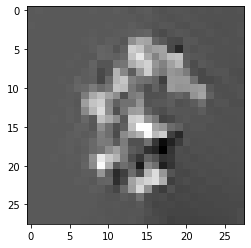

In [43]:
plt.imshow(tf.reshape(model_generator(np.random.randn(1, 100)), (28, 28)), cmap="gray")